# Task 1A: Build a Fully Connected 2 - Layer Neural Network to Classify Digits

This notebook will serve as implementation of the API that you have created in your "Code" folder. You will write functions in the "py" files and use them here.

We will be using inbuilt MNIST dataset present in PyTorch and train a neural network to classify digits. 

## What is expected from this notebook?

This notebook should be used to present your work. You should explain wherever necessary (but also not too much) about what you did and why you did it. You should explain things like hyper parameter settings (even if it was provided before hand to you by us), training performance and testing performance of the model. You should reason why your model is working fine and not overfitting.

Since numbers don't are an argot, you should also use visualizations wherever possible. You can visualize things like loss curve, show confusion matrix, etc. 

Finally, you can show some manual verifications by displaying and making predictions on random test examples. 

**NOTE: The amount of things you can do in this notebook is limitless (hyperbole). But don't do too much at the cost of rest of your tasks. Remember to maintain the outputs while submitting this notebook.**

## Absolutely required items?

1. First of all, import the libraries and the dataset.
2. Next, show dataset samples and distribution of different type of data. For example, in case of MNIST you can show some random images and their labels. Also, show distribution of each class of images.
3. Next, perform required transformations on MNIST dataset (normalization, scaling, grayscaling if required, etc) using torchvision transforms.
4. Create required dataloaders on PyTorch MNIST dataset to load data in mini-batches.
5. Train the model, show loss and accuracy at each step of operation.
6. Plot the **loss curve for both train and validation phase**
7. Pick some manual random images from test dataset and predict their values **showing expected and actual result**.

**NOTE: You may or may not delete these instruction cells after completion of the notebook.**

# Your solution

    6	    1	    7	    4	


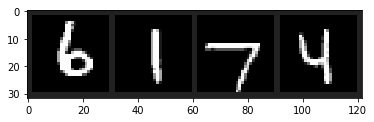

In [44]:
from nnet import model
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)

test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=False, num_workers=2)

def imshow(img):
    img = img * (0.3081) + (0.1307) # unnormalizing image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images)) # showing images
print(''.join('%5s\t' % int(labels[j]) for j in range(4))) # showing corresponding labels


In [45]:
# distribution of each class of image
count = [0 for i in range(10)]
for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    for j in labels:
        count[j] = count[j] + 1

for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    for j in labels:
        count[j] = count[j] + 1
        
for i in range(0, 10):
    print(i, " - ", count[i])

0  -  6903
1  -  7877
2  -  6990
3  -  7141
4  -  6824
5  -  6313
6  -  6876
7  -  7293
8  -  6825
9  -  6958


In [46]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Layer size
N_in = 28 * 28 # Input size
N_h1 = 256 # Hidden Layer 1 size
N_h2 = 256 # Hidden Layer 2 size
N_out = 10 # Output size
# Learning rate
lr = 0.001

# initializing model
net = model.FullyConnected(N_in, N_h1, N_h2, N_out, device=device)

N_epoch = 5 
batch_size = 4


In [49]:
train_loss = []
val_loss = []

# Training and Validation Loop
for n in range(N_epoch):
    loss = []
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        creloss, accuracy, outputs = net.train(inputs, labels)
        loss.append(creloss)
        if i == (len(train_set)/4)-1:
            train_loss.append(sum(loss)/len(loss)) # taking average of all the losses in this epoch for train set
    net.accuracy_reset() # resets the accuracy to 0 to calculate the accuracy for validation set
    loss = []
    for i, data in enumerate(test_loader, 0):
        inputs, labels = data
        creloss, accuracy, outputs = net.eval(inputs, labels)  
        loss.append(creloss)
        if i == (len(test_set)/4)-1:
            val_loss.append(sum(loss)/len(loss)) # taking average of all the losses in this epoch for validation set
    net.accuracy_reset() # resets the accuracy to 0 to calculate the accuracy for training set during next epoch


train loss:  1.7232530117034912
train accuracy:  0.75
train loss:  1.2388204336166382
train accuracy:  0.625
train loss:  1.0085761547088623
train accuracy:  0.6666666666666666
train loss:  1.0692440271377563
train accuracy:  0.625
train loss:  0.9300567507743835
train accuracy:  0.65
train loss:  1.1921167373657227
train accuracy:  0.625
train loss:  1.277129054069519
train accuracy:  0.6071428571428571
train loss:  1.1326698064804077
train accuracy:  0.59375
train loss:  0.8453466892242432
train accuracy:  0.6111111111111112
train loss:  0.9299407601356506
train accuracy:  0.625
train loss:  1.2534215450286865
train accuracy:  0.6363636363636364
train loss:  0.9510303735733032
train accuracy:  0.6458333333333334
train loss:  0.7207675576210022
train accuracy:  0.6730769230769231
train loss:  1.1653308868408203
train accuracy:  0.6785714285714286
train loss:  1.1905442476272583
train accuracy:  0.6666666666666666
train loss:  1.1272571086883545
train accuracy:  0.671875
train loss:  1

train loss:  0.8373929858207703
train accuracy:  0.670774647887324
train loss:  0.973120927810669
train accuracy:  0.6713286713286714
train loss:  1.320660948753357
train accuracy:  0.6684027777777778
train loss:  1.1765882968902588
train accuracy:  0.6672413793103448
train loss:  1.135680913925171
train accuracy:  0.6678082191780822
train loss:  0.9116074442863464
train accuracy:  0.6683673469387755
train loss:  1.186415195465088
train accuracy:  0.668918918918919
train loss:  0.9318815469741821
train accuracy:  0.6694630872483222
train loss:  0.6630631685256958
train accuracy:  0.6716666666666666
train loss:  1.5140902996063232
train accuracy:  0.6688741721854304
train loss:  1.1908421516418457
train accuracy:  0.6677631578947368
train loss:  1.526261806488037
train accuracy:  0.6666666666666666
train loss:  1.4902005195617676
train accuracy:  0.6672077922077922
train loss:  0.7997661232948303
train accuracy:  0.6693548387096774
train loss:  1.0581462383270264
train accuracy:  0.6698

train loss:  1.2866302728652954
train accuracy:  0.6663701067615658
train loss:  1.7223036289215088
train accuracy:  0.6657801418439716
train loss:  1.7987306118011475
train accuracy:  0.6651943462897526
train loss:  0.8074458837509155
train accuracy:  0.6663732394366197
train loss:  1.2487503290176392
train accuracy:  0.6666666666666666
train loss:  1.367282509803772
train accuracy:  0.666083916083916
train loss:  1.155173659324646
train accuracy:  0.6655052264808362
train loss:  0.8315856456756592
train accuracy:  0.6666666666666666
train loss:  0.8793668150901794
train accuracy:  0.6678200692041523
train loss:  0.6950324177742004
train accuracy:  0.6689655172413793
train loss:  0.892841637134552
train accuracy:  0.6692439862542955
train loss:  0.5919075608253479
train accuracy:  0.6703767123287672
train loss:  1.629387617111206
train accuracy:  0.6680887372013652
train loss:  0.7984948754310608
train accuracy:  0.6683673469387755
train loss:  0.7870066165924072
train accuracy:  0.66

train loss:  0.6397327780723572
train accuracy:  0.6694510739856802
train loss:  1.0506813526153564
train accuracy:  0.6696428571428571
train loss:  0.6955508589744568
train accuracy:  0.669833729216152
train loss:  1.0782697200775146
train accuracy:  0.669431279620853
train loss:  1.4065200090408325
train accuracy:  0.6690307328605201
train loss:  1.1163045167922974
train accuracy:  0.6692216981132075
train loss:  1.1843504905700684
train accuracy:  0.6676470588235294
train loss:  1.6004648208618164
train accuracy:  0.6666666666666666
train loss:  0.9071245789527893
train accuracy:  0.6668618266978923
train loss:  1.1201311349868774
train accuracy:  0.6670560747663551
train loss:  1.3565784692764282
train accuracy:  0.6666666666666666
train loss:  1.3260878324508667
train accuracy:  0.666860465116279
train loss:  1.1785966157913208
train accuracy:  0.6664733178654292
train loss:  1.30928373336792
train accuracy:  0.6660879629629629
train loss:  1.2015794515609741
train accuracy:  0.66

train loss:  1.0748295783996582
train accuracy:  0.6594594594594595
train loss:  0.9029037952423096
train accuracy:  0.6596223021582733
train loss:  1.5716453790664673
train accuracy:  0.6588868940754039
train loss:  1.059994101524353
train accuracy:  0.6590501792114696
train loss:  0.9036924839019775
train accuracy:  0.659660107334526
train loss:  0.8216016292572021
train accuracy:  0.6598214285714286
train loss:  1.842474341392517
train accuracy:  0.6590909090909091
train loss:  1.0574266910552979
train accuracy:  0.6588078291814946
train loss:  1.0300575494766235
train accuracy:  0.6594138543516874
train loss:  0.9040253162384033
train accuracy:  0.6595744680851063
train loss:  1.5705528259277344
train accuracy:  0.6588495575221239
train loss:  1.3604393005371094
train accuracy:  0.6581272084805654
train loss:  1.496211290359497
train accuracy:  0.6578483245149912
train loss:  1.1470706462860107
train accuracy:  0.6575704225352113
train loss:  0.5093162059783936
train accuracy:  0.6

train loss:  1.4428365230560303
train accuracy:  0.6542940320232896
train loss:  1.198512077331543
train accuracy:  0.6544331395348837
train loss:  1.4082235097885132
train accuracy:  0.6542089985486212
train loss:  1.445029616355896
train accuracy:  0.6543478260869565
train loss:  1.1163761615753174
train accuracy:  0.6544862518089725
train loss:  0.8606979846954346
train accuracy:  0.6549855491329479
train loss:  0.7253068685531616
train accuracy:  0.6554834054834054
train loss:  0.8831574320793152
train accuracy:  0.6556195965417867
train loss:  0.9357657432556152
train accuracy:  0.6561151079136691
train loss:  1.5197951793670654
train accuracy:  0.6555316091954023
train loss:  1.4714114665985107
train accuracy:  0.6553084648493543
train loss:  1.2558269500732422
train accuracy:  0.6550859598853869
train loss:  1.314083456993103
train accuracy:  0.6548640915593705
train loss:  1.128358006477356
train accuracy:  0.6553571428571429
train loss:  1.4562335014343262
train accuracy:  0.6

train loss:  1.2584093809127808
train accuracy:  0.6529805352798054
train loss:  1.0815092325210571
train accuracy:  0.6530984204131227
train loss:  1.0813018083572388
train accuracy:  0.6529126213592233
train loss:  1.2855745553970337
train accuracy:  0.6530303030303031
train loss:  0.6861411929130554
train accuracy:  0.6531476997578692
train loss:  1.6161224842071533
train accuracy:  0.652962515114873
train loss:  1.607320785522461
train accuracy:  0.6527777777777778
train loss:  0.9671475887298584
train accuracy:  0.6528950542822678
train loss:  0.8366470336914062
train accuracy:  0.653012048192771
train loss:  1.272689938545227
train accuracy:  0.6525270758122743
train loss:  1.10390043258667
train accuracy:  0.65234375
train loss:  0.6744649410247803
train accuracy:  0.6527611044417767
train loss:  1.1664633750915527
train accuracy:  0.6528776978417267
train loss:  0.8247573971748352
train accuracy:  0.6529940119760479
train loss:  0.8712427020072937
train accuracy:  0.65311004784

train loss:  0.8636816740036011
train accuracy:  0.6509978991596639
train loss:  1.1173635721206665
train accuracy:  0.6508394543546695
train loss:  1.3256242275238037
train accuracy:  0.65041928721174
train loss:  0.8208090662956238
train accuracy:  0.650261780104712
train loss:  1.2347363233566284
train accuracy:  0.6498430962343096
train loss:  1.1445719003677368
train accuracy:  0.6496865203761756
train loss:  1.3999016284942627
train accuracy:  0.6497912317327766
train loss:  0.7713128924369812
train accuracy:  0.6501564129301356
train loss:  0.7548992037773132
train accuracy:  0.6502604166666667
train loss:  1.6897375583648682
train accuracy:  0.6495837669094693
train loss:  0.8729162812232971
train accuracy:  0.649948024948025
train loss:  1.8946189880371094
train accuracy:  0.6495327102803738
train loss:  1.3222424983978271
train accuracy:  0.6496369294605809
train loss:  1.0580573081970215
train accuracy:  0.649740932642487
train loss:  0.9677290916442871
train accuracy:  0.64

train loss:  1.177396297454834
train accuracy:  0.6497240110395585
train loss:  1.139998197555542
train accuracy:  0.6495863970588235
train loss:  2.2560510635375977
train accuracy:  0.6492194674012856
train loss:  0.9450488090515137
train accuracy:  0.6493119266055046
train loss:  0.7472774982452393
train accuracy:  0.6496333638863429
train loss:  1.2707796096801758
train accuracy:  0.6492673992673993
train loss:  0.952353298664093
train accuracy:  0.6491308325709058
train loss:  2.0306458473205566
train accuracy:  0.6489945155393053
train loss:  1.2893967628479004
train accuracy:  0.6486301369863013
train loss:  0.9061805605888367
train accuracy:  0.6487226277372263
train loss:  0.6224947571754456
train accuracy:  0.6488149498632635
train loss:  1.2422230243682861
train accuracy:  0.64867941712204
train loss:  1.3315629959106445
train accuracy:  0.6487716105550501
train loss:  1.090804934501648
train accuracy:  0.6488636363636363
train loss:  1.161898136138916
train accuracy:  0.6485

train loss:  1.1319615840911865
train accuracy:  0.6489754098360656
train loss:  1.1596269607543945
train accuracy:  0.6490581490581491
train loss:  0.8145209550857544
train accuracy:  0.6493453355155483
train loss:  0.6666716933250427
train accuracy:  0.6496320523303353
train loss:  1.0725183486938477
train accuracy:  0.6495098039215687
train loss:  1.218212366104126
train accuracy:  0.6491836734693878
train loss:  1.1663776636123657
train accuracy:  0.6492659053833605
train loss:  1.691490650177002
train accuracy:  0.6491442542787286
train loss:  0.9697587490081787
train accuracy:  0.6492263843648208
train loss:  0.89976966381073
train accuracy:  0.6491049633848658
train loss:  1.1738686561584473
train accuracy:  0.6491869918699187
train loss:  1.1587026119232178
train accuracy:  0.6492688870836718
train loss:  0.8967105150222778
train accuracy:  0.6495535714285714
train loss:  1.46701979637146
train accuracy:  0.6494322789943228
train loss:  1.1547799110412598
train accuracy:  0.649

train loss:  0.8253429532051086
train accuracy:  0.6508524833209784
train loss:  1.0229244232177734
train accuracy:  0.6507407407407407
train loss:  1.3691601753234863
train accuracy:  0.6506291635825314
train loss:  1.001288652420044
train accuracy:  0.6505177514792899
train loss:  1.659776210784912
train accuracy:  0.6504065040650406
train loss:  1.181873083114624
train accuracy:  0.6502954209748892
train loss:  0.5425373315811157
train accuracy:  0.6505535055350553
train loss:  1.1229801177978516
train accuracy:  0.6504424778761062
train loss:  0.8003082275390625
train accuracy:  0.6505158437730287
train loss:  1.2543467283248901
train accuracy:  0.6504050073637703
train loss:  1.2449896335601807
train accuracy:  0.6504782928623988
train loss:  1.108733057975769
train accuracy:  0.6501838235294117
train loss:  1.0218772888183594
train accuracy:  0.6502571638501102
train loss:  1.0988062620162964
train accuracy:  0.650330396475771
train loss:  1.2729201316833496
train accuracy:  0.65

train loss:  1.5316370725631714
train accuracy:  0.6481793661496965
train loss:  1.0498332977294922
train accuracy:  0.6482479784366577
train loss:  0.8758182525634766
train accuracy:  0.6484848484848484
train loss:  1.3196338415145874
train accuracy:  0.6483849259757739
train loss:  1.2496342658996582
train accuracy:  0.648285137861466
train loss:  0.7489577531814575
train accuracy:  0.6485215053763441
train loss:  0.953890323638916
train accuracy:  0.6485896574882472
train loss:  1.2532950639724731
train accuracy:  0.6484899328859061
train loss:  1.2402358055114746
train accuracy:  0.6483903420523138
train loss:  0.7367972731590271
train accuracy:  0.6486260053619303
train loss:  0.6221106052398682
train accuracy:  0.648861352980576
train loss:  1.215185523033142
train accuracy:  0.6487617135207496
train loss:  1.2210354804992676
train accuracy:  0.6484949832775919
train loss:  0.963506281375885
train accuracy:  0.6487299465240641
train loss:  1.6733689308166504
train accuracy:  0.64

train loss:  1.072023630142212
train accuracy:  0.6497584541062802
train loss:  1.0242758989334106
train accuracy:  0.6496680748340374
train loss:  1.7330381870269775
train accuracy:  0.6494270205066345
train loss:  0.8375867605209351
train accuracy:  0.6496383363471971
train loss:  0.832816481590271
train accuracy:  0.6498493975903614
train loss:  1.1751435995101929
train accuracy:  0.6497591812161349
train loss:  0.9519960880279541
train accuracy:  0.6498194945848376
train loss:  0.9862009882926941
train accuracy:  0.6497294046903187
train loss:  1.2028353214263916
train accuracy:  0.6496394230769231
train loss:  1.1109706163406372
train accuracy:  0.6496996996996997
train loss:  0.7208471298217773
train accuracy:  0.6497599039615847
train loss:  0.9118036031723022
train accuracy:  0.6498200359928015
train loss:  0.9281283020973206
train accuracy:  0.6498800959232613
train loss:  0.7696595191955566
train accuracy:  0.6500898741761534
train loss:  1.020768642425537
train accuracy:  0.

train loss:  0.7849514484405518
train accuracy:  0.6511465324384788
train loss:  0.7684559226036072
train accuracy:  0.6512017887087759
train loss:  0.9872373342514038
train accuracy:  0.6512569832402234
train loss:  1.2584055662155151
train accuracy:  0.6511725293132329
train loss:  0.9772092700004578
train accuracy:  0.6512276785714286
train loss:  0.8557114601135254
train accuracy:  0.6512827663134412
train loss:  1.2315891981124878
train accuracy:  0.6513377926421404
train loss:  1.2639715671539307
train accuracy:  0.6513927576601671
train loss:  1.4561128616333008
train accuracy:  0.6511692650334076
train loss:  0.768905520439148
train accuracy:  0.6510851419031719
train loss:  1.1514462232589722
train accuracy:  0.6510011123470523
train loss:  1.1592175960540771
train accuracy:  0.650917176209005
train loss:  1.3673880100250244
train accuracy:  0.6508333333333334
train loss:  0.703201413154602
train accuracy:  0.6510272071071627
train loss:  1.2024132013320923
train accuracy:  0.

train loss:  0.7855921983718872
train accuracy:  0.6519083969465649
train loss:  1.1265764236450195
train accuracy:  0.6519582909460834
train loss:  1.3647862672805786
train accuracy:  0.6518810371123538
train loss:  0.6439105868339539
train accuracy:  0.6519308943089431
train loss:  1.37833571434021
train accuracy:  0.6519807008633824
train loss:  1.0168566703796387
train accuracy:  0.6521573604060914
train loss:  0.9584580063819885
train accuracy:  0.65220700152207
train loss:  0.9941399097442627
train accuracy:  0.652129817444219
train loss:  1.4353442192077637
train accuracy:  0.6521794221996959
train loss:  1.1235787868499756
train accuracy:  0.6521023302938197
train loss:  1.9962785243988037
train accuracy:  0.6520253164556962
train loss:  1.0829546451568604
train accuracy:  0.6519483805668016
train loss:  0.7705780267715454
train accuracy:  0.6519979767324229
train loss:  0.7588865756988525
train accuracy:  0.6520475227502528
train loss:  1.6344865560531616
train accuracy:  0.65

train loss:  1.3404288291931152
train accuracy:  0.6524332061068703
train loss:  0.9937039613723755
train accuracy:  0.6524797329518359
train loss:  0.7623158097267151
train accuracy:  0.6526453765490944
train loss:  1.3129799365997314
train accuracy:  0.6525726536445927
train loss:  0.7758574485778809
train accuracy:  0.6527380952380952
train loss:  1.0615178346633911
train accuracy:  0.6526653974297953
train loss:  0.8817384839057922
train accuracy:  0.6527117031398668
train loss:  1.1234960556030273
train accuracy:  0.6527579648121731
train loss:  0.9421384930610657
train accuracy:  0.65268536121673
train loss:  1.1225348711013794
train accuracy:  0.6527315914489311
train loss:  1.007330298423767
train accuracy:  0.6527777777777778
train loss:  0.9807036519050598
train accuracy:  0.6528239202657807
train loss:  1.1321457624435425
train accuracy:  0.652870018975332
train loss:  1.3303873538970947
train accuracy:  0.6527975343764817
train loss:  1.2240239381790161
train accuracy:  0.6

train loss:  1.0959070920944214
train accuracy:  0.6535107334525939
train loss:  0.952522873878479
train accuracy:  0.6535538667858739
train loss:  0.9335533380508423
train accuracy:  0.6535969615728329
train loss:  1.3981797695159912
train accuracy:  0.6535283608753908
train loss:  1.2757635116577148
train accuracy:  0.6535714285714286
train loss:  1.4963715076446533
train accuracy:  0.6536144578313253
train loss:  1.0509564876556396
train accuracy:  0.653657448706512
train loss:  1.1483044624328613
train accuracy:  0.6535889433794025
train loss:  1.3213694095611572
train accuracy:  0.6535204991087344
train loss:  0.9559385776519775
train accuracy:  0.6535634743875278
train loss:  0.6386908292770386
train accuracy:  0.6537177203918076
train loss:  1.2713714838027954
train accuracy:  0.6537605696484201
train loss:  1.491190791130066
train accuracy:  0.6536921708185054
train loss:  0.8401936292648315
train accuracy:  0.6537349933303691
train loss:  1.0242140293121338
train accuracy:  0.

train loss:  1.3160580396652222
train accuracy:  0.6536523929471033
train loss:  0.9055511951446533
train accuracy:  0.653797733948804
train loss:  1.175203561782837
train accuracy:  0.65373322147651
train loss:  0.8564575910568237
train accuracy:  0.6538784067085954
train loss:  0.7916919589042664
train accuracy:  0.653918692372171
train loss:  0.6489267945289612
train accuracy:  0.6540636782572267
train loss:  1.0988603830337524
train accuracy:  0.653999162479062
train loss:  1.508906364440918
train accuracy:  0.6539347007115948
train loss:  1.1919821500778198
train accuracy:  0.6539748953974895
train loss:  0.7858006954193115
train accuracy:  0.6539104976997072
train loss:  1.2303564548492432
train accuracy:  0.6538461538461539
train loss:  0.9447898268699646
train accuracy:  0.6538863351441705
train loss:  1.3693056106567383
train accuracy:  0.6539264828738512
train loss:  1.0458741188049316
train accuracy:  0.6538622129436326
train loss:  1.2566168308258057
train accuracy:  0.6536

train loss:  2.394188404083252
train accuracy:  0.6538004750593824
train loss:  1.176888346672058
train accuracy:  0.6538385437277404
train loss:  0.8135930299758911
train accuracy:  0.6539754746835443
train loss:  1.527482509613037
train accuracy:  0.6538157374456307
train loss:  1.4009110927581787
train accuracy:  0.6537549407114625
train loss:  0.8427386283874512
train accuracy:  0.6538917423943106
train loss:  1.4151982069015503
train accuracy:  0.6538309636650869
train loss:  0.8875249624252319
train accuracy:  0.6539676273193842
train loss:  0.9257187843322754
train accuracy:  0.6540055248618785
train loss:  1.0687592029571533
train accuracy:  0.6540433925049309
train loss:  1.2946821451187134
train accuracy:  0.6540812302839116
train loss:  1.1352568864822388
train accuracy:  0.6540204966495862
train loss:  1.0382721424102783
train accuracy:  0.6539598108747045
train loss:  1.3201396465301514
train accuracy:  0.6539976368649074
train loss:  1.1196541786193848
train accuracy:  0.

train loss:  1.3755360841751099
train accuracy:  0.6535071267816954
train loss:  0.999494194984436
train accuracy:  0.6536370453693289
train loss:  1.002697467803955
train accuracy:  0.653579460269865
train loss:  0.9137520790100098
train accuracy:  0.6535219183214687
train loss:  0.7607508897781372
train accuracy:  0.6536516853932585
train loss:  1.1870925426483154
train accuracy:  0.6535941594908274
train loss:  1.0817447900772095
train accuracy:  0.6535366766467066
train loss:  1.2031540870666504
train accuracy:  0.6533857089412645
train loss:  0.9679182171821594
train accuracy:  0.6534218399401646
train loss:  0.9121098518371582
train accuracy:  0.6535514018691588
train loss:  0.656425416469574
train accuracy:  0.6535874439461884
train loss:  0.886381983757019
train accuracy:  0.653530070974972
train loss:  1.4242022037506104
train accuracy:  0.6534727408513816
train loss:  1.5778833627700806
train accuracy:  0.6532288167226578
train loss:  1.4962408542633057
train accuracy:  0.653

train loss:  0.9524472951889038
train accuracy:  0.6539009618810118
train loss:  0.5453479886054993
train accuracy:  0.6540242165242165
train loss:  0.7886804938316345
train accuracy:  0.654058383766465
train loss:  1.4609262943267822
train accuracy:  0.6540925266903914
train loss:  1.1825320720672607
train accuracy:  0.6540377090003557
train loss:  0.83533775806427
train accuracy:  0.6539829302987198
train loss:  0.733902096748352
train accuracy:  0.6541059367223605
train loss:  1.4765509366989136
train accuracy:  0.6540511727078892
train loss:  0.8682453036308289
train accuracy:  0.6541740674955595
train loss:  1.1539766788482666
train accuracy:  0.6542080965909091
train loss:  0.9846223592758179
train accuracy:  0.6543308484203053
train loss:  1.174976110458374
train accuracy:  0.6543647977288858
train loss:  0.9889298677444458
train accuracy:  0.6543987229514012
train loss:  0.6598010659217834
train accuracy:  0.6545212765957447
train loss:  0.9157456159591675
train accuracy:  0.65

train loss:  1.0634756088256836
train accuracy:  0.6552337398373984
train loss:  0.7951578497886658
train accuracy:  0.6553504910260752
train loss:  1.3263460397720337
train accuracy:  0.6552979011509817
train loss:  1.191011905670166
train accuracy:  0.6552453468697124
train loss:  0.9340047836303711
train accuracy:  0.6552774018944519
train loss:  0.8275497555732727
train accuracy:  0.6553939803855259
train loss:  1.7055939435958862
train accuracy:  0.6554259634888439
train loss:  1.0631322860717773
train accuracy:  0.6554579249746536
train loss:  1.2855844497680664
train accuracy:  0.6554054054054054
train loss:  1.164137601852417
train accuracy:  0.6553529213103682
train loss:  0.8833394050598145
train accuracy:  0.6553848750844025
train loss:  0.8639850616455078
train accuracy:  0.6555011812352346
train loss:  0.7426444292068481
train accuracy:  0.6555330634278003
train loss:  1.0766420364379883
train accuracy:  0.6555649241146712
train loss:  1.0688538551330566
train accuracy:  0

train loss:  1.405123233795166
train accuracy:  0.6560880829015544
train loss:  1.7479257583618164
train accuracy:  0.6559566202654581
train loss:  1.060762643814087
train accuracy:  0.6559061488673139
train loss:  0.9302501082420349
train accuracy:  0.6560174700744096
train loss:  1.0106756687164307
train accuracy:  0.6559670116429496
train loss:  1.6743433475494385
train accuracy:  0.6558357581635952
train loss:  0.892309308052063
train accuracy:  0.6558661926308985
train loss:  0.968238115310669
train accuracy:  0.6559773828756058
train loss:  1.1833534240722656
train accuracy:  0.6559270025839793
train loss:  0.6887051463127136
train accuracy:  0.6560381013884404
train loss:  0.9702314138412476
train accuracy:  0.6560684312459651
train loss:  0.8842958807945251
train accuracy:  0.6560987415295256
train loss:  1.065200686454773
train accuracy:  0.6561290322580645
train loss:  1.2229186296463013
train accuracy:  0.6560786842953886
train loss:  0.9268496036529541
train accuracy:  0.65

train loss:  1.333655595779419
train accuracy:  0.6574790956952616
train loss:  1.137831449508667
train accuracy:  0.6574303405572756
train loss:  1.428601861000061
train accuracy:  0.657304240173321
train loss:  0.5344468951225281
train accuracy:  0.6574102722772277
train loss:  0.9055845141410828
train accuracy:  0.6574389112279616
train loss:  0.9226994514465332
train accuracy:  0.6574675324675324
train loss:  0.9090713262557983
train accuracy:  0.6574961360123648
train loss:  2.067436695098877
train accuracy:  0.6573702101359703
train loss:  1.0590667724609375
train accuracy:  0.657321594068582
train loss:  0.7916803359985352
train accuracy:  0.6574274243360099
train loss:  1.4402732849121094
train accuracy:  0.6574560049397963
train loss:  1.819669485092163
train accuracy:  0.6573302469135802
train loss:  1.1105992794036865
train accuracy:  0.6573588398642395
train loss:  1.0429596900939941
train accuracy:  0.6572331893892659
train loss:  0.8834092617034912
train accuracy:  0.6572

train loss:  0.7140097618103027
train accuracy:  0.6586053412462908
train loss:  0.6600836515426636
train accuracy:  0.658706615247701
train loss:  1.1174497604370117
train accuracy:  0.6586595492289442
train loss:  1.1280546188354492
train accuracy:  0.6586125111176994
train loss:  1.070137619972229
train accuracy:  0.6586395969176052
train loss:  1.0644062757492065
train accuracy:  0.6585185185185185
train loss:  0.7243918180465698
train accuracy:  0.6585456161137441
train loss:  1.3312654495239258
train accuracy:  0.6584986674563221
train loss:  0.9775220155715942
train accuracy:  0.6585257548845471
train loss:  1.7808287143707275
train accuracy:  0.6584788398934596
train loss:  1.1229294538497925
train accuracy:  0.6585059171597634
train loss:  1.291285514831543
train accuracy:  0.6583850931677019
train loss:  0.9684101939201355
train accuracy:  0.6584861028976937
train loss:  1.2104352712631226
train accuracy:  0.6584392550990246
train loss:  0.7151851654052734
train accuracy:  0.

train loss:  1.1634242534637451
train accuracy:  0.6589418140330862
train loss:  0.9100764393806458
train accuracy:  0.6589677787282577
train loss:  0.9641278982162476
train accuracy:  0.6589937286202965
train loss:  0.8368901610374451
train accuracy:  0.659019663721858
train loss:  0.9988985061645508
train accuracy:  0.658974358974359
train loss:  0.7345480918884277
train accuracy:  0.6590002848191399
train loss:  0.8256341218948364
train accuracy:  0.6590261958997722
train loss:  1.1168822050094604
train accuracy:  0.658980927981782
train loss:  0.5103186964988708
train accuracy:  0.6590779738190097
train loss:  1.3239327669143677
train accuracy:  0.6590327169274538
train loss:  1.5333061218261719
train accuracy:  0.6589874857792947
train loss:  0.797437310218811
train accuracy:  0.659084446971851
train loss:  1.2124254703521729
train accuracy:  0.6590392268334281
train loss:  1.1522314548492432
train accuracy:  0.658994032395567
train loss:  0.9398233890533447
train accuracy:  0.659

train loss:  0.756200909614563
train accuracy:  0.6598023064250412
train loss:  0.9047926664352417
train accuracy:  0.6598956903650838
train loss:  0.9409535527229309
train accuracy:  0.6598518111964874
train loss:  0.5762078762054443
train accuracy:  0.6598765432098765
train loss:  0.8742300271987915
train accuracy:  0.65990126165661
train loss:  1.681000828742981
train accuracy:  0.6599259665478475
train loss:  0.9989847540855408
train accuracy:  0.6598821271929824
train loss:  1.02249014377594
train accuracy:  0.659906823787339
train loss:  1.1285213232040405
train accuracy:  0.6598630136986301
train loss:  1.2145130634307861
train accuracy:  0.6597507532182963
train loss:  1.0299932956695557
train accuracy:  0.6597070098576122
train loss:  0.9874638319015503
train accuracy:  0.6597317273473857
train loss:  0.9170576333999634
train accuracy:  0.659688013136289
train loss:  1.1304378509521484
train accuracy:  0.6597127222982216
train loss:  1.0528804063796997
train accuracy:  0.65980

train loss:  1.3033833503723145
train accuracy:  0.6604072996561756
train loss:  0.9528647661209106
train accuracy:  0.6604309888947647
train loss:  1.2039132118225098
train accuracy:  0.6603885804916733
train loss:  0.9516967535018921
train accuracy:  0.6603461945031712
train loss:  1.402717113494873
train accuracy:  0.6602377807133422
train loss:  1.4901375770568848
train accuracy:  0.6601954569466455
train loss:  0.7879406213760376
train accuracy:  0.6602851861631899
train loss:  0.7943612933158875
train accuracy:  0.6603748680042238
train loss:  1.5763310194015503
train accuracy:  0.660266561097915
train loss:  1.2442567348480225
train accuracy:  0.6602902374670184
train loss:  0.9264317750930786
train accuracy:  0.6603139013452914
train loss:  0.9458776116371155
train accuracy:  0.6603375527426161
train loss:  1.1128029823303223
train accuracy:  0.6603611916688636
train loss:  1.14849853515625
train accuracy:  0.6603848181338956
train loss:  0.679162859916687
train accuracy:  0.66

train loss:  0.6385089755058289
train accuracy:  0.6610983102918587
train loss:  1.0920828580856323
train accuracy:  0.6610570770412081
train loss:  1.1358633041381836
train accuracy:  0.6610158648925282
train loss:  0.7610701322555542
train accuracy:  0.6611025837810182
train loss:  1.2581257820129395
train accuracy:  0.660997442455243
train loss:  1.011800765991211
train accuracy:  0.6609562771669649
train loss:  0.894806981086731
train accuracy:  0.6609790388548057
train loss:  0.7951031923294067
train accuracy:  0.661065678507539
train loss:  0.5327091217041016
train accuracy:  0.661152273888605
train loss:  1.1764341592788696
train accuracy:  0.6611111111111111
train loss:  0.973063588142395
train accuracy:  0.6611338100102145
train loss:  1.7092843055725098
train accuracy:  0.6610926729640031
train loss:  1.6230278015136719
train accuracy:  0.6609877488514548
train loss:  1.0141534805297852
train accuracy:  0.6608828782852768
train loss:  1.2003629207611084
train accuracy:  0.660

train loss:  0.8761332035064697
train accuracy:  0.6625154894671623
train loss:  0.8789044618606567
train accuracy:  0.6625371655104063
train loss:  0.883434534072876
train accuracy:  0.6625588308149616
train loss:  1.4250884056091309
train accuracy:  0.6625804853888063
train loss:  0.6988159418106079
train accuracy:  0.6626021292399109
train loss:  0.8216798901557922
train accuracy:  0.6626856435643564
train loss:  1.4442577362060547
train accuracy:  0.6626453848057412
train loss:  1.1335506439208984
train accuracy:  0.6626669965363682
train loss:  0.7957834601402283
train accuracy:  0.6627504328468958
train loss:  1.7234536409378052
train accuracy:  0.6626483679525222
train loss:  0.7763918042182922
train accuracy:  0.6626699629171817
train loss:  0.778338611125946
train accuracy:  0.6627533366287691
train loss:  1.115950345993042
train accuracy:  0.6627131208302446
train loss:  0.7606090903282166
train accuracy:  0.6627346837944664
train loss:  0.6835872530937195
train accuracy:  0.

train loss:  0.9070184826850891
train accuracy:  0.6639088729016787
train loss:  1.0588483810424805
train accuracy:  0.663869575641333
train loss:  2.3652400970458984
train accuracy:  0.6637703739213806
train loss:  1.2268717288970947
train accuracy:  0.6637910376228133
train loss:  1.5781817436218262
train accuracy:  0.6637517968375659
train loss:  1.1592257022857666
train accuracy:  0.6637724550898204
train loss:  0.9067726731300354
train accuracy:  0.6637931034482759
train loss:  1.1415834426879883
train accuracy:  0.6637538903519272
train loss:  1.2366526126861572
train accuracy:  0.6637146960268071
train loss:  0.8210558891296387
train accuracy:  0.6637353433835846
train loss:  0.8958951234817505
train accuracy:  0.663755980861244
train loss:  1.12273371219635
train accuracy:  0.6637766084668739
train loss:  0.5399912595748901
train accuracy:  0.663857006217121
train loss:  0.9735008478164673
train accuracy:  0.6638178340903658
train loss:  0.5971288681030273
train accuracy:  0.66

train loss:  1.1878451108932495
train accuracy:  0.6632605666511844
train loss:  0.6749066114425659
train accuracy:  0.6632807058277224
train loss:  1.1860918998718262
train accuracy:  0.6633008356545961
train loss:  0.7767000794410706
train accuracy:  0.6633789742399628
train loss:  1.346975564956665
train accuracy:  0.6633410672853828
train loss:  1.0747995376586914
train accuracy:  0.6633611691022965
train loss:  1.212801218032837
train accuracy:  0.6633232838589982
train loss:  0.6814117431640625
train accuracy:  0.6634013447716207
train loss:  1.4668395519256592
train accuracy:  0.6633634677793231
train loss:  1.294367790222168
train accuracy:  0.6632676709154114
train loss:  1.4329149723052979
train accuracy:  0.6632298424467099
train loss:  0.4501362442970276
train accuracy:  0.6633078526754691
train loss:  1.3283485174179077
train accuracy:  0.6632700324224178
train loss:  1.3540618419647217
train accuracy:  0.663290113452188
train loss:  0.7295163869857788
train accuracy:  0.6

train loss:  1.0746374130249023
train accuracy:  0.6639482564679415
train loss:  0.7584250569343567
train accuracy:  0.6640238416554206
train loss:  1.3464964628219604
train accuracy:  0.6639869574994378
train loss:  1.1159849166870117
train accuracy:  0.6639500899280576
train loss:  0.7723650932312012
train accuracy:  0.6639694313328838
train loss:  0.8948999643325806
train accuracy:  0.6639887640449438
train loss:  1.1462509632110596
train accuracy:  0.6639519209166479
train loss:  0.9417883157730103
train accuracy:  0.6639712488769093
train loss:  0.6689944267272949
train accuracy:  0.66404671008309
train loss:  1.1088619232177734
train accuracy:  0.6640660080826224
train loss:  0.9232978820800781
train accuracy:  0.6640291806958474
train loss:  0.9951049089431763
train accuracy:  0.6640484739676841
train loss:  0.9877387285232544
train accuracy:  0.6640677585820058
train loss:  0.8604803681373596
train accuracy:  0.6640870345446388
train loss:  0.9072566032409668
train accuracy:  0

train loss:  0.819261908531189
train accuracy:  0.664684704342134
train loss:  1.2658259868621826
train accuracy:  0.6645942408376964
train loss:  2.40834379196167
train accuracy:  0.6645583424209378
train loss:  0.7824164032936096
train accuracy:  0.6645769733972962
train loss:  1.3666181564331055
train accuracy:  0.6645410943972095
train loss:  1.0631916522979736
train accuracy:  0.6645597210113339
train loss:  0.5230535864830017
train accuracy:  0.6646328176073218
train loss:  1.3223247528076172
train accuracy:  0.6645969498910675
train loss:  1.2929943799972534
train accuracy:  0.6646155521672839
train loss:  1.4805967807769775
train accuracy:  0.6645797038327527
train loss:  0.8530979156494141
train accuracy:  0.6645438711082081
train loss:  1.1506026983261108
train accuracy:  0.6645080539834567
train loss:  1.23244047164917
train accuracy:  0.664417845484222
train loss:  1.2078648805618286
train accuracy:  0.6644364664926022
train loss:  0.9985703825950623
train accuracy:  0.6644

train loss:  1.233243703842163
train accuracy:  0.6640178003814368
train loss:  1.0963317155838013
train accuracy:  0.6640360169491526
train loss:  1.102221131324768
train accuracy:  0.6640542257996187
train loss:  0.9454947710037231
train accuracy:  0.6640724269377383
train loss:  1.2085046768188477
train accuracy:  0.6640376879102265
train loss:  0.9374642372131348
train accuracy:  0.6640558848433531
train loss:  0.9906147718429565
train accuracy:  0.664074074074074
train loss:  1.2608733177185059
train accuracy:  0.6640922556072789
train loss:  0.638103723526001
train accuracy:  0.6641633171144489
train loss:  1.3469257354736328
train accuracy:  0.6640757191201354
train loss:  0.929643988609314
train accuracy:  0.6640938887714104
train loss:  1.2110213041305542
train accuracy:  0.6640591966173361
train loss:  0.9556877017021179
train accuracy:  0.6640773620798985
train loss:  0.944434642791748
train accuracy:  0.6640955198647507
train loss:  0.9259770512580872
train accuracy:  0.664

train loss:  0.8810527920722961
train accuracy:  0.6651225036030471
train loss:  0.9154655933380127
train accuracy:  0.6651399752984768
train loss:  0.9044897556304932
train accuracy:  0.6652088907182547
train loss:  0.9110324382781982
train accuracy:  0.6651748971193415
train loss:  1.3798303604125977
train accuracy:  0.6650894877597202
train loss:  1.1836111545562744
train accuracy:  0.6651069518716578
train loss:  0.40743887424468994
train accuracy:  0.6651758173966688
train loss:  1.368682861328125
train accuracy:  0.6651932565789473
train loss:  1.3720664978027344
train accuracy:  0.6651593011305241
train loss:  1.477211833000183
train accuracy:  0.6651253596383067
train loss:  0.6400806903839111
train accuracy:  0.6651427984384631
train loss:  0.8354458808898926
train accuracy:  0.6651602300739523
train loss:  1.4698091745376587
train accuracy:  0.6651776545491888
train loss:  1.1793994903564453
train accuracy:  0.6651437371663245
train loss:  0.8641566634178162
train accuracy:  

train loss:  1.2100988626480103
train accuracy:  0.6655987184621546
train loss:  0.7035702466964722
train accuracy:  0.6656156156156157
train loss:  1.1824994087219238
train accuracy:  0.6656325060048038
train loss:  0.9435869455337524
train accuracy:  0.665699419651791
train loss:  1.2688865661621094
train accuracy:  0.6656662665066027
train loss:  0.9231947064399719
train accuracy:  0.6656831366273255
train loss:  0.9839285016059875
train accuracy:  0.66575
train loss:  0.8169877529144287
train accuracy:  0.6657668466306739
train loss:  0.8253055810928345
train accuracy:  0.6658336665333866
train loss:  0.4260534644126892
train accuracy:  0.6659004597241654
train loss:  0.9460530281066895
train accuracy:  0.6659172661870504
train loss:  1.1168440580368042
train accuracy:  0.6659340659340659
train loss:  0.9827890992164612
train accuracy:  0.6659009188973232
train loss:  0.8787775039672852
train accuracy:  0.6659676452965848
train loss:  1.3374391794204712
train accuracy:  0.665984424

train loss:  1.5224984884262085
train accuracy:  0.6667641325536062
train loss:  1.2169718742370605
train accuracy:  0.6667316312609628
train loss:  1.0215660333633423
train accuracy:  0.6667478565861262
train loss:  0.8509178161621094
train accuracy:  0.6667640755893239
train loss:  1.008520245552063
train accuracy:  0.6667802882742501
train loss:  0.932192862033844
train accuracy:  0.6667478091528725
train loss:  0.8623473644256592
train accuracy:  0.6667640186915887
train loss:  0.9758056402206421
train accuracy:  0.6667315553825189
train loss:  0.7075302004814148
train accuracy:  0.6667477617750097
train loss:  1.2116038799285889
train accuracy:  0.6667639618602841
train loss:  0.7939484715461731
train accuracy:  0.6667801556420233
train loss:  0.9665052890777588
train accuracy:  0.6667963431239059
train loss:  0.5910704135894775
train accuracy:  0.6668611435239207
train loss:  0.5934911966323853
train accuracy:  0.6669259187244799
train loss:  1.0552585124969482
train accuracy:  0

train loss:  0.7960543036460876
train accuracy:  0.667220744680851
train loss:  0.5886173248291016
train accuracy:  0.667283950617284
train loss:  1.5027875900268555
train accuracy:  0.6672521838207368
train loss:  0.961371123790741
train accuracy:  0.6672678944370609
train loss:  1.4161325693130493
train accuracy:  0.6671886864085042
train loss:  0.7558637857437134
train accuracy:  0.6671569557790852
train loss:  0.7391715049743652
train accuracy:  0.6672201138519924
train loss:  1.2305635213851929
train accuracy:  0.6671883892999431
train loss:  0.7897300720214844
train accuracy:  0.6672515174506829
train loss:  2.335939407348633
train accuracy:  0.6671723876351223
train loss:  1.5991963148117065
train accuracy:  0.6671406901782329
train loss:  0.6145397424697876
train accuracy:  0.6671563981042654
train loss:  0.6993997693061829
train accuracy:  0.6672194844579227
train loss:  0.7316091656684875
train accuracy:  0.6672351714989577
train loss:  0.9660678505897522
train accuracy:  0.6

train loss:  0.9970024824142456
train accuracy:  0.6677004258470653
train loss:  0.8047068119049072
train accuracy:  0.6677156608663458
train loss:  1.1672024726867676
train accuracy:  0.6676846196557468
train loss:  1.2149696350097656
train accuracy:  0.6676998519615099
train loss:  0.6912218332290649
train accuracy:  0.6677150786308973
train loss:  1.2002253532409668
train accuracy:  0.6676840547539771
train loss:  0.5372751951217651
train accuracy:  0.6677455150730535
train loss:  1.1224370002746582
train accuracy:  0.6677144970414202
train loss:  0.8284980654716492
train accuracy:  0.6677297097430209
train loss:  0.4693143367767334
train accuracy:  0.6677911275415896
train loss:  1.0490481853485107
train accuracy:  0.6678063204583257
train loss:  0.8759839534759521
train accuracy:  0.6678215077605322
train loss:  0.8586419820785522
train accuracy:  0.6678828745612414
train loss:  0.9963327646255493
train accuracy:  0.6678980421130403
train loss:  0.9932558536529541
train accuracy: 

train loss:  1.5821415185928345
train accuracy:  0.6676735798016231
train loss:  1.061572551727295
train accuracy:  0.6676884240894339
train loss:  0.8078826665878296
train accuracy:  0.6677483324319452
train loss:  0.6817362904548645
train accuracy:  0.6677631578947368
train loss:  0.9088771343231201
train accuracy:  0.6677779780140566
train loss:  0.6186317801475525
train accuracy:  0.6678378378378378
train loss:  0.8905749917030334
train accuracy:  0.6678526391641145
train loss:  0.5811470746994019
train accuracy:  0.6679124639769453
train loss:  0.6521967053413391
train accuracy:  0.6679272465334054
train loss:  0.8370463848114014
train accuracy:  0.6679420237666547
train loss:  0.7916473150253296
train accuracy:  0.667956795679568
train loss:  0.9296392798423767
train accuracy:  0.667971562275018
train loss:  0.8393905162811279
train accuracy:  0.6680313118589167
train loss:  0.895666778087616
train accuracy:  0.6680460597337171
train loss:  0.539998471736908
train accuracy:  0.66

train loss:  0.6827801465988159
train accuracy:  0.6681057268722467
train loss:  1.7983028888702393
train accuracy:  0.6680320648343904
train loss:  1.2629055976867676
train accuracy:  0.6680905407785802
train loss:  0.9456738829612732
train accuracy:  0.6680609369496302
train loss:  1.169291615486145
train accuracy:  0.668031343546399
train loss:  0.7649257779121399
train accuracy:  0.6680457746478873
train loss:  0.8410027027130127
train accuracy:  0.6680602006688964
train loss:  0.9764101505279541
train accuracy:  0.6680746216121084
train loss:  1.0087110996246338
train accuracy:  0.6680890374802041
train loss:  1.2767289876937866
train accuracy:  0.6680594651653765
train loss:  0.6107871532440186
train accuracy:  0.6680738786279683
train loss:  1.1051372289657593
train accuracy:  0.6680882870207527
train loss:  0.46936216950416565
train accuracy:  0.6681466502549674
train loss:  1.9272762537002563
train accuracy:  0.6681170886075949
train loss:  1.269346833229065
train accuracy:  0

train loss:  0.7515063285827637
train accuracy:  0.6685748462064252
train loss:  0.891288161277771
train accuracy:  0.6685460447633692
train loss:  1.052370309829712
train accuracy:  0.6685599590023915
train loss:  1.1296634674072266
train accuracy:  0.6684884713919726
train loss:  0.9040869474411011
train accuracy:  0.6685450819672131
train loss:  0.8196993470191956
train accuracy:  0.6686016732115417
train loss:  0.8828187584877014
train accuracy:  0.6686155684533971
train loss:  1.1273438930511475
train accuracy:  0.6686294589520396
train loss:  0.8904988169670105
train accuracy:  0.6686860068259386
train loss:  0.9028365612030029
train accuracy:  0.6687425354035148
train loss:  0.9346780776977539
train accuracy:  0.668756397134084
train loss:  1.2266069650650024
train accuracy:  0.668727613849565
train loss:  0.41698306798934937
train accuracy:  0.6687841064120055
train loss:  1.462684988975525
train accuracy:  0.6687979539641944
train loss:  0.878729522228241
train accuracy:  0.66

train loss:  0.8994091749191284
train accuracy:  0.6692116182572614
train loss:  1.20663321018219
train accuracy:  0.6692250248921341
train loss:  0.9095817804336548
train accuracy:  0.6692384270781483
train loss:  1.3791284561157227
train accuracy:  0.6692103516921035
train loss:  1.3848850727081299
train accuracy:  0.6691408193730304
train loss:  1.1000456809997559
train accuracy:  0.6691127694859038
train loss:  0.8009012937545776
train accuracy:  0.6691676338915603
train loss:  0.6379289031028748
train accuracy:  0.6692224801061007
train loss:  0.5792693495750427
train accuracy:  0.6692358693850489
train loss:  0.6641423106193542
train accuracy:  0.6692906861120318
train loss:  1.138578176498413
train accuracy:  0.6693040596520299
train loss:  1.0022693872451782
train accuracy:  0.6693174287607687
train loss:  1.030441164970398
train accuracy:  0.6693307934404505
train loss:  0.5084895491600037
train accuracy:  0.6693855581318318
train loss:  1.9172428846359253
train accuracy:  0.6

train loss:  0.8532603979110718
train accuracy:  0.6697109920441631
train loss:  0.6038875579833984
train accuracy:  0.6697646103896104
train loss:  1.332944393157959
train accuracy:  0.6696964778445058
train loss:  1.5990923643112183
train accuracy:  0.6695877961700747
train loss:  1.880325198173523
train accuracy:  0.6695197144247931
train loss:  1.0712255239486694
train accuracy:  0.6694922128487995
train loss:  1.6377363204956055
train accuracy:  0.6694241686942417
train loss:  0.706113874912262
train accuracy:  0.669477781381771
train loss:  0.7251296043395996
train accuracy:  0.6694908383330631
train loss:  0.6374557614326477
train accuracy:  0.6695444228274967
train loss:  0.9301534295082092
train accuracy:  0.6695574647430702
train loss:  0.4948628544807434
train accuracy:  0.6696110210696921
train loss:  0.7908423542976379
train accuracy:  0.6696240479662939
train loss:  0.8080416917800903
train accuracy:  0.669596565132858
train loss:  1.8172175884246826
train accuracy:  0.66

train loss:  1.3312004804611206
train accuracy:  0.669208770257388
train loss:  1.5504393577575684
train accuracy:  0.669142176330421
train loss:  0.9280544519424438
train accuracy:  0.6691550190597204
train loss:  1.2195708751678467
train accuracy:  0.6690487533746229
train loss:  0.9601452350616455
train accuracy:  0.6690616068593204
train loss:  1.2635395526885986
train accuracy:  0.6689950785839022
train loss:  0.6518505811691284
train accuracy:  0.669047619047619
train loss:  0.7992566227912903
train accuracy:  0.6690604665926043
train loss:  1.33082115650177
train accuracy:  0.6690733100602984
train loss:  1.5454548597335815
train accuracy:  0.6690464858004125
train loss:  1.0547643899917603
train accuracy:  0.6690593274111675
train loss:  1.0505839586257935
train accuracy:  0.6689928628072958
train loss:  0.9935396313667297
train accuracy:  0.6689660640659689
train loss:  1.0462734699249268
train accuracy:  0.6688996353258284
train loss:  1.0404866933822632
train accuracy:  0.66

train loss:  0.7549422383308411
train accuracy:  0.6692307692307692
train loss:  0.9384768009185791
train accuracy:  0.6692433188315724
train loss:  0.8044880628585815
train accuracy:  0.6692558645331677
train loss:  0.776290774345398
train accuracy:  0.6692684063373718
train loss:  0.8479498624801636
train accuracy:  0.6692809442460009
train loss:  0.9030054807662964
train accuracy:  0.6692546583850931
train loss:  0.722391664981842
train accuracy:  0.66926719453501
train loss:  1.1592249870300293
train accuracy:  0.6692409189692642
train loss:  1.290244221687317
train accuracy:  0.6692534533602359
train loss:  0.9223266839981079
train accuracy:  0.6691883923029175
train loss:  1.6073800325393677
train accuracy:  0.6691621411947246
train loss:  1.3439671993255615
train accuracy:  0.6691358982314614
train loss:  1.0560919046401978
train accuracy:  0.6691096634093376
train loss:  1.0562466382980347
train accuracy:  0.6690834367245657
train loss:  0.7519309520721436
train accuracy:  0.66

train loss:  0.9998388290405273
train accuracy:  0.6690707561494078
train loss:  0.9232507944107056
train accuracy:  0.669083042356156
train loss:  1.151079773902893
train accuracy:  0.6690573770491803
train loss:  1.1402883529663086
train accuracy:  0.6690317195325542
train loss:  0.8080435395240784
train accuracy:  0.6690440060698027
train loss:  0.28174853324890137
train accuracy:  0.6690942193900774
train loss:  0.8639386296272278
train accuracy:  0.6691064927184466
train loss:  1.6630715131759644
train accuracy:  0.6690808433186713
train loss:  0.9955700635910034
train accuracy:  0.6690931149529875
train loss:  1.701130747795105
train accuracy:  0.6690674753601213
train loss:  0.5994059443473816
train accuracy:  0.6691176470588235
train loss:  0.9938742518424988
train accuracy:  0.6691299075337275
train loss:  0.9188228845596313
train accuracy:  0.6691421642922097
train loss:  1.0226982831954956
train accuracy:  0.66915441733596
train loss:  0.8676401972770691
train accuracy:  0.6

train loss:  0.6863144636154175
train accuracy:  0.6698779943460794
train loss:  1.1793488264083862
train accuracy:  0.6698899137161559
train loss:  1.2417175769805908
train accuracy:  0.6698646437602261
train loss:  1.0693974494934082
train accuracy:  0.6698765615704938
train loss:  1.5271432399749756
train accuracy:  0.6698513011152416
train loss:  0.9879845380783081
train accuracy:  0.6698632173654475
train loss:  0.730527400970459
train accuracy:  0.6699122937416382
train loss:  1.2765281200408936
train accuracy:  0.6698870392390012
train loss:  1.7508869171142578
train accuracy:  0.6698617922425323
train loss:  0.493123322725296
train accuracy:  0.6699108469539375
train loss:  0.6615084409713745
train accuracy:  0.6699598870895855
train loss:  0.783760130405426
train accuracy:  0.6699717765894236
train loss:  0.7217560410499573
train accuracy:  0.6700207931085698
train loss:  0.7538877129554749
train accuracy:  0.6700326700326701
train loss:  0.8369045257568359
train accuracy:  0.

train loss:  0.5432983636856079
train accuracy:  0.6700873362445415
train loss:  0.8252657055854797
train accuracy:  0.670098966671518
train loss:  1.0500770807266235
train accuracy:  0.6700742142025611
train loss:  1.7123194932937622
train accuracy:  0.6700494689364178
train loss:  0.7473505139350891
train accuracy:  0.670061099796334
train loss:  0.5557731986045837
train accuracy:  0.6700727272727273
train loss:  1.722359299659729
train accuracy:  0.6700479930191972
train loss:  1.6397260427474976
train accuracy:  0.6700596190199215
train loss:  1.6757162809371948
train accuracy:  0.6700348938644954
train loss:  0.8837437629699707
train accuracy:  0.6700101758976595
train loss:  0.6791926622390747
train accuracy:  0.6700218023255814
train loss:  0.9001258611679077
train accuracy:  0.6700334253742188
train loss:  1.0922433137893677
train accuracy:  0.670045045045045
train loss:  0.5612998604774475
train accuracy:  0.6700566613395322
train loss:  0.9343518018722534
train accuracy:  0.6

train loss:  1.5213241577148438
train accuracy:  0.6701566951566952
train loss:  0.9278529286384583
train accuracy:  0.6701680672268907
train loss:  0.9714066982269287
train accuracy:  0.6701794360581032
train loss:  0.5950151681900024
train accuracy:  0.6701908016517157
train loss:  1.4203613996505737
train accuracy:  0.6702021640091116
train loss:  0.9394097328186035
train accuracy:  0.6701779359430605
train loss:  1.080025553703308
train accuracy:  0.6701537147736977
train loss:  1.0526301860809326
train accuracy:  0.6701650775579906
train loss:  0.7092987298965454
train accuracy:  0.670176437108708
train loss:  0.8050907254219055
train accuracy:  0.67018779342723
train loss:  1.169872760772705
train accuracy:  0.6701280227596017
train loss:  1.21137535572052
train accuracy:  0.6701038259138102
train loss:  0.8672143220901489
train accuracy:  0.6701151877133106
train loss:  0.6665220260620117
train accuracy:  0.6701620929901891
train loss:  0.6087864637374878
train accuracy:  0.6702

train loss:  0.677505612373352
train accuracy:  0.670311626607043
train loss:  0.9485181570053101
train accuracy:  0.670322760933352
train loss:  0.9804508686065674
train accuracy:  0.6703338921486449
train loss:  0.7072818279266357
train accuracy:  0.6703799413325884
train loss:  0.7522894740104675
train accuracy:  0.6703561452513966
train loss:  0.6460431814193726
train accuracy:  0.6704021784666946
train loss:  0.6667593717575073
train accuracy:  0.6704481988271432
train loss:  1.093680500984192
train accuracy:  0.6704593047605751
train loss:  0.6656880378723145
train accuracy:  0.6704704075935232
train loss:  1.406731128692627
train accuracy:  0.6704466154919749
train loss:  1.3650743961334229
train accuracy:  0.6704577169969299
train loss:  0.962860107421875
train accuracy:  0.6704339333054277
train loss:  0.9250065088272095
train accuracy:  0.67041015625
train loss:  1.0221360921859741
train accuracy:  0.67038638582787
train loss:  0.6509349346160889
train accuracy:  0.6704323570

train loss:  1.282346487045288
train accuracy:  0.6712239583333334
train loss:  0.9302334785461426
train accuracy:  0.6712347540084966
train loss:  0.6479251980781555
train accuracy:  0.6712798026856673
train loss:  0.8322938084602356
train accuracy:  0.6712905877517468
train loss:  0.5688215494155884
train accuracy:  0.6713356164383562
train loss:  0.626849889755249
train accuracy:  0.6713806327900288
train loss:  0.6605544090270996
train accuracy:  0.6713913996165434
train loss:  0.4785119891166687
train accuracy:  0.6714363960016432
train loss:  1.375752568244934
train accuracy:  0.671447152245345
train loss:  0.7973325848579407
train accuracy:  0.6714579055441479
train loss:  0.5327433943748474
train accuracy:  0.6715028743498495
train loss:  1.0480939149856567
train accuracy:  0.6714794033118927
train loss:  0.6948519945144653
train accuracy:  0.6715243568691844
train loss:  1.062005877494812
train accuracy:  0.6715008893145437
train loss:  0.9074329733848572
train accuracy:  0.67

train loss:  0.6340934634208679
train accuracy:  0.6716417910447762
train loss:  0.9777413010597229
train accuracy:  0.6716523258940575
train loss:  0.5901449918746948
train accuracy:  0.6716292512434467
train loss:  1.0518293380737305
train accuracy:  0.671606182795699
train loss:  1.288102626800537
train accuracy:  0.6715495229135869
train loss:  1.4522764682769775
train accuracy:  0.6715600644987907
train loss:  1.6098445653915405
train accuracy:  0.6715034260378879
train loss:  1.1280101537704468
train accuracy:  0.6714803868887694
train loss:  1.1221188306808472
train accuracy:  0.6714573539288112
train loss:  0.47328487038612366
train accuracy:  0.67150147730325
train loss:  0.9031268358230591
train accuracy:  0.6715120182623875
train loss:  0.9374530911445618
train accuracy:  0.6714889903329753
train loss:  0.6653484106063843
train accuracy:  0.6714995301382736
train loss:  0.8285288214683533
train accuracy:  0.671510067114094
train loss:  0.8342978954315186
train accuracy:  0.6

train loss:  0.8005340695381165
train accuracy:  0.6713134249471459
train loss:  0.43037670850753784
train accuracy:  0.671356850310477
train loss:  0.5870173573493958
train accuracy:  0.6714002642007926
train loss:  1.4967135190963745
train accuracy:  0.6714106458856162
train loss:  0.7333142757415771
train accuracy:  0.6714210248283149
train loss:  0.5498285889625549
train accuracy:  0.6714314010299749
train loss:  1.1305549144744873
train accuracy:  0.6714087668339055
train loss:  0.8133282661437988
train accuracy:  0.6714521452145215
train loss:  0.9441063404083252
train accuracy:  0.6714625131995776
train loss:  0.64057856798172
train accuracy:  0.671505873036822
train loss:  1.4419223070144653
train accuracy:  0.6715162311955661
train loss:  0.5981287956237793
train accuracy:  0.6715265866209262
train loss:  0.6758881211280823
train accuracy:  0.6715699208443272
train loss:  1.7616788148880005
train accuracy:  0.6715143120960295
train loss:  1.094619631767273
train accuracy:  0.6

train loss:  0.4516969323158264
train accuracy:  0.671931877275091
train loss:  1.090707540512085
train accuracy:  0.6719095281424672
train loss:  1.1569795608520508
train accuracy:  0.6718871848193397
train loss:  0.7474345564842224
train accuracy:  0.6718973359324236
train loss:  0.31502765417099
train accuracy:  0.6719399688149689
train loss:  0.9489117860794067
train accuracy:  0.6719501104326361
train loss:  1.1521079540252686
train accuracy:  0.6719277734476488
train loss:  0.9561073780059814
train accuracy:  0.6719054422652293
train loss:  0.41952189803123474
train accuracy:  0.671948051948052
train loss:  1.3597952127456665
train accuracy:  0.6719257239319569
train loss:  0.7458218336105347
train accuracy:  0.6719358608153726
train loss:  1.0756946802139282
train accuracy:  0.671945995066857
train loss:  1.2366576194763184
train accuracy:  0.6719236760124611
train loss:  0.5369018912315369
train accuracy:  0.6719662556781311
train loss:  1.3799480199813843
train accuracy:  0.67

train loss:  1.0943708419799805
train accuracy:  0.6724412965798877
train loss:  1.0162136554718018
train accuracy:  0.6724511930585684
train loss:  0.8082761168479919
train accuracy:  0.6724291911201837
train loss:  0.6027774214744568
train accuracy:  0.6724390866181911
train loss:  1.765722632408142
train accuracy:  0.6724489795918367
train loss:  0.7236350178718567
train accuracy:  0.6724907537303916
train loss:  1.2526230812072754
train accuracy:  0.6725006375924509
train loss:  0.8303707838058472
train accuracy:  0.6725423944919036
train loss:  0.8859312534332275
train accuracy:  0.6725203977562468
train loss:  0.5020326972007751
train accuracy:  0.6725621414913958
train loss:  1.1204156875610352
train accuracy:  0.6725082844761662
train loss:  0.8225370049476624
train accuracy:  0.6725500191155855
train loss:  3.9195127487182617
train accuracy:  0.6724961773700305
train loss:  0.7083384990692139
train accuracy:  0.6725060517263346
train loss:  0.6962960362434387
train accuracy:  

train loss:  0.8763403296470642
train accuracy:  0.6729177119919719
train loss:  0.7543421983718872
train accuracy:  0.6729587357330992
train loss:  1.57940673828125
train accuracy:  0.6729056935038876
train loss:  0.6534554958343506
train accuracy:  0.6729467084639499
train loss:  0.7284473776817322
train accuracy:  0.6729563691073219
train loss:  0.9312957525253296
train accuracy:  0.6729346872257741
train loss:  0.8040457963943481
train accuracy:  0.6729443469541239
train loss:  0.7602635025978088
train accuracy:  0.6729540042611856
train loss:  0.602088451385498
train accuracy:  0.6729949874686717
train loss:  0.8345676064491272
train accuracy:  0.673004636010525
train loss:  0.8665484189987183
train accuracy:  0.6730142821348033
train loss:  0.8095843195915222
train accuracy:  0.6729926092947514
train loss:  1.1847128868103027
train accuracy:  0.6729709418837675
train loss:  1.102874755859375
train accuracy:  0.6729179711959925
train loss:  1.1905879974365234
train accuracy:  0.67

train loss:  0.9748636484146118
train accuracy:  0.6732572486119679
train loss:  0.7347378730773926
train accuracy:  0.6732975573649149
train loss:  0.9749971032142639
train accuracy:  0.6733070186258788
train loss:  0.6053085923194885
train accuracy:  0.6733473112974839
train loss:  0.5836336612701416
train accuracy:  0.6733875940313232
train loss:  0.7869119644165039
train accuracy:  0.6733970406905055
train loss:  1.0935701131820679
train accuracy:  0.6733756626803107
train loss:  1.0047305822372437
train accuracy:  0.6733851084812623
train loss:  1.400540828704834
train accuracy:  0.6733945519536546
train loss:  1.6031901836395264
train accuracy:  0.6733731821543012
train loss:  0.9559077620506287
train accuracy:  0.6733826247689464
train loss:  0.8860064148902893
train accuracy:  0.6734228684080829
train loss:  1.59073805809021
train accuracy:  0.6733707034618701
train loss:  1.5318167209625244
train accuracy:  0.6733185513673319
train loss:  1.4901986122131348
train accuracy:  0.

train loss:  1.0650088787078857
train accuracy:  0.6741542379046926
train loss:  1.2209010124206543
train accuracy:  0.6741331231813773
train loss:  1.0959501266479492
train accuracy:  0.6741120135774034
train loss:  2.324371337890625
train accuracy:  0.674060606060606
train loss:  0.8940659761428833
train accuracy:  0.6740698097200339
train loss:  1.2503266334533691
train accuracy:  0.6740790111488124
train loss:  1.1174877882003784
train accuracy:  0.6740882103477523
train loss:  0.8082625269889832
train accuracy:  0.6740974073176642
train loss:  0.5594099760055542
train accuracy:  0.6741368867353119
train loss:  1.892879843711853
train accuracy:  0.6741460755813954
train loss:  0.9169792532920837
train accuracy:  0.6741552622017682
train loss:  0.8125354051589966
train accuracy:  0.674134172923226
train loss:  1.1874088048934937
train accuracy:  0.6741130887516649
train loss:  1.5720653533935547
train accuracy:  0.6741222760290557
train loss:  1.7709746360778809
train accuracy:  0.6

train loss:  0.722301185131073
train accuracy:  0.6740011926058438
train loss:  0.8325986266136169
train accuracy:  0.6739804435964704
train loss:  1.3395638465881348
train accuracy:  0.6739596995349947
train loss:  0.7755473256111145
train accuracy:  0.6739985693848355
train loss:  0.7203091979026794
train accuracy:  0.674037429967815
train loss:  1.0650267601013184
train accuracy:  0.6740166865315852
train loss:  1.671042561531067
train accuracy:  0.6739661542128471
train loss:  0.9057897925376892
train accuracy:  0.6739752144899904
train loss:  1.1823508739471436
train accuracy:  0.6739544858810914
train loss:  0.5589888691902161
train accuracy:  0.6739933285680247
train loss:  0.9703202247619629
train accuracy:  0.673972602739726
train loss:  0.5301666259765625
train accuracy:  0.6740114340161982
train loss:  0.7001228332519531
train accuracy:  0.6740204835060141
train loss:  0.4595211148262024
train accuracy:  0.6740592998332936
train loss:  0.7322628498077393
train accuracy:  0.6

train loss:  0.6727217435836792
train accuracy:  0.6745510036389247
train loss:  0.5306584239006042
train accuracy:  0.6745892018779343
train loss:  0.8231842517852783
train accuracy:  0.6745687125924187
train loss:  0.733063817024231
train accuracy:  0.674606899788782
train loss:  1.6694166660308838
train accuracy:  0.6745864132347765
train loss:  1.3670506477355957
train accuracy:  0.6745659314875645
train loss:  1.0632779598236084
train accuracy:  0.674574780058651
train loss:  0.9551154375076294
train accuracy:  0.6745543044804129
train loss:  0.6262527108192444
train accuracy:  0.6745924709745514
train loss:  1.5375999212265015
train accuracy:  0.6745426829268293
train loss:  1.259543776512146
train accuracy:  0.6745515300738656
train loss:  1.9621047973632812
train accuracy:  0.6745017584994139
train loss:  1.1259344816207886
train accuracy:  0.6744519985933654
train loss:  0.4335383176803589
train accuracy:  0.6744901547116737
train loss:  0.925620436668396
train accuracy:  0.67

train loss:  1.324493646621704
train accuracy:  0.6752946614282412
train loss:  0.9167665839195251
train accuracy:  0.6753032928942808
train loss:  0.8226138353347778
train accuracy:  0.6753119223659889
train loss:  1.0658799409866333
train accuracy:  0.6752916714797274
train loss:  1.2326213121414185
train accuracy:  0.6753003003003003
train loss:  0.9748901128768921
train accuracy:  0.6752800554336529
train loss:  0.6460233330726624
train accuracy:  0.6753175519630485
train loss:  0.8967099189758301
train accuracy:  0.6753261748066043
train loss:  0.7003259658813477
train accuracy:  0.6753636573539599
train loss:  0.47604310512542725
train accuracy:  0.6754011312478356
train loss:  0.8928893804550171
train accuracy:  0.6754097414589104
train loss:  1.2210090160369873
train accuracy:  0.6753894979803808
train loss:  1.2893446683883667
train accuracy:  0.6753981075467343
train loss:  1.1652940511703491
train accuracy:  0.67537787008192
train loss:  0.716386079788208
train accuracy:  0.

train loss:  1.9807472229003906
train accuracy:  0.675967007963595
train loss:  0.6877526640892029
train accuracy:  0.6759754294164486
train loss:  1.8086059093475342
train accuracy:  0.6759554140127388
train loss:  0.8201423287391663
train accuracy:  0.6759638348686455
train loss:  0.8137441873550415
train accuracy:  0.6759722538094155
train loss:  1.070957899093628
train accuracy:  0.6759806708357021
train loss:  1.0659080743789673
train accuracy:  0.6759606639381537
train loss:  0.7041313648223877
train accuracy:  0.6759406615891781
train loss:  0.8084213733673096
train accuracy:  0.6759490793362127
train loss:  1.3288381099700928
train accuracy:  0.6759290828503239
train loss:  0.8599101901054382
train accuracy:  0.6759375
train loss:  1.1972254514694214
train accuracy:  0.6758891035109647
train loss:  0.7995020151138306
train accuracy:  0.6758975232901613
train loss:  0.3253822326660156
train accuracy:  0.6759343405657162
train loss:  1.3688714504241943
train accuracy:  0.67591435

train loss:  0.9888999462127686
train accuracy:  0.6762166405023547
train loss:  0.6944170594215393
train accuracy:  0.6762529431550622
train loss:  0.6180532574653625
train accuracy:  0.6762892376681614
train loss:  0.6473904252052307
train accuracy:  0.6762975002802376
train loss:  1.0024833679199219
train accuracy:  0.6762777404169469
train loss:  1.197727084159851
train accuracy:  0.6762579849826291
train loss:  1.1239664554595947
train accuracy:  0.6762662483191394
train loss:  0.8085206747055054
train accuracy:  0.6762464985994397
train loss:  1.2602430582046509
train accuracy:  0.6762267533049519
train loss:  0.542612612247467
train accuracy:  0.6762630222919234
train loss:  1.3699214458465576
train accuracy:  0.6762712813620072
train loss:  2.044081211090088
train accuracy:  0.6761955426139545
train loss:  0.9525906443595886
train accuracy:  0.6762038073908174
train loss:  1.4074385166168213
train accuracy:  0.6761560855447318
train loss:  0.941382110118866
train accuracy:  0.6

train loss:  0.47813498973846436
train accuracy:  0.6762430939226519
train loss:  0.5537923574447632
train accuracy:  0.6762512429565793
train loss:  0.9000585079193115
train accuracy:  0.6762593901900132
train loss:  0.9815425872802734
train accuracy:  0.6762675356235502
train loss:  0.5551903247833252
train accuracy:  0.6762756792577866
train loss:  0.4005417823791504
train accuracy:  0.6763114301490889
train loss:  1.1542918682098389
train accuracy:  0.6762643551236749
train loss:  0.7867649793624878
train accuracy:  0.6763000993706525
train loss:  0.7262252569198608
train accuracy:  0.6763082358136454
train loss:  1.6078273057937622
train accuracy:  0.6763163704603157
train loss:  1.1218129396438599
train accuracy:  0.6762969094922737
train loss:  0.8222712278366089
train accuracy:  0.6763050435934224
train loss:  1.0801526308059692
train accuracy:  0.6762855881703819
train loss:  0.6333977580070496
train accuracy:  0.676266137040715
train loss:  0.8165779709815979
train accuracy: 

train loss:  0.8777731657028198
train accuracy:  0.6770889779993498
train loss:  0.7751569747924805
train accuracy:  0.6770968790637191
train loss:  0.8945319652557373
train accuracy:  0.6771318669411637
train loss:  0.9908228516578674
train accuracy:  0.6771126760563381
train loss:  0.9271325469017029
train accuracy:  0.6771476546419672
train loss:  1.5143388509750366
train accuracy:  0.6771284662045061
train loss:  0.5542387962341309
train accuracy:  0.6771363587133109
train loss:  1.2753125429153442
train accuracy:  0.6771442495126706
train loss:  0.7656139731407166
train accuracy:  0.6771792095289659
train loss:  0.8225115537643433
train accuracy:  0.6771870939800779
train loss:  0.9445021152496338
train accuracy:  0.6772220417884595
train loss:  1.0756957530975342
train accuracy:  0.6772028577614202
train loss:  1.4237117767333984
train accuracy:  0.6771566186816755
train loss:  1.0871479511260986
train accuracy:  0.6771103896103896
train loss:  0.3168935775756836
train accuracy: 

train loss:  1.35209321975708
train accuracy:  0.6769119846186712
train loss:  0.7960461974143982
train accuracy:  0.676919790665385
train loss:  0.4644603729248047
train accuracy:  0.6769275950448527
train loss:  0.49454623460769653
train accuracy:  0.6769620928990924
train loss:  1.003827452659607
train accuracy:  0.6769698910954516
train loss:  0.4307706654071808
train accuracy:  0.6770043770684318
train loss:  0.8610880970954895
train accuracy:  0.6770121690862511
train loss:  1.1950773000717163
train accuracy:  0.6769665919521828
train loss:  0.8674588203430176
train accuracy:  0.6770010672358592
train loss:  1.253540277481079
train accuracy:  0.6769821790630669
train loss:  1.5661423206329346
train accuracy:  0.6769899701237729
train loss:  0.5632110238075256
train accuracy:  0.6769977595220313
train loss:  1.6358377933502197
train accuracy:  0.6769522082355451
train loss:  0.9373688697814941
train accuracy:  0.67696
train loss:  0.8169381618499756
train accuracy:  0.676967790102

train loss:  0.8441953063011169
train accuracy:  0.6768093835472333
train loss:  0.4066285490989685
train accuracy:  0.676843378563164
train loss:  0.4785832464694977
train accuracy:  0.6768773664282709
train loss:  0.8703162670135498
train accuracy:  0.6768850562624882
train loss:  0.7808243632316589
train accuracy:  0.6768927444794953
train loss:  0.7346965670585632
train accuracy:  0.6769004310798024
train loss:  0.649628758430481
train accuracy:  0.6769081160639192
train loss:  0.5756311416625977
train accuracy:  0.6769157994323557
train loss:  1.3665564060211182
train accuracy:  0.6768709270548665
train loss:  1.0187156200408936
train accuracy:  0.6768260641093011
train loss:  0.6487609148025513
train accuracy:  0.676860025220681
train loss:  1.2144404649734497
train accuracy:  0.676841441630766
train loss:  2.0224876403808594
train accuracy:  0.6767965959235134
train loss:  0.8076428174972534
train accuracy:  0.6768305494274609
train loss:  0.569490373134613
train accuracy:  0.67

train loss:  0.9308270215988159
train accuracy:  0.6773608375660827
train loss:  0.7360991835594177
train accuracy:  0.6773683665008292
train loss:  1.0714895725250244
train accuracy:  0.6773499844543476
train loss:  0.8086580634117126
train accuracy:  0.6773834196891192
train loss:  1.0296258926391602
train accuracy:  0.6773909439436328
train loss:  0.8695141077041626
train accuracy:  0.6773725652714463
train loss:  0.8700705170631409
train accuracy:  0.6773800890914742
train loss:  0.5727158784866333
train accuracy:  0.6774135073544645
train loss:  0.7483704090118408
train accuracy:  0.6774210253754531
train loss:  1.5412079095840454
train accuracy:  0.6774026512013256
train loss:  0.5009979605674744
train accuracy:  0.6774360567464016
train loss:  0.35056638717651367
train accuracy:  0.6774694553737834
train loss:  0.6754048466682434
train accuracy:  0.6775028470856196
train loss:  1.008171558380127
train accuracy:  0.6774844720496894
train loss:  1.0006513595581055
train accuracy: 

train loss:  0.7920573949813843
train accuracy:  0.677665882834066
train loss:  0.6914792060852051
train accuracy:  0.6776988345941525
train loss:  0.46206042170524597
train accuracy:  0.6777317796177041
train loss:  0.4950695335865021
train accuracy:  0.6777647179067866
train loss:  1.1035324335098267
train accuracy:  0.6777210015329586
train loss:  0.7901597619056702
train accuracy:  0.677728387492336
train loss:  1.0885043144226074
train accuracy:  0.6777102278532747
train loss:  1.1054385900497437
train accuracy:  0.6777176134041684
train loss:  0.7794661521911621
train accuracy:  0.6776994585759526
train loss:  0.7743077874183655
train accuracy:  0.677732379979571
train loss:  1.8194783926010132
train accuracy:  0.6777397610050045
train loss:  1.1040595769882202
train accuracy:  0.6777216094771242
train loss:  0.6933320164680481
train accuracy:  0.6777289900949658
train loss:  0.6923551559448242
train accuracy:  0.6777618950377783
train loss:  0.8362203240394592
train accuracy:  0

train loss:  0.7856613397598267
train accuracy:  0.6777318131369185
train loss:  0.8163250684738159
train accuracy:  0.6777391041162227
train loss:  0.9399462342262268
train accuracy:  0.6777463936245335
train loss:  1.0515742301940918
train accuracy:  0.6777536816622958
train loss:  0.41606634855270386
train accuracy:  0.6777861825516893
train loss:  0.6783649325370789
train accuracy:  0.677793465106898
train loss:  0.9341709017753601
train accuracy:  0.6778007461934052
train loss:  0.5657513737678528
train accuracy:  0.6778332325065537
train loss:  1.6870150566101074
train accuracy:  0.677815303962093
train loss:  1.5986253023147583
train accuracy:  0.6777469758064516
train loss:  1.3499654531478882
train accuracy:  0.6777290595706078
train loss:  1.122133493423462
train accuracy:  0.6776859504132231
train loss:  0.30748578906059265
train accuracy:  0.6777184319258289
train loss:  1.7371025085449219
train accuracy:  0.6777005239822652
train loss:  0.7594428658485413
train accuracy:  

train loss:  0.5523293018341064
train accuracy:  0.6781053889829665
train loss:  0.7932866811752319
train accuracy:  0.6780876494023904
train loss:  0.8623627424240112
train accuracy:  0.6781197091923116
train loss:  2.102264165878296
train accuracy:  0.6781019717187812
train loss:  1.6838953495025635
train accuracy:  0.6780842377775566
train loss:  0.7257727384567261
train accuracy:  0.6780913978494624
train loss:  1.6302961111068726
train accuracy:  0.6780487804878049
train loss:  0.8032442331314087
train accuracy:  0.6780559426637468
train loss:  0.9282687902450562
train accuracy:  0.6780631034139544
train loss:  0.5712907314300537
train accuracy:  0.6780702627388535
train loss:  0.6116477847099304
train accuracy:  0.6780774206388696
train loss:  0.8828051090240479
train accuracy:  0.6780845771144278
train loss:  0.645883321762085
train accuracy:  0.6781166053129042
train loss:  0.6605993509292603
train accuracy:  0.6781486271388778
train loss:  0.975773811340332
train accuracy:  0.

train loss:  0.8389200568199158
train accuracy:  0.6783256316979648
train loss:  1.1730626821517944
train accuracy:  0.6783326779394416
train loss:  0.4368249773979187
train accuracy:  0.6783642976506439
train loss:  0.5812286734580994
train accuracy:  0.6783959111460586
train loss:  0.6933911442756653
train accuracy:  0.6784275184275185
train loss:  1.357452154159546
train accuracy:  0.6783854166666666
train loss:  1.3041558265686035
train accuracy:  0.6783678883757492
train loss:  0.7962369322776794
train accuracy:  0.6783749263116526
train loss:  0.8526996970176697
train accuracy:  0.6783819628647215
train loss:  0.8931994438171387
train accuracy:  0.6783644400785854
train loss:  1.1022448539733887
train accuracy:  0.6783714762793439
train loss:  1.583998203277588
train accuracy:  0.6783294048320566
train loss:  0.4910737872123718
train accuracy:  0.6783609938132181
train loss:  0.7271274328231812
train accuracy:  0.6783925765907306
train loss:  0.9702033996582031
train accuracy:  0

train loss:  0.636988639831543
train accuracy:  0.6791334758111521
train loss:  1.3952534198760986
train accuracy:  0.6791160757649344
train loss:  0.6831424236297607
train accuracy:  0.6791229603729604
train loss:  0.42655691504478455
train accuracy:  0.6791298436437797
train loss:  0.9552425146102905
train accuracy:  0.6791124490192271
train loss:  0.7547088265419006
train accuracy:  0.679119331973978
train loss:  0.5583783388137817
train accuracy:  0.6791504854368932
train loss:  0.7768802046775818
train accuracy:  0.6791573633627803
train loss:  1.13815438747406
train accuracy:  0.6791399728208115
train loss:  0.47532448172569275
train accuracy:  0.6791711152091624
train loss:  1.0209782123565674
train accuracy:  0.6791779891304348
train loss:  1.2852544784545898
train accuracy:  0.6791848617176128
train loss:  0.4395045042037964
train accuracy:  0.6792159906850378
train loss:  0.968440592288971
train accuracy:  0.679198602891239
train loss:  0.36501753330230713
train accuracy:  0.

train loss:  0.8664284348487854
train accuracy:  0.6796009927453226
train loss:  0.7988276481628418
train accuracy:  0.6796077121313353
train loss:  0.539466381072998
train accuracy:  0.6796144302347776
train loss:  0.4654058516025543
train accuracy:  0.6796450042943029
train loss:  0.4488769769668579
train accuracy:  0.679675572519084
train loss:  0.5527253150939941
train accuracy:  0.6797061349107909
train loss:  0.3454558551311493
train accuracy:  0.6797366914710933
train loss:  1.8268563747406006
train accuracy:  0.6796956977964324
train loss:  1.2310782670974731
train accuracy:  0.6796785578023655
train loss:  1.0576773881912231
train accuracy:  0.6796614210777301
train loss:  1.1919043064117432
train accuracy:  0.6796442876215907
train loss:  1.0853736400604248
train accuracy:  0.6796271574330123
train loss:  1.4858787059783936
train accuracy:  0.6795861937452327
train loss:  1.013392448425293
train accuracy:  0.6795929068548002
train loss:  0.6664668321609497
train accuracy:  0.

train loss:  0.7810641527175903
train accuracy:  0.6801508722300802
train loss:  0.7524173259735107
train accuracy:  0.6801574580426174
train loss:  0.6964130997657776
train accuracy:  0.6801876119543697
train loss:  0.5051282644271851
train accuracy:  0.6801941930618401
train loss:  0.5180178880691528
train accuracy:  0.6802243378263738
train loss:  1.062848448753357
train accuracy:  0.6802073515551367
train loss:  1.4383152723312378
train accuracy:  0.6801903684855338
train loss:  0.9982042908668518
train accuracy:  0.6801733886166604
train loss:  1.3058686256408691
train accuracy:  0.6801564119476115
train loss:  0.6149274110794067
train accuracy:  0.6801629922743546
train loss:  0.5183053612709045
train accuracy:  0.680193122939237
train loss:  0.6331967711448669
train accuracy:  0.680199698568199
train loss:  0.7926473617553711
train accuracy:  0.6801827258170858
train loss:  1.012191653251648
train accuracy:  0.6801893011866642
train loss:  0.3804623484611511
train accuracy:  0.6

train loss:  1.1034150123596191
train accuracy:  0.6802954058335663
train loss:  0.43599826097488403
train accuracy:  0.6803251956764815
train loss:  0.7558107376098633
train accuracy:  0.680354979968322
train loss:  0.9863166809082031
train accuracy:  0.6803614682317869
train loss:  0.7003829479217529
train accuracy:  0.6803912435957149
train loss:  0.6572178602218628
train accuracy:  0.6803977272727273
train loss:  0.9233405590057373
train accuracy:  0.6804042097420135
train loss:  0.6267724633216858
train accuracy:  0.6804339728068541
train loss:  1.7793190479278564
train accuracy:  0.6804171710587578
train loss:  0.8536072969436646
train accuracy:  0.6804469273743017
train loss:  1.2629197835922241
train accuracy:  0.680406852248394
train loss:  0.5746439695358276
train accuracy:  0.6804366039843605
train loss:  0.8933008313179016
train accuracy:  0.6804430792143722
train loss:  1.6278952360153198
train accuracy:  0.680379746835443
train loss:  0.7569997906684875
train accuracy:  0

train loss:  1.0476270914077759
train accuracy:  0.6810835629017448
train loss:  2.3808181285858154
train accuracy:  0.6810669360022037
train loss:  2.1478352546691895
train accuracy:  0.6810503121557107
train loss:  0.3006209135055542
train accuracy:  0.6810795923987882
train loss:  0.8557323217391968
train accuracy:  0.6810859188544153
train loss:  0.5534965991973877
train accuracy:  0.6811151904543369
train loss:  1.0919466018676758
train accuracy:  0.681075624082232
train loss:  0.9690018892288208
train accuracy:  0.6810819491603194
train loss:  0.6427678465843201
train accuracy:  0.6811112130666177
train loss:  0.5542126893997192
train accuracy:  0.6811404716028994
train loss:  1.3433473110198975
train accuracy:  0.6811238532110092
train loss:  0.9092708826065063
train accuracy:  0.6811301715438951
train loss:  1.6086732149124146
train accuracy:  0.6811364887176665
train loss:  1.0529378652572632
train accuracy:  0.6811198752636889
train loss:  0.7145121693611145
train accuracy:  

train loss:  0.394317626953125
train accuracy:  0.681344095773626
train loss:  1.4347131252288818
train accuracy:  0.6813276503128685
train loss:  0.9863500595092773
train accuracy:  0.6813338774029742
train loss:  0.948844313621521
train accuracy:  0.6813174358509384
train loss:  0.4734687805175781
train accuracy:  0.6813463281958295
train loss:  0.6885079145431519
train accuracy:  0.6813525518991932
train loss:  1.182868480682373
train accuracy:  0.6813361131254533
train loss:  1.5414174795150757
train accuracy:  0.6812970180367987
train loss:  1.0823746919631958
train accuracy:  0.6812805872756933
train loss:  0.6898495554924011
train accuracy:  0.6813094698685999
train loss:  0.8444254398345947
train accuracy:  0.6813156940920624
train loss:  1.7460615634918213
train accuracy:  0.6812992661049199
train loss:  1.4117562770843506
train accuracy:  0.6813054901250226
train loss:  0.7896140813827515
train accuracy:  0.6813343599963765
train loss:  0.8822157382965088
train accuracy:  0.6

train loss:  0.7953099608421326
train accuracy:  0.6818405953021338
train loss:  1.2958158254623413
train accuracy:  0.6818467055132228
train loss:  0.37748563289642334
train accuracy:  0.6818752240946576
train loss:  0.5564000606536865
train accuracy:  0.6818813301066595
train loss:  0.7530314326286316
train accuracy:  0.6818874350241979
train loss:  0.5904332995414734
train accuracy:  0.6819159422887355
train loss:  1.423285722732544
train accuracy:  0.681899641577061
train loss:  0.8058537244796753
train accuracy:  0.6819057432129737
train loss:  2.0981855392456055
train accuracy:  0.6818894463357821
train loss:  0.9397400617599487
train accuracy:  0.6818955477918123
train loss:  0.9728837013244629
train accuracy:  0.6819016481547833
train loss:  0.40603941679000854
train accuracy:  0.6819301388266905
train loss:  1.1549214124679565
train accuracy:  0.6819362349991044
train loss:  0.8139829635620117
train accuracy:  0.6819423300796991
train loss:  0.4188297390937805
train accuracy: 

train loss:  0.8460210561752319
train accuracy:  0.6824282423812899
train loss:  0.4533551335334778
train accuracy:  0.6824563734608912
train loss:  0.8095424175262451
train accuracy:  0.6824402125775022
train loss:  0.8879916667938232
train accuracy:  0.6824683376140289
train loss:  0.9596604108810425
train accuracy:  0.6824743181013107
train loss:  0.7577252388000488
train accuracy:  0.6824802975294431
train loss:  0.6400578022003174
train accuracy:  0.6824862758987073
train loss:  1.4583112001419067
train accuracy:  0.6824701195219124
train loss:  1.6437842845916748
train accuracy:  0.6824760977337111
train loss:  1.4984838962554932
train accuracy:  0.682459945118173
train loss:  1.040542721748352
train accuracy:  0.6824659231722429
train loss:  0.8062379360198975
train accuracy:  0.6824719001681565
train loss:  0.4444512724876404
train accuracy:  0.6825
train loss:  0.5289062857627869
train accuracy:  0.682528094858862
train loss:  1.8644939661026
train accuracy:  0.682511944788533

train loss:  0.9439294934272766
train accuracy:  0.6827032466964208
train loss:  1.081735610961914
train accuracy:  0.6826872593629681
train loss:  0.9612517356872559
train accuracy:  0.682671274827194
train loss:  0.7802624106407166
train accuracy:  0.6826990376202975
train loss:  0.4872746467590332
train accuracy:  0.6827267955559444
train loss:  0.7097796201705933
train accuracy:  0.6827326801959412
train loss:  1.0561860799789429
train accuracy:  0.6827166972798041
train loss:  1.2037136554718018
train accuracy:  0.6827007171593493
train loss:  0.5725021362304688
train accuracy:  0.6827284652383034
train loss:  0.911261260509491
train accuracy:  0.6827124868835257
train loss:  0.83106529712677
train accuracy:  0.682718370201976
train loss:  1.043581247329712
train accuracy:  0.6827242524916943
train loss:  1.2121514081954956
train accuracy:  0.6827082786956902
train loss:  0.710230827331543
train accuracy:  0.682736013986014
train loss:  0.9100778102874756
train accuracy:  0.682720

train loss:  0.772541344165802
train accuracy:  0.6827372705230343
train loss:  1.5089209079742432
train accuracy:  0.6826998008485583
train loss:  0.7920240163803101
train accuracy:  0.6826839826839827
train loss:  0.6503891944885254
train accuracy:  0.6827114535538049
train loss:  0.8756565451622009
train accuracy:  0.6827172783933518
train loss:  0.6794739961624146
train accuracy:  0.6827447416255518
train loss:  1.518826961517334
train accuracy:  0.6827072875194737
train loss:  0.8442368507385254
train accuracy:  0.6827131112072696
train loss:  0.9736640453338623
train accuracy:  0.6827405676704742
train loss:  0.6448841094970703
train accuracy:  0.682746387470797
train loss:  1.272897481918335
train accuracy:  0.6827305762242603
train loss:  1.1031243801116943
train accuracy:  0.6827147677134701
train loss:  0.5953461527824402
train accuracy:  0.682742214532872
train loss:  1.1456317901611328
train accuracy:  0.6827047833232419
train loss:  0.6964529752731323
train accuracy:  0.68

train loss:  0.7630519270896912
train accuracy:  0.6831462599605861
train loss:  1.6023470163345337
train accuracy:  0.6831305688827964
train loss:  0.6874379515647888
train accuracy:  0.6831362974385333
train loss:  0.9606634378433228
train accuracy:  0.683142025012849
train loss:  0.8928676843643188
train accuracy:  0.6831263383297644
train loss:  0.9683457612991333
train accuracy:  0.6831320657759506
train loss:  0.7770059704780579
train accuracy:  0.6831592018497902
train loss:  1.600270390510559
train accuracy:  0.683143517725638
train loss:  1.1571040153503418
train accuracy:  0.6831492422296429
train loss:  0.5966430306434631
train accuracy:  0.6831549657534246
train loss:  0.7684165239334106
train accuracy:  0.6831606882972349
train loss:  1.1128613948822021
train accuracy:  0.6831450094161958
train loss:  0.8224085569381714
train accuracy:  0.6831721304459472
train loss:  1.1073050498962402
train accuracy:  0.6831564532694283
train loss:  0.8148298859596252
train accuracy:  0.

train loss:  0.4738895297050476
train accuracy:  0.6836609336609336
train loss:  0.7543104887008667
train accuracy:  0.6836877329718739
train loss:  1.6705013513565063
train accuracy:  0.6836933502753071
train loss:  1.2950818538665771
train accuracy:  0.6836777909537524
train loss:  1.1623332500457764
train accuracy:  0.683683408147709
train loss:  0.9221465587615967
train accuracy:  0.6836890243902439
train loss:  0.5040220022201538
train accuracy:  0.6837158099754425
train loss:  1.1644684076309204
train accuracy:  0.6837002540220153
train loss:  0.7715358138084412
train accuracy:  0.6836847007027348
train loss:  0.9328802227973938
train accuracy:  0.683669150016932
train loss:  0.9139096140861511
train accuracy:  0.6836747650893084
train loss:  1.3644195795059204
train accuracy:  0.6836592178770949
train loss:  0.8650168180465698
train accuracy:  0.6836648328396107
train loss:  0.8794412612915039
train accuracy:  0.6836704468517265
train loss:  1.751466989517212
train accuracy:  0.

train loss:  1.2202450037002563
train accuracy:  0.6841520663928242
train loss:  0.5028111934661865
train accuracy:  0.6841785414920368
train loss:  0.6911970973014832
train accuracy:  0.6841840583354287
train loss:  0.7927057147026062
train accuracy:  0.6841686221924237
train loss:  0.7207895517349243
train accuracy:  0.6841741389424285
train loss:  0.886069655418396
train accuracy:  0.6841587062175297
train loss:  1.5216832160949707
train accuracy:  0.6841432760787599
train loss:  0.7817754149436951
train accuracy:  0.6841487935656837
train loss:  0.6107288002967834
train accuracy:  0.6841752534137555
train loss:  0.48177164793014526
train accuracy:  0.6842017088289496
train loss:  0.8400331735610962
train accuracy:  0.6842072200351789
train loss:  0.45256394147872925
train accuracy:  0.6842336683417085
train loss:  0.9212646484375
train accuracy:  0.6842182396784189
train loss:  0.8097417950630188
train accuracy:  0.6842237481158935
train loss:  0.8508181571960449
train accuracy:  0

train loss:  0.7525299191474915
train accuracy:  0.6842137896825397
train loss:  1.6347649097442627
train accuracy:  0.6841985616268497
train loss:  1.3983516693115234
train accuracy:  0.684162671515953
train loss:  0.8738281726837158
train accuracy:  0.6841681130671956
train loss:  0.6529474854469299
train accuracy:  0.6841735537190082
train loss:  0.2823687791824341
train accuracy:  0.6841996529212462
train loss:  0.7856577038764954
train accuracy:  0.6842050900677574
train loss:  0.7226139903068542
train accuracy:  0.6842105263157895
train loss:  2.0317065715789795
train accuracy:  0.6842159616655651
train loss:  1.4553979635238647
train accuracy:  0.6842007434944238
train loss:  0.9229544997215271
train accuracy:  0.6842061787543366
train loss:  0.7596229910850525
train accuracy:  0.684232262327579
train loss:  0.6045997142791748
train accuracy:  0.6842583415923357
train loss:  0.7012736797332764
train accuracy:  0.6842637707490297
train loss:  0.5345479249954224
train accuracy:  0

train loss:  0.6252015233039856
train accuracy:  0.6846679208244725
train loss:  0.8411879539489746
train accuracy:  0.6846528175349637
train loss:  1.3958771228790283
train accuracy:  0.6846581615963363
train loss:  1.7761694192886353
train accuracy:  0.6846430615749448
train loss:  0.8047945499420166
train accuracy:  0.6846484055600981
train loss:  0.6724087595939636
train accuracy:  0.6846537486714087
train loss:  0.45626235008239746
train accuracy:  0.6846795291039895
train loss:  1.0873948335647583
train accuracy:  0.6846848687975149
train loss:  1.3940579891204834
train accuracy:  0.6846902076181135
train loss:  0.8561779260635376
train accuracy:  0.6846955455659992
train loss:  1.3597323894500732
train accuracy:  0.6847008826413861
train loss:  1.1963393688201904
train accuracy:  0.684706218844488
train loss:  0.7918757200241089
train accuracy:  0.6847319823500572
train loss:  1.7067033052444458
train accuracy:  0.6847168886346924
train loss:  1.1738917827606201
train accuracy: 

train loss:  0.9540301561355591
train accuracy:  0.6850675621004936
train loss:  0.7804608941078186
train accuracy:  0.6850930420711974
train loss:  1.0982239246368408
train accuracy:  0.6850780681174662
train loss:  1.3758444786071777
train accuracy:  0.6850428733214691
train loss:  1.0750852823257446
train accuracy:  0.6850279058480951
train loss:  0.9619773626327515
train accuracy:  0.6850331607893886
train loss:  0.7391666173934937
train accuracy:  0.6850384148807117
train loss:  0.5725492238998413
train accuracy:  0.6850638848455443
train loss:  0.7383112907409668
train accuracy:  0.6850691356028139
train loss:  0.25263768434524536
train accuracy:  0.6850945989650712
train loss:  0.8424586653709412
train accuracy:  0.685099846390169
train loss:  0.8178187012672424
train accuracy:  0.6851050929668553
train loss:  0.8405426740646362
train accuracy:  0.6851103386953359
train loss:  1.1128275394439697
train accuracy:  0.6850953766569673
train loss:  1.2965197563171387
train accuracy: 

train loss:  0.5863658785820007
train accuracy:  0.6854793645725233
train loss:  0.6252293586730957
train accuracy:  0.6854845146871009
train loss:  0.6636872887611389
train accuracy:  0.6854896639795675
train loss:  0.6789039969444275
train accuracy:  0.6854748603351956
train loss:  2.453922748565674
train accuracy:  0.6854600590535472
train loss:  1.0774867534637451
train accuracy:  0.6854652090647941
train loss:  1.4412447214126587
train accuracy:  0.6854304635761589
train loss:  0.6948189735412598
train accuracy:  0.6854555608744216
train loss:  1.072183609008789
train accuracy:  0.6854407658556043
train loss:  0.8833030462265015
train accuracy:  0.6854459157626037
train loss:  0.5930694937705994
train accuracy:  0.6854510648480497
train loss:  0.26515620946884155
train accuracy:  0.6854761524964109
train loss:  0.840813934803009
train accuracy:  0.6854812983491506
train loss:  1.0673651695251465
train accuracy:  0.6854665071770335
train loss:  0.23889169096946716
train accuracy:  

train loss:  0.6488907337188721
train accuracy:  0.6859792109614931
train loss:  0.5199967622756958
train accuracy:  0.685984251968504
train loss:  0.7562676668167114
train accuracy:  0.685989292181718
train loss:  1.559441089630127
train accuracy:  0.6859549677216187
train loss:  0.8467699289321899
train accuracy:  0.6859403290561285
train loss:  0.5954447388648987
train accuracy:  0.6859650503778337
train loss:  0.829272449016571
train accuracy:  0.6859897678079496
train loss:  0.516713559627533
train accuracy:  0.686014481347395
train loss:  1.1697715520858765
train accuracy:  0.6859998426064374
train loss:  0.8266452550888062
train accuracy:  0.6860245514636449
train loss:  0.7832440733909607
train accuracy:  0.6860099142340074
train loss:  0.7220284342765808
train accuracy:  0.686014948859166
train loss:  1.0336838960647583
train accuracy:  0.6859806466839745
train loss:  0.8085097670555115
train accuracy:  0.6859856828193832
train loss:  1.8326926231384277
train accuracy:  0.6859

train loss:  1.0330088138580322
train accuracy:  0.6863632830716617
train loss:  0.8134154081344604
train accuracy:  0.6863682288023626
train loss:  1.0799094438552856
train accuracy:  0.6863731737643768
train loss:  0.8091579675674438
train accuracy:  0.6863781179578833
train loss:  1.2867250442504883
train accuracy:  0.6863636363636364
train loss:  0.6320422887802124
train accuracy:  0.6863880040400901
train loss:  0.8805323839187622
train accuracy:  0.6863929459291486
train loss:  0.7719236016273499
train accuracy:  0.6863978870504156
train loss:  0.4361010789871216
train accuracy:  0.6864222463880689
train loss:  1.0514769554138184
train accuracy:  0.6864271844660195
train loss:  0.48774605989456177
train accuracy:  0.6864515377446412
train loss:  0.6074635982513428
train accuracy:  0.6864564727809273
train loss:  1.5551526546478271
train accuracy:  0.6864225811461407
train loss:  0.8128143548965454
train accuracy:  0.6864275176644149
train loss:  0.8752830028533936
train accuracy:

train loss:  0.6134828329086304
train accuracy:  0.6869198312236287
train loss:  0.7392269968986511
train accuracy:  0.686924670144216
train loss:  0.9068150520324707
train accuracy:  0.6869103321316253
train loss:  0.9748501777648926
train accuracy:  0.6868959963184538
train loss:  1.5319316387176514
train accuracy:  0.6868624894547127
train loss:  0.8365786075592041
train accuracy:  0.6868673312883435
train loss:  1.146622896194458
train accuracy:  0.6868530020703933
train loss:  0.6440730094909668
train accuracy:  0.6868770127281092
train loss:  0.8248921632766724
train accuracy:  0.6868818523345857
train loss:  0.9980496168136597
train accuracy:  0.6868675252989881
train loss:  1.0328049659729004
train accuracy:  0.6868723648907628
train loss:  1.1784839630126953
train accuracy:  0.6868772037406101
train loss:  0.479789674282074
train accuracy:  0.6869012033417644
train loss:  0.3841964900493622
train accuracy:  0.6869251992642551
train loss:  0.7383756637573242
train accuracy:  0.

train loss:  0.8197218179702759
train accuracy:  0.6872253371722988
train loss:  3.328263521194458
train accuracy:  0.6871922115311766
train loss:  0.8758490085601807
train accuracy:  0.6871969696969698
train loss:  0.7392544150352478
train accuracy:  0.6872206651011287
train loss:  0.5938898324966431
train accuracy:  0.6872254203908499
train loss:  1.2672803401947021
train accuracy:  0.6872112398697265
train loss:  0.8200629949569702
train accuracy:  0.6872349288094517
train loss:  1.2807831764221191
train accuracy:  0.6872207497160167
train loss:  2.4600327014923096
train accuracy:  0.6871687111918825
train loss:  0.7619258165359497
train accuracy:  0.6871545392594836
train loss:  1.0183091163635254
train accuracy:  0.6871403694730467
train loss:  1.2823824882507324
train accuracy:  0.6871451283215989
train loss:  0.6424846649169922
train accuracy:  0.6871688115064345
train loss:  0.4606597423553467
train accuracy:  0.6871924911058966
train loss:  0.5017584562301636
train accuracy:  

train loss:  0.798984169960022
train accuracy:  0.6878971368767287
train loss:  0.7229235768318176
train accuracy:  0.6879017790402153
train loss:  1.5692049264907837
train accuracy:  0.6878690485088572
train loss:  0.7976995706558228
train accuracy:  0.6878923766816144
train loss:  1.3163515329360962
train accuracy:  0.6878596517450116
train loss:  1.4605703353881836
train accuracy:  0.6878642953220744
train loss:  1.0354560613632202
train accuracy:  0.6878315773742808
train loss:  0.4454358220100403
train accuracy:  0.6878549013747759
train loss:  0.457034170627594
train accuracy:  0.6878782218901756
train loss:  0.8685358762741089
train accuracy:  0.6878641864634693
train loss:  0.6316869854927063
train accuracy:  0.687887502801225
train loss:  0.5124422907829285
train accuracy:  0.6879108156558111
train loss:  0.9135221838951111
train accuracy:  0.6879154529837926
train loss:  1.0389115810394287
train accuracy:  0.6879200896191188
train loss:  1.0428200960159302
train accuracy:  0.

train loss:  0.8103529214859009
train accuracy:  0.68846949327818
train loss:  1.7064239978790283
train accuracy:  0.6884555727897186
train loss:  0.7130593657493591
train accuracy:  0.6884601181683899
train loss:  0.854004979133606
train accuracy:  0.6884831253230929
train loss:  1.4690783023834229
train accuracy:  0.6884876679958647
train loss:  0.514759361743927
train accuracy:  0.6884922099977848
train loss:  1.2476197481155396
train accuracy:  0.6884782929710573
train loss:  1.3813328742980957
train accuracy:  0.6884643779992617
train loss:  0.7741858959197998
train accuracy:  0.6884689207146021
train loss:  0.5203818082809448
train accuracy:  0.6884734627592825
train loss:  0.7749136686325073
train accuracy:  0.6884780041334514
train loss:  0.841755211353302
train accuracy:  0.6884825448372573
train loss:  0.8266651034355164
train accuracy:  0.6884870848708488
train loss:  0.7318015098571777
train accuracy:  0.6885100730573389
train loss:  0.45067885518074036
train accuracy:  0.6

train loss:  0.5557104349136353
train accuracy:  0.6888352355867721
train loss:  0.26501956582069397
train accuracy:  0.6888579998536836
train loss:  1.7168595790863037
train accuracy:  0.6888441843452816
train loss:  0.8841597437858582
train accuracy:  0.688848657742667
train loss:  1.2495176792144775
train accuracy:  0.6888531304856641
train loss:  0.9744577407836914
train accuracy:  0.6888393183646603
train loss:  1.2943103313446045
train accuracy:  0.6888255082638585
train loss:  0.5319623947143555
train accuracy:  0.6888299817184643
train loss:  1.1303527355194092
train accuracy:  0.6888344545188652
train loss:  0.7391939759254456
train accuracy:  0.6888389266652044
train loss:  0.5679375529289246
train accuracy:  0.6888616756835795
train loss:  1.7168630361557007
train accuracy:  0.6888661451860516
train loss:  1.2462358474731445
train accuracy:  0.6888706140350878
train loss:  0.39437156915664673
train accuracy:  0.6888933557488488
train loss:  2.135807991027832
train accuracy: 

train loss:  0.5999206304550171
train accuracy:  0.6891441408797739
train loss:  0.9657560586929321
train accuracy:  0.6891304347826087
train loss:  0.9120084047317505
train accuracy:  0.6891167306716904
train loss:  1.618342399597168
train accuracy:  0.6891030285465874
train loss:  1.8977093696594238
train accuracy:  0.6890712164022313
train loss:  1.0721007585525513
train accuracy:  0.689057519559548
train loss:  0.9336706399917603
train accuracy:  0.6890619340818545
train loss:  0.8649410009384155
train accuracy:  0.689066347964653
train loss:  0.8893440365791321
train accuracy:  0.689052654450641
train loss:  0.8897772431373596
train accuracy:  0.6890570683661645
train loss:  0.2529307007789612
train accuracy:  0.6890795857773916
train loss:  0.9503344297409058
train accuracy:  0.6890839971035482
train loss:  1.5271682739257812
train accuracy:  0.6890703062776048
train loss:  0.642073392868042
train accuracy:  0.6890566174341153
train loss:  0.7367086410522461
train accuracy:  0.68

train loss:  0.8590247631072998
train accuracy:  0.6893933955491744
train loss:  1.1106833219528198
train accuracy:  0.6893798004450507
train loss:  0.7395336031913757
train accuracy:  0.6893841515934539
train loss:  0.8616889715194702
train accuracy:  0.6893885021172755
train loss:  0.7434103488922119
train accuracy:  0.6893928520166499
train loss:  0.6548837423324585
train accuracy:  0.6893972012917116
train loss:  1.4150614738464355
train accuracy:  0.6893836107921929
train loss:  1.1465516090393066
train accuracy:  0.6893700222429504
train loss:  0.9139866232872009
train accuracy:  0.6893743722198307
train loss:  0.8632209300994873
train accuracy:  0.6893607862830906
train loss:  1.2537603378295898
train accuracy:  0.6893651362984218
train loss:  0.5904459953308105
train accuracy:  0.6893874184061402
train loss:  0.891219437122345
train accuracy:  0.6893559030268254
train loss:  1.1543892621994019
train accuracy:  0.6893602524564297
train loss:  1.769463300704956
train accuracy:  0

train loss:  1.2321724891662598
train accuracy:  0.689585260012805
train loss:  1.7992048263549805
train accuracy:  0.6895539906103286
train loss:  1.8597772121429443
train accuracy:  0.6895227256561633
train loss:  0.7625246047973633
train accuracy:  0.6895270270270271
train loss:  1.4415340423583984
train accuracy:  0.6894957684375222
train loss:  1.8495160341262817
train accuracy:  0.6894822927037406
train loss:  0.8301416635513306
train accuracy:  0.6895043731778425
train loss:  1.03054678440094
train accuracy:  0.6894908987485779
train loss:  0.7274918556213379
train accuracy:  0.6894952008531816
train loss:  0.525030791759491
train accuracy:  0.6894995023460827
train loss:  0.6832823753356934
train accuracy:  0.6895215753181204
train loss:  0.4039826989173889
train accuracy:  0.6895436451521183
train loss:  1.021740198135376
train accuracy:  0.6895301727201649
train loss:  0.7196166515350342
train accuracy:  0.6895167022032693
train loss:  0.38649439811706543
train accuracy:  0.6

train loss:  0.9995997548103333
train accuracy:  0.6897214386459802
train loss:  0.6110168695449829
train accuracy:  0.6897256893025879
train loss:  1.5749324560165405
train accuracy:  0.6896946834014949
train loss:  0.6083824634552002
train accuracy:  0.6896989353451315
train loss:  0.7287119030952454
train accuracy:  0.6897031866892273
train loss:  0.779636800289154
train accuracy:  0.6897250616848783
train loss:  0.25298574566841125
train accuracy:  0.6897469335965036
train loss:  1.2019648551940918
train accuracy:  0.6897159371255375
train loss:  1.2211352586746216
train accuracy:  0.6897201860727376
train loss:  1.6794899702072144
train accuracy:  0.6897068151384875
train loss:  1.7324423789978027
train accuracy:  0.6896934460887949
train loss:  0.9744971394538879
train accuracy:  0.6896976957226411
train loss:  0.9800987243652344
train accuracy:  0.6897019447576099
train loss:  1.0206630229949951
train accuracy:  0.6896885788769112
train loss:  0.7947022914886475
train accuracy: 

train loss:  0.9758297204971313
train accuracy:  0.6899860188745194
train loss:  0.7270258665084839
train accuracy:  0.6899902138962672
train loss:  0.43764036893844604
train accuracy:  0.6900118822953799
train loss:  0.6407581567764282
train accuracy:  0.6900335476656416
train loss:  0.700286328792572
train accuracy:  0.6900377384862674
train loss:  0.7185307145118713
train accuracy:  0.690041928721174
train loss:  0.9823296070098877
train accuracy:  0.6900286492907554
train loss:  0.4784395396709442
train accuracy:  0.6900503074343208
train loss:  0.5605224967002869
train accuracy:  0.6900544959128065
train loss:  1.8024601936340332
train accuracy:  0.6900237529691211
train loss:  0.6059296131134033
train accuracy:  0.6900454069158226
train loss:  0.9599054455757141
train accuracy:  0.6900495948588992
train loss:  0.6954824328422546
train accuracy:  0.6900537822169449
train loss:  1.1274151802062988
train accuracy:  0.6900405084509009
train loss:  1.2048265933990479
train accuracy:  

train loss:  0.3885098397731781
train accuracy:  0.6903114186851211
train loss:  1.0390729904174805
train accuracy:  0.6902982492561068
train loss:  0.5436220765113831
train accuracy:  0.690302380293385
train loss:  1.2308462858200073
train accuracy:  0.6902719158652183
train loss:  1.1333459615707397
train accuracy:  0.6902760481527604
train loss:  1.167264461517334
train accuracy:  0.6902801798685576
train loss:  1.6393792629241943
train accuracy:  0.6902670171555063
train loss:  0.5831906795501709
train accuracy:  0.6902884415853912
train loss:  0.7458969354629517
train accuracy:  0.6902925715866648
train loss:  0.9955806136131287
train accuracy:  0.6902794107476312
train loss:  0.5841406583786011
train accuracy:  0.6903008298755187
train loss:  0.4387475252151489
train accuracy:  0.690322246041076
train loss:  0.543350338935852
train accuracy:  0.6903436592449177
train loss:  2.1703100204467773
train accuracy:  0.6903132130263431
train loss:  1.4222326278686523
train accuracy:  0.6

train loss:  0.9950920343399048
train accuracy:  0.6907998356502089
train loss:  1.3786078691482544
train accuracy:  0.6907867707477403
train loss:  0.6681824326515198
train accuracy:  0.690790825059911
train loss:  0.5813207626342773
train accuracy:  0.6908119950705189
train loss:  1.4151582717895508
train accuracy:  0.6907989320188951
train loss:  1.1501851081848145
train accuracy:  0.6908029846659365
train loss:  0.6466588973999023
train accuracy:  0.6908070367581628
train loss:  0.5515530109405518
train accuracy:  0.6908110882956879
train loss:  0.9539260864257812
train accuracy:  0.6907980288823489
train loss:  0.7980424165725708
train accuracy:  0.6908020804817958
train loss:  0.35443535447120667
train accuracy:  0.6908232395811948
train loss:  0.9960252046585083
train accuracy:  0.6908272889010538
train loss:  2.0086941719055176
train accuracy:  0.6908142319534725
train loss:  1.8630366325378418
train accuracy:  0.6908011767925561
train loss:  0.8026934862136841
train accuracy: 

train loss:  1.8822976350784302
train accuracy:  0.6912482211831673
train loss:  1.4421651363372803
train accuracy:  0.6912522021954194
train loss:  0.6995890736579895
train accuracy:  0.6912561826682024
train loss:  0.49666088819503784
train accuracy:  0.691260162601626
train loss:  0.9423396587371826
train accuracy:  0.6912641419957998
train loss:  0.35919371247291565
train accuracy:  0.6912850562254437
train loss:  0.6224868893623352
train accuracy:  0.6912890333942966
train loss:  0.5248059630393982
train accuracy:  0.6913099431048496
train loss:  1.1096073389053345
train accuracy:  0.6912969861158145
train loss:  1.0806671380996704
train accuracy:  0.6912840308817554
train loss:  0.6947883367538452
train accuracy:  0.6912880070427304
train loss:  0.39663946628570557
train accuracy:  0.6913089111592633
train loss:  1.8824180364608765
train accuracy:  0.6912959577493398
train loss:  0.7419314980506897
train accuracy:  0.6912999322951929
train loss:  0.6710793972015381
train accuracy

train loss:  0.46407559514045715
train accuracy:  0.6914072980949826
train loss:  0.7131273746490479
train accuracy:  0.6914279965121739
train loss:  1.2602053880691528
train accuracy:  0.6914319248826291
train loss:  1.3775944709777832
train accuracy:  0.6914023204345785
train loss:  0.6506369113922119
train accuracy:  0.6914230150214592
train loss:  0.6731669902801514
train accuracy:  0.6914269429356937
train loss:  0.5610852837562561
train accuracy:  0.6914476330964194
train loss:  0.8895227909088135
train accuracy:  0.6914515588333892
train loss:  0.3118094503879547
train accuracy:  0.6914722445695897
train loss:  1.1406853199005127
train accuracy:  0.6914426493262721
train loss:  1.0264897346496582
train accuracy:  0.691413058050677
train loss:  0.6260759830474854
train accuracy:  0.6914169850526175
train loss:  1.0471488237380981
train accuracy:  0.691387399463807
train loss:  1.093796730041504
train accuracy:  0.6913913276590041
train loss:  1.0864696502685547
train accuracy:  0

eval loss:  0.6627295017242432
eval accuracy:  0.6964285714285714
eval loss:  0.8667351007461548
eval accuracy:  0.6941176470588235
eval loss:  1.179897427558899
eval accuracy:  0.6918604651162791
eval loss:  0.8143365979194641
eval accuracy:  0.6925287356321839
eval loss:  1.2982182502746582
eval accuracy:  0.6931818181818182
eval loss:  0.7173899412155151
eval accuracy:  0.6938202247191011
eval loss:  0.6864237785339355
eval accuracy:  0.6972222222222222
eval loss:  1.6944904327392578
eval accuracy:  0.6978021978021978
eval loss:  0.6910797357559204
eval accuracy:  0.6983695652173914
eval loss:  0.48874109983444214
eval accuracy:  0.7016129032258065
eval loss:  0.7445048093795776
eval accuracy:  0.7047872340425532
eval loss:  0.635269045829773
eval accuracy:  0.7052631578947368
eval loss:  1.4591760635375977
eval accuracy:  0.7057291666666666
eval loss:  0.6524031162261963
eval accuracy:  0.7061855670103093
eval loss:  0.865790843963623
eval accuracy:  0.701530612244898
eval loss:  0

eval loss:  0.6413959264755249
eval accuracy:  0.713265306122449
eval loss:  0.6507654190063477
eval accuracy:  0.7144308943089431
eval loss:  0.6336973309516907
eval accuracy:  0.7145748987854251
eval loss:  0.6524637937545776
eval accuracy:  0.7157258064516129
eval loss:  0.7073225975036621
eval accuracy:  0.7168674698795181
eval loss:  1.0701208114624023
eval accuracy:  0.717
eval loss:  0.9324592351913452
eval accuracy:  0.7161354581673307
eval loss:  0.6832764744758606
eval accuracy:  0.7172619047619048
eval loss:  0.7350673079490662
eval accuracy:  0.717391304347826
eval loss:  1.3653278350830078
eval accuracy:  0.7165354330708661
eval loss:  0.36757880449295044
eval accuracy:  0.7176470588235294
eval loss:  0.9877780675888062
eval accuracy:  0.716796875
eval loss:  0.817491888999939
eval accuracy:  0.7169260700389105
eval loss:  0.9655781984329224
eval accuracy:  0.7170542635658915
eval loss:  1.090186595916748
eval accuracy:  0.7171814671814671
eval loss:  0.8586021661758423
ev

eval loss:  1.1702922582626343
eval accuracy:  0.707002457002457
eval loss:  0.7210946083068848
eval accuracy:  0.7071078431372549
eval loss:  1.1503374576568604
eval accuracy:  0.7072127139364304
eval loss:  0.818609356880188
eval accuracy:  0.7073170731707317
eval loss:  1.446069359779358
eval accuracy:  0.7062043795620438
eval loss:  0.8388747572898865
eval accuracy:  0.7063106796116505
eval loss:  0.688899576663971
eval accuracy:  0.7064164648910412
eval loss:  1.1340656280517578
eval accuracy:  0.7059178743961353
eval loss:  0.47610095143318176
eval accuracy:  0.7060240963855422
eval loss:  1.0790122747421265
eval accuracy:  0.7061298076923077
eval loss:  0.8338054418563843
eval accuracy:  0.7056354916067147
eval loss:  0.8224660158157349
eval accuracy:  0.7063397129186603
eval loss:  0.73980712890625
eval accuracy:  0.7058472553699284
eval loss:  1.3862428665161133
eval accuracy:  0.7053571428571429
eval loss:  1.6023615598678589
eval accuracy:  0.7054631828978623
eval loss:  0.8

eval accuracy:  0.7002595155709342
eval loss:  0.8150033354759216
eval accuracy:  0.7003454231433506
eval loss:  0.6319527626037598
eval accuracy:  0.7004310344827587
eval loss:  0.9653369188308716
eval accuracy:  0.7000860585197934
eval loss:  2.1714088916778564
eval accuracy:  0.6993127147766323
eval loss:  0.2576991319656372
eval accuracy:  0.6998284734133791
eval loss:  0.5172365307807922
eval accuracy:  0.7003424657534246
eval loss:  0.6957746744155884
eval accuracy:  0.7004273504273504
eval loss:  0.7440256476402283
eval accuracy:  0.7005119453924915
eval loss:  0.8070381879806519
eval accuracy:  0.7010221465076661
eval loss:  1.840225100517273
eval accuracy:  0.7002551020408163
eval loss:  0.24994879961013794
eval accuracy:  0.7007640067911715
eval loss:  0.36177483201026917
eval accuracy:  0.701271186440678
eval loss:  0.9754467010498047
eval accuracy:  0.7009306260575296
eval loss:  0.5831146836280823
eval accuracy:  0.7014358108108109
eval loss:  1.2377108335494995
eval accur

eval loss:  0.8214595317840576
eval accuracy:  0.7026209677419355
eval loss:  0.930228590965271
eval accuracy:  0.7023489932885906
eval loss:  0.5383601188659668
eval accuracy:  0.7024128686327078
eval loss:  0.9910977482795715
eval accuracy:  0.7018072289156626
eval loss:  1.258299469947815
eval accuracy:  0.7012032085561497
eval loss:  1.1753188371658325
eval accuracy:  0.7012683578104139
eval loss:  0.7596886157989502
eval accuracy:  0.7013333333333334
eval loss:  0.6960725784301758
eval accuracy:  0.7013981358189081
eval loss:  1.145606279373169
eval accuracy:  0.7014627659574468
eval loss:  0.94648677110672
eval accuracy:  0.701527224435591
eval loss:  0.5097730755805969
eval accuracy:  0.7019230769230769
eval loss:  0.317545086145401
eval accuracy:  0.702317880794702
eval loss:  1.1088124513626099
eval accuracy:  0.7023809523809523
eval loss:  0.45208871364593506
eval accuracy:  0.702774108322325
eval loss:  0.9075955152511597
eval accuracy:  0.7028364116094987
eval loss:  1.0622

eval loss:  0.7894097566604614
eval accuracy:  0.7060109289617487
eval loss:  1.1200652122497559
eval accuracy:  0.7055131004366813
eval loss:  0.7223712801933289
eval accuracy:  0.7055616139585605
eval loss:  0.322224885225296
eval accuracy:  0.7058823529411765
eval loss:  0.41930994391441345
eval accuracy:  0.70620239390642
eval loss:  0.519228458404541
eval accuracy:  0.7065217391304348
eval loss:  1.091059923171997
eval accuracy:  0.7062975027144408
eval loss:  1.1143734455108643
eval accuracy:  0.7060737527114967
eval loss:  1.0776689052581787
eval accuracy:  0.7058504875406284
eval loss:  0.5387755036354065
eval accuracy:  0.7061688311688312
eval loss:  0.635196328163147
eval accuracy:  0.7064864864864865
eval loss:  0.7752059698104858
eval accuracy:  0.7065334773218143
eval loss:  0.771074652671814
eval accuracy:  0.7065803667745415
eval loss:  0.7978035807609558
eval accuracy:  0.7066271551724138
eval loss:  0.594963788986206
eval accuracy:  0.7066738428417654
eval loss:  1.866

eval loss:  0.7209594249725342
eval accuracy:  0.7019944341372912
eval loss:  1.7010968923568726
eval accuracy:  0.7013438368860055
eval loss:  1.1178771257400513
eval accuracy:  0.7011574074074074
eval loss:  0.8182181119918823
eval accuracy:  0.7009713228492137
eval loss:  1.4389469623565674
eval accuracy:  0.7003234750462107
eval loss:  0.5645799040794373
eval accuracy:  0.7003693444136657
eval loss:  0.9589873552322388
eval accuracy:  0.7004151291512916
eval loss:  0.6939959526062012
eval accuracy:  0.7004608294930875
eval loss:  0.9448730945587158
eval accuracy:  0.7005064456721916
eval loss:  0.64426589012146
eval accuracy:  0.7003219871205152
eval loss:  0.28471285104751587
eval accuracy:  0.7005974264705882
eval loss:  0.8463430404663086
eval accuracy:  0.7006427915518825
eval loss:  1.174666166305542
eval accuracy:  0.7004587155963303
eval loss:  0.9024648666381836
eval accuracy:  0.7002749770852429
eval loss:  0.3998507261276245
eval accuracy:  0.7005494505494505
eval loss:  

eval loss:  0.65617436170578
eval accuracy:  0.7020850040096231
eval loss:  1.4092884063720703
eval accuracy:  0.7017227564102564
eval loss:  0.4925761818885803
eval accuracy:  0.7019615692554043
eval loss:  0.49342283606529236
eval accuracy:  0.7022
eval loss:  0.8725910186767578
eval accuracy:  0.7024380495603517
eval loss:  0.23489314317703247
eval accuracy:  0.7026757188498403
eval loss:  0.557357668876648
eval accuracy:  0.7027134876296888
eval loss:  0.4183039665222168
eval accuracy:  0.7027511961722488
eval loss:  0.8500766754150391
eval accuracy:  0.7027888446215139
eval loss:  1.108137607574463
eval accuracy:  0.7024283439490446
eval loss:  0.6556451320648193
eval accuracy:  0.7024661893396977
eval loss:  0.3955252468585968
eval accuracy:  0.7027027027027027
eval loss:  0.2822607159614563
eval accuracy:  0.7029388403494837
eval loss:  0.6273850798606873
eval accuracy:  0.7029761904761904
eval loss:  0.6119955778121948
eval accuracy:  0.7030134813639968
eval loss:  0.9589149951

eval loss:  0.7760260105133057
eval accuracy:  0.716619817287421
eval loss:  0.20650041103363037
eval accuracy:  0.7168188202247191
eval loss:  0.7715538144111633
eval accuracy:  0.716842105263158
eval loss:  0.7966077923774719
eval accuracy:  0.7168653576437588
eval loss:  1.0262349843978882
eval accuracy:  0.7167133847231956
eval loss:  0.7103602886199951
eval accuracy:  0.7169117647058824
eval loss:  0.5217292904853821
eval accuracy:  0.717109867039888
eval loss:  0.7613372802734375
eval accuracy:  0.7171328671328672
eval loss:  0.6809887886047363
eval accuracy:  0.7171558350803634
eval loss:  0.591693639755249
eval accuracy:  0.7173533519553073
eval loss:  0.6732702851295471
eval accuracy:  0.7175505931612003
eval loss:  2.703199863433838
eval accuracy:  0.7173988842398884
eval loss:  0.34955069422721863
eval accuracy:  0.717595818815331
eval loss:  0.5882906913757324
eval accuracy:  0.7177924791086351
eval loss:  0.9737733006477356
eval accuracy:  0.7178148921363953
eval loss:  1.

eval loss:  0.8248385190963745
eval accuracy:  0.7237915881983679
eval loss:  0.4420351982116699
eval accuracy:  0.7239648682559598
eval loss:  0.7915987968444824
eval accuracy:  0.7239811912225705
eval loss:  0.5386533737182617
eval accuracy:  0.7241541353383458
eval loss:  1.6604212522506714
eval accuracy:  0.7238572323105823
eval loss:  0.9021035432815552
eval accuracy:  0.7237171464330413
eval loss:  1.5915582180023193
eval accuracy:  0.7235772357723578
eval loss:  0.31006357073783875
eval accuracy:  0.72375
eval loss:  1.0148429870605469
eval accuracy:  0.7237663960024985
eval loss:  0.7737728357315063
eval accuracy:  0.7237827715355806
eval loss:  0.8127162456512451
eval accuracy:  0.7237991266375546
eval loss:  0.7033231258392334
eval accuracy:  0.7238154613466334
eval loss:  1.3776246309280396
eval accuracy:  0.7238317757009346
eval loss:  1.5829204320907593
eval accuracy:  0.7235367372353674
eval loss:  0.9582009315490723
eval accuracy:  0.723397635345364
eval loss:  0.4695919

eval loss:  1.2966824769973755
eval accuracy:  0.7275714285714285
eval loss:  0.9149506092071533
eval accuracy:  0.7275842375785265
eval loss:  0.49886369705200195
eval accuracy:  0.7277397260273972
eval loss:  0.9373890161514282
eval accuracy:  0.7277524244152881
eval loss:  0.4908590316772461
eval accuracy:  0.7277651083238312
eval loss:  0.6624777913093567
eval accuracy:  0.7277777777777777
eval loss:  0.3719891309738159
eval accuracy:  0.7279328018223234
eval loss:  0.7217562198638916
eval accuracy:  0.7279453614114969
eval loss:  1.0989323854446411
eval accuracy:  0.7278156996587031
eval loss:  1.0423232316970825
eval accuracy:  0.7276861853325753
eval loss:  0.2867136001586914
eval accuracy:  0.727840909090909
eval loss:  0.6336691379547119
eval accuracy:  0.7279954571266326
eval loss:  0.9950682520866394
eval accuracy:  0.7278660612939841
eval loss:  0.40772780776023865
eval accuracy:  0.7280204197390812
eval loss:  0.8631593585014343
eval accuracy:  0.7278911564625851
eval loss

eval loss:  0.5906541347503662
eval accuracy:  0.7315638075313807
eval loss:  0.7925268411636353
eval accuracy:  0.73170412963931
eval loss:  0.6028187274932861
eval accuracy:  0.7317136886102403
eval loss:  0.6924862861633301
eval accuracy:  0.7317232375979112
eval loss:  0.5980852842330933
eval accuracy:  0.7317327766179541
eval loss:  0.3826426863670349
eval accuracy:  0.7318727177882107
eval loss:  0.3977014422416687
eval accuracy:  0.7320125130344108
eval loss:  0.8911599516868591
eval accuracy:  0.7320218863991662
eval loss:  0.7695021629333496
eval accuracy:  0.73203125
eval loss:  0.6865814328193665
eval accuracy:  0.7321707444039562
eval loss:  0.3355903923511505
eval accuracy:  0.7323100936524454
eval loss:  0.7209376096725464
eval accuracy:  0.7324492979719188
eval loss:  0.6222551465034485
eval accuracy:  0.7325883575883576
eval loss:  0.630364716053009
eval accuracy:  0.7327272727272728
eval loss:  0.5305668115615845
eval accuracy:  0.732736240913811
eval loss:  0.52920019

eval loss:  1.7905877828598022
eval accuracy:  0.7332932692307692
eval loss:  1.363446831703186
eval accuracy:  0.733061028351754
eval loss:  1.0250444412231445
eval accuracy:  0.7329490874159462
eval loss:  0.7975056171417236
eval accuracy:  0.7329572731637062
eval loss:  0.6981239914894104
eval accuracy:  0.7329654510556622
eval loss:  1.8919544219970703
eval accuracy:  0.7328537170263789
eval loss:  0.16640664637088776
eval accuracy:  0.7329817833173538
eval loss:  0.5981501340866089
eval accuracy:  0.7329899377096311
eval loss:  0.7462176084518433
eval accuracy:  0.7329980842911877
eval loss:  1.0316956043243408
eval accuracy:  0.7330062230732408
eval loss:  0.6032668948173523
eval accuracy:  0.7330143540669857
eval loss:  1.0168384313583374
eval accuracy:  0.7330224772835964
eval loss:  0.47280144691467285
eval accuracy:  0.7331500956022945
eval loss:  0.5244314670562744
eval accuracy:  0.7332775919732442
eval loss:  0.6648390889167786
eval accuracy:  0.7334049665711557
eval loss:

eval loss:  0.3391351103782654
eval accuracy:  0.7413186813186813
eval loss:  0.6202856302261353
eval accuracy:  0.7413224956063269
eval loss:  0.3765929639339447
eval accuracy:  0.7414361001317523
eval loss:  0.7571215033531189
eval accuracy:  0.7415496049165935
eval loss:  0.6437020897865295
eval accuracy:  0.741553312856516
eval loss:  1.13523268699646
eval accuracy:  0.7415570175438596
eval loss:  0.2208840548992157
eval accuracy:  0.7416703200350724
eval loss:  0.4390871822834015
eval accuracy:  0.741783523225241
eval loss:  0.6014856100082397
eval accuracy:  0.7418966272448533
eval loss:  0.5286192297935486
eval accuracy:  0.7420096322241682
eval loss:  0.5503323078155518
eval accuracy:  0.7421225382932166
eval loss:  0.5402371287345886
eval accuracy:  0.7421259842519685
eval loss:  0.49931877851486206
eval accuracy:  0.7422387407083516
eval loss:  0.5880252718925476
eval accuracy:  0.7423513986013986
eval loss:  0.589815080165863
eval accuracy:  0.7424639580602883
eval loss:  0.

eval loss:  0.4688829183578491
eval accuracy:  0.7440643863179075
eval loss:  1.5708861351013184
eval accuracy:  0.7438656476267096
eval loss:  1.5366926193237305
eval accuracy:  0.7438681141938078
eval loss:  0.3412361741065979
eval accuracy:  0.7439710610932476
eval loss:  0.9503563642501831
eval accuracy:  0.7438730413820811
eval loss:  0.7298189997673035
eval accuracy:  0.7439759036144579
eval loss:  0.4784007668495178
eval accuracy:  0.744078683259735
eval loss:  0.5072424411773682
eval accuracy:  0.7441813804173355
eval loss:  0.9449852705001831
eval accuracy:  0.7441837144003209
eval loss:  0.9066048860549927
eval accuracy:  0.7441860465116279
eval loss:  0.5250922441482544
eval accuracy:  0.7442885771543086
eval loss:  1.9556961059570312
eval accuracy:  0.7441907051282052
eval loss:  1.3984919786453247
eval accuracy:  0.7441930316379656
eval loss:  0.740066647529602
eval accuracy:  0.744195356285028
eval loss:  0.4368916153907776
eval accuracy:  0.7441976790716287
eval loss:  0

train loss:  0.7246615290641785
train accuracy:  0.7254464285714286
train loss:  0.3497745394706726
train accuracy:  0.7278761061946902
train loss:  1.0979936122894287
train accuracy:  0.7258771929824561
train loss:  0.9758954048156738
train accuracy:  0.7239130434782609
train loss:  0.491830050945282
train accuracy:  0.7262931034482759
train loss:  1.0375338792800903
train accuracy:  0.7243589743589743
train loss:  0.821914553642273
train accuracy:  0.722457627118644
train loss:  0.6013789176940918
train accuracy:  0.7226890756302521
train loss:  0.9121701717376709
train accuracy:  0.7208333333333333
train loss:  0.4724765419960022
train accuracy:  0.7231404958677686
train loss:  0.7872363328933716
train accuracy:  0.7233606557377049
train loss:  0.9245798587799072
train accuracy:  0.7215447154471545
train loss:  0.3650083541870117
train accuracy:  0.7237903225806451
train loss:  0.8569756150245667
train accuracy:  0.724
train loss:  0.6218886375427246
train accuracy:  0.7261904761904

train loss:  0.7841178178787231
train accuracy:  0.7072916666666667
train loss:  0.8241477012634277
train accuracy:  0.7074688796680498
train loss:  0.8049989342689514
train accuracy:  0.7066115702479339
train loss:  1.177911400794983
train accuracy:  0.7067901234567902
train loss:  0.581659197807312
train accuracy:  0.7069672131147541
train loss:  2.5074148178100586
train accuracy:  0.7061224489795919
train loss:  1.0911885499954224
train accuracy:  0.7063008130081301
train loss:  0.38524550199508667
train accuracy:  0.7074898785425101
train loss:  1.0998454093933105
train accuracy:  0.7076612903225806
train loss:  0.6124846935272217
train accuracy:  0.7088353413654619
train loss:  0.2568122148513794
train accuracy:  0.71
train loss:  0.6781578660011292
train accuracy:  0.7111553784860558
train loss:  0.7347314953804016
train accuracy:  0.7123015873015873
train loss:  1.015474796295166
train accuracy:  0.7124505928853755
train loss:  0.5180851221084595
train accuracy:  0.7125984251968

train loss:  0.7806744575500488
train accuracy:  0.7208672086720868
train loss:  0.3710886538028717
train accuracy:  0.7216216216216216
train loss:  0.5504679679870605
train accuracy:  0.7216981132075472
train loss:  0.5852522850036621
train accuracy:  0.7224462365591398
train loss:  0.45731934905052185
train accuracy:  0.7231903485254692
train loss:  0.6447789072990417
train accuracy:  0.7232620320855615
train loss:  0.608523428440094
train accuracy:  0.724
train loss:  1.3688280582427979
train accuracy:  0.7227393617021277
train loss:  0.42955243587493896
train accuracy:  0.7234748010610079
train loss:  0.8693563938140869
train accuracy:  0.7228835978835979
train loss:  1.062029242515564
train accuracy:  0.7222955145118733
train loss:  1.0026979446411133
train accuracy:  0.7217105263157895
train loss:  0.8640657067298889
train accuracy:  0.7217847769028871
train loss:  0.6566381454467773
train accuracy:  0.7225130890052356
train loss:  0.5481877326965332
train accuracy:  0.7225848563

train loss:  0.4096844494342804
train accuracy:  0.7236842105263158
train loss:  0.39065051078796387
train accuracy:  0.7242424242424242
train loss:  1.4421151876449585
train accuracy:  0.7232862903225806
train loss:  0.8092414736747742
train accuracy:  0.7238430583501007
train loss:  0.4212009906768799
train accuracy:  0.7243975903614458
train loss:  0.7225630283355713
train accuracy:  0.7244488977955912
train loss:  0.7469576597213745
train accuracy:  0.7245
train loss:  0.642707347869873
train accuracy:  0.7245508982035929
train loss:  0.8155109286308289
train accuracy:  0.7250996015936255
train loss:  2.1925296783447266
train accuracy:  0.7251491053677932
train loss:  0.657106339931488
train accuracy:  0.7256944444444444
train loss:  0.41026467084884644
train accuracy:  0.7262376237623762
train loss:  0.6730537414550781
train accuracy:  0.7262845849802372
train loss:  1.4982472658157349
train accuracy:  0.7263313609467456
train loss:  0.3895716369152069
train accuracy:  0.726870078

train loss:  1.0249850749969482
train accuracy:  0.7295016077170418
train loss:  1.2176146507263184
train accuracy:  0.7287319422150883
train loss:  0.6887593865394592
train accuracy:  0.7287660256410257
train loss:  0.45952242612838745
train accuracy:  0.7292
train loss:  0.6304512619972229
train accuracy:  0.729632587859425
train loss:  0.6878196001052856
train accuracy:  0.7300637958532695
train loss:  0.7400099039077759
train accuracy:  0.7300955414012739
train loss:  0.6716524958610535
train accuracy:  0.7305246422893482
train loss:  0.8987462520599365
train accuracy:  0.7301587301587301
train loss:  0.49347978830337524
train accuracy:  0.7305863708399366
train loss:  0.6276628971099854
train accuracy:  0.7310126582278481
train loss:  0.4143286645412445
train accuracy:  0.731437598736177
train loss:  0.8029365539550781
train accuracy:  0.7314668769716088
train loss:  0.6106963753700256
train accuracy:  0.7318897637795275
train loss:  0.3237593173980713
train accuracy:  0.732311320

train loss:  0.8753900527954102
train accuracy:  0.7288639365918098
train loss:  0.7542288899421692
train accuracy:  0.7285620052770448
train loss:  1.085879921913147
train accuracy:  0.7285902503293807
train loss:  1.4535088539123535
train accuracy:  0.7282894736842105
train loss:  0.45888224244117737
train accuracy:  0.7283180026281209
train loss:  0.8213002681732178
train accuracy:  0.7283464566929134
train loss:  0.7227058410644531
train accuracy:  0.7283748361730014
train loss:  0.5877569913864136
train accuracy:  0.7287303664921466
train loss:  1.1342400312423706
train accuracy:  0.7281045751633987
train loss:  1.5654699802398682
train accuracy:  0.7278067885117493
train loss:  2.072181463241577
train accuracy:  0.727509778357236
train loss:  1.8301454782485962
train accuracy:  0.7272135416666666
train loss:  0.6460710167884827
train accuracy:  0.7275682704811444
train loss:  1.4521958827972412
train accuracy:  0.7272727272727273
train loss:  1.256176233291626
train accuracy:  0.

train loss:  0.684551477432251
train accuracy:  0.7252252252252253
train loss:  0.37806740403175354
train accuracy:  0.7255343082114736
train loss:  1.0759299993515015
train accuracy:  0.7255617977528089
train loss:  0.4550875425338745
train accuracy:  0.7255892255892256
train loss:  0.2932804226875305
train accuracy:  0.725896860986547
train loss:  1.9453752040863037
train accuracy:  0.7256438969764838
train loss:  3.2708213329315186
train accuracy:  0.7251118568232662
train loss:  0.6709018349647522
train accuracy:  0.7251396648044692
train loss:  0.6994293332099915
train accuracy:  0.7248883928571429
train loss:  0.9663482308387756
train accuracy:  0.7249163879598662
train loss:  0.4854210913181305
train accuracy:  0.7252227171492205
train loss:  1.0859390497207642
train accuracy:  0.724972191323693
train loss:  1.5329763889312744
train accuracy:  0.7247222222222223
train loss:  0.5378963947296143
train accuracy:  0.7247502774694784
train loss:  0.933566689491272
train accuracy:  0.

train loss:  0.616532564163208
train accuracy:  0.7264243614931237
train loss:  0.8351167440414429
train accuracy:  0.7264474975466143
train loss:  0.49374204874038696
train accuracy:  0.7267156862745098
train loss:  0.6666095852851868
train accuracy:  0.7269833496571988
train loss:  0.595554530620575
train accuracy:  0.7270058708414873
train loss:  0.7882958054542542
train accuracy:  0.72702834799609
train loss:  0.9281132221221924
train accuracy:  0.72705078125
train loss:  0.6224651336669922
train accuracy:  0.7270731707317073
train loss:  1.1763094663619995
train accuracy:  0.7266081871345029
train loss:  0.8494223356246948
train accuracy:  0.7263875365141188
train loss:  0.8600358366966248
train accuracy:  0.7264105058365758
train loss:  0.5457265973091125
train accuracy:  0.7264334305150631
train loss:  0.8454033732414246
train accuracy:  0.7264563106796117
train loss:  0.7698742151260376
train accuracy:  0.7264791464597479
train loss:  0.6602325439453125
train accuracy:  0.72674

train loss:  0.5167787671089172
train accuracy:  0.7286269430051814
train loss:  0.7919979095458984
train accuracy:  0.7284296807592753
train loss:  0.9400427341461182
train accuracy:  0.7282327586206897
train loss:  0.6305845975875854
train accuracy:  0.7282515073212747
train loss:  0.6669350862503052
train accuracy:  0.7282702237521514
train loss:  0.8722429871559143
train accuracy:  0.7282889079965607
train loss:  1.0270538330078125
train accuracy:  0.7278780068728522
train loss:  1.0242125988006592
train accuracy:  0.7274678111587983
train loss:  0.4884754717350006
train accuracy:  0.7277015437392796
train loss:  0.852773904800415
train accuracy:  0.7275064267352185
train loss:  0.6676259636878967
train accuracy:  0.7275256849315068
train loss:  1.0148522853851318
train accuracy:  0.7273310521813516
train loss:  0.5725527405738831
train accuracy:  0.7273504273504273
train loss:  0.462527871131897
train accuracy:  0.7275832621690862
train loss:  1.1222119331359863
train accuracy:  0

train loss:  0.443233847618103
train accuracy:  0.7278334618350039
train loss:  0.33046865463256836
train accuracy:  0.7280431432973806
train loss:  0.796471893787384
train accuracy:  0.7280600461893765
train loss:  0.5733925104141235
train accuracy:  0.7280769230769231
train loss:  0.7946940660476685
train accuracy:  0.727901614142967
train loss:  1.069678783416748
train accuracy:  0.7275345622119815
train loss:  0.7624512910842896
train accuracy:  0.7275518035303147
train loss:  1.3167836666107178
train accuracy:  0.727569018404908
train loss:  0.9444202184677124
train accuracy:  0.7273946360153257
train loss:  1.7557233572006226
train accuracy:  0.7274119448698315
train loss:  0.7094112634658813
train accuracy:  0.7276205049732212
train loss:  0.581637978553772
train accuracy:  0.72782874617737
train loss:  0.6196093559265137
train accuracy:  0.7278456837280367
train loss:  0.718585193157196
train accuracy:  0.7278625954198473
train loss:  0.6973319053649902
train accuracy:  0.72807

train loss:  0.8059316873550415
train accuracy:  0.7280793319415448
train loss:  0.5977889895439148
train accuracy:  0.7280945757997218
train loss:  0.4404144287109375
train accuracy:  0.7281097984711605
train loss:  1.1177417039871216
train accuracy:  0.7279513888888889
train loss:  1.477472186088562
train accuracy:  0.7276197085357391
train loss:  1.5552475452423096
train accuracy:  0.7274618585298197
train loss:  0.41714224219322205
train accuracy:  0.7276507276507277
train loss:  0.5970267057418823
train accuracy:  0.7278393351800554
train loss:  0.7714999318122864
train accuracy:  0.7280276816608997
train loss:  0.5413752794265747
train accuracy:  0.728042876901798
train loss:  0.8213852643966675
train accuracy:  0.7280580511402902
train loss:  1.0189436674118042
train accuracy:  0.7280732044198895
train loss:  1.6500808000564575
train accuracy:  0.728088336783989
train loss:  0.6454452872276306
train accuracy:  0.7282758620689656
train loss:  0.31687259674072266
train accuracy:  

train loss:  0.3601375222206116
train accuracy:  0.7277955271565495
train loss:  0.7598382830619812
train accuracy:  0.7279693486590039
train loss:  1.1139235496520996
train accuracy:  0.7279834077855776
train loss:  0.9608193635940552
train accuracy:  0.7279974489795918
train loss:  0.8421627283096313
train accuracy:  0.7281708094327597
train loss:  0.6184171438217163
train accuracy:  0.7281847133757962
train loss:  0.6364703178405762
train accuracy:  0.7283577339274347
train loss:  0.7525667548179626
train accuracy:  0.7283715012722646
train loss:  1.3025002479553223
train accuracy:  0.7283852511125238
train loss:  0.49556076526641846
train accuracy:  0.7285578144853876
train loss:  0.8295359015464783
train accuracy:  0.7285714285714285
train loss:  0.6501637101173401
train accuracy:  0.728743654822335
train loss:  2.0369646549224854
train accuracy:  0.7285986049461002
train loss:  0.7355526089668274
train accuracy:  0.7284537389100126
train loss:  1.271458387374878
train accuracy:  

train loss:  1.1851354837417603
train accuracy:  0.7306224310041104
train loss:  1.8730573654174805
train accuracy:  0.7303403755868545
train loss:  0.7895615100860596
train accuracy:  0.7304985337243401
train loss:  0.8846068382263184
train accuracy:  0.7305099648300117
train loss:  1.2303355932235718
train accuracy:  0.7305213825424721
train loss:  0.8363478183746338
train accuracy:  0.7305327868852459
train loss:  0.7552792429924011
train accuracy:  0.7305441778818023
train loss:  0.6234793066978455
train accuracy:  0.7305555555555555
train loss:  0.7680397033691406
train accuracy:  0.7305669199298656
train loss:  1.2279306650161743
train accuracy:  0.7302862149532711
train loss:  0.48348701000213623
train accuracy:  0.7304436660828955
train loss:  0.6942598819732666
train accuracy:  0.7303092182030338
train loss:  0.7757288217544556
train accuracy:  0.7303206997084548
train loss:  0.6961051821708679
train accuracy:  0.7303321678321678
train loss:  0.46983200311660767
train accuracy

train loss:  0.9999449253082275
train accuracy:  0.7307797164667393
train loss:  0.3174080550670624
train accuracy:  0.7309264305177112
train loss:  1.9343822002410889
train accuracy:  0.7308006535947712
train loss:  0.4904158413410187
train accuracy:  0.7309471965160588
train loss:  0.712578535079956
train accuracy:  0.7309575625680087
train loss:  0.4764896631240845
train accuracy:  0.7311038607939098
train loss:  0.7001771926879883
train accuracy:  0.73125
train loss:  0.881019651889801
train accuracy:  0.7311243889190657
train loss:  0.7623047828674316
train accuracy:  0.7311346362649295
train loss:  0.7933406829833984
train accuracy:  0.7311448724905046
train loss:  0.6108477115631104
train accuracy:  0.7312906724511931
train loss:  0.8542770147323608
train accuracy:  0.7313008130081301
train loss:  1.336431860923767
train accuracy:  0.7311755146262189
train loss:  1.9193122386932373
train accuracy:  0.7310503519220357
train loss:  0.9806069731712341
train accuracy:  0.73106060606

train loss:  0.4254099428653717
train accuracy:  0.7293683138053999
train loss:  0.6560446619987488
train accuracy:  0.7295061099796334
train loss:  0.5164026618003845
train accuracy:  0.7295165394402036
train loss:  0.5216918587684631
train accuracy:  0.7296541200406917
train loss:  0.8223297595977783
train accuracy:  0.7295373665480427
train loss:  0.7379102110862732
train accuracy:  0.7295477642276422
train loss:  0.7237924337387085
train accuracy:  0.7294311833417979
train loss:  1.2640116214752197
train accuracy:  0.7294416243654822
train loss:  0.9916567802429199
train accuracy:  0.7294520547945206
train loss:  0.5633097290992737
train accuracy:  0.7294624746450304
train loss:  0.8880641460418701
train accuracy:  0.7293461733400912
train loss:  0.7192716598510742
train accuracy:  0.729483282674772
train loss:  1.390682339668274
train accuracy:  0.729240506329114
train loss:  0.9045757055282593
train accuracy:  0.729251012145749
train loss:  0.7267245650291443
train accuracy:  0.7

train loss:  0.4627476930618286
train accuracy:  0.7306497849976111
train loss:  0.3011395037174225
train accuracy:  0.7307784145176696
train loss:  0.42389824986457825
train accuracy:  0.7307875894988067
train loss:  0.6899363994598389
train accuracy:  0.7307967557251909
train loss:  0.7028011083602905
train accuracy:  0.7308059132093467
train loss:  0.6137678623199463
train accuracy:  0.7309342230695901
train loss:  0.717278242111206
train accuracy:  0.7309433063363506
train loss:  0.8056821823120117
train accuracy:  0.7309523809523809
train loss:  0.6900579333305359
train accuracy:  0.7310804378867206
train loss:  0.41933298110961914
train accuracy:  0.731208372978116
train loss:  2.0134775638580322
train accuracy:  0.7310984308131241
train loss:  0.39417827129364014
train accuracy:  0.7312262357414449
train loss:  0.8172186017036438
train accuracy:  0.7312351543942993
train loss:  0.9176886677742004
train accuracy:  0.7311253561253561
train loss:  0.8861945867538452
train accuracy:

train loss:  1.4361519813537598
train accuracy:  0.7312696276357111
train loss:  0.9492318034172058
train accuracy:  0.7312780269058295
train loss:  2.809030771255493
train accuracy:  0.7310623038995966
train loss:  0.6681938171386719
train accuracy:  0.7310707885304659
train loss:  0.5786948204040527
train accuracy:  0.7309673085535154
train loss:  1.7525112628936768
train accuracy:  0.730863921217547
train loss:  0.4206691086292267
train accuracy:  0.7309843400447428
train loss:  0.866379976272583
train accuracy:  0.7308810375670841
train loss:  0.6818201541900635
train accuracy:  0.7308895842646401
train loss:  0.24583221971988678
train accuracy:  0.7310098302055407
train loss:  0.4226992726325989
train accuracy:  0.7311299687360429
train loss:  0.5277159214019775
train accuracy:  0.7311383928571429
train loss:  0.6372207403182983
train accuracy:  0.7312583668005355
train loss:  2.3190226554870605
train accuracy:  0.7310437109723461
train loss:  1.97750723361969
train accuracy:  0.7

train loss:  0.9767180681228638
train accuracy:  0.7305401956614207
train loss:  0.39207327365875244
train accuracy:  0.7306547619047619
train loss:  1.1813185214996338
train accuracy:  0.730556736081598
train loss:  0.5281319618225098
train accuracy:  0.7306711979609176
train loss:  0.41678953170776367
train accuracy:  0.7307855626326963
train loss:  0.5708168148994446
train accuracy:  0.7307937181663837
train loss:  2.4054737091064453
train accuracy:  0.7306957997454391
train loss:  1.1397697925567627
train accuracy:  0.7307039864291772
train loss:  1.3233911991119385
train accuracy:  0.7307121661721068
train loss:  0.6291179656982422
train accuracy:  0.7307203389830509
train loss:  1.1336743831634521
train accuracy:  0.7305167301990682
train loss:  0.9153270721435547
train accuracy:  0.7305249788314987
train loss:  0.5461088418960571
train accuracy:  0.7305332204824376
train loss:  0.6587883830070496
train accuracy:  0.7305414551607445
train loss:  0.6673153638839722
train accuracy:

train loss:  1.6158102750778198
train accuracy:  0.7317708333333334
train loss:  0.6994221210479736
train accuracy:  0.7317781337605126
train loss:  1.1468253135681152
train accuracy:  0.7315852682145717
train loss:  0.7542561888694763
train accuracy:  0.7315926370548219
train loss:  1.1712121963500977
train accuracy:  0.7316
train loss:  1.5531330108642578
train accuracy:  0.7316073570571772
train loss:  0.6592735052108765
train accuracy:  0.7316147082334132
train loss:  1.0044742822647095
train accuracy:  0.731622053535757
train loss:  0.8266499638557434
train accuracy:  0.731529552715655
train loss:  0.7184216976165771
train accuracy:  0.7315369261477046
train loss:  0.9095472097396851
train accuracy:  0.7315442936951316
train loss:  1.2966315746307373
train accuracy:  0.731551655364978
train loss:  0.6036445498466492
train accuracy:  0.731658692185008
train loss:  0.7708615660667419
train accuracy:  0.731666002391391
train loss:  0.9165287613868713
train accuracy:  0.73167330677290

train loss:  0.617664098739624
train accuracy:  0.731672394043528
train loss:  1.0271614789962769
train accuracy:  0.731679389312977
train loss:  0.668411135673523
train accuracy:  0.7316863792445631
train loss:  0.9510959386825562
train accuracy:  0.7315980167810832
train loss:  0.5584330558776855
train accuracy:  0.7317003431185666
train loss:  0.3577348589897156
train accuracy:  0.7318025914634146
train loss:  0.6458999514579773
train accuracy:  0.731904761904762
train loss:  0.45463186502456665
train accuracy:  0.7319116527037319
train loss:  0.5633022785186768
train accuracy:  0.7319185382565664
train loss:  1.0180461406707764
train accuracy:  0.7319254185692542
train loss:  0.6732122302055359
train accuracy:  0.7319322936477748
train loss:  0.2266181856393814
train accuracy:  0.7320342205323194
train loss:  0.4615105092525482
train accuracy:  0.7321360699353858
train loss:  0.6856619119644165
train accuracy:  0.7321428571428571
train loss:  0.7868267297744751
train accuracy:  0.7

train loss:  0.721748948097229
train accuracy:  0.7330462863293864
train loss:  0.7953260540962219
train accuracy:  0.7330523672883787
train loss:  0.6251927614212036
train accuracy:  0.7330584438866977
train loss:  0.5893121957778931
train accuracy:  0.7329749103942652
train loss:  0.6077528595924377
train accuracy:  0.732981010390541
train loss:  0.888766348361969
train accuracy:  0.732987106017192
train loss:  0.8024181127548218
train accuracy:  0.7329931972789115
train loss:  0.40733349323272705
train accuracy:  0.7330887616320687
train loss:  0.5565764307975769
train accuracy:  0.7331842576028622
train loss:  1.1394593715667725
train accuracy:  0.7331902718168812
train loss:  0.5567651391029358
train accuracy:  0.7331962817304255
train loss:  0.604103147983551
train accuracy:  0.7332022873481058
train loss:  0.6600986123085022
train accuracy:  0.7332082886745266
train loss:  0.8949507474899292
train accuracy:  0.7332142857142857
train loss:  0.813435971736908
train accuracy:  0.73

train loss:  1.0183783769607544
train accuracy:  0.7335099111414901
train loss:  0.4827117919921875
train accuracy:  0.7336009566108643
train loss:  0.8921594619750977
train accuracy:  0.7336065573770492
train loss:  1.3095743656158447
train accuracy:  0.7335268009559577
train loss:  1.063348412513733
train accuracy:  0.7334470989761093
train loss:  0.6359846591949463
train accuracy:  0.7335380416240191
train loss:  1.2292232513427734
train accuracy:  0.733543656207367
train loss:  0.5622711777687073
train accuracy:  0.7336345039209001
train loss:  0.7491752505302429
train accuracy:  0.733640081799591
train loss:  0.4274914264678955
train accuracy:  0.7337308347529813
train loss:  0.947340726852417
train accuracy:  0.7337363760217984
train loss:  0.7848560810089111
train accuracy:  0.7337419135171944
train loss:  0.6773712635040283
train accuracy:  0.7337474472430224
train loss:  0.3111492991447449
train accuracy:  0.7338380401497108
train loss:  0.4285475015640259
train accuracy:  0.7

train loss:  0.5740261077880859
train accuracy:  0.7352365415986949
train loss:  0.8070037961006165
train accuracy:  0.7352413568166993
train loss:  1.0629992485046387
train accuracy:  0.7352461688946854
train loss:  0.7923277020454407
train accuracy:  0.7352509778357236
train loss:  0.9145517349243164
train accuracy:  0.7351743238840013
train loss:  0.4016467332839966
train accuracy:  0.7352605863192182
train loss:  0.7292957901954651
train accuracy:  0.7352653858677956
train loss:  0.7191170454025269
train accuracy:  0.7352701822916666
train loss:  0.7908666729927063
train accuracy:  0.7352749755938822
train loss:  0.4669942259788513
train accuracy:  0.7352797657774887
train loss:  2.3700411319732666
train accuracy:  0.7352032520325203
train loss:  1.4282281398773193
train accuracy:  0.7350455136540962
train loss:  0.8864364624023438
train accuracy:  0.7350503737406565
train loss:  1.4812737703323364
train accuracy:  0.7348927875243665
train loss:  0.8895319700241089
train accuracy: 

train loss:  0.9190024733543396
train accuracy:  0.7346333853354134
train loss:  0.6565830707550049
train accuracy:  0.734638178415471
train loss:  1.1217679977416992
train accuracy:  0.7345650140318054
train loss:  0.801952600479126
train accuracy:  0.734569825436409
train loss:  0.5999683737754822
train accuracy:  0.7346525397320037
train loss:  0.9549640417098999
train accuracy:  0.7346573208722741
train loss:  0.4571259617805481
train accuracy:  0.7347399563998754
train loss:  0.3011142909526825
train accuracy:  0.7348225404732254
train loss:  0.4382448196411133
train accuracy:  0.734827264239029
train loss:  0.25495317578315735
train accuracy:  0.7349097697573118
train loss:  0.42926549911499023
train accuracy:  0.7349922239502333
train loss:  0.47437429428100586
train accuracy:  0.7350746268656716
train loss:  0.9257851839065552
train accuracy:  0.7350792663972645
train loss:  0.606885552406311
train accuracy:  0.7350839030453697
train loss:  1.183289885520935
train accuracy:  0.

train loss:  0.7745799422264099
train accuracy:  0.7352500748727164
train loss:  0.6556665897369385
train accuracy:  0.7353293413173653
train loss:  0.36496052145957947
train accuracy:  0.7354085603112841
train loss:  0.3999077379703522
train accuracy:  0.7354877318970676
train loss:  0.29815030097961426
train accuracy:  0.7355668561172599
train loss:  1.149381399154663
train accuracy:  0.7355711722488039
train loss:  0.6140215992927551
train accuracy:  0.735575485799701
train loss:  0.8554530143737793
train accuracy:  0.7355797967722654
train loss:  0.5082352757453918
train accuracy:  0.7356587989244099
train loss:  0.8618454933166504
train accuracy:  0.7355884109916367
train loss:  0.5409119725227356
train accuracy:  0.7355927142430576
train loss:  0.8570736050605774
train accuracy:  0.7355970149253731
train loss:  0.9780367612838745
train accuracy:  0.7356013130408833
train loss:  1.111143708229065
train accuracy:  0.7356056085918854
train loss:  0.7351380586624146
train accuracy:  

train loss:  1.0858486890792847
train accuracy:  0.7365699511634588
train loss:  0.6781875491142273
train accuracy:  0.7365738081562321
train loss:  0.5464311242103577
train accuracy:  0.7365776629342521
train loss:  0.8725526928901672
train accuracy:  0.736581515499426
train loss:  0.7644169926643372
train accuracy:  0.7366571018651363
train loss:  1.6482634544372559
train accuracy:  0.7366609294320138
train loss:  0.20896002650260925
train accuracy:  0.7367364496702036
train loss:  2.360995292663574
train accuracy:  0.7366685779816514
train loss:  0.7179853320121765
train accuracy:  0.7366723989681857
train loss:  0.4617825448513031
train accuracy:  0.7367478510028653
train loss:  1.8609291315078735
train accuracy:  0.7366800343741048
train loss:  0.9942376017570496
train accuracy:  0.7366122565864834
train loss:  0.9751280546188354
train accuracy:  0.7364729458917836
train loss:  0.8199772238731384
train accuracy:  0.7364052661705781
train loss:  0.41875165700912476
train accuracy: 

train loss:  2.112464427947998
train accuracy:  0.7362766842251178
train loss:  1.480954885482788
train accuracy:  0.7362804878048781
train loss:  0.4704183340072632
train accuracy:  0.7363535605430868
train loss:  0.9431523084640503
train accuracy:  0.7362880886426593
train loss:  0.6293438673019409
train accuracy:  0.7362918859041817
train loss:  1.1359091997146606
train accuracy:  0.7361572535991141
train loss:  0.2737328112125397
train accuracy:  0.7362302795460836
train loss:  1.2647784948349
train accuracy:  0.7362340896513558
train loss:  0.7629954814910889
train accuracy:  0.7362378976486861
train loss:  0.836906909942627
train accuracy:  0.7363108407079646
train loss:  0.3709568679332733
train accuracy:  0.7363837434337849
train loss:  1.317671537399292
train accuracy:  0.736318407960199
train loss:  0.49369361996650696
train accuracy:  0.736391268306162
train loss:  0.4714561104774475
train accuracy:  0.7364640883977901
train loss:  0.5098813772201538
train accuracy:  0.73653

train loss:  0.953184187412262
train accuracy:  0.736954776558737
train loss:  1.094943642616272
train accuracy:  0.7368913857677902
train loss:  1.1789830923080444
train accuracy:  0.7368280288847285
train loss:  0.6834520697593689
train accuracy:  0.736831550802139
train loss:  0.37348008155822754
train accuracy:  0.7369018978882652
train loss:  0.5554130673408508
train accuracy:  0.73690539818279
train loss:  0.848551869392395
train accuracy:  0.7368421052631579
train loss:  0.9276642799377441
train accuracy:  0.7367788461538461
train loss:  0.6147504448890686
train accuracy:  0.7367823765020026
train loss:  0.8475848436355591
train accuracy:  0.7367859049652963
train loss:  1.3708076477050781
train accuracy:  0.7367227115025353
train loss:  0.9773927330970764
train accuracy:  0.7367262540021344
train loss:  0.8651864528656006
train accuracy:  0.7367297946118965
train loss:  0.6603420376777649
train accuracy:  0.7368
train loss:  0.508360743522644
train accuracy:  0.736870167955212


train loss:  0.3603031635284424
train accuracy:  0.7366580310880829
train loss:  0.4310654401779175
train accuracy:  0.7367262367262367
train loss:  1.324150562286377
train accuracy:  0.7366649404453651
train loss:  0.7415382862091064
train accuracy:  0.7366683924411079
train loss:  0.7034364938735962
train accuracy:  0.7366071428571429
train loss:  1.3844985961914062
train accuracy:  0.7366106080206986
train loss:  0.7680694460868835
train accuracy:  0.7365494050698397
train loss:  0.4672793745994568
train accuracy:  0.7365528833721231
train loss:  0.5854564905166626
train accuracy:  0.7365563598759048
train loss:  0.7961086630821228
train accuracy:  0.7365598345825795
train loss:  1.2134714126586914
train accuracy:  0.7364987080103359
train loss:  0.6163493990898132
train accuracy:  0.7365021958150348
train loss:  1.6265372037887573
train accuracy:  0.7365056818181818
train loss:  0.3073130249977112
train accuracy:  0.736573715466047
train loss:  1.3158881664276123
train accuracy:  0

train loss:  0.9679705500602722
train accuracy:  0.7373179306880965
train loss:  0.5419361591339111
train accuracy:  0.7373838814963596
train loss:  1.2804319858551025
train accuracy:  0.737324297188755
train loss:  0.9414377212524414
train accuracy:  0.73732747804266
train loss:  1.41212797164917
train accuracy:  0.7372679377822379
train loss:  0.447889119386673
train accuracy:  0.7373338349636318
train loss:  0.3492897152900696
train accuracy:  0.7373996990972919
train loss:  0.8156495094299316
train accuracy:  0.7374655302080722
train loss:  0.5375651717185974
train accuracy:  0.7374686716791979
train loss:  0.7457656264305115
train accuracy:  0.7374718115760461
train loss:  0.7786783576011658
train accuracy:  0.7374123246492986
train loss:  0.33500874042510986
train accuracy:  0.7374780866516404
train loss:  1.2032008171081543
train accuracy:  0.7373560340510766
train loss:  0.7667296528816223
train accuracy:  0.7373591989987485
train loss:  0.5608682632446289
train accuracy:  0.73

train loss:  1.681845784187317
train accuracy:  0.7382023838482121
train loss:  0.519202470779419
train accuracy:  0.7382660505836576
train loss:  0.7016352415084839
train accuracy:  0.738268903476781
train loss:  0.3710196614265442
train accuracy:  0.7383325230918814
train loss:  1.565422534942627
train accuracy:  0.7383353584447144
train loss:  0.7138791084289551
train accuracy:  0.7383381924198251
train loss:  1.6647652387619019
train accuracy:  0.7382803011901871
train loss:  0.7153655290603638
train accuracy:  0.7382224380767363
train loss:  0.666706919670105
train accuracy:  0.7382859917455693
train loss:  0.6846264600753784
train accuracy:  0.7382888349514564
train loss:  0.8555055856704712
train accuracy:  0.7382916767774812
train loss:  0.6526679396629333
train accuracy:  0.7382945172246482
train loss:  1.0839922428131104
train accuracy:  0.7382367208343439
train loss:  0.5386332273483276
train accuracy:  0.7382395732298739
train loss:  0.9203059673309326
train accuracy:  0.73

train loss:  0.44341516494750977
train accuracy:  0.7383364750235627
train loss:  1.5777779817581177
train accuracy:  0.7382214369846879
train loss:  0.3946582078933716
train accuracy:  0.7382830899670277
train loss:  0.5729182958602905
train accuracy:  0.7382858488344713
train loss:  0.5275806188583374
train accuracy:  0.7382886064030132
train loss:  0.670683741569519
train accuracy:  0.7383502000470699
train loss:  0.4087333679199219
train accuracy:  0.7384117647058823
train loss:  0.41261327266693115
train accuracy:  0.7384733003999059
train loss:  0.5197060108184814
train accuracy:  0.7385348071495766
train loss:  0.23406369984149933
train accuracy:  0.7385962849753115
train loss:  0.6174636483192444
train accuracy:  0.7385989656793606
train loss:  0.7107367515563965
train accuracy:  0.7386016451233842
train loss:  0.835021436214447
train accuracy:  0.738545582706767
train loss:  1.0490103960037231
train accuracy:  0.7384895466290815
train loss:  0.6311971545219421
train accuracy: 

train loss:  0.5879258513450623
train accuracy:  0.7377742230347349
train loss:  0.38735058903694153
train accuracy:  0.737777016221156
train loss:  0.7639702558517456
train accuracy:  0.737779808131567
train loss:  1.3415582180023193
train accuracy:  0.7377825987668417
train loss:  0.42981958389282227
train accuracy:  0.7378424657534246
train loss:  0.7417615056037903
train accuracy:  0.7378452408125998
train loss:  0.6634218692779541
train accuracy:  0.7378480146052031
train loss:  0.6472945213317871
train accuracy:  0.7379078256901666
train loss:  2.768134117126465
train accuracy:  0.7378535583941606
train loss:  1.6812469959259033
train accuracy:  0.7377993158494869
train loss:  0.6109196543693542
train accuracy:  0.7378020975832194
train loss:  0.4345945119857788
train accuracy:  0.7378618645999544
train loss:  0.5707550048828125
train accuracy:  0.7379216043755698
train loss:  0.4800441563129425
train accuracy:  0.7379813169286854
train loss:  0.978674054145813
train accuracy:  0

train loss:  0.5524963736534119
train accuracy:  0.7386036733790662
train loss:  0.6278615593910217
train accuracy:  0.7386615044247787
train loss:  0.37501952052116394
train accuracy:  0.7387193098871931
train loss:  0.6627039909362793
train accuracy:  0.7387218045112782
train loss:  0.6984328031539917
train accuracy:  0.7387242980322795
train loss:  0.39183270931243896
train accuracy:  0.7387820512820513
train loss:  1.1430494785308838
train accuracy:  0.7386740331491712
train loss:  0.5867316722869873
train accuracy:  0.7386765355722492
train loss:  1.6144452095031738
train accuracy:  0.7385133642588911
train loss:  0.6127849817276001
train accuracy:  0.7385159010600707
train loss:  0.5476596355438232
train accuracy:  0.7385184367410025
train loss:  1.0601378679275513
train accuracy:  0.7384657836644591
train loss:  1.242579460144043
train accuracy:  0.7384683292871331
train loss:  0.892636239528656
train accuracy:  0.7384708737864077
train loss:  0.7979458570480347
train accuracy: 

train loss:  1.4505722522735596
train accuracy:  0.7397915323447238
train loss:  1.310981273651123
train accuracy:  0.7397937258272453
train loss:  0.7958095073699951
train accuracy:  0.7397422126745435
train loss:  0.965614914894104
train accuracy:  0.7396370274914089
train loss:  1.1214858293533325
train accuracy:  0.7396392527378141
train loss:  0.33731529116630554
train accuracy:  0.7396951481322456
train loss:  0.7770935893058777
train accuracy:  0.7396437003648851
train loss:  0.5797058343887329
train accuracy:  0.7396459227467811
train loss:  1.0213181972503662
train accuracy:  0.7395408710577129
train loss:  0.30529311299324036
train accuracy:  0.7395967395967395
train loss:  0.6153439283370972
train accuracy:  0.7396525841732791
train loss:  0.7853328585624695
train accuracy:  0.7396548027444254
train loss:  0.5916692018508911
train accuracy:  0.7396570203644158
train loss:  0.6398434638977051
train accuracy:  0.7396592370338619
train loss:  0.5664423704147339
train accuracy: 

train loss:  0.5928577184677124
train accuracy:  0.7399853953682454
train loss:  0.8544232845306396
train accuracy:  0.7399874843554443
train loss:  0.4900934100151062
train accuracy:  0.7399895724713242
train loss:  0.14100101590156555
train accuracy:  0.7400437864887406
train loss:  0.7572738528251648
train accuracy:  0.7400458619970816
train loss:  0.8911992311477661
train accuracy:  0.7400479366402668
train loss:  0.7477600574493408
train accuracy:  0.740102104605126
train loss:  0.8197618126869202
train accuracy:  0.7401041666666667
train loss:  0.8891966938972473
train accuracy:  0.740054155384295
train loss:  0.6323100328445435
train accuracy:  0.7400562265722616
train loss:  0.5795285105705261
train accuracy:  0.7400582968977722
train loss:  0.8781172037124634
train accuracy:  0.74011240632806
train loss:  0.6552512049674988
train accuracy:  0.7401144640998959
train loss:  0.4534250497817993
train accuracy:  0.7401685393258427
train loss:  0.7074177265167236
train accuracy:  0.

train loss:  0.573114275932312
train accuracy:  0.740312436599716
train loss:  0.20946551859378815
train accuracy:  0.7403651115618661
train loss:  2.476532220840454
train accuracy:  0.7403163658487122
train loss:  1.2531213760375977
train accuracy:  0.7402169505271695
train loss:  0.5685325264930725
train accuracy:  0.7402189337117373
train loss:  1.1151856184005737
train accuracy:  0.7402209160924199
train loss:  0.3122818171977997
train accuracy:  0.740273556231003
train loss:  0.5124346613883972
train accuracy:  0.7402755267423015
train loss:  1.0196324586868286
train accuracy:  0.7402774964553372
train loss:  1.3313946723937988
train accuracy:  0.7402288375860673
train loss:  0.762688934803009
train accuracy:  0.7402308159546467
train loss:  0.7482365369796753
train accuracy:  0.7402834008097166
train loss:  0.4505701959133148
train accuracy:  0.7403359643796802
train loss:  0.7909050583839417
train accuracy:  0.740287333063537
train loss:  1.187069058418274
train accuracy:  0.740

train loss:  1.192976951599121
train accuracy:  0.7408302110037468
train loss:  0.22759166359901428
train accuracy:  0.740881309148265
train loss:  0.6503398418426514
train accuracy:  0.740883106643012
train loss:  1.2930614948272705
train accuracy:  0.7408356326369728
train loss:  0.5263004302978516
train accuracy:  0.7408374384236454
train loss:  1.6171458959579468
train accuracy:  0.7408392434988179
train loss:  0.5094358921051025
train accuracy:  0.7408410478629112
train loss:  0.6267686486244202
train accuracy:  0.7407936195352501
train loss:  0.9662800431251526
train accuracy:  0.7407462098838354
train loss:  1.4702731370925903
train accuracy:  0.7406988188976378
train loss:  0.7942790985107422
train accuracy:  0.7407006494784492
train loss:  1.931010127067566
train accuracy:  0.7406040928768202
train loss:  0.41020825505256653
train accuracy:  0.7406551249262247
train loss:  1.2409883737564087
train accuracy:  0.7406077891424075
train loss:  0.47825855016708374
train accuracy:  

train loss:  0.6307584047317505
train accuracy:  0.7404104334484082
train loss:  1.0862829685211182
train accuracy:  0.7403643336529243
train loss:  0.6333338022232056
train accuracy:  0.7403661809815951
train loss:  0.9822317361831665
train accuracy:  0.740320107341384
train loss:  1.271836280822754
train accuracy:  0.7403219624377156
train loss:  1.1379210948944092
train accuracy:  0.740228013029316
train loss:  0.5624005794525146
train accuracy:  0.7402777777777778
train loss:  1.1552560329437256
train accuracy:  0.7402317563685118
train loss:  0.43410396575927734
train accuracy:  0.7402815013404825
train loss:  0.7272943258285522
train accuracy:  0.7403312272640246
train loss:  0.5540561079978943
train accuracy:  0.740333078101072
train loss:  0.9683416485786438
train accuracy:  0.7403349282296651
train loss:  0.37248900532722473
train accuracy:  0.7403846153846154
train loss:  1.038164734840393
train accuracy:  0.7403386263631146
train loss:  0.9778380990028381
train accuracy:  0.

train loss:  0.9386149048805237
train accuracy:  0.7401475532312289
train loss:  0.5613027215003967
train accuracy:  0.7401960784313726
train loss:  0.6671684980392456
train accuracy:  0.7401979088872293
train loss:  0.5191068053245544
train accuracy:  0.7401997386596976
train loss:  0.8379849791526794
train accuracy:  0.7402015677491601
train loss:  0.4860802888870239
train accuracy:  0.7402033961559993
train loss:  0.644263505935669
train accuracy:  0.7402052238805971
train loss:  0.3804575204849243
train accuracy:  0.7402536840141765
train loss:  0.8379454612731934
train accuracy:  0.7402555016784782
train loss:  0.41574740409851074
train accuracy:  0.7403039343650941
train loss:  0.8510316610336304
train accuracy:  0.7403057419835943
train loss:  0.4501788020133972
train accuracy:  0.7403541472506989
train loss:  0.3115134835243225
train accuracy:  0.7404025344763324
train loss:  0.5417559742927551
train accuracy:  0.7404043227128749
train loss:  0.9626902937889099
train accuracy: 

train loss:  0.7037150859832764
train accuracy:  0.7414467697907189
train loss:  1.0970757007598877
train accuracy:  0.7413573508005823
train loss:  1.1259162425994873
train accuracy:  0.7413134436965617
train loss:  0.48406755924224854
train accuracy:  0.7413604947253547
train loss:  2.7434582710266113
train accuracy:  0.741362065830151
train loss:  0.44399493932724
train accuracy:  0.7414090909090909
train loss:  0.45249104499816895
train accuracy:  0.7414560988911107
train loss:  0.4765307903289795
train accuracy:  0.7415030897855326
train loss:  0.2503598928451538
train accuracy:  0.7415500636016719
train loss:  0.4716271460056305
train accuracy:  0.7415970203488372
train loss:  0.5068082809448242
train accuracy:  0.7416439600363306
train loss:  0.47773173451423645
train accuracy:  0.7416454776607337
train loss:  0.5076062679290771
train accuracy:  0.7416923915017251
train loss:  0.5450672507286072
train accuracy:  0.7417392883079158
train loss:  0.9402523040771484
train accuracy: 

train loss:  0.57093745470047
train accuracy:  0.7414863426747074
train loss:  0.8568419218063354
train accuracy:  0.7414878524561093
train loss:  1.066098928451538
train accuracy:  0.7414450354609929
train loss:  0.6085077524185181
train accuracy:  0.7414465520297819
train loss:  0.8257626295089722
train accuracy:  0.7414037575327898
train loss:  1.0072914361953735
train accuracy:  0.7413609782030834
train loss:  0.40482500195503235
train accuracy:  0.7413625088589653
train loss:  0.4325913190841675
train accuracy:  0.7414083259521701
train loss:  1.1775559186935425
train accuracy:  0.7414098476797732
train loss:  0.7868883609771729
train accuracy:  0.7414113688684257
train loss:  0.7701711654663086
train accuracy:  0.7414128895184136
train loss:  1.3182001113891602
train accuracy:  0.7413258983890955
train loss:  0.948681116104126
train accuracy:  0.7413274336283185
train loss:  0.6967321634292603
train accuracy:  0.74137320828172
train loss:  0.5821802020072937
train accuracy:  0.74

train loss:  1.6162233352661133
train accuracy:  0.7415759460860549
train loss:  0.575417160987854
train accuracy:  0.741577401520387
train loss:  0.6627054214477539
train accuracy:  0.7416220418034203
train loss:  1.465000867843628
train accuracy:  0.7416234887737478
train loss:  1.3920843601226807
train accuracy:  0.7416249352443447
train loss:  1.2434550523757935
train accuracy:  0.7415832182320442
train loss:  0.5166071653366089
train accuracy:  0.7416278266873814
train loss:  0.8871921300888062
train accuracy:  0.7416292716603383
train loss:  1.3260531425476074
train accuracy:  0.7416307161345987
train loss:  0.47736838459968567
train accuracy:  0.7416752933057281
train loss:  1.3047157526016235
train accuracy:  0.7416336035880627
train loss:  1.322262167930603
train accuracy:  0.7415488099344602
train loss:  1.4479223489761353
train accuracy:  0.7414209346439041
train loss:  0.7601372003555298
train accuracy:  0.7413793103448276
train loss:  0.6056661605834961
train accuracy:  0.

train loss:  0.9252316951751709
train accuracy:  0.7422006745362564
train loss:  0.997262179851532
train accuracy:  0.7421598381385939
train loss:  1.3633663654327393
train accuracy:  0.7421611598111936
train loss:  0.7352355122566223
train accuracy:  0.7421624810382605
train loss:  1.9142937660217285
train accuracy:  0.7421216717222784
train loss:  0.5097473859786987
train accuracy:  0.7421651221566976
train loss:  0.3956502079963684
train accuracy:  0.7422085579514824
train loss:  0.29697078466415405
train accuracy:  0.7422519791140306
train loss:  0.544086754322052
train accuracy:  0.7422532839339845
train loss:  0.9668745398521423
train accuracy:  0.7422545883145311
train loss:  1.166621208190918
train accuracy:  0.7422138047138047
train loss:  0.36184775829315186
train accuracy:  0.7422571957582899
train loss:  0.39774423837661743
train accuracy:  0.7423005721979131
train loss:  0.703386664390564
train accuracy:  0.7422598014470806
train loss:  0.9983369708061218
train accuracy:  

train loss:  0.6390893459320068
train accuracy:  0.7427524295832647
train loss:  0.38712865114212036
train accuracy:  0.7427947957839263
train loss:  1.0370564460754395
train accuracy:  0.742754816400461
train loss:  0.21612975001335144
train accuracy:  0.7427971682581495
train loss:  0.18885965645313263
train accuracy:  0.7428395061728396
train loss:  0.39144253730773926
train accuracy:  0.7428818301514154
train loss:  0.49267148971557617
train accuracy:  0.7429241402007569
train loss:  0.9450852870941162
train accuracy:  0.7428841724251398
train loss:  1.167216181755066
train accuracy:  0.7428442177989801
train loss:  0.34255772829055786
train accuracy:  0.7428865131578948
train loss:  0.6816835403442383
train accuracy:  0.7428876829468838
train loss:  0.7468656301498413
train accuracy:  0.7428888523512003
train loss:  0.9326892495155334
train accuracy:  0.742890021371034
train loss:  0.43283048272132874
train accuracy:  0.7429322813938198
train loss:  0.38797035813331604
train accur

train loss:  0.6766163110733032
train accuracy:  0.7428019945311244
train loss:  0.5794716477394104
train accuracy:  0.7428031521389514
train loss:  0.7947849631309509
train accuracy:  0.7428043093744975
train loss:  0.5495980381965637
train accuracy:  0.7428054662379421
train loss:  0.5286208391189575
train accuracy:  0.7428066227294647
train loss:  1.2965562343597412
train accuracy:  0.7427675988428158
train loss:  0.4464656412601471
train accuracy:  0.742808934597461
train loss:  0.6798130869865417
train accuracy:  0.7428100899742931
train loss:  0.9653983116149902
train accuracy:  0.7428112449799197
train loss:  0.8483445048332214
train accuracy:  0.7427722454224222
train loss:  0.5107892155647278
train accuracy:  0.7427734061345752
train loss:  0.5389131307601929
train accuracy:  0.7427745664739884
train loss:  1.213387370109558
train accuracy:  0.7427355915877348
train loss:  0.9339269399642944
train accuracy:  0.7426565008025682
train loss:  0.9052603244781494
train accuracy:  0

train loss:  0.8173912763595581
train accuracy:  0.7429560837399654
train loss:  0.17097751796245575
train accuracy:  0.7429965376141013
train loss:  0.7458295226097107
train accuracy:  0.7429976396538159
train loss:  0.7494560480117798
train accuracy:  0.7429987413467589
train loss:  1.248882532119751
train accuracy:  0.7429605159666509
train loss:  0.8384524583816528
train accuracy:  0.7429223026108839
train loss:  0.2907598912715912
train accuracy:  0.7429627299889919
train loss:  0.48318904638290405
train accuracy:  0.743003144654088
train loss:  0.7028573751449585
train accuracy:  0.7430435466121679
train loss:  0.3587106168270111
train accuracy:  0.7430839358692235
train loss:  0.5886178612709045
train accuracy:  0.743085022787993
train loss:  1.1821752786636353
train accuracy:  0.7430861093651792
train loss:  1.6432853937149048
train accuracy:  0.7430086410054988
train loss:  0.7662243247032166
train accuracy:  0.7430097392397109
train loss:  0.5041145086288452
train accuracy:  

train loss:  0.8004783391952515
train accuracy:  0.7434889813530591
train loss:  1.0082175731658936
train accuracy:  0.7434899845916795
train loss:  1.2378358840942383
train accuracy:  0.7434524726544446
train loss:  0.4143071174621582
train accuracy:  0.7434919901417129
train loss:  1.0480642318725586
train accuracy:  0.7434544894501771
train loss:  0.659716010093689
train accuracy:  0.7434170003079766
train loss:  0.8820524215698242
train accuracy:  0.7434180138568129
train loss:  0.7400321960449219
train accuracy:  0.7434190270935961
train loss:  0.828644871711731
train accuracy:  0.7434200400184701
train loss:  0.8130598664283752
train accuracy:  0.7433825792551554
train loss:  1.98805570602417
train accuracy:  0.7433835974765348
train loss:  0.6797248721122742
train accuracy:  0.7433846153846154
train loss:  0.9607205390930176
train accuracy:  0.7433471773573297
train loss:  0.9274997115135193
train accuracy:  0.7433482005536758
train loss:  2.11336350440979
train accuracy:  0.743

train loss:  0.91989666223526
train accuracy:  0.743395229468599
train loss:  0.24691526591777802
train accuracy:  0.7434339622641509
train loss:  0.5659884214401245
train accuracy:  0.7434726833685481
train loss:  0.7574575543403625
train accuracy:  0.7434736683265429
train loss:  0.9587595462799072
train accuracy:  0.7434746529873265
train loss:  0.65049809217453
train accuracy:  0.743513350429929
train loss:  0.42503780126571655
train accuracy:  0.743552036199095
train loss:  0.7193751931190491
train accuracy:  0.7435530085959885
train loss:  1.126421332359314
train accuracy:  0.7435162846803377
train loss:  0.9574688673019409
train accuracy:  0.7434795718377808
train loss:  0.8498585820198059
train accuracy:  0.7434805547181188
train loss:  1.0553961992263794
train accuracy:  0.7434815373021854
train loss:  0.5990235805511475
train accuracy:  0.7435201928872816
train loss:  0.6573804616928101
train accuracy:  0.7435211692029532
train loss:  0.5834532380104065
train accuracy:  0.743

train loss:  0.35738664865493774
train accuracy:  0.744050258684405
train loss:  0.903538703918457
train accuracy:  0.7440141885900089
train loss:  0.835129976272583
train accuracy:  0.7439781291561992
train loss:  0.6914819478988647
train accuracy:  0.7439790189125296
train loss:  0.673566997051239
train accuracy:  0.7439799084059684
train loss:  0.875525951385498
train accuracy:  0.743943870014771
train loss:  0.6866746544837952
train accuracy:  0.743907842268498
train loss:  1.3626220226287842
train accuracy:  0.7438718251624336
train loss:  0.7611292600631714
train accuracy:  0.7438727299571829
train loss:  1.2915434837341309
train accuracy:  0.7438736344847948
train loss:  1.1345126628875732
train accuracy:  0.7438745387453874
train loss:  0.7268471717834473
train accuracy:  0.7438754427390791
train loss:  0.9431517720222473
train accuracy:  0.7438763464659879
train loss:  1.1949316263198853
train accuracy:  0.743840365889643
train loss:  1.2775962352752686
train accuracy:  0.7438

train loss:  0.36009681224823
train accuracy:  0.7443099449115685
train loss:  0.5671868324279785
train accuracy:  0.7443107696767648
train loss:  1.8440707921981812
train accuracy:  0.7442753623188406
train loss:  0.9386566877365112
train accuracy:  0.7442399652224315
train loss:  0.7512187361717224
train accuracy:  0.7442045783830774
train loss:  0.3126348853111267
train accuracy:  0.7442416340721425
train loss:  0.5536221265792847
train accuracy:  0.7442424681344149
train loss:  0.3258557915687561
train accuracy:  0.7442795076031861
train loss:  0.6395703554153442
train accuracy:  0.7442803359397625
train loss:  0.8333886861801147
train accuracy:  0.7442449688721586
train loss:  0.32878729701042175
train accuracy:  0.7442458019687319
train loss:  0.6237119436264038
train accuracy:  0.7442466348241424
train loss:  1.316963791847229
train accuracy:  0.7442112879884226
train loss:  1.2354573011398315
train accuracy:  0.744175951381855
train loss:  0.4737393260002136
train accuracy:  0.

train loss:  0.4134235084056854
train accuracy:  0.7448449943117179
train loss:  1.237890601158142
train accuracy:  0.7448101805772785
train loss:  0.3779568374156952
train accuracy:  0.7448464600511799
train loss:  0.7808158993721008
train accuracy:  0.7448471926083866
train loss:  0.6006502509117126
train accuracy:  0.7448479249573622
train loss:  0.5833417773246765
train accuracy:  0.7448841836009663
train loss:  0.4206269085407257
train accuracy:  0.7449204319408923
train loss:  0.7647547721862793
train accuracy:  0.7449211535729507
train loss:  1.2181966304779053
train accuracy:  0.7448863636363636
train loss:  0.49502724409103394
train accuracy:  0.7448870899020026
train loss:  0.43166956305503845
train accuracy:  0.7449233172394206
train loss:  0.4826599657535553
train accuracy:  0.7449595342893653
train loss:  0.9169988036155701
train accuracy:  0.7449247586598523
train loss:  0.4308077394962311
train accuracy:  0.7449609652235628
train loss:  0.8834237456321716
train accuracy:

train loss:  0.744178295135498
train accuracy:  0.7447016174010039
train loss:  1.1317126750946045
train accuracy:  0.7446675031367629
train loss:  0.46440809965133667
train accuracy:  0.7446682464454977
train loss:  0.43580639362335205
train accuracy:  0.7447038327526132
train loss:  1.0503207445144653
train accuracy:  0.7446697324414716
train loss:  0.8688328862190247
train accuracy:  0.7446356416329943
train loss:  0.2397109419107437
train accuracy:  0.744671217609362
train loss:  0.5826850533485413
train accuracy:  0.7446719598829921
train loss:  0.5650694370269775
train accuracy:  0.7446727019498607
train loss:  0.41417255997657776
train accuracy:  0.744708257902799
train loss:  1.2049775123596191
train accuracy:  0.7446741854636592
train loss:  0.6273440718650818
train accuracy:  0.7446749269107615
train loss:  0.8806493282318115
train accuracy:  0.7446756681514477
train loss:  0.4969877004623413
train accuracy:  0.7446764091858038
train loss:  0.5532882809638977
train accuracy: 

train loss:  0.5221167802810669
train accuracy:  0.744798083504449
train loss:  0.7989614009857178
train accuracy:  0.7447987955105393
train loss:  2.7452354431152344
train accuracy:  0.7447652935541261
train loss:  0.37673333287239075
train accuracy:  0.7447660098522167
train loss:  0.544879138469696
train accuracy:  0.7448009303598303
train loss:  0.6274453401565552
train accuracy:  0.7448016415868673
train loss:  0.7858359813690186
train accuracy:  0.7448365476678976
train loss:  1.0334352254867554
train accuracy:  0.7448372538293216
train loss:  0.49218010902404785
train accuracy:  0.7448721454943251
train loss:  0.31779077649116516
train accuracy:  0.7449070276182663
train loss:  1.078352451324463
train accuracy:  0.7448735475051265
train loss:  0.9839749932289124
train accuracy:  0.7448400765445599
train loss:  0.4470619857311249
train accuracy:  0.7448749487494875
train loss:  0.26250118017196655
train accuracy:  0.7449098114238863
train loss:  0.2846362590789795
train accuracy:

train loss:  0.673529863357544
train accuracy:  0.7447951645399598
train loss:  1.0925602912902832
train accuracy:  0.7447622884770346
train loss:  0.6907950639724731
train accuracy:  0.744762991808782
train loss:  0.7212920188903809
train accuracy:  0.7447636949516648
train loss:  0.3523213267326355
train accuracy:  0.7447979594576454
train loss:  0.451630175113678
train accuracy:  0.7448322147651006
train loss:  0.34579411149024963
train accuracy:  0.7448664608777346
train loss:  0.4628089368343353
train accuracy:  0.7449006977992485
train loss:  1.7551679611206055
train accuracy:  0.7448342949147994
train loss:  0.5928238034248352
train accuracy:  0.7448349879259458
train loss:  0.646793007850647
train accuracy:  0.7448356807511737
train loss:  0.8434485793113708
train accuracy:  0.744836373390558
train loss:  0.2380276322364807
train accuracy:  0.7448705913906397
train loss:  0.4878005385398865
train accuracy:  0.7449048002145348
train loss:  1.369872808456421
train accuracy:  0.74

train loss:  0.5515669584274292
train accuracy:  0.7448959430979979
train loss:  1.0506185293197632
train accuracy:  0.7448636902410115
train loss:  0.4992472529411316
train accuracy:  0.7448972873321043
train loss:  1.204430341720581
train accuracy:  0.7448979591836735
train loss:  0.9658569693565369
train accuracy:  0.7448657187993681
train loss:  1.28534996509552
train accuracy:  0.7448334869027248
train loss:  0.5636354684829712
train accuracy:  0.7448670702816531
train loss:  0.46974247694015503
train accuracy:  0.744900644821687
train loss:  0.9234409332275391
train accuracy:  0.7448684210526316
train loss:  0.40743720531463623
train accuracy:  0.744901986580713
train loss:  0.2533249258995056
train accuracy:  0.7449355432780848
train loss:  0.5760411024093628
train accuracy:  0.744969091148231
train loss:  0.2565017342567444
train accuracy:  0.7450026301946344
train loss:  0.4279532730579376
train accuracy:  0.7450361604207758
train loss:  1.0302926301956177
train accuracy:  0.7

train loss:  1.609375238418579
train accuracy:  0.7451792416202925
train loss:  0.6025792956352234
train accuracy:  0.7451798654244306
train loss:  0.5264437198638916
train accuracy:  0.7452128347781084
train loss:  0.9736014604568481
train accuracy:  0.7451487710219923
train loss:  0.4149715304374695
train accuracy:  0.745181735868581
train loss:  1.2295308113098145
train accuracy:  0.7451823590274185
train loss:  0.4028460681438446
train accuracy:  0.7452153110047847
train loss:  1.4460458755493164
train accuracy:  0.7451836048616498
train loss:  0.9738916754722595
train accuracy:  0.7451842275371687
train loss:  0.8370904922485352
train accuracy:  0.7451848500517063
train loss:  1.1336170434951782
train accuracy:  0.7451854724053251
train loss:  0.7707241177558899
train accuracy:  0.7451537865081417
train loss:  0.6149061918258667
train accuracy:  0.7451867166300555
train loss:  1.5926045179367065
train accuracy:  0.7451550387596899
train loss:  0.8066954016685486
train accuracy:  0

train loss:  1.2450820207595825
train accuracy:  0.7456045356096318
train loss:  0.7373096346855164
train accuracy:  0.7456050955414013
train loss:  0.5445222854614258
train accuracy:  0.7456056553305311
train loss:  0.36720025539398193
train accuracy:  0.7456380539989812
train loss:  1.4768885374069214
train accuracy:  0.74560677448109
train loss:  0.48513829708099365
train accuracy:  0.745607333842628
train loss:  0.5191096663475037
train accuracy:  0.7456397199236156
train loss:  1.314251184463501
train accuracy:  0.7456084521384929
train loss:  0.7129518985748291
train accuracy:  0.7456090110729287
train loss:  0.9753990173339844
train accuracy:  0.7455777551539832
train loss:  1.4499180316925049
train accuracy:  0.7455146965262756
train loss:  0.4522646367549896
train accuracy:  0.7455470737913485
train loss:  0.7390703558921814
train accuracy:  0.7455476402493322
train loss:  0.6484257578849792
train accuracy:  0.7455482065632155
train loss:  0.6330752372741699
train accuracy:  0

train loss:  1.322886347770691
train accuracy:  0.7459257866365802
train loss:  1.964218258857727
train accuracy:  0.7458949611431437
train loss:  2.6275475025177
train accuracy:  0.745864143376363
train loss:  1.2560303211212158
train accuracy:  0.7458646616541353
train loss:  1.3016308546066284
train accuracy:  0.7458338554065906
train loss:  0.5238412022590637
train accuracy:  0.7458656978200953
train loss:  0.47094735503196716
train accuracy:  0.745897532256044
train loss:  0.9890581369400024
train accuracy:  0.7458667334669339
train loss:  1.0263665914535522
train accuracy:  0.7458359423919849
train loss:  1.2497663497924805
train accuracy:  0.7458051590282995
train loss:  0.7258992195129395
train accuracy:  0.745805684236885
train loss:  1.1758990287780762
train accuracy:  0.7457436154231347
train loss:  1.4905297756195068
train accuracy:  0.7457441482037802
train loss:  0.4504595994949341
train accuracy:  0.7457759699624531
train loss:  1.0779664516448975
train accuracy:  0.7457

train loss:  0.4924468994140625
train accuracy:  0.7461297456690011
train loss:  0.595318078994751
train accuracy:  0.7461609336609336
train loss:  0.3561820685863495
train accuracy:  0.7461614052327724
train loss:  0.6993682384490967
train accuracy:  0.7461618766887742
train loss:  0.571936309337616
train accuracy:  0.746162348028982
train loss:  0.603235125541687
train accuracy:  0.7461628192534381
train loss:  1.1889088153839111
train accuracy:  0.7461019030079804
train loss:  1.2117348909378052
train accuracy:  0.7460716916277927
train loss:  1.006211280822754
train accuracy:  0.7460414876641709
train loss:  0.35039401054382324
train accuracy:  0.7460726558664703
train loss:  0.41662895679473877
train accuracy:  0.7461038164191925
train loss:  0.9634691476821899
train accuracy:  0.7461042944785276
train loss:  0.5529528856277466
train accuracy:  0.746104772420562
train loss:  0.5461215376853943
train accuracy:  0.7461359175662414
train loss:  0.6844304800033569
train accuracy:  0.7

train loss:  0.8725355267524719
train accuracy:  0.7461892088071619
train loss:  1.522571086883545
train accuracy:  0.74615942905528
train loss:  0.6607621908187866
train accuracy:  0.7461901306240929
train loss:  1.899094581604004
train accuracy:  0.746160357963478
train loss:  0.5666694641113281
train accuracy:  0.7461910519951632
train loss:  0.42445194721221924
train accuracy:  0.7462217386047636
train loss:  0.8485023975372314
train accuracy:  0.7462221953578336
train loss:  0.6200888752937317
train accuracy:  0.7462226520004835
train loss:  0.6421722769737244
train accuracy:  0.7462533236644912
train loss:  0.8258488774299622
train accuracy:  0.7462537764350453
train loss:  0.5079370141029358
train accuracy:  0.7462844369260513
train loss:  0.5827962160110474
train accuracy:  0.7463150900084572
train loss:  0.4079630374908447
train accuracy:  0.7463457356849481
train loss:  1.1257367134094238
train accuracy:  0.7462857833071627
train loss:  0.39979010820388794
train accuracy:  0.

train loss:  0.7958226203918457
train accuracy:  0.7469165085388995
train loss:  1.1194381713867188
train accuracy:  0.7468872287442191
train loss:  0.31078004837036133
train accuracy:  0.7469172397438938
train loss:  0.23858633637428284
train accuracy:  0.7469472436277416
train loss:  0.7807976007461548
train accuracy:  0.7469476055002371
train loss:  0.40308013558387756
train accuracy:  0.7469775986725139
train loss:  0.5569189786911011
train accuracy:  0.7469779568618156
train loss:  0.5051197409629822
train accuracy:  0.7469783149662282
train loss:  0.2430449277162552
train accuracy:  0.7470082938388626
train loss:  0.3234364092350006
train accuracy:  0.7470382656083402
train loss:  1.2158536911010742
train accuracy:  0.7470386164416015
train loss:  0.586997389793396
train accuracy:  0.7470389671917564
train loss:  0.6380858421325684
train accuracy:  0.7470689246802463
train loss:  0.44837042689323425
train accuracy:  0.747069271758437
train loss:  0.7597834467887878
train accuracy

train loss:  0.6760396957397461
train accuracy:  0.7471647375189991
train loss:  0.4336267411708832
train accuracy:  0.7471942950666355
train loss:  1.0500398874282837
train accuracy:  0.7471946230274693
train loss:  0.5472866296768188
train accuracy:  0.747224170172978
train loss:  0.4980865716934204
train accuracy:  0.7472537104125277
train loss:  1.5511140823364258
train accuracy:  0.747254031315728
train loss:  1.3133859634399414
train accuracy:  0.7472251431241967
train loss:  0.3773365020751953
train accuracy:  0.7472546728971963
train loss:  1.055137276649475
train accuracy:  0.7472257913795117
train loss:  0.7385785579681396
train accuracy:  0.7472261153935996
train loss:  0.6658523082733154
train accuracy:  0.7472556347074624
train loss:  0.645350992679596
train accuracy:  0.7472559551611396
train loss:  0.5472830533981323
train accuracy:  0.7472854640980735
train loss:  1.1176068782806396
train accuracy:  0.7472274106934392
train loss:  0.5709194540977478
train accuracy:  0.7

train loss:  0.5153957605361938
train accuracy:  0.7472644551946556
train loss:  1.339484691619873
train accuracy:  0.7472359783484971
train loss:  0.7763184905052185
train accuracy:  0.7472362966374942
train loss:  0.3764137029647827
train accuracy:  0.7472366148531951
train loss:  0.37741076946258545
train accuracy:  0.7472657149435874
train loss:  1.2759802341461182
train accuracy:  0.747266029699551
train loss:  1.1134819984436035
train accuracy:  0.7472663443830571
train loss:  0.3395053446292877
train accuracy:  0.7472954310047186
train loss:  0.5817418098449707
train accuracy:  0.7473245109321058
train loss:  1.1065599918365479
train accuracy:  0.7473248187780462
train loss:  0.47889959812164307
train accuracy:  0.7473538886332259
train loss:  0.8778408765792847
train accuracy:  0.7473541930288738
train loss:  0.3421191871166229
train accuracy:  0.7473832528180354
train loss:  0.3962724804878235
train accuracy:  0.7474123059229443
train loss:  0.6465439200401306
train accuracy: 

train loss:  0.4202544093132019
train accuracy:  0.7473728813559322
train loss:  0.2944745421409607
train accuracy:  0.7474014235679585
train loss:  0.45224231481552124
train accuracy:  0.7474299593312246
train loss:  0.23951299488544464
train accuracy:  0.747458488647916
train loss:  0.6795050501823425
train accuracy:  0.7474305398689858
train loss:  0.8994237184524536
train accuracy:  0.7474308300395257
train loss:  0.3893677592277527
train accuracy:  0.7474593495934959
train loss:  0.3090895414352417
train accuracy:  0.747487862707463
train loss:  0.7696454524993896
train accuracy:  0.7474881463084218
train loss:  1.1765971183776855
train accuracy:  0.747460209955977
train loss:  0.42987722158432007
train accuracy:  0.7474887133182844
train loss:  0.8259752988815308
train accuracy:  0.7474607832073129
train loss:  0.6896093487739563
train accuracy:  0.7474610697359513
train loss:  0.7831121683120728
train accuracy:  0.7474613561999323
train loss:  0.7417542934417725
train accuracy: 

train loss:  0.7834476828575134
train accuracy:  0.7477449888641425
train loss:  0.3895440399646759
train accuracy:  0.7477452399510077
train loss:  0.35433951020240784
train accuracy:  0.747773324426631
train loss:  0.8456308841705322
train accuracy:  0.7477735723032395
train loss:  0.3289245665073395
train accuracy:  0.7478016473731077
train loss:  0.7588217854499817
train accuracy:  0.7478018920422927
train loss:  0.5700234770774841
train accuracy:  0.7478299577119965
train loss:  0.47248563170433044
train accuracy:  0.7478580171358629
train loss:  1.510289192199707
train accuracy:  0.74783044058745
train loss:  2.6276159286499023
train accuracy:  0.747802870174658
train loss:  0.38483378291130066
train accuracy:  0.7478309232480534
train loss:  1.3089079856872559
train accuracy:  0.74780335891447
train loss:  0.44135403633117676
train accuracy:  0.7478314056939501
train loss:  0.24573078751564026
train accuracy:  0.7478594462359613
train loss:  0.3149966299533844
train accuracy:  0

train loss:  0.6998723149299622
train accuracy:  0.7483260153677278
train loss:  1.9009368419647217
train accuracy:  0.7482987597409725
train loss:  0.7983587980270386
train accuracy:  0.7482989464442493
train loss:  0.5272976756095886
train accuracy:  0.748299133106551
train loss:  0.539548397064209
train accuracy:  0.7483267500548606
train loss:  0.6165590286254883
train accuracy:  0.7483269336258914
train loss:  1.3878345489501953
train accuracy:  0.7482996928477402
train loss:  0.4839637577533722
train accuracy:  0.7482998793462762
train loss:  0.611958920955658
train accuracy:  0.7483000658039044
train loss:  0.4478066563606262
train accuracy:  0.7483276675074021
train loss:  0.379385769367218
train accuracy:  0.7483552631578947
train loss:  0.8503096699714661
train accuracy:  0.7483554434820743
train loss:  0.45654943585395813
train accuracy:  0.7483556237667178
train loss:  2.528623580932617
train accuracy:  0.7483284007453689
train loss:  0.8359405994415283
train accuracy:  0.7

train loss:  0.50641930103302
train accuracy:  0.7483762719203291
train loss:  1.3236197233200073
train accuracy:  0.7483764476674964
train loss:  0.8457074165344238
train accuracy:  0.7483766233766234
train loss:  0.48603948950767517
train accuracy:  0.7484038523969267
train loss:  0.44564101099967957
train accuracy:  0.7484040251027916
train loss:  0.5102518796920776
train accuracy:  0.7484312452666882
train loss:  0.5310510993003845
train accuracy:  0.7484314149718736
train loss:  0.8523638248443604
train accuracy:  0.7484045429962142
train loss:  0.5527607798576355
train accuracy:  0.7484317542721177
train loss:  1.618679165840149
train accuracy:  0.748404888071807
train loss:  0.7201484441757202
train accuracy:  0.7484050605536332
train loss:  0.868009090423584
train accuracy:  0.7484322629473457
train loss:  0.6393269300460815
train accuracy:  0.7484324324324324
train loss:  0.7086133360862732
train accuracy:  0.7484326018808778
train loss:  0.9369626045227051
train accuracy:  0.

train loss:  1.9221619367599487
train accuracy:  0.748933219543418
train loss:  1.114148736000061
train accuracy:  0.7489066666666667
train loss:  0.39482593536376953
train accuracy:  0.7489334470989761
train loss:  0.5317087769508362
train accuracy:  0.7489602218193452
train loss:  0.4539979100227356
train accuracy:  0.7489869908296012
train loss:  0.8486548066139221
train accuracy:  0.7489870988378292
train loss:  0.9635436534881592
train accuracy:  0.7489605543710022
train loss:  0.6768442988395691
train accuracy:  0.7489606651742885
train loss:  0.3378434181213379
train accuracy:  0.7489874227243658
train loss:  0.4887257516384125
train accuracy:  0.74898753064052
train loss:  0.6461755633354187
train accuracy:  0.7489876385336743
train loss:  0.3308282494544983
train accuracy:  0.7490143846563665
train loss:  0.8832513093948364
train accuracy:  0.7489612188365651
train loss:  0.7829194068908691
train accuracy:  0.7489613294982422
train loss:  0.8077377080917358
train accuracy:  0.

train loss:  0.37770015001296997
train accuracy:  0.7493162213338944
train loss:  0.67458176612854
train accuracy:  0.7493162932575996
train loss:  0.29141828417778015
train accuracy:  0.7493426588136306
train loss:  0.4336889088153839
train accuracy:  0.7493690188242718
train loss:  0.8157016038894653
train accuracy:  0.7493690851735015
train loss:  1.0560591220855713
train accuracy:  0.7493691515087794
train loss:  0.5216646790504456
train accuracy:  0.7493692178301093
train loss:  1.1976444721221924
train accuracy:  0.7493430043098918
train loss:  0.4064623713493347
train accuracy:  0.7493693504309439
train loss:  0.691048800945282
train accuracy:  0.7493431424067262
train loss:  0.3179043233394623
train accuracy:  0.7493694829760403
train loss:  0.7117531895637512
train accuracy:  0.7493432804455186
train loss:  2.2942445278167725
train accuracy:  0.7493170834208868
train loss:  0.24090221524238586
train accuracy:  0.7493434184263053
train loss:  1.3617979288101196
train accuracy: 

train loss:  0.3954995572566986
train accuracy:  0.749896244034032
train loss:  0.6817066073417664
train accuracy:  0.7498962547982155
train loss:  0.4320102035999298
train accuracy:  0.7499221991701245
train loss:  0.573531448841095
train accuracy:  0.7499222072399129
train loss:  0.6321727633476257
train accuracy:  0.7499222153080274
train loss:  0.871954619884491
train accuracy:  0.7499222233744686
train loss:  2.5441884994506836
train accuracy:  0.7499222314392369
train loss:  1.2484240531921387
train accuracy:  0.7498963193364437
train loss:  0.8456441164016724
train accuracy:  0.749922247563757
train loss:  0.6557895541191101
train accuracy:  0.7498963408313465
train loss:  0.39288997650146484
train accuracy:  0.7499222636815921
train loss:  1.4361352920532227
train accuracy:  0.7498963623173386
train loss:  0.8211857676506042
train accuracy:  0.7498963730569949
train loss:  1.1386018991470337
train accuracy:  0.7498963837944255
train loss:  1.082937479019165
train accuracy:  0.7

train loss:  0.7752726674079895
train accuracy:  0.750204561726501
train loss:  0.8279674053192139
train accuracy:  0.7502045408058908
train loss:  2.9732794761657715
train accuracy:  0.7501533899171694
train loss:  0.5329861640930176
train accuracy:  0.750178936605317
train loss:  0.427431583404541
train accuracy:  0.750204478069727
train loss:  0.5822222232818604
train accuracy:  0.7502044571662236
train loss:  0.36031031608581543
train accuracy:  0.750229990800368
train loss:  1.6015417575836182
train accuracy:  0.7502299672935405
train loss:  0.4174390733242035
train accuracy:  0.7502554931016863
train loss:  0.6443954110145569
train accuracy:  0.7502810136930309
train loss:  0.574174165725708
train accuracy:  0.7502809849800756
train loss:  0.8112747669219971
train accuracy:  0.7502809562729873
train loss:  0.7501624822616577
train accuracy:  0.7502553887016038
train loss:  1.1128134727478027
train accuracy:  0.7502553626149132
train loss:  0.4843690097332001
train accuracy:  0.75

train loss:  0.21592043340206146
train accuracy:  0.7506290890790136
train loss:  0.7874249219894409
train accuracy:  0.7506038647342995
train loss:  0.7727150321006775
train accuracy:  0.7506038039649794
train loss:  0.5297030806541443
train accuracy:  0.7506037432078889
train loss:  1.2210752964019775
train accuracy:  0.7505785290270651
train loss:  0.5765033960342407
train accuracy:  0.7506036217303823
train loss:  0.9555308818817139
train accuracy:  0.7506035610099587
train loss:  0.5631094574928284
train accuracy:  0.7506035003017502
train loss:  0.5905989408493042
train accuracy:  0.7506034396057528
train loss:  0.9841170310974121
train accuracy:  0.7506033789219629
train loss:  0.7137657403945923
train accuracy:  0.7506033182503771
train loss:  0.39610767364501953
train accuracy:  0.7506283933239494
train loss:  0.3245807886123657
train accuracy:  0.7506534633557856
train loss:  0.9296732544898987
train accuracy:  0.7506282669883394
train loss:  1.3810935020446777
train accuracy

train loss:  1.0084812641143799
train accuracy:  0.750743015652863
train loss:  0.37336599826812744
train accuracy:  0.7507677067855374
train loss:  0.7160400748252869
train accuracy:  0.7507923930269413
train loss:  0.5928984880447388
train accuracy:  0.7507923145488758
train loss:  0.8739171028137207
train accuracy:  0.7507922360863537
train loss:  0.9072078466415405
train accuracy:  0.7508169125656006
train loss:  0.4637933671474457
train accuracy:  0.7508415841584158
train loss:  0.8384343981742859
train accuracy:  0.7508415008415008
train loss:  0.6958633661270142
train accuracy:  0.750841417541081
train loss:  0.5621590614318848
train accuracy:  0.7508413342571514
train loss:  0.44616782665252686
train accuracy:  0.7508659936658749
train loss:  0.683525800704956
train accuracy:  0.7508659079663533
train loss:  0.7376130223274231
train accuracy:  0.7508658222837918
train loss:  0.7765965461730957
train accuracy:  0.7508410012862372
train loss:  1.3139694929122925
train accuracy:  

train loss:  0.9442941546440125
train accuracy:  0.7506831934413429
train loss:  1.8897279500961304
train accuracy:  0.7506831267688104
train loss:  1.0127630233764648
train accuracy:  0.7506830601092896
train loss:  0.3436357378959656
train accuracy:  0.7507073860864475
train loss:  0.8299305438995361
train accuracy:  0.7507073170731707
train loss:  0.7988928556442261
train accuracy:  0.7507072480733586
train loss:  0.6474038362503052
train accuracy:  0.7507071790870075
train loss:  0.2277233898639679
train accuracy:  0.7507314932214961
train loss:  0.9867402911186218
train accuracy:  0.7507314218841428
train loss:  0.6175103187561035
train accuracy:  0.7507557289127255
train loss:  2.1165144443511963
train accuracy:  0.75073127925117
train loss:  1.3365381956100464
train accuracy:  0.7507312079555426
train loss:  0.4848845899105072
train accuracy:  0.7507555078962761
train loss:  0.4000289738178253
train accuracy:  0.7507798030997174
train loss:  0.6341853141784668
train accuracy:  0

train loss:  0.5086793303489685
train accuracy:  0.7511783378222393
train loss:  0.8227245211601257
train accuracy:  0.751178224487833
train loss:  0.35789650678634644
train accuracy:  0.7512021542604347
train loss:  0.23728224635124207
train accuracy:  0.7512260794307145
train loss:  1.4870187044143677
train accuracy:  0.7511778846153846
train loss:  0.8444124460220337
train accuracy:  0.7511296990673973
train loss:  0.1844228208065033
train accuracy:  0.7511536243030187
train loss:  0.9926004409790039
train accuracy:  0.7511054503508603
train loss:  0.5781110525131226
train accuracy:  0.7511293733179546
train loss:  0.9539883136749268
train accuracy:  0.7511052378664104
train loss:  0.48801612854003906
train accuracy:  0.7511051316548145
train loss:  0.43224072456359863
train accuracy:  0.7511290477563178
train loss:  1.8055164813995361
train accuracy:  0.7510808993082244
train loss:  0.5408185124397278
train accuracy:  0.7511048131424729
train loss:  0.34153130650520325
train accura

train loss:  0.6147812008857727
train accuracy:  0.7517300218030145
train loss:  0.5501440763473511
train accuracy:  0.7517535545023697
train loss:  0.5141947865486145
train accuracy:  0.7517533883044262
train loss:  1.357434630393982
train accuracy:  0.7517532221379833
train loss:  0.4443439245223999
train accuracy:  0.7517530560030323
train loss:  0.36833304166793823
train accuracy:  0.7517528898995641
train loss:  0.7064486145973206
train accuracy:  0.7517527238275699
train loss:  0.6086134910583496
train accuracy:  0.7517525577870405
train loss:  0.9796514511108398
train accuracy:  0.7517287108079947
train loss:  0.4508732557296753
train accuracy:  0.751752225800341
train loss:  0.3502187430858612
train accuracy:  0.7517757363386685
train loss:  0.4495444595813751
train accuracy:  0.7517992424242425
train loss:  0.467536985874176
train accuracy:  0.7518227440583278
train loss:  0.955626368522644
train accuracy:  0.7518225714826737
train loss:  0.5697352886199951
train accuracy:  0.

train loss:  0.6682412624359131
train accuracy:  0.7518232819074334
train loss:  0.360679566860199
train accuracy:  0.7518464846671653
train loss:  0.3654846251010895
train accuracy:  0.7518696830887165
train loss:  0.38048356771469116
train accuracy:  0.7518928771733034
train loss:  0.6507918238639832
train accuracy:  0.7519160669221423
train loss:  0.1705944538116455
train accuracy:  0.7519392523364486
train loss:  2.6166038513183594
train accuracy:  0.751892346509672
train loss:  0.3219207525253296
train accuracy:  0.7519155298075126
train loss:  0.759783923625946
train accuracy:  0.7518919928991872
train loss:  0.46836236119270325
train accuracy:  0.7519151718983558
train loss:  0.83243727684021
train accuracy:  0.7518916394208314
train loss:  0.9186409711837769
train accuracy:  0.7518681113394359
train loss:  0.2142515480518341
train accuracy:  0.7518912860745307
train loss:  0.7142624855041504
train accuracy:  0.7518911094508779
train loss:  0.4970625340938568
train accuracy:  0.

train loss:  1.4012690782546997
train accuracy:  0.7520105379922352
train loss:  0.6207143068313599
train accuracy:  0.7520103521582401
train loss:  0.37779444456100464
train accuracy:  0.7520332717190388
train loss:  1.731616497039795
train accuracy:  0.7520099805932908
train loss:  0.2358565330505371
train accuracy:  0.752032895952689
train loss:  0.5633437633514404
train accuracy:  0.752032708121593
train loss:  1.5895087718963623
train accuracy:  0.7520325203252033
train loss:  0.3223092257976532
train accuracy:  0.7520554272517321
train loss:  1.1431608200073242
train accuracy:  0.752055237391465
train loss:  1.0784538984298706
train accuracy:  0.7520088667220837
train loss:  0.36091089248657227
train accuracy:  0.7520317694865164
train loss:  1.05499267578125
train accuracy:  0.7520084957059747
train loss:  0.8573387861251831
train accuracy:  0.7519852262234533
train loss:  1.837865948677063
train accuracy:  0.751961961037762
train loss:  0.8364436626434326
train accuracy:  0.751

train loss:  0.8203799724578857
train accuracy:  0.7526624795193884
train loss:  0.37471121549606323
train accuracy:  0.7526622371894056
train loss:  0.2793067693710327
train accuracy:  0.7526847469967237
train loss:  0.6664309501647949
train accuracy:  0.7526845026845027
train loss:  0.9515631198883057
train accuracy:  0.7526615104640583
train loss:  0.8538524508476257
train accuracy:  0.7526612683104358
train loss:  1.616805076599121
train accuracy:  0.7526382823871907
train loss:  0.8108396530151367
train accuracy:  0.7526380423906122
train loss:  0.1452603042125702
train accuracy:  0.7526605421138803
train loss:  0.9572962522506714
train accuracy:  0.752637562528422
train loss:  1.182051420211792
train accuracy:  0.75261458712259
train loss:  0.6144198179244995
train accuracy:  0.7526143493680094
train loss:  0.8478904962539673
train accuracy:  0.7526141116566648
train loss:  1.0957475900650024
train accuracy:  0.7525911446495136
train loss:  0.6295076608657837
train accuracy:  0.7

train loss:  0.6153786182403564
train accuracy:  0.752881065994418
train loss:  0.4705572724342346
train accuracy:  0.7529033129276197
train loss:  0.8274592161178589
train accuracy:  0.7528805473039878
train loss:  0.8336536884307861
train accuracy:  0.7528577857785779
train loss:  0.89650559425354
train accuracy:  0.7528575285752858
train loss:  0.42790985107421875
train accuracy:  0.7528797696184305
train loss:  1.1354044675827026
train accuracy:  0.7528795104832179
train loss:  0.5138311386108398
train accuracy:  0.7528792513946374
train loss:  0.44972047209739685
train accuracy:  0.7528789923526765
train loss:  0.8608028888702393
train accuracy:  0.7528562432529687
train loss:  0.4213775396347046
train accuracy:  0.7528784744085635
train loss:  0.7257598042488098
train accuracy:  0.752878215506386
train loss:  0.621777355670929
train accuracy:  0.752877956650778
train loss:  0.5434592366218567
train accuracy:  0.7528776978417266
train loss:  0.424991637468338
train accuracy:  0.75

train loss:  0.6754069924354553
train accuracy:  0.7533241733888839
train loss:  1.19960618019104
train accuracy:  0.753279560361638
train loss:  1.0382708311080933
train accuracy:  0.7532792696977754
train loss:  0.19185981154441833
train accuracy:  0.7533011343495214
train loss:  0.5950632095336914
train accuracy:  0.753300841825432
train loss:  0.6266674399375916
train accuracy:  0.7533005493531809
train loss:  0.4643378257751465
train accuracy:  0.7533224063081421
train loss:  0.9409193396568298
train accuracy:  0.753322111977321
train loss:  0.8225066661834717
train accuracy:  0.7533218176986447
train loss:  0.4000300467014313
train accuracy:  0.7533436669619132
train loss:  0.6651198863983154
train accuracy:  0.753365512354973
train loss:  0.977662205696106
train accuracy:  0.7533652143110167
train loss:  0.6515709757804871
train accuracy:  0.7533649163198441
train loss:  0.5843676328659058
train accuracy:  0.7533646183814414
train loss:  0.4225962162017822
train accuracy:  0.753

train loss:  1.6746766567230225
train accuracy:  0.7534497816593887
train loss:  0.6468050479888916
train accuracy:  0.7534494803947254
train loss:  0.8796122074127197
train accuracy:  0.7534273489346839
train loss:  1.1653110980987549
train accuracy:  0.753405221339387
train loss:  0.6323491334915161
train accuracy:  0.7534049240440021
train loss:  1.0348803997039795
train accuracy:  0.7533828022697512
train loss:  0.8209379315376282
train accuracy:  0.7533606843575419
train loss:  0.6851060390472412
train accuracy:  0.7533822117482761
train loss:  0.8611319661140442
train accuracy:  0.7533819165648455
train loss:  0.9061702489852905
train accuracy:  0.7533816214329349
train loss:  0.6643844842910767
train accuracy:  0.7533813263525305
train loss:  0.4237314760684967
train accuracy:  0.7534028444289329
train loss:  0.7456573247909546
train accuracy:  0.7534025475484208
train loss:  1.9055023193359375
train accuracy:  0.7533804414202215
train loss:  0.5495767593383789
train accuracy:  

train loss:  0.6761413812637329
train accuracy:  0.7537158658831663
train loss:  0.7071440815925598
train accuracy:  0.7537155448025576
train loss:  1.2562758922576904
train accuracy:  0.7536936236391913
train loss:  0.5654085874557495
train accuracy:  0.7536933045356371
train loss:  0.4525791108608246
train accuracy:  0.753692985487215
train loss:  0.6708071231842041
train accuracy:  0.7536926664939103
train loss:  0.771196722984314
train accuracy:  0.7536923475557091
train loss:  0.6851233243942261
train accuracy:  0.753692028672597
train loss:  0.7386413812637329
train accuracy:  0.7536917098445596
train loss:  1.4238531589508057
train accuracy:  0.7536913910715828
train loss:  0.7262108325958252
train accuracy:  0.7536910723536522
train loss:  0.7770445942878723
train accuracy:  0.7536907536907537
train loss:  0.8348093032836914
train accuracy:  0.7537120165745856
train loss:  0.8354434967041016
train accuracy:  0.753711696158826
train loss:  0.6518777012825012
train accuracy:  0.7

train loss:  0.7475502490997314
train accuracy:  0.7537901371263095
train loss:  0.8099619746208191
train accuracy:  0.7537685232498722
train loss:  0.40564584732055664
train accuracy:  0.7537894916120241
train loss:  0.7610985040664673
train accuracy:  0.7537678814713896
train loss:  0.8653472065925598
train accuracy:  0.7537675606641124
train loss:  0.26735517382621765
train accuracy:  0.753788523752767
train loss:  0.45038390159606934
train accuracy:  0.7537882012428705
train loss:  0.4738503098487854
train accuracy:  0.7537878787878788
train loss:  0.9073276519775391
train accuracy:  0.7537875563877777
train loss:  0.7802757620811462
train accuracy:  0.7537659574468085
train loss:  0.4393053650856018
train accuracy:  0.7537869117521913
train loss:  0.6392964124679565
train accuracy:  0.753786589516678
train loss:  0.7094513773918152
train accuracy:  0.7537862673359993
train loss:  0.8691778182983398
train accuracy:  0.753764675855028
train loss:  0.5948139429092407
train accuracy: 

train loss:  1.8166354894638062
train accuracy:  0.7539823008849558
train loss:  0.7699665427207947
train accuracy:  0.7539819652789482
train loss:  0.2848861515522003
train accuracy:  0.7540026965534676
train loss:  1.0439318418502808
train accuracy:  0.7540023592854735
train loss:  0.806729793548584
train accuracy:  0.7540020220743112
train loss:  0.5189563632011414
train accuracy:  0.7540016849199663
train loss:  0.21965013444423676
train accuracy:  0.7540224075478056
train loss:  0.35779866576194763
train accuracy:  0.7540431266846361
train loss:  0.6327195763587952
train accuracy:  0.7540427861534574
train loss:  0.273977130651474
train accuracy:  0.7540635000842176
train loss:  0.5270166993141174
train accuracy:  0.7540842105263158
train loss:  0.8052401542663574
train accuracy:  0.7540838666217582
train loss:  0.312250554561615
train accuracy:  0.7541045718615812
train loss:  0.5684460997581482
train accuracy:  0.7541252736150867
train loss:  0.4943275451660156
train accuracy:  

train loss:  0.42815151810646057
train accuracy:  0.7545458336808741
train loss:  0.35212013125419617
train accuracy:  0.7545454545454545
train loss:  0.2208952009677887
train accuracy:  0.7545659244433325
train loss:  0.7334154844284058
train accuracy:  0.7545655436957972
train loss:  0.3946946859359741
train accuracy:  0.7545860085049613
train loss:  0.6634377837181091
train accuracy:  0.7546064699016175
train loss:  0.6457083225250244
train accuracy:  0.7546060858691122
train loss:  0.7514879703521729
train accuracy:  0.7546057019006336
train loss:  0.2767830491065979
train accuracy:  0.7546261565391348
train loss:  0.4565960764884949
train accuracy:  0.7546257709618269
train loss:  0.37420424818992615
train accuracy:  0.7546253854487874
train loss:  0.5575588941574097
train accuracy:  0.7546458333333333
train loss:  0.684143602848053
train accuracy:  0.7546246146154487
train loss:  0.46309003233909607
train accuracy:  0.7546450591568072
train loss:  0.9640135765075684
train accurac

train loss:  0.3806966543197632
train accuracy:  0.7549707119874598
train loss:  0.7939488291740417
train accuracy:  0.7549703019303745
train loss:  0.8816202878952026
train accuracy:  0.7549698919409387
train loss:  0.49294373393058777
train accuracy:  0.7549694820191356
train loss:  1.3389323949813843
train accuracy:  0.7549072164948454
train loss:  0.5310488939285278
train accuracy:  0.7549274286656771
train loss:  2.0056869983673096
train accuracy:  0.7548857920343036
train loss:  0.5769540071487427
train accuracy:  0.7549060026385225
train loss:  1.1176810264587402
train accuracy:  0.7548643746392942
train loss:  1.413954257965088
train accuracy:  0.754843363561418
train loss:  1.39277982711792
train accuracy:  0.7548429643063227
train loss:  1.6284759044647217
train accuracy:  0.7548425651170458
train loss:  0.6646783351898193
train accuracy:  0.7548215610318965
train loss:  0.4641672670841217
train accuracy:  0.7548211636723257
train loss:  1.3362574577331543
train accuracy:  0.

train loss:  0.42365360260009766
train accuracy:  0.7551424373520529
train loss:  0.9217398762702942
train accuracy:  0.7551420176297747
train loss:  0.8815001845359802
train accuracy:  0.7551415979760059
train loss:  0.9236545562744141
train accuracy:  0.755120776889179
train loss:  0.44002556800842285
train accuracy:  0.7551203590371277
train loss:  0.8447564840316772
train accuracy:  0.7551199412532638
train loss:  0.338214635848999
train accuracy:  0.7551399200456882
train loss:  1.0422966480255127
train accuracy:  0.7551395007342144
train loss:  0.6340830326080322
train accuracy:  0.7551390814911494
train loss:  0.4890578091144562
train accuracy:  0.7551590538336053
train loss:  1.2839404344558716
train accuracy:  0.7551586330641873
train loss:  1.8953561782836914
train accuracy:  0.7551378241722394
train loss:  0.6636946201324463
train accuracy:  0.755137405202642
train loss:  0.4116346836090088
train accuracy:  0.7551573711676451
train loss:  0.8132832646369934
train accuracy:  

train accuracy:  0.7551679586563308
train loss:  0.8999487161636353
train accuracy:  0.7551675413807024
train loss:  1.7307050228118896
train accuracy:  0.7551671241724528
train loss:  0.5677465796470642
train accuracy:  0.7551868894809074
train loss:  0.2834266424179077
train accuracy:  0.755206651598321
train loss:  0.5091806054115295
train accuracy:  0.7552264105254661
train loss:  1.178064227104187
train accuracy:  0.755225988700565
train loss:  1.073362946510315
train accuracy:  0.755185215075458
train loss:  0.5963274240493774
train accuracy:  0.7552049709489993
train loss:  1.0547432899475098
train accuracy:  0.755204550956185
train loss:  0.34958869218826294
train accuracy:  0.7552243020816524
train loss:  0.483504980802536
train accuracy:  0.7552037111738604
train loss:  0.7055251598358154
train accuracy:  0.7552032913843175
train loss:  1.0282320976257324
train accuracy:  0.755202871662499
train loss:  0.2392679899930954
train accuracy:  0.7552226165510566
train loss:  0.4679

train loss:  0.6195660829544067
train accuracy:  0.7554738692664216
train loss:  0.18530525267124176
train accuracy:  0.7554934079105073
train loss:  0.5351051092147827
train accuracy:  0.7555129434324065
train loss:  0.4474075138568878
train accuracy:  0.7555324758328673
train loss:  0.5773276686668396
train accuracy:  0.7555320338712255
train loss:  0.7437286972999573
train accuracy:  0.7555315919801902
train loss:  0.5726559162139893
train accuracy:  0.7555511182108626
train loss:  0.6480075716972351
train accuracy:  0.7555706413225781
train loss:  0.371859073638916
train accuracy:  0.7555901613160837
train loss:  0.630149781703949
train accuracy:  0.7555897149245389
train loss:  0.5625542402267456
train accuracy:  0.7556092302778665
train loss:  0.45268815755844116
train accuracy:  0.7556087824351297
train loss:  0.15861546993255615
train accuracy:  0.7556282931502475
train loss:  0.3204474449157715
train accuracy:  0.7556478007503792
train loss:  0.4255737066268921
train accuracy:

train loss:  0.31781768798828125
train accuracy:  0.7562074964415626
train loss:  0.12596559524536133
train accuracy:  0.7562267731477821
train loss:  1.0175176858901978
train accuracy:  0.7562262808349146
train loss:  0.25755369663238525
train accuracy:  0.7562455530081429
train loss:  0.5132931470870972
train accuracy:  0.7562450592885376
train loss:  0.5351880788803101
train accuracy:  0.7562445656469844
train loss:  0.5115821957588196
train accuracy:  0.7562638318052481
train loss:  0.919020414352417
train accuracy:  0.756243578597961
train loss:  0.5403775572776794
train accuracy:  0.7562628417891576
train loss:  0.6663969159126282
train accuracy:  0.7562425918609246
train loss:  1.0905742645263672
train accuracy:  0.7562420986093552
train loss:  0.3685053884983063
train accuracy:  0.7562613573516631
train loss:  0.7136956453323364
train accuracy:  0.7562608626955285
train loss:  0.5997036695480347
train accuracy:  0.7562801169128683
train loss:  0.4070517122745514
train accuracy:

train loss:  0.2991420030593872
train accuracy:  0.7566530995616781
train loss:  0.7470980882644653
train accuracy:  0.7566330124442358
train loss:  0.7816071510314941
train accuracy:  0.7566324933479418
train loss:  0.9613005518913269
train accuracy:  0.7566124109867752
train loss:  1.2066216468811035
train accuracy:  0.7565923317683881
train loss:  0.7832016944885254
train accuracy:  0.7565918159768407
train loss:  0.4612675607204437
train accuracy:  0.7566108590204976
train loss:  0.6832810044288635
train accuracy:  0.7565907846358445
train loss:  0.6738548874855042
train accuracy:  0.756590269086358
train loss:  0.8673726320266724
train accuracy:  0.7565506452874462
train loss:  0.566943883895874
train accuracy:  0.7565305803222274
train loss:  0.8509841561317444
train accuracy:  0.7565105184953468
train loss:  0.29578524827957153
train accuracy:  0.7565295589615264
train loss:  0.6423487067222595
train accuracy:  0.7565290484009696
train loss:  0.3897327482700348
train accuracy:  

train loss:  0.45047396421432495
train accuracy:  0.7566054548272122
train loss:  0.8802770376205444
train accuracy:  0.7566049430541567
train loss:  0.3992552161216736
train accuracy:  0.7566044313603967
train loss:  0.3256961703300476
train accuracy:  0.7566039197459137
train loss:  0.6783480644226074
train accuracy:  0.7566034082106894
train loss:  0.617709755897522
train accuracy:  0.7566028967547053
train loss:  0.4719570577144623
train accuracy:  0.7566217472118959
train loss:  0.7556138038635254
train accuracy:  0.7566405947494773
train loss:  0.6364307403564453
train accuracy:  0.7566400805327551
train loss:  0.6412768363952637
train accuracy:  0.756639566395664
train loss:  0.7162089347839355
train accuracy:  0.7566390523381852
train loss:  1.166229248046875
train accuracy:  0.7566191840210575
train loss:  0.44129520654678345
train accuracy:  0.756638024461991
train loss:  0.7545316219329834
train accuracy:  0.7566181593002554
train loss:  0.7637505531311035
train accuracy:  0

train loss:  0.7209647297859192
train accuracy:  0.7568459001303981
train loss:  1.9412891864776611
train accuracy:  0.7568453750575241
train loss:  0.8091930150985718
train accuracy:  0.7568448500651891
train loss:  0.7173249125480652
train accuracy:  0.7568634969325153
train loss:  0.2419758439064026
train accuracy:  0.756882140940112
train loss:  1.026163935661316
train accuracy:  0.7568816132495017
train loss:  0.847037672996521
train accuracy:  0.7568810856398068
train loss:  0.3254947364330292
train accuracy:  0.7568997240110396
train loss:  0.2956220507621765
train accuracy:  0.7569183595247221
train loss:  0.5579179525375366
train accuracy:  0.7569178292196842
train loss:  1.2356979846954346
train accuracy:  0.7569172989959377
train loss:  0.8394196033477783
train accuracy:  0.7568976088289393
train loss:  0.32980915904045105
train accuracy:  0.7569162387922446
train loss:  1.1459742784500122
train accuracy:  0.7569157088122606
train loss:  2.0908796787261963
train accuracy:  0

train loss:  0.6472232341766357
train accuracy:  0.7570034922563013
train loss:  0.6147551536560059
train accuracy:  0.7570219388142413
train loss:  0.5721886157989502
train accuracy:  0.7570403825717322
train loss:  0.5477334856987
train accuracy:  0.7570588235294118
train loss:  0.5188241600990295
train accuracy:  0.7570582877959927
train loss:  0.4494175910949707
train accuracy:  0.7570767245958868
train loss:  0.799839973449707
train accuracy:  0.7570761875853695
train loss:  0.724514901638031
train accuracy:  0.7570756506563472
train loss:  0.8646547794342041
train accuracy:  0.7570751138088012
train loss:  0.37289756536483765
train accuracy:  0.7570935437371975
train loss:  0.21686217188835144
train accuracy:  0.7571119708693673
train loss:  0.523512601852417
train accuracy:  0.7571114313889099
train loss:  0.7226297855377197
train accuracy:  0.7571108919902912
train loss:  1.308572769165039
train accuracy:  0.75709139173303
train loss:  0.664201021194458
train accuracy:  0.75710

train loss:  1.2499566078186035
train accuracy:  0.7574983086521837
train loss:  0.5982274413108826
train accuracy:  0.757497745039086
train loss:  1.4150007963180542
train accuracy:  0.7574971815107102
train loss:  1.3171684741973877
train accuracy:  0.7574778295505787
train loss:  0.16917520761489868
train accuracy:  0.7574960547080484
train loss:  1.8317958116531372
train accuracy:  0.7574579200480914
train loss:  0.6198396682739258
train accuracy:  0.7574573596814186
train loss:  0.8913271427154541
train accuracy:  0.7574567993989482
train loss:  0.5920210480690002
train accuracy:  0.7574562392006611
train loss:  0.5258026123046875
train accuracy:  0.7574556790865384
train loss:  0.4547504782676697
train accuracy:  0.7574738976939833
train loss:  0.7007866501808167
train accuracy:  0.7574733363376897
train loss:  1.9420017004013062
train accuracy:  0.7574539992489673
train loss:  0.35526716709136963
train accuracy:  0.7574722138780414
train loss:  0.5575627088546753
train accuracy:

train loss:  0.7944270968437195
train accuracy:  0.7577166232800298
train loss:  0.4317960739135742
train accuracy:  0.7577160493827161
train loss:  0.8468003869056702
train accuracy:  0.7577154755707592
train loss:  0.8572602868080139
train accuracy:  0.7576963117192147
train loss:  0.26022785902023315
train accuracy:  0.7577143282028403
train loss:  0.4084320366382599
train accuracy:  0.7577323420074349
train loss:  0.42194071412086487
train accuracy:  0.7577503531335961
train loss:  0.47814711928367615
train accuracy:  0.757768361581921
train loss:  0.2878427803516388
train accuracy:  0.7577863673530068
train loss:  0.5081244707107544
train accuracy:  0.7578043704474505
train loss:  0.4531770944595337
train accuracy:  0.7578223708658491
train loss:  0.5847242474555969
train accuracy:  0.757840368608799
train loss:  0.3422187864780426
train accuracy:  0.7578583636768967
train loss:  0.4502173066139221
train accuracy:  0.7578763560707386
train loss:  1.1348292827606201
train accuracy:

train loss:  0.9436428546905518
train accuracy:  0.7580924005002575
train loss:  0.3383980393409729
train accuracy:  0.7581101956745623
train loss:  0.7110346555709839
train accuracy:  0.7581095991173226
train loss:  0.305262953042984
train accuracy:  0.7581273904089438
train loss:  0.6625421047210693
train accuracy:  0.7581267926748547
train loss:  0.22943398356437683
train accuracy:  0.7581445800853066
train loss:  0.4903712272644043
train accuracy:  0.7581439811750864
train loss:  0.4400816261768341
train accuracy:  0.7581617647058824
train loss:  0.8456671237945557
train accuracy:  0.7581795456216455
train loss:  0.40276890993118286
train accuracy:  0.7581973239229525
train loss:  0.33910781145095825
train accuracy:  0.75821509961038
train loss:  0.5063987374305725
train accuracy:  0.7582144957365481
train loss:  0.597608208656311
train accuracy:  0.7582138919514885
train loss:  0.3095894753932953
train accuracy:  0.7582316625018374
train loss:  0.40659499168395996
train accuracy: 

train loss:  0.4431493580341339
train accuracy:  0.7583145331489702
train loss:  1.1594587564468384
train accuracy:  0.7582957357007714
train loss:  0.43962574005126953
train accuracy:  0.758313323146329
train loss:  0.5527804493904114
train accuracy:  0.7583309080325961
train loss:  0.6859604120254517
train accuracy:  0.7583303019279738
train loss:  0.4530697464942932
train accuracy:  0.7583296959115379
train loss:  0.5319935083389282
train accuracy:  0.7583472757692588
train loss:  1.702987790107727
train accuracy:  0.7583284841431481
train loss:  0.4945701062679291
train accuracy:  0.7583278783911557
train loss:  1.2393394708633423
train accuracy:  0.7583090909090909
train loss:  1.0372189283370972
train accuracy:  0.7582903061595521
train loss:  0.8123685717582703
train accuracy:  0.758271524141943
train loss:  1.5682024955749512
train accuracy:  0.7582709227077729
train loss:  0.6395426988601685
train accuracy:  0.7582884978915224
train loss:  0.9260603189468384
train accuracy:  0

train loss:  0.5283755660057068
train accuracy:  0.758352534562212
train loss:  0.8817095756530762
train accuracy:  0.7583519331845345
train loss:  0.38508713245391846
train accuracy:  0.7583693304535637
train loss:  0.2910466194152832
train accuracy:  0.758386725217767
train loss:  0.7017037272453308
train accuracy:  0.758386121508782
train loss:  1.5454884767532349
train accuracy:  0.758367523213129
train loss:  0.3189074397087097
train accuracy:  0.7583849143515187
train loss:  0.6281458139419556
train accuracy:  0.7583843109032026
train loss:  0.707819938659668
train accuracy:  0.7583837075417387
train loss:  0.7656269669532776
train accuracy:  0.758383104267108
train loss:  0.5798578262329102
train accuracy:  0.758382501079292
train loss:  0.6204906702041626
train accuracy:  0.7583818979782718
train loss:  0.20160198211669922
train accuracy:  0.7583992805755395
train loss:  0.5028371810913086
train accuracy:  0.7583986763542191
train loss:  0.7954213619232178
train accuracy:  0.75

train loss:  0.7652652859687805
train accuracy:  0.7582864067289187
train loss:  0.532105565071106
train accuracy:  0.758303635067712
train loss:  1.1381967067718506
train accuracy:  0.7583030432613499
train loss:  0.42776331305503845
train accuracy:  0.758320267958951
train loss:  1.6627979278564453
train accuracy:  0.7583018599016603
train loss:  1.9892265796661377
train accuracy:  0.7582834544677213
train loss:  0.3104926347732544
train accuracy:  0.7583006768792305
train loss:  0.5144883394241333
train accuracy:  0.7583178968367056
train loss:  0.7698986530303955
train accuracy:  0.7583173042672936
train loss:  1.8952147960662842
train accuracy:  0.7582989029776321
train loss:  0.499801903963089
train accuracy:  0.7583161193817224
train loss:  0.8460255861282349
train accuracy:  0.7582977207977208
train loss:  1.2635308504104614
train accuracy:  0.7582971298340574
train loss:  0.6800146102905273
train accuracy:  0.7582965389545648
train loss:  0.3959008455276489
train accuracy:  0.

train loss:  1.3640085458755493
train accuracy:  0.7589600677296459
train loss:  0.6730321049690247
train accuracy:  0.7589594356261022
train loss:  0.6406216621398926
train accuracy:  0.7589588036117382
train loss:  0.26186439394950867
train accuracy:  0.7589758058827679
train loss:  1.4520378112792969
train accuracy:  0.7589575398504725
train loss:  0.6237910389900208
train accuracy:  0.7589569081035334
train loss:  0.55918288230896
train accuracy:  0.7589562764456982
train loss:  0.612786054611206
train accuracy:  0.758955644876948
train loss:  0.3351515829563141
train accuracy:  0.7589726413763926
train loss:  1.2819736003875732
train accuracy:  0.7589367552703942
train loss:  0.9171512722969055
train accuracy:  0.7589361252115059
train loss:  0.4742920696735382
train accuracy:  0.7589531194924216
train loss:  0.35096240043640137
train accuracy:  0.7589524883688143
train loss:  1.2841472625732422
train accuracy:  0.7589518573341791
train loss:  0.2996419072151184
train accuracy:  0

train loss:  0.33487027883529663
train accuracy:  0.7596012848264786
train loss:  0.6757554411888123
train accuracy:  0.7596006144393241
train loss:  0.46827131509780884
train accuracy:  0.7596173985896809
train loss:  0.5938414335250854
train accuracy:  0.7596341803965373
train loss:  0.7649914026260376
train accuracy:  0.7596160558464223
train loss:  1.6474413871765137
train accuracy:  0.7595804830378333
train loss:  1.7534136772155762
train accuracy:  0.7595623647658267
train loss:  0.35296913981437683
train accuracy:  0.7595791457286433
train loss:  0.4988182783126831
train accuracy:  0.7595784772140415
train loss:  1.1369749307632446
train accuracy:  0.7595603628750872
train loss:  0.5984766483306885
train accuracy:  0.7595771404647268
train loss:  0.3599647879600525
train accuracy:  0.7595939157130895
train loss:  0.7758094072341919
train accuracy:  0.7596106886206656
train loss:  0.2872673273086548
train accuracy:  0.7596274591879447
train loss:  0.5850409269332886
train accurac

train loss:  0.854629635810852
train accuracy:  0.76002835604122
train loss:  0.4946754574775696
train accuracy:  0.760027662517289
train loss:  0.5434555411338806
train accuracy:  0.7600442569670147
train loss:  0.5530399680137634
train accuracy:  0.7600608491218366
train loss:  1.2267415523529053
train accuracy:  0.7600428680080205
train loss:  0.4406224489212036
train accuracy:  0.7600421736725663
train loss:  1.0489614009857178
train accuracy:  0.7600069132388524
train loss:  0.5686583518981934
train accuracy:  0.7600235033872529
train loss:  0.40895581245422363
train accuracy:  0.7600400912421372
train loss:  0.6197831034660339
train accuracy:  0.7600566768039811
train loss:  1.0700397491455078
train accuracy:  0.760055981754095
train loss:  0.5003481507301331
train accuracy:  0.7600552868002765
train loss:  0.4736729562282562
train accuracy:  0.7600718678736784
train loss:  0.7412737607955933
train accuracy:  0.7600538971807629
train loss:  1.0007922649383545
train accuracy:  0.7

train loss:  0.3472885489463806
train accuracy:  0.7602219026094104
train loss:  1.439925193786621
train accuracy:  0.7601869606903164
train loss:  0.8810332417488098
train accuracy:  0.760186263096624
train loss:  1.2913835048675537
train accuracy:  0.7601513284031772
train loss:  1.4385873079299927
train accuracy:  0.7601335159192057
train loss:  1.0591583251953125
train accuracy:  0.7601328221278927
train loss:  0.8073622584342957
train accuracy:  0.7601321284315739
train loss:  1.3479031324386597
train accuracy:  0.76013143483023
train loss:  0.24147960543632507
train accuracy:  0.7601478540625641
train loss:  1.0157318115234375
train accuracy:  0.7601300479123888
train loss:  0.8112905621528625
train accuracy:  0.7601293545958524
train loss:  1.0577915906906128
train accuracy:  0.7601115521489187
train loss:  0.5829656720161438
train accuracy:  0.7601108601929789
train loss:  0.4658900797367096
train accuracy:  0.7601272752155467
train loss:  1.3717784881591797
train accuracy:  0.

train loss:  0.7165094614028931
train accuracy:  0.7601587409266671
train loss:  0.7052865624427795
train accuracy:  0.7601750101750102
train loss:  0.7080241441726685
train accuracy:  0.7601743200162789
train loss:  0.9969805479049683
train accuracy:  0.7601736299511666
train loss:  0.6016252040863037
train accuracy:  0.7601729399796541
train loss:  0.6915950179100037
train accuracy:  0.7601722501017225
train loss:  1.0146145820617676
train accuracy:  0.7601546077168237
train loss:  0.44227635860443115
train accuracy:  0.7601708706265257
train loss:  0.8811216354370117
train accuracy:  0.760153230727507
train loss:  0.6621059775352478
train accuracy:  0.7601694915254237
train loss:  1.1240900754928589
train accuracy:  0.7601518541115857
train loss:  1.0091583728790283
train accuracy:  0.7601511659436009
train loss:  0.5646014213562012
train accuracy:  0.760150477868908
train loss:  0.42526155710220337
train accuracy:  0.7601667344448964
train loss:  0.4789632260799408
train accuracy: 

train loss:  0.5017887353897095
train accuracy:  0.7602521008403361
train loss:  2.759686231613159
train accuracy:  0.7602514116698037
train loss:  1.738419532775879
train accuracy:  0.7602171136653896
train loss:  0.8853812217712402
train accuracy:  0.7602164269391047
train loss:  0.5465309023857117
train accuracy:  0.7602157403051281
train loss:  0.2939966022968292
train accuracy:  0.7602318548387097
train loss:  0.7320554256439209
train accuracy:  0.7602311672602647
train loss:  1.0690200328826904
train accuracy:  0.7602136809568606
train loss:  0.5506739616394043
train accuracy:  0.7602297923805684
train loss:  0.7455918192863464
train accuracy:  0.7602291050792798
train loss:  0.34071052074432373
train accuracy:  0.7602452133019819
train loss:  0.49282070994377136
train accuracy:  0.7602613193604729
train loss:  0.4204132854938507
train accuracy:  0.7602774232551891
train loss:  0.41022878885269165
train accuracy:  0.7602935249865663
train loss:  0.4822533428668976
train accuracy:

eval loss:  0.17580938339233398
eval accuracy:  1.0
eval loss:  0.7933552861213684
eval accuracy:  0.875
eval loss:  1.7122455835342407
eval accuracy:  0.75
eval loss:  0.5327520370483398
eval accuracy:  0.75
eval loss:  0.8829194903373718
eval accuracy:  0.75
eval loss:  0.5857356786727905
eval accuracy:  0.75
eval loss:  0.32303565740585327
eval accuracy:  0.7857142857142857
eval loss:  0.39998435974121094
eval accuracy:  0.8125
eval loss:  1.2033222913742065
eval accuracy:  0.8055555555555556
eval loss:  0.3434354066848755
eval accuracy:  0.825
eval loss:  0.55784672498703
eval accuracy:  0.8181818181818182
eval loss:  1.028175950050354
eval accuracy:  0.7916666666666666
eval loss:  0.6300203800201416
eval accuracy:  0.7884615384615384
eval loss:  0.5910824537277222
eval accuracy:  0.8035714285714286
eval loss:  0.5570926666259766
eval accuracy:  0.8166666666666667
eval loss:  1.4256888628005981
eval accuracy:  0.78125
eval loss:  0.7350355386734009
eval accuracy:  0.779411764705882

eval loss:  0.7373054027557373
eval accuracy:  0.7759336099585062
eval loss:  1.7735451459884644
eval accuracy:  0.7747933884297521
eval loss:  0.7662385106086731
eval accuracy:  0.7746913580246914
eval loss:  0.22284826636314392
eval accuracy:  0.7756147540983607
eval loss:  0.5182649493217468
eval accuracy:  0.7755102040816326
eval loss:  0.45686113834381104
eval accuracy:  0.7764227642276422
eval loss:  0.4398064613342285
eval accuracy:  0.7763157894736842
eval loss:  0.3916904926300049
eval accuracy:  0.7772177419354839
eval loss:  0.5847722291946411
eval accuracy:  0.7781124497991968
eval loss:  0.8957011699676514
eval accuracy:  0.778
eval loss:  0.9031693339347839
eval accuracy:  0.7768924302788844
eval loss:  0.5004278421401978
eval accuracy:  0.7777777777777778
eval loss:  0.6201199293136597
eval accuracy:  0.7776679841897233
eval loss:  1.4140955209732056
eval accuracy:  0.7755905511811023
eval loss:  0.22247281670570374
eval accuracy:  0.7764705882352941
eval loss:  0.785209

eval loss:  0.7998356223106384
eval accuracy:  0.7635135135135135
eval loss:  0.40304580330848694
eval accuracy:  0.7641509433962265
eval loss:  0.2879810333251953
eval accuracy:  0.7647849462365591
eval loss:  0.32267796993255615
eval accuracy:  0.7654155495978552
eval loss:  1.3554704189300537
eval accuracy:  0.7640374331550802
eval loss:  0.5224833488464355
eval accuracy:  0.7646666666666667
eval loss:  1.9461448192596436
eval accuracy:  0.7639627659574468
eval loss:  0.4925660490989685
eval accuracy:  0.7645888594164456
eval loss:  0.6633347868919373
eval accuracy:  0.7652116402116402
eval loss:  1.1153655052185059
eval accuracy:  0.7645118733509235
eval loss:  0.2853566110134125
eval accuracy:  0.7651315789473684
eval loss:  0.890855073928833
eval accuracy:  0.7650918635170604
eval loss:  1.2490514516830444
eval accuracy:  0.7643979057591623
eval loss:  0.6227012872695923
eval accuracy:  0.7643603133159269
eval loss:  0.3552015423774719
eval accuracy:  0.7649739583333334
eval loss

eval loss:  2.207353353500366
eval accuracy:  0.7598797250859106
eval loss:  0.1868954747915268
eval accuracy:  0.7602915951972555
eval loss:  0.402952641248703
eval accuracy:  0.7607020547945206
eval loss:  0.5045693516731262
eval accuracy:  0.7606837606837606
eval loss:  0.5348967909812927
eval accuracy:  0.7606655290102389
eval loss:  0.6487937569618225
eval accuracy:  0.7610732538330494
eval loss:  1.6094740629196167
eval accuracy:  0.7602040816326531
eval loss:  0.11844982206821442
eval accuracy:  0.7606112054329371
eval loss:  0.3782506585121155
eval accuracy:  0.760593220338983
eval loss:  0.8381398916244507
eval accuracy:  0.7601522842639594
eval loss:  0.4416396915912628
eval accuracy:  0.7601351351351351
eval loss:  1.1931580305099487
eval accuracy:  0.7601180438448567
eval loss:  0.6809700727462769
eval accuracy:  0.76010101010101
eval loss:  0.44708898663520813
eval accuracy:  0.7605042016806722
eval loss:  2.1831746101379395
eval accuracy:  0.7600671140939598
eval loss:  1

eval loss:  0.6224590539932251
eval accuracy:  0.7594670406732118
eval loss:  1.070432186126709
eval accuracy:  0.7591036414565826
eval loss:  0.6785802245140076
eval accuracy:  0.7594405594405594
eval loss:  0.741644561290741
eval accuracy:  0.759427374301676
eval loss:  0.4419349431991577
eval accuracy:  0.7597629009762901
eval loss:  0.7717004418373108
eval accuracy:  0.7594011142061281
eval loss:  0.43806594610214233
eval accuracy:  0.7597357440890126
eval loss:  0.2271900177001953
eval accuracy:  0.7600694444444445
eval loss:  0.40578192472457886
eval accuracy:  0.7604022191400832
eval loss:  0.4524703323841095
eval accuracy:  0.7607340720221607
eval loss:  0.5183378458023071
eval accuracy:  0.7610650069156293
eval loss:  0.49316680431365967
eval accuracy:  0.7613950276243094
eval loss:  1.583045482635498
eval accuracy:  0.7610344827586207
eval loss:  0.9203734397888184
eval accuracy:  0.7610192837465565
eval loss:  0.5870580077171326
eval accuracy:  0.7610041265474553
eval loss: 

eval loss:  0.8711641430854797
eval accuracy:  0.763607257203842
eval loss:  1.6476631164550781
eval accuracy:  0.7633262260127932
eval loss:  1.1463381052017212
eval accuracy:  0.7630457933972311
eval loss:  1.0162230730056763
eval accuracy:  0.763031914893617
eval loss:  0.7873939871788025
eval accuracy:  0.7630180658873539
eval loss:  2.207900047302246
eval accuracy:  0.7627388535031847
eval loss:  1.243959903717041
eval accuracy:  0.7627253446447508
eval loss:  0.5048363208770752
eval accuracy:  0.7627118644067796
eval loss:  1.223023533821106
eval accuracy:  0.7624338624338625
eval loss:  1.6040256023406982
eval accuracy:  0.7624207188160677
eval loss:  0.7289731502532959
eval accuracy:  0.7624076029567054
eval loss:  0.4948839545249939
eval accuracy:  0.7623945147679325
eval loss:  1.016172170639038
eval accuracy:  0.7623814541622761
eval loss:  2.2795424461364746
eval accuracy:  0.7621052631578947
eval loss:  0.9576709270477295
eval accuracy:  0.7620925341745531
eval loss:  1.29

eval loss:  0.8975368738174438
eval accuracy:  0.760818438381938
eval loss:  0.794884443283081
eval accuracy:  0.7608082706766918
eval loss:  1.123905897140503
eval accuracy:  0.7605633802816901
eval loss:  0.954194962978363
eval accuracy:  0.7603189493433395
eval loss:  0.8867440819740295
eval accuracy:  0.7600749765698219
eval loss:  0.9687870144844055
eval accuracy:  0.7595973782771536
eval loss:  0.4322918951511383
eval accuracy:  0.759822263797942
eval loss:  0.5724713802337646
eval accuracy:  0.7598130841121495
eval loss:  0.544103741645813
eval accuracy:  0.7598039215686274
eval loss:  0.9655444622039795
eval accuracy:  0.7595615671641791
eval loss:  2.681943893432617
eval accuracy:  0.7595526561043803
eval loss:  0.7831720113754272
eval accuracy:  0.7593109869646183
eval loss:  1.5510059595108032
eval accuracy:  0.7590697674418605
eval loss:  1.9265938997268677
eval accuracy:  0.7585966542750929
eval loss:  1.3052376508712769
eval accuracy:  0.7585886722376973
eval loss:  0.503

eval loss:  0.44935280084609985
eval accuracy:  0.7621340523882897
eval loss:  0.6944146156311035
eval accuracy:  0.7621247113163973
eval loss:  0.39925795793533325
eval accuracy:  0.7623076923076924
eval loss:  0.5521088242530823
eval accuracy:  0.7622982321291314
eval loss:  0.8108130097389221
eval accuracy:  0.7624807987711214
eval loss:  0.9301414489746094
eval accuracy:  0.7624712202609363
eval loss:  0.4564554691314697
eval accuracy:  0.7626533742331288
eval loss:  0.5319905281066895
eval accuracy:  0.7626436781609195
eval loss:  0.5217529535293579
eval accuracy:  0.7628254211332313
eval loss:  1.2587066888809204
eval accuracy:  0.7626243305279266
eval loss:  0.48351189494132996
eval accuracy:  0.7628058103975535
eval loss:  0.3621307611465454
eval accuracy:  0.762987012987013
eval loss:  1.279125452041626
eval accuracy:  0.7627862595419848
eval loss:  0.41468361020088196
eval accuracy:  0.7629672006102212
eval loss:  1.5383788347244263
eval accuracy:  0.762766768292683
eval loss

eval loss:  0.579632043838501
eval accuracy:  0.7711834733893558
eval loss:  0.46545830368995667
eval accuracy:  0.7711686494051785
eval loss:  0.4970739781856537
eval accuracy:  0.7713286713286713
eval loss:  0.5069507956504822
eval accuracy:  0.7713137665967854
eval loss:  0.43156105279922485
eval accuracy:  0.7714734636871509
eval loss:  0.515006959438324
eval accuracy:  0.7716329378925332
eval loss:  2.740770101547241
eval accuracy:  0.7714435146443515
eval loss:  0.3407435417175293
eval accuracy:  0.771602787456446
eval loss:  0.3475973308086395
eval accuracy:  0.7717618384401114
eval loss:  0.7840617895126343
eval accuracy:  0.7717466945024356
eval loss:  1.3070751428604126
eval accuracy:  0.7717315716272601
eval loss:  0.7320137619972229
eval accuracy:  0.7717164697706741
eval loss:  0.3312244713306427
eval accuracy:  0.771875
eval loss:  0.23162850737571716
eval accuracy:  0.7720333102012491
eval loss:  0.2996188998222351
eval accuracy:  0.7721914008321775
eval loss:  1.2388672

eval loss:  0.9890321493148804
eval accuracy:  0.7763157894736842
eval loss:  0.6334781646728516
eval accuracy:  0.7762998790810157
eval loss:  0.41088926792144775
eval accuracy:  0.7764350453172205
eval loss:  0.6518449187278748
eval accuracy:  0.7762681159420289
eval loss:  1.2688289880752563
eval accuracy:  0.7759505129752565
eval loss:  0.44784605503082275
eval accuracy:  0.775934861278649
eval loss:  0.4888862669467926
eval accuracy:  0.7760699216395419
eval loss:  0.36040621995925903
eval accuracy:  0.7762048192771084
eval loss:  1.1371833086013794
eval accuracy:  0.7760385310054184
eval loss:  0.6007290482521057
eval accuracy:  0.7760228640192539
eval loss:  1.6248092651367188
eval accuracy:  0.7760072158749248
eval loss:  0.44514763355255127
eval accuracy:  0.7761418269230769
eval loss:  0.8502048254013062
eval accuracy:  0.7761261261261261
eval loss:  1.538021206855774
eval accuracy:  0.776110444177671
eval loss:  1.0331417322158813
eval accuracy:  0.7759448110377924
eval loss

eval loss:  0.8646200895309448
eval accuracy:  0.7803200449185851
eval loss:  0.656396746635437
eval accuracy:  0.7803030303030303
eval loss:  1.23756742477417
eval accuracy:  0.7802860347728547
eval loss:  0.9644420146942139
eval accuracy:  0.7802690582959642
eval loss:  0.2884409427642822
eval accuracy:  0.7803921568627451
eval loss:  0.5411853790283203
eval accuracy:  0.780515117581187
eval loss:  0.37406352162361145
eval accuracy:  0.7806379406827084
eval loss:  0.309888631105423
eval accuracy:  0.7807606263982103
eval loss:  0.5444957613945007
eval accuracy:  0.7807434320849637
eval loss:  0.2929902672767639
eval accuracy:  0.7808659217877095
eval loss:  0.3950597941875458
eval accuracy:  0.7809882747068677
eval loss:  0.21530219912528992
eval accuracy:  0.7811104910714286
eval loss:  0.4290468692779541
eval accuracy:  0.7812325711098718
eval loss:  0.3098965883255005
eval accuracy:  0.7813545150501672
eval loss:  0.38937899470329285
eval accuracy:  0.7814763231197771
eval loss:  

eval loss:  0.43252816796302795
eval accuracy:  0.7884615384615384
eval loss:  0.7233896255493164
eval accuracy:  0.7884423364952571
eval loss:  0.5477241277694702
eval accuracy:  0.7885479041916168
eval loss:  0.2540677487850189
eval accuracy:  0.7886533665835411
eval loss:  0.27041101455688477
eval accuracy:  0.7887587238285144
eval loss:  0.49562788009643555
eval accuracy:  0.7887394120577977
eval loss:  0.5443175435066223
eval accuracy:  0.7887201195219123
eval loss:  0.4545779228210449
eval accuracy:  0.7888252862120458
eval loss:  0.7357883453369141
eval accuracy:  0.788681592039801
eval loss:  0.33003294467926025
eval accuracy:  0.7886623570363004
eval loss:  0.8198083639144897
eval accuracy:  0.7885188866799204
eval loss:  0.7885909676551819
eval accuracy:  0.7883755588673621
eval loss:  0.2772942781448364
eval accuracy:  0.788480635551142
eval loss:  0.1433289647102356
eval accuracy:  0.7885856079404466
eval loss:  0.9158951044082642
eval accuracy:  0.7884424603174603
eval los

eval loss:  0.6558008193969727
eval accuracy:  0.7965532676812892
eval loss:  0.23251761496067047
eval accuracy:  0.7966442953020134
eval loss:  0.4230479896068573
eval accuracy:  0.7967352415026834
eval loss:  0.28093093633651733
eval accuracy:  0.79682610639249
eval loss:  0.4623356759548187
eval accuracy:  0.796916890080429
eval loss:  1.012062907218933
eval accuracy:  0.7968959356855739
eval loss:  0.5510429739952087
eval accuracy:  0.7969866071428572
eval loss:  0.4958229959011078
eval accuracy:  0.7970771976796073
eval loss:  0.3003730773925781
eval accuracy:  0.7971677074041035
eval loss:  0.23846402764320374
eval accuracy:  0.7972581364244316
eval loss:  0.6022570729255676
eval accuracy:  0.7973484848484849
eval loss:  0.27957457304000854
eval accuracy:  0.7974387527839644
eval loss:  0.5843846797943115
eval accuracy:  0.7975289403383793
eval loss:  0.44590890407562256
eval accuracy:  0.7976190476190477
eval loss:  0.1432546228170395
eval accuracy:  0.797709074733096
eval loss:

eval loss:  0.4949190318584442
eval accuracy:  0.8009521880064829
eval loss:  1.452457308769226
eval accuracy:  0.8008302956662616
eval loss:  1.3993715047836304
eval accuracy:  0.8007085020242914
eval loss:  1.381857991218567
eval accuracy:  0.8006879805746662
eval loss:  0.4417955279350281
eval accuracy:  0.8007686084142395
eval loss:  1.5771565437316895
eval accuracy:  0.8005458956732713
eval loss:  1.5123348236083984
eval accuracy:  0.800424413904608
eval loss:  0.19813421368598938
eval accuracy:  0.8005050505050505
eval loss:  0.42073535919189453
eval accuracy:  0.8005856219709209
eval loss:  1.904187798500061
eval accuracy:  0.8005651998385144
eval loss:  0.32268738746643066
eval accuracy:  0.8006456820016142
eval loss:  0.7993711233139038
eval accuracy:  0.8006252521177895
eval loss:  0.6271477341651917
eval accuracy:  0.8007056451612903
eval loss:  0.6179595589637756
eval accuracy:  0.8006852075775897
eval loss:  0.874758780002594
eval accuracy:  0.8006647864625303
eval loss:  

train loss:  1.1069391965866089
train accuracy:  0.8090909090909091
train loss:  0.8568117618560791
train accuracy:  0.8085585585585585
train loss:  0.4259563982486725
train accuracy:  0.8102678571428571
train loss:  2.502298355102539
train accuracy:  0.8053097345132744
train loss:  1.0038633346557617
train accuracy:  0.8048245614035088
train loss:  1.0931200981140137
train accuracy:  0.8021739130434783
train loss:  0.5421539545059204
train accuracy:  0.8038793103448276
train loss:  0.7601363658905029
train accuracy:  0.8034188034188035
train loss:  0.35197582840919495
train accuracy:  0.8050847457627118
train loss:  0.6121856570243835
train accuracy:  0.8046218487394958
train loss:  0.9461432099342346
train accuracy:  0.8041666666666667
train loss:  0.6704677939414978
train accuracy:  0.8057851239669421
train loss:  1.6304222345352173
train accuracy:  0.805327868852459
train loss:  0.5489538908004761
train accuracy:  0.806910569105691
train loss:  0.9277576208114624
train accuracy:  0

train loss:  0.5497031211853027
train accuracy:  0.7938247011952191
train loss:  1.3148454427719116
train accuracy:  0.7926587301587301
train loss:  0.36258387565612793
train accuracy:  0.7934782608695652
train loss:  0.9733123779296875
train accuracy:  0.7923228346456693
train loss:  0.6875384449958801
train accuracy:  0.792156862745098
train loss:  0.4107101559638977
train accuracy:  0.79296875
train loss:  0.4194691479206085
train accuracy:  0.7928015564202334
train loss:  0.25628960132598877
train accuracy:  0.7936046511627907
train loss:  1.391680359840393
train accuracy:  0.7924710424710425
train loss:  0.6762022376060486
train accuracy:  0.7923076923076923
train loss:  0.5307712554931641
train accuracy:  0.7931034482758621
train loss:  0.33125513792037964
train accuracy:  0.7938931297709924
train loss:  0.20148301124572754
train accuracy:  0.7946768060836502
train loss:  0.6343991756439209
train accuracy:  0.7945075757575758
train loss:  0.8869574069976807
train accuracy:  0.794

train loss:  0.6140778064727783
train accuracy:  0.8047680412371134
train loss:  0.7784298658370972
train accuracy:  0.8046272493573264
train loss:  0.39232251048088074
train accuracy:  0.8051282051282052
train loss:  0.705369770526886
train accuracy:  0.8049872122762148
train loss:  0.2208583801984787
train accuracy:  0.8054846938775511
train loss:  0.6510361433029175
train accuracy:  0.8053435114503816
train loss:  0.718376874923706
train accuracy:  0.8052030456852792
train loss:  0.46038639545440674
train accuracy:  0.8050632911392405
train loss:  0.7441043853759766
train accuracy:  0.8049242424242424
train loss:  0.9734870195388794
train accuracy:  0.8041561712846348
train loss:  0.7130526900291443
train accuracy:  0.8040201005025126
train loss:  0.3136790692806244
train accuracy:  0.8038847117794486
train loss:  0.5462151765823364
train accuracy:  0.803125
train loss:  0.3569179177284241
train accuracy:  0.8036159600997507
train loss:  0.391518235206604
train accuracy:  0.80410447

train loss:  0.5527175068855286
train accuracy:  0.8005725190839694
train loss:  0.9026492834091187
train accuracy:  0.8
train loss:  0.6442275643348694
train accuracy:  0.7999049429657795
train loss:  0.25057098269462585
train accuracy:  0.8002846299810247
train loss:  0.6992884874343872
train accuracy:  0.8001893939393939
train loss:  0.6259915828704834
train accuracy:  0.8000945179584121
train loss:  1.8226970434188843
train accuracy:  0.7995283018867925
train loss:  0.3320719599723816
train accuracy:  0.7999058380414312
train loss:  0.5958151817321777
train accuracy:  0.7993421052631579
train loss:  1.5698670148849487
train accuracy:  0.7987804878048781
train loss:  0.38092297315597534
train accuracy:  0.7991573033707865
train loss:  0.6089080572128296
train accuracy:  0.7990654205607477
train loss:  0.7495054006576538
train accuracy:  0.7989738805970149
train loss:  0.8005034923553467
train accuracy:  0.7988826815642458
train loss:  0.1504739373922348
train accuracy:  0.7992565055

train loss:  0.730701208114624
train accuracy:  0.7941400304414004
train loss:  0.6116945743560791
train accuracy:  0.7940729483282675
train loss:  0.7192993760108948
train accuracy:  0.7936267071320182
train loss:  0.6894481778144836
train accuracy:  0.7935606060606061
train loss:  0.8392579555511475
train accuracy:  0.7934947049924357
train loss:  0.43647700548171997
train accuracy:  0.7938066465256798
train loss:  0.47279781103134155
train accuracy:  0.7937405731523378
train loss:  0.2740525007247925
train accuracy:  0.7940512048192772
train loss:  0.8157992959022522
train accuracy:  0.793984962406015
train loss:  0.9116409420967102
train accuracy:  0.793918918918919
train loss:  0.5508055686950684
train accuracy:  0.7934782608695652
train loss:  0.5714831948280334
train accuracy:  0.7934131736526946
train loss:  0.8339371681213379
train accuracy:  0.7929745889387145
train loss:  1.9176279306411743
train accuracy:  0.7925373134328358
train loss:  0.9049153327941895
train accuracy:  

train loss:  0.8096334338188171
train accuracy:  0.7908745247148289
train loss:  0.5856057405471802
train accuracy:  0.7911392405063291
train loss:  1.0567057132720947
train accuracy:  0.7910872313527181
train loss:  1.072151780128479
train accuracy:  0.790719696969697
train loss:  1.243949055671692
train accuracy:  0.7900378310214375
train loss:  0.4190495014190674
train accuracy:  0.7903022670025189
train loss:  0.44536471366882324
train accuracy:  0.7905660377358491
train loss:  0.4197435677051544
train accuracy:  0.7908291457286433
train loss:  0.4611603617668152
train accuracy:  0.7907779171894604
train loss:  1.376924991607666
train accuracy:  0.7907268170426065
train loss:  0.4859822988510132
train accuracy:  0.7909887359198998
train loss:  0.6678828597068787
train accuracy:  0.79125
train loss:  1.0282788276672363
train accuracy:  0.7911985018726592
train loss:  0.7866304516792297
train accuracy:  0.7911471321695761
train loss:  0.36477819085121155
train accuracy:  0.7914072229

train loss:  0.7845549583435059
train accuracy:  0.7918023887079262
train loss:  1.2815431356430054
train accuracy:  0.7917570498915402
train loss:  0.39161306619644165
train accuracy:  0.7919826652221018
train loss:  0.6489442586898804
train accuracy:  0.7922077922077922
train loss:  1.157533049583435
train accuracy:  0.7918918918918919
train loss:  0.6071262955665588
train accuracy:  0.7918466522678186
train loss:  0.34715527296066284
train accuracy:  0.7920711974110033
train loss:  0.6430102586746216
train accuracy:  0.7917564655172413
train loss:  0.39146265387535095
train accuracy:  0.7919806243272336
train loss:  0.8626402616500854
train accuracy:  0.7919354838709678
train loss:  1.8209577798843384
train accuracy:  0.791890440386681
train loss:  0.3127169907093048
train accuracy:  0.7921137339055794
train loss:  1.3468096256256104
train accuracy:  0.7915326902465166
train loss:  0.9104737639427185
train accuracy:  0.7914882226980728
train loss:  1.1150093078613281
train accuracy:

train loss:  0.6272964477539062
train accuracy:  0.7936129647283127
train loss:  0.3912322521209717
train accuracy:  0.7938095238095239
train loss:  0.892596960067749
train accuracy:  0.7935299714557564
train loss:  0.19703377783298492
train accuracy:  0.7937262357414449
train loss:  0.8984249830245972
train accuracy:  0.7934472934472935
train loss:  0.631561815738678
train accuracy:  0.7934060721062619
train loss:  0.693647563457489
train accuracy:  0.7936018957345972
train loss:  1.2721002101898193
train accuracy:  0.7933238636363636
train loss:  0.621843159198761
train accuracy:  0.793282876064333
train loss:  0.52101069688797
train accuracy:  0.793241965973535
train loss:  0.4238467216491699
train accuracy:  0.7934372049102927
train loss:  0.6907211542129517
train accuracy:  0.7933962264150943
train loss:  0.5644740462303162
train accuracy:  0.7935909519321395
train loss:  1.0450763702392578
train accuracy:  0.7933145009416196
train loss:  1.8845252990722656
train accuracy:  0.7930

train loss:  0.6106851696968079
train accuracy:  0.7936071126164268
train loss:  1.2480175495147705
train accuracy:  0.7931472081218274
train loss:  0.37577342987060547
train accuracy:  0.7933220625528318
train loss:  0.4770191013813019
train accuracy:  0.7934966216216216
train loss:  1.5557714700698853
train accuracy:  0.7934599156118144
train loss:  0.570820689201355
train accuracy:  0.7934232715008431
train loss:  1.0801852941513062
train accuracy:  0.7933866891322662
train loss:  0.199189692735672
train accuracy:  0.7935606060606061
train loss:  1.94450843334198
train accuracy:  0.793313708999159
train loss:  0.7938037514686584
train accuracy:  0.7930672268907563
train loss:  1.4649326801300049
train accuracy:  0.7924013434089001
train loss:  1.011683702468872
train accuracy:  0.7923657718120806
train loss:  0.2681010663509369
train accuracy:  0.7925398155909472
train loss:  1.1389524936676025
train accuracy:  0.7925041876046901
train loss:  1.4477543830871582
train accuracy:  0.79

train loss:  1.7919281721115112
train accuracy:  0.7934370257966616
train loss:  1.069846749305725
train accuracy:  0.7934040940106141
train loss:  1.5667942762374878
train accuracy:  0.7929924242424242
train loss:  0.42280086874961853
train accuracy:  0.7931491294473884
train loss:  0.1906796246767044
train accuracy:  0.7933055975794251
train loss:  1.9409865140914917
train accuracy:  0.7930839002267573
train loss:  0.5245383977890015
train accuracy:  0.7932401812688822
train loss:  0.7830629944801331
train accuracy:  0.7932075471698113
train loss:  0.4322930574417114
train accuracy:  0.7933634992458521
train loss:  0.763790488243103
train accuracy:  0.7935192162773173
train loss:  0.27816832065582275
train accuracy:  0.7936746987951807
train loss:  0.614881694316864
train accuracy:  0.7938299473288186
train loss:  0.3216431140899658
train accuracy:  0.793984962406015
train loss:  0.4365859627723694
train accuracy:  0.7941397445529677
train loss:  0.621917724609375
train accuracy:  0.

train loss:  0.7557549476623535
train accuracy:  0.7951269732326699
train loss:  0.5425252914428711
train accuracy:  0.7952674897119342
train loss:  0.4516522288322449
train accuracy:  0.795407813570939
train loss:  0.42772746086120605
train accuracy:  0.7955479452054794
train loss:  0.824500322341919
train accuracy:  0.7955167693360712
train loss:  0.9326483607292175
train accuracy:  0.7954856361149111
train loss:  0.3281177282333374
train accuracy:  0.7956254272043746
train loss:  1.1979955434799194
train accuracy:  0.7954234972677595
train loss:  0.35889172554016113
train accuracy:  0.7955631399317407
train loss:  0.5582705736160278
train accuracy:  0.7955320600272852
train loss:  1.1613435745239258
train accuracy:  0.7953306066803
train loss:  0.9846688508987427
train accuracy:  0.795299727520436
train loss:  0.6319177150726318
train accuracy:  0.7952688904016337
train loss:  0.5968022346496582
train accuracy:  0.7954081632653062
train loss:  0.481472909450531
train accuracy:  0.79

train loss:  0.3058183193206787
train accuracy:  0.796875
train loss:  0.5117276310920715
train accuracy:  0.797001873828857
train loss:  0.5635119676589966
train accuracy:  0.7969725343320849
train loss:  0.33369746804237366
train accuracy:  0.7970991890205864
train loss:  0.7800791263580322
train accuracy:  0.797069825436409
train loss:  0.34326422214508057
train accuracy:  0.797196261682243
train loss:  0.4440547823905945
train accuracy:  0.7973225404732254
train loss:  0.8835883140563965
train accuracy:  0.7971375233354075
train loss:  0.8752443790435791
train accuracy:  0.7969527363184079
train loss:  2.0265097618103027
train accuracy:  0.7969235550031075
train loss:  1.6380822658538818
train accuracy:  0.7967391304347826
train loss:  0.5939704775810242
train accuracy:  0.7967101179391682
train loss:  0.4842241406440735
train accuracy:  0.796681141439206
train loss:  1.27745521068573
train accuracy:  0.796652200867948
train loss:  2.1121413707733154
train accuracy:  0.796468401486

train loss:  0.8234754800796509
train accuracy:  0.7971453287197232
train loss:  0.38205915689468384
train accuracy:  0.7972622478386168
train loss:  2.3591089248657227
train accuracy:  0.7969470046082949
train loss:  1.1584200859069824
train accuracy:  0.7969199769717904
train loss:  0.40412068367004395
train accuracy:  0.7970368239355581
train loss:  1.2290594577789307
train accuracy:  0.79700977573318
train loss:  0.5503448247909546
train accuracy:  0.7969827586206897
train loss:  0.3861749470233917
train accuracy:  0.7969557725445147
train loss:  0.5385823249816895
train accuracy:  0.7969288174512055
train loss:  0.5374757647514343
train accuracy:  0.7969018932874354
train loss:  0.5143765807151794
train accuracy:  0.796875
train loss:  0.34518054127693176
train accuracy:  0.7969914040114613
train loss:  1.2937443256378174
train accuracy:  0.7969644902634594
train loss:  0.4140269160270691
train accuracy:  0.7970807097882083
train loss:  0.5301826000213623
train accuracy:  0.797053

train loss:  0.6789892911911011
train accuracy:  0.7966577540106952
train loss:  0.8607872128486633
train accuracy:  0.7964991982896846
train loss:  0.565690815448761
train accuracy:  0.7964743589743589
train loss:  0.48823031783103943
train accuracy:  0.7965830218900161
train loss:  1.0444881916046143
train accuracy:  0.7962913553895411
train loss:  0.33935296535491943
train accuracy:  0.7964
train loss:  0.8776739835739136
train accuracy:  0.7963752665245203
train loss:  0.7052513957023621
train accuracy:  0.7963505594033031
train loss:  0.4557555913925171
train accuracy:  0.7964589989350372
train loss:  0.3622739315032959
train accuracy:  0.7964342735497605
train loss:  0.46632957458496094
train accuracy:  0.7965425531914894
train loss:  0.7196800708770752
train accuracy:  0.7965178096757044
train loss:  0.5727377533912659
train accuracy:  0.7964930924548352
train loss:  1.0341588258743286
train accuracy:  0.7964684014869888
train loss:  0.3287194073200226
train accuracy:  0.7964437

train loss:  0.3766479194164276
train accuracy:  0.7978032950574139
train loss:  0.33418846130371094
train accuracy:  0.7979041916167665
train loss:  0.5855716466903687
train accuracy:  0.7980049875311721
train loss:  0.8481290936470032
train accuracy:  0.7979810568295115
train loss:  0.5809139013290405
train accuracy:  0.7980817140009965
train loss:  0.48802828788757324
train accuracy:  0.7981822709163346
train loss:  0.6867930293083191
train accuracy:  0.798158287705326
train loss:  0.6165357828140259
train accuracy:  0.798134328358209
train loss:  2.0735058784484863
train accuracy:  0.7981103928393833
train loss:  0.44945862889289856
train accuracy:  0.7982107355864811
train loss:  0.4677446484565735
train accuracy:  0.7983109786388475
train loss:  1.3064371347427368
train accuracy:  0.798162859980139
train loss:  0.31199848651885986
train accuracy:  0.7982630272952853
train loss:  1.3743574619293213
train accuracy:  0.7981150793650794
train loss:  0.9024416208267212
train accuracy:

train loss:  0.5507609844207764
train accuracy:  0.7976580796252928
train loss:  0.6657260656356812
train accuracy:  0.7976357677902621
train loss:  0.5448155403137207
train accuracy:  0.7976134768366869
train loss:  0.7886495590209961
train accuracy:  0.7975912067352666
train loss:  0.982349157333374
train accuracy:  0.7975689574567555
train loss:  0.22300472855567932
train accuracy:  0.7976635514018692
train loss:  0.39123284816741943
train accuracy:  0.7977580569827184
train loss:  0.5557952523231506
train accuracy:  0.7978524743230626
train loss:  0.7341927289962769
train accuracy:  0.7977134857676155
train loss:  0.9906450510025024
train accuracy:  0.7976912313432836
train loss:  1.0918498039245605
train accuracy:  0.7975524475524476
train loss:  1.4434399604797363
train accuracy:  0.7974137931034483
train loss:  0.6043030619621277
train accuracy:  0.7973917093619003
train loss:  0.3259567618370056
train accuracy:  0.797486033519553
train loss:  0.743295431137085
train accuracy:  

train loss:  0.7006489038467407
train accuracy:  0.7997567448031845
train loss:  0.9025797247886658
train accuracy:  0.7997347480106101
train loss:  0.42221909761428833
train accuracy:  0.7997127706584181
train loss:  1.0103001594543457
train accuracy:  0.7995803886925795
train loss:  0.8182060718536377
train accuracy:  0.7995584988962472
train loss:  0.456939697265625
train accuracy:  0.7995366284201235
train loss:  0.5724251866340637
train accuracy:  0.7995147772386414
train loss:  0.9054669141769409
train accuracy:  0.7994929453262787
train loss:  0.6252315044403076
train accuracy:  0.7994711326575584
train loss:  0.5931074619293213
train accuracy:  0.7995594713656388
train loss:  0.4598322808742523
train accuracy:  0.7996477322765302
train loss:  0.480376660823822
train accuracy:  0.7996258802816901
train loss:  0.41384953260421753
train accuracy:  0.7996040475142983
train loss:  0.3672267496585846
train accuracy:  0.7996921723834652
train loss:  0.5415081977844238
train accuracy: 

train loss:  1.0987989902496338
train accuracy:  0.798326359832636
train loss:  0.3927614986896515
train accuracy:  0.7984107068172313
train loss:  0.3001008927822113
train accuracy:  0.7984949832775919
train loss:  1.2214717864990234
train accuracy:  0.798474717927288
train loss:  1.0148513317108154
train accuracy:  0.7983500417710944
train loss:  0.8125661611557007
train accuracy:  0.7982254697286012
train loss:  0.9796685576438904
train accuracy:  0.7982053422370617
train loss:  0.3919450640678406
train accuracy:  0.7981852315394243
train loss:  0.21021109819412231
train accuracy:  0.7982693911592994
train loss:  0.6497167348861694
train accuracy:  0.7982492705293872
train loss:  0.43454551696777344
train accuracy:  0.7983333333333333
train loss:  0.6422042846679688
train accuracy:  0.7984173261141191
train loss:  0.656880795955658
train accuracy:  0.7983971690258118
train loss:  1.1892694234848022
train accuracy:  0.7983770287141073
train loss:  0.8585600852966309
train accuracy:  

train loss:  0.8946809768676758
train accuracy:  0.7985725614591594
train loss:  0.5587888956069946
train accuracy:  0.7986523979389616
train loss:  0.39260512590408325
train accuracy:  0.7987321711568938
train loss:  0.9811835289001465
train accuracy:  0.7987128712871288
train loss:  0.5891543626785278
train accuracy:  0.7986935866983373
train loss:  0.7942111492156982
train accuracy:  0.7986743173723783
train loss:  0.23827865719795227
train accuracy:  0.7987539556962026
train loss:  0.2547791004180908
train accuracy:  0.7988335310399367
train loss:  0.9490258097648621
train accuracy:  0.7988142292490119
train loss:  0.30557921528816223
train accuracy:  0.798893717898064
train loss:  0.907107412815094
train accuracy:  0.7988744075829384
train loss:  0.6582396030426025
train accuracy:  0.7988551125148046
train loss:  0.7732712030410767
train accuracy:  0.7988358326756116
train loss:  1.230941891670227
train accuracy:  0.7987179487179488
train loss:  0.39659425616264343
train accuracy:

train loss:  0.45334160327911377
train accuracy:  0.7987987987987988
train loss:  0.5240099430084229
train accuracy:  0.7988742964352721
train loss:  0.17742562294006348
train accuracy:  0.7989497374343586
train loss:  0.967749297618866
train accuracy:  0.7988376452943382
train loss:  0.6456112861633301
train accuracy:  0.798819340329835
train loss:  0.6029326915740967
train accuracy:  0.7988947171225178
train loss:  1.000439167022705
train accuracy:  0.798876404494382
train loss:  0.7818173766136169
train accuracy:  0.7988581055784351
train loss:  0.6855899095535278
train accuracy:  0.7988398203592815
train loss:  0.5404418110847473
train accuracy:  0.7988215488215489
train loss:  0.49338778853416443
train accuracy:  0.7988032909498878
train loss:  0.43467622995376587
train accuracy:  0.7988785046728972
train loss:  0.8659623265266418
train accuracy:  0.7988602391629297
train loss:  0.5632328987121582
train accuracy:  0.7988419872992155
train loss:  0.4731607735157013
train accuracy: 

train loss:  0.5859400033950806
train accuracy:  0.7988392857142858
train loss:  0.6229519844055176
train accuracy:  0.7988218493395216
train loss:  0.9619437456130981
train accuracy:  0.7988044254104212
train loss:  0.3556857109069824
train accuracy:  0.798876204067071
train loss:  0.39119696617126465
train accuracy:  0.7989479315263909
train loss:  0.4865499436855316
train accuracy:  0.7990196078431373
train loss:  1.0000004768371582
train accuracy:  0.7990021382751248
train loss:  0.7786322832107544
train accuracy:  0.7990737442109013
train loss:  1.1522815227508545
train accuracy:  0.7990562678062678
train loss:  1.0711236000061035
train accuracy:  0.7989498042007832
train loss:  0.8112300038337708
train accuracy:  0.798932384341637
train loss:  0.44716447591781616
train accuracy:  0.7990039131981501
train loss:  0.39634549617767334
train accuracy:  0.7990753911806543
train loss:  0.3702692687511444
train accuracy:  0.7991468183434056
train loss:  1.1687678098678589
train accuracy:

train loss:  0.713015079498291
train accuracy:  0.7989462950373896
train loss:  1.054808259010315
train accuracy:  0.7989296636085627
train loss:  0.8755148649215698
train accuracy:  0.798828125
train loss:  0.33537957072257996
train accuracy:  0.7988964346349745
train loss:  0.6938126087188721
train accuracy:  0.7988798370672098
train loss:  0.8073397278785706
train accuracy:  0.7988632507634883
train loss:  0.47868630290031433
train accuracy:  0.7989314789687924
train loss:  1.8996719121932983
train accuracy:  0.7988301119023398
train loss:  0.34872397780418396
train accuracy:  0.7988983050847458
train loss:  0.3560551404953003
train accuracy:  0.7989664520501525
train loss:  0.4535435438156128
train accuracy:  0.7990345528455285
train loss:  0.49074387550354004
train accuracy:  0.7990179478496444
train loss:  0.869747519493103
train accuracy:  0.7990859851049424
train loss:  0.35588663816452026
train accuracy:  0.7991539763113367
train loss:  0.24272441864013672
train accuracy:  0.7

train loss:  0.8190326690673828
train accuracy:  0.7998540856031129
train loss:  0.6891190409660339
train accuracy:  0.799837925445705
train loss:  1.339038610458374
train accuracy:  0.7998217757615036
train loss:  0.633226752281189
train accuracy:  0.7998056365403304
train loss:  1.0123578310012817
train accuracy:  0.7997895077720207
train loss:  0.12714335322380066
train accuracy:  0.7998543217869861
train loss:  0.41969525814056396
train accuracy:  0.7999190938511327
train loss:  0.47019901871681213
train accuracy:  0.7999029440310579
train loss:  0.15968269109725952
train accuracy:  0.79996765847348
train loss:  0.5507135391235352
train accuracy:  0.8000323310701585
train loss:  0.8225760459899902
train accuracy:  0.7999353587588882
train loss:  0.7508131265640259
train accuracy:  0.799919224555735
train loss:  0.19787271320819855
train accuracy:  0.7999838501291989
train loss:  0.5974195003509521
train accuracy:  0.7999677106877624
train loss:  0.9626798033714294
train accuracy:  

train loss:  0.3384447693824768
train accuracy:  0.8004201680672269
train loss:  0.4594488739967346
train accuracy:  0.8004044803982576
train loss:  0.7584329843521118
train accuracy:  0.8003888024883359
train loss:  0.3381580710411072
train accuracy:  0.8004508706467661
train loss:  0.8653873801231384
train accuracy:  0.8004351880634131
train loss:  0.19163745641708374
train accuracy:  0.800497203231821
train loss:  0.2519954741001129
train accuracy:  0.8005591798695247
train loss:  1.9259178638458252
train accuracy:  0.800388198757764
train loss:  0.5216351747512817
train accuracy:  0.8003725551071096
train loss:  1.2197974920272827
train accuracy:  0.8002793296089385
train loss:  0.5323461890220642
train accuracy:  0.8003412969283277
train loss:  0.1435970515012741
train accuracy:  0.8004032258064516
train loss:  0.5732421278953552
train accuracy:  0.8004651162790698
train loss:  1.0285736322402954
train accuracy:  0.8002944823310602
train loss:  0.4517208933830261
train accuracy:  

train loss:  0.8828374147415161
train accuracy:  0.8004340017958695
train loss:  0.45262885093688965
train accuracy:  0.8004189108318372
train loss:  2.240415573120117
train accuracy:  0.8002542626383488
train loss:  0.865558922290802
train accuracy:  0.8001644736842105
train loss:  1.5276474952697754
train accuracy:  0.8000747384155455
train loss:  1.5396226644515991
train accuracy:  0.8000597728631201
train loss:  0.20632468163967133
train accuracy:  0.8001195100089632
train loss:  3.0770885944366455
train accuracy:  0.8001045400238949
train loss:  0.3650115728378296
train accuracy:  0.8001642281277993
train loss:  0.588133692741394
train accuracy:  0.8002238805970149
train loss:  0.30763739347457886
train accuracy:  0.8002834974634437
train loss:  0.5562090873718262
train accuracy:  0.8001939140811456
train loss:  0.9635543823242188
train accuracy:  0.8001043841336117
train loss:  1.884770154953003
train accuracy:  0.7999403697078116
train loss:  0.3833206295967102
train accuracy:  

train loss:  0.6475797891616821
train accuracy:  0.8003457216940363
train loss:  0.7631245851516724
train accuracy:  0.8004032258064516
train loss:  0.7243047952651978
train accuracy:  0.800388712928304
train loss:  1.1511365175247192
train accuracy:  0.8002302820955671
train loss:  0.3514038920402527
train accuracy:  0.8002877697841727
train loss:  1.3188918828964233
train accuracy:  0.8002013808975834
train loss:  1.2062926292419434
train accuracy:  0.8001150417026172
train loss:  0.2664167284965515
train accuracy:  0.8001725129384704
train loss:  0.2583179473876953
train accuracy:  0.8002299511353838
train loss:  0.6462662220001221
train accuracy:  0.8002155172413793
train loss:  0.9228183031082153
train accuracy:  0.800129273197357
train loss:  0.8272702693939209
train accuracy:  0.8001148765077541
train loss:  0.7845488786697388
train accuracy:  0.8001004880849842
train loss:  0.5155916213989258
train accuracy:  0.8000861079219288
train loss:  0.9977896213531494
train accuracy:  0

train loss:  0.33726051449775696
train accuracy:  0.7995269894268224
train loss:  0.49151572585105896
train accuracy:  0.7995827538247566
train loss:  0.586297869682312
train accuracy:  0.7996384872080089
train loss:  0.27197474241256714
train accuracy:  0.7996941896024465
train loss:  0.851349413394928
train accuracy:  0.7996108949416343
train loss:  0.5599669814109802
train accuracy:  0.799597110308419
train loss:  0.36494797468185425
train accuracy:  0.7996527777777778
train loss:  0.679422914981842
train accuracy:  0.7996389891696751
train loss:  0.1730588674545288
train accuracy:  0.7996946141032759
train loss:  0.5359556078910828
train accuracy:  0.7997502081598667
train loss:  1.2645578384399414
train accuracy:  0.7996670366259712
train loss:  1.177991271018982
train accuracy:  0.7996532593619973
train loss:  0.45981326699256897
train accuracy:  0.7997088186356073
train loss:  0.46360886096954346
train accuracy:  0.7996950374272248
train loss:  0.27635711431503296
train accuracy

train loss:  0.4855777323246002
train accuracy:  0.7986725663716814
train loss:  0.5176277160644531
train accuracy:  0.7986595174262735
train loss:  0.4874770939350128
train accuracy:  0.7987134816403109
train loss:  0.5490733981132507
train accuracy:  0.7987004287245445
train loss:  0.42499637603759766
train accuracy:  0.7986873828020359
train loss:  0.5486687421798706
train accuracy:  0.7986743438671666
train loss:  0.98299640417099
train accuracy:  0.7985943775100401
train loss:  0.638605535030365
train accuracy:  0.7985813704496788
train loss:  0.17910116910934448
train accuracy:  0.7986352689322986
train loss:  0.5779800415039062
train accuracy:  0.798689138576779
train loss:  0.7454111576080322
train accuracy:  0.798676116608719
train loss:  0.7018796801567078
train accuracy:  0.7986631016042781
train loss:  0.40601205825805664
train accuracy:  0.7987169206094628
train loss:  0.6584725379943848
train accuracy:  0.798703901656868
train loss:  0.4238753020763397
train accuracy:  0.

train loss:  0.5334224104881287
train accuracy:  0.7990424430641822
train loss:  0.25915464758872986
train accuracy:  0.7990944372574386
train loss:  0.4972190856933594
train accuracy:  0.7990817382307295
train loss:  0.46488773822784424
train accuracy:  0.7991336953710887
train loss:  0.3171299993991852
train accuracy:  0.7991856256463289
train loss:  1.0277040004730225
train accuracy:  0.7991082967174981
train loss:  0.4176477789878845
train accuracy:  0.7991602067183462
train loss:  0.573077917098999
train accuracy:  0.7992120898992509
train loss:  0.3843594193458557
train accuracy:  0.7991993801652892
train loss:  0.8283466696739197
train accuracy:  0.7991866769945778
train loss:  0.46525904536247253
train accuracy:  0.7992385131646876
train loss:  1.320945143699646
train accuracy:  0.7990322580645162
train loss:  0.395857036113739
train accuracy:  0.7990841073271414
train loss:  0.354902982711792
train accuracy:  0.7991359298426619
train loss:  0.19780436158180237
train accuracy: 

train loss:  0.3566409945487976
train accuracy:  0.8000999500249875
train loss:  0.6219743490219116
train accuracy:  0.800024981264052
train loss:  0.8580596446990967
train accuracy:  0.8000124875124875
train loss:  0.33065736293792725
train accuracy:  0.8000624219725343
train loss:  0.48484349250793457
train accuracy:  0.8000499251123315
train loss:  0.8321344256401062
train accuracy:  0.8000374344896432
train loss:  0.5080428719520569
train accuracy:  0.8000873253493014
train loss:  0.8011028170585632
train accuracy:  0.8000748316288351
train loss:  0.5670202374458313
train accuracy:  0.8000623441396508
train loss:  0.6520593166351318
train accuracy:  0.800112191473448
train loss:  0.5943651795387268
train accuracy:  0.8000997008973081
train loss:  0.8186423182487488
train accuracy:  0.8000872165462247
train loss:  0.2394595444202423
train accuracy:  0.8001370204285002
train loss:  1.2582379579544067
train accuracy:  0.8000622665006226
train loss:  2.4412994384765625
train accuracy: 

train loss:  0.25707635283470154
train accuracy:  0.8005203291384317
train loss:  0.6354435682296753
train accuracy:  0.8005081054923784
train loss:  0.4320659339427948
train accuracy:  0.8005563618771165
train loss:  0.5389888286590576
train accuracy:  0.8005441354292624
train loss:  1.1907057762145996
train accuracy:  0.8004714700193424
train loss:  0.32548367977142334
train accuracy:  0.8005197002658931
train loss:  0.4188133478164673
train accuracy:  0.8005679072015467
train loss:  0.5133654475212097
train accuracy:  0.8005556897801401
train loss:  0.5313540697097778
train accuracy:  0.8006038647342996
train loss:  0.3191896677017212
train accuracy:  0.8006520164211544
train loss:  0.6217749118804932
train accuracy:  0.8006397875422501
train loss:  0.2400258481502533
train accuracy:  0.8006879073135409
train loss:  0.6653554439544678
train accuracy:  0.8006756756756757
train loss:  0.19438621401786804
train accuracy:  0.800723763570567
train loss:  0.40345773100852966
train accurac

train loss:  0.4060497581958771
train accuracy:  0.800844475721323
train loss:  1.0442376136779785
train accuracy:  0.8008325515947468
train loss:  0.48649531602859497
train accuracy:  0.8008792497069168
train loss:  0.24238599836826324
train accuracy:  0.8009259259259259
train loss:  0.7972062826156616
train accuracy:  0.8009139910944457
train loss:  1.4375262260437012
train accuracy:  0.8007849109653233
train loss:  0.5804633498191833
train accuracy:  0.8008315764816116
train loss:  0.5845025777816772
train accuracy:  0.8008196721311476
train loss:  0.4700160622596741
train accuracy:  0.8008663076562866
train loss:  0.556394636631012
train accuracy:  0.8008544007490637
train loss:  0.8101530075073242
train accuracy:  0.8008424994149309
train loss:  0.3040272891521454
train accuracy:  0.8008890968647637
train loss:  1.5712754726409912
train accuracy:  0.8008187134502924
train loss:  0.36297181248664856
train accuracy:  0.8008068288119738
train loss:  0.2193458378314972
train accuracy:

train loss:  0.5986244082450867
train accuracy:  0.8011685954163831
train loss:  0.9190680384635925
train accuracy:  0.8011569872958257
train loss:  0.6775431036949158
train accuracy:  0.8011453844409163
train loss:  0.7969914078712463
train accuracy:  0.8011337868480726
train loss:  0.7185623645782471
train accuracy:  0.801065518023124
train loss:  0.5668700933456421
train accuracy:  0.8011106074342702
train loss:  0.7912540435791016
train accuracy:  0.8010423748017221
train loss:  1.011561393737793
train accuracy:  0.8010308110557318
train loss:  0.5127096772193909
train accuracy:  0.8010192525481313
train loss:  0.677614688873291
train accuracy:  0.8009510869565217
train loss:  1.028894305229187
train accuracy:  0.8009395517319448
train loss:  0.665669322013855
train accuracy:  0.8009280217292892
train loss:  0.494234174489975
train accuracy:  0.8009730708305046
train loss:  2.6436169147491455
train accuracy:  0.8009615384615385
train loss:  1.0201795101165771
train accuracy:  0.800

train loss:  0.4897388517856598
train accuracy:  0.8011650912288415
train loss:  1.4156142473220825
train accuracy:  0.8011538461538461
train loss:  0.7123190760612488
train accuracy:  0.8011426060206548
train loss:  0.3930942416191101
train accuracy:  0.8011862917398945
train loss:  0.938945472240448
train accuracy:  0.8011750494179661
train loss:  0.558834433555603
train accuracy:  0.8011638120333773
train loss:  0.8294519186019897
train accuracy:  0.8010976948408343
train loss:  2.0323486328125
train accuracy:  0.8010316066725197
train loss:  0.7487682104110718
train accuracy:  0.8010204081632653
train loss:  1.6543389558792114
train accuracy:  0.800954365949978
train loss:  0.3324437439441681
train accuracy:  0.8009980258828691
train loss:  0.5724568367004395
train accuracy:  0.8009868421052632
train loss:  0.5944128632545471
train accuracy:  0.800920850690638
train loss:  0.4249555170536041
train accuracy:  0.8009644892590969
train loss:  0.2185169756412506
train accuracy:  0.8010

train loss:  0.6037988662719727
train accuracy:  0.8009269124227573
train loss:  0.2845202684402466
train accuracy:  0.800969322539412
train loss:  0.422335684299469
train accuracy:  0.8010117145899893
train loss:  0.8240554332733154
train accuracy:  0.8010008517887564
train loss:  1.1075971126556396
train accuracy:  0.8009367681498829
train loss:  0.6796700358390808
train accuracy:  0.8009791400595998
train loss:  0.5010980367660522
train accuracy:  0.8010214939348798
train loss:  0.5131458640098572
train accuracy:  0.801063829787234
train loss:  0.618201494216919
train accuracy:  0.8011061476281642
train loss:  0.7436072826385498
train accuracy:  0.801148447469162
train loss:  0.3076176643371582
train accuracy:  0.8011907293217095
train loss:  1.5554149150848389
train accuracy:  0.8011798469387755
train loss:  0.36754870414733887
train accuracy:  0.8012221041445271
train loss:  0.4089342951774597
train accuracy:  0.801211219719507
train loss:  0.3073368966579437
train accuracy:  0.80

train loss:  0.15369781851768494
train accuracy:  0.8013125258371228
train loss:  0.5780681371688843
train accuracy:  0.801301921884687
train loss:  0.42925387620925903
train accuracy:  0.8012913223140495
train loss:  0.652476966381073
train accuracy:  0.8012807271224953
train loss:  0.7445293664932251
train accuracy:  0.801270136307311
train loss:  0.4396851360797882
train accuracy:  0.8012595498657856
train loss:  0.60591059923172
train accuracy:  0.8012489677952106
train loss:  0.9035098552703857
train accuracy:  0.8012383900928792
train loss:  0.7958650588989258
train accuracy:  0.8012278167560875
train loss:  1.0945230722427368
train accuracy:  0.8011656694862802
train loss:  0.49464425444602966
train accuracy:  0.8012066831683168
train loss:  0.37630826234817505
train accuracy:  0.801247679934007
train loss:  0.45023614168167114
train accuracy:  0.8012886597938145
train loss:  0.739023745059967
train accuracy:  0.8012265512265512
train loss:  0.5048158168792725
train accuracy:  0

train loss:  0.4101351499557495
train accuracy:  0.8010542168674699
train loss:  0.30754339694976807
train accuracy:  0.8010941577996387
train loss:  1.074558138847351
train accuracy:  0.8010337213970293
train loss:  1.2508552074432373
train accuracy:  0.8009733092514549
train loss:  0.5452226400375366
train accuracy:  0.8009630818619583
train loss:  0.3548005223274231
train accuracy:  0.8010030090270812
train loss:  1.0742181539535522
train accuracy:  0.8009426393902929
train loss:  0.37701690196990967
train accuracy:  0.8009324243031883
train loss:  0.3470866084098816
train accuracy:  0.8009723336006416
train loss:  0.3890821933746338
train accuracy:  0.8010122268991782
train loss:  0.2428952157497406
train accuracy:  0.8010521042084169
train loss:  0.8146942853927612
train accuracy:  0.8010418753756762
train loss:  0.302010715007782
train accuracy:  0.8010817307692307
train loss:  0.345065176486969
train accuracy:  0.8011215701982776
train loss:  0.9581125378608704
train accuracy:  

train loss:  0.514470100402832
train accuracy:  0.8013872606486909
train loss:  0.3040808439254761
train accuracy:  0.8014260597773003
train loss:  0.44148916006088257
train accuracy:  0.801416015625
train loss:  0.3994138240814209
train accuracy:  0.8014547939855498
train loss:  0.2461400032043457
train accuracy:  0.8014935572042171
train loss:  1.8705307245254517
train accuracy:  0.8014835057583447
train loss:  0.14255386590957642
train accuracy:  0.8015222482435597
train loss:  0.6139143109321594
train accuracy:  0.8015121951219513
train loss:  1.1061296463012695
train accuracy:  0.801453374951229
train loss:  1.021643042564392
train accuracy:  0.8014433391847084
train loss:  0.788520336151123
train accuracy:  0.8014333073322933
train loss:  0.47379884123802185
train accuracy:  0.8014720218366154
train loss:  0.42418819665908813
train accuracy:  0.8015107212475634
train loss:  0.2673151195049286
train accuracy:  0.8015494055739621
train loss:  0.38862618803977966
train accuracy:  0.

train loss:  0.3996274471282959
train accuracy:  0.8009127210496292
train loss:  0.4878929853439331
train accuracy:  0.8009030418250951
train loss:  0.7761759161949158
train accuracy:  0.8008933662801748
train loss:  0.5279473662376404
train accuracy:  0.8009312048650703
train loss:  0.35771188139915466
train accuracy:  0.8009690290708721
train loss:  1.7812798023223877
train accuracy:  0.8009593465045592
train loss:  1.2426185607910156
train accuracy:  0.8009021842355176
train loss:  0.8395112752914429
train accuracy:  0.8008925180402583
train loss:  0.613925576210022
train accuracy:  0.8008353901651795
train loss:  0.23811262845993042
train accuracy:  0.8008731966590736
train loss:  0.3962518274784088
train accuracy:  0.8009109888024293
train loss:  0.7084648013114929
train accuracy:  0.8009013282732448
train loss:  0.5417733192443848
train accuracy:  0.8009391007398976
train loss:  0.6136571168899536
train accuracy:  0.8009294385432474
train loss:  0.48616302013397217
train accuracy

train loss:  1.3455606698989868
train accuracy:  0.8012879911045219
train loss:  0.7324643731117249
train accuracy:  0.8012784880489161
train loss:  0.35664188861846924
train accuracy:  0.8013153019636903
train loss:  0.28817018866539
train accuracy:  0.8013521022411557
train loss:  0.6356159448623657
train accuracy:  0.8013425925925926
train loss:  0.2968970537185669
train accuracy:  0.8013793741899649
train loss:  0.307839959859848
train accuracy:  0.8014161421695668
train loss:  0.7227284908294678
train accuracy:  0.8014066259485471
train loss:  0.6173516511917114
train accuracy:  0.8014433752775721
train loss:  0.677462100982666
train accuracy:  0.8014338575393154
train loss:  0.3984125256538391
train accuracy:  0.8014705882352942
train loss:  0.2934865951538086
train accuracy:  0.8015073053449232
train loss:  1.5642118453979492
train accuracy:  0.801405325443787
train loss:  0.7977226376533508
train accuracy:  0.801349602514328
train loss:  0.6556433439254761
train accuracy:  0.80

train loss:  0.3223263621330261
train accuracy:  0.8014267653964241
train loss:  0.6731770634651184
train accuracy:  0.8014174792343807
train loss:  0.9024208188056946
train accuracy:  0.8014081964253476
train loss:  0.3142218291759491
train accuracy:  0.8014440433212996
train loss:  0.7572404146194458
train accuracy:  0.8014347590687602
train loss:  0.6597786545753479
train accuracy:  0.8014254781667268
train loss:  0.24866414070129395
train accuracy:  0.8014613025437489
train loss:  0.31118345260620117
train accuracy:  0.801497113997114
train loss:  0.6039127111434937
train accuracy:  0.8014427412082957
train loss:  1.0968868732452393
train accuracy:  0.8014334655607646
train loss:  0.861855685710907
train accuracy:  0.8014241932576167
train loss:  0.7238430976867676
train accuracy:  0.801414924297044
train loss:  0.2028721570968628
train accuracy:  0.8014507118399712
train loss:  0.5393639802932739
train accuracy:  0.8014864864864865
train loss:  0.6562073230743408
train accuracy:  

train loss:  0.36640664935112
train accuracy:  0.8013644366197183
train loss:  0.47821125388145447
train accuracy:  0.8013994015138179
train loss:  0.6996378898620605
train accuracy:  0.8013903555086237
train loss:  0.5626956224441528
train accuracy:  0.8014253035368644
train loss:  0.8837143778800964
train accuracy:  0.8014162561576355
train loss:  0.598857045173645
train accuracy:  0.8014072119613017
train loss:  0.7628617286682129
train accuracy:  0.8013981709461836
train loss:  0.7372074127197266
train accuracy:  0.8013451732020397
train loss:  1.5176862478256226
train accuracy:  0.8013361462728551
train loss:  0.9693652391433716
train accuracy:  0.8013271225171383
train loss:  0.4979839026927948
train accuracy:  0.8013181019332162
train loss:  0.8533893823623657
train accuracy:  0.8013090845194166
train loss:  0.6540641784667969
train accuracy:  0.8013000702740689
train loss:  0.7493190765380859
train accuracy:  0.8013349727735816
train loss:  0.29889214038848877
train accuracy:  

train loss:  0.5681580305099487
train accuracy:  0.8015982127513318
train loss:  0.581639289855957
train accuracy:  0.8016323024054983
train loss:  0.49451836943626404
train accuracy:  0.8016234323999313
train loss:  0.3600836396217346
train accuracy:  0.8016575060116798
train loss:  0.34266865253448486
train accuracy:  0.801691567920316
train loss:  1.1621333360671997
train accuracy:  0.8016826923076923
train loss:  0.12343467772006989
train accuracy:  0.8017167381974248
train loss:  0.4701695442199707
train accuracy:  0.801750772399588
train loss:  0.6480993032455444
train accuracy:  0.801784794920199
train loss:  0.729662299156189
train accuracy:  0.8018188057652711
train loss:  0.5830379128456116
train accuracy:  0.8018099159375536
train loss:  1.5480178594589233
train accuracy:  0.8018010291595197
train loss:  0.4352513551712036
train accuracy:  0.8018350197221746
train loss:  1.8083668947219849
train accuracy:  0.8018261316872428
train loss:  0.5206238627433777
train accuracy:  0

train loss:  0.5765782594680786
train accuracy:  0.8019905929783303
train loss:  0.6837896704673767
train accuracy:  0.8019398723547195
train loss:  0.9989863634109497
train accuracy:  0.8019311502938707
train loss:  0.8289117813110352
train accuracy:  0.8018804566823371
train loss:  0.2736147940158844
train accuracy:  0.8019137149571932
train loss:  0.47957032918930054
train accuracy:  0.8019050016784156
train loss:  0.3487870693206787
train accuracy:  0.8019382446719249
train loss:  0.48351284861564636
train accuracy:  0.8019295302013423
train loss:  0.6892105937004089
train accuracy:  0.8018788793826539
train loss:  0.4187493920326233
train accuracy:  0.801870177792687
train loss:  1.0370186567306519
train accuracy:  0.8018614791212477
train loss:  1.61101233959198
train accuracy:  0.8018108651911469
train loss:  1.3848955631256104
train accuracy:  0.801802179379715
train loss:  0.8009468913078308
train accuracy:  0.8017934964800536
train loss:  0.23078329861164093
train accuracy:  

train loss:  0.26672160625457764
train accuracy:  0.801552744002629
train loss:  0.4369732737541199
train accuracy:  0.8015853458189585
train loss:  0.38999858498573303
train accuracy:  0.8015768725361366
train loss:  0.46606922149658203
train accuracy:  0.8015684020364592
train loss:  0.3332333564758301
train accuracy:  0.8016009852216749
train loss:  0.7702425122261047
train accuracy:  0.801551469381054
train loss:  0.5047762393951416
train accuracy:  0.801543007222587
train loss:  0.6483518481254578
train accuracy:  0.8015345478417857
train loss:  0.737458348274231
train accuracy:  0.8015260912372826
train loss:  0.5000488758087158
train accuracy:  0.8015586546349467
train loss:  0.6650065779685974
train accuracy:  0.8015501968503937
train loss:  0.6084219217300415
train accuracy:  0.8015417418402493
train loss:  1.4777485132217407
train accuracy:  0.8014512955067236
train loss:  0.4842745065689087
train accuracy:  0.8014838498114445
train loss:  0.6767503023147583
train accuracy:  

train loss:  1.0232774019241333
train accuracy:  0.8008201994210357
train loss:  0.375463604927063
train accuracy:  0.8008522270461489
train loss:  0.4084106683731079
train accuracy:  0.8008842443729903
train loss:  0.3240887522697449
train accuracy:  0.8009162514065263
train loss:  0.5684559941291809
train accuracy:  0.8009482481517197
train loss:  1.183935523033142
train accuracy:  0.8008998875140607
train loss:  0.8254725337028503
train accuracy:  0.8008917095115681
train loss:  0.44643154740333557
train accuracy:  0.8008835341365462
train loss:  1.6370570659637451
train accuracy:  0.8008753613877289
train loss:  0.32914572954177856
train accuracy:  0.8009073390075477
train loss:  0.5797563195228577
train accuracy:  0.8009393063583815
train loss:  1.2255430221557617
train accuracy:  0.8009311285920694
train loss:  0.6290251612663269
train accuracy:  0.8009229534510434
train loss:  0.33189699053764343
train accuracy:  0.8009147809340394
train loss:  0.7554787397384644
train accuracy:

train loss:  1.3012440204620361
train accuracy:  0.8011132016306052
train loss:  0.25003671646118164
train accuracy:  0.8011443799968647
train loss:  0.5663045644760132
train accuracy:  0.8011363636363636
train loss:  0.883168637752533
train accuracy:  0.8011283497884344
train loss:  1.6110084056854248
train accuracy:  0.801120338451896
train loss:  0.5871570110321045
train accuracy:  0.8011123296255679
train loss:  0.7718645334243774
train accuracy:  0.8011043233082706
train loss:  0.2812110185623169
train accuracy:  0.8011354737666405
train loss:  0.5946297645568848
train accuracy:  0.8011274663326026
train loss:  0.5255667567253113
train accuracy:  0.801158603413183
train loss:  0.5746989846229553
train accuracy:  0.8011897307451471
train loss:  0.298881858587265
train accuracy:  0.8012208483330725
train loss:  0.6785351037979126
train accuracy:  0.8012519561815337
train loss:  0.34535515308380127
train accuracy:  0.8012830542951025
train loss:  0.9110010862350464
train accuracy:  0

train loss:  0.7008383274078369
train accuracy:  0.801313565831925
train loss:  0.5147702097892761
train accuracy:  0.8013440860215054
train loss:  1.2763437032699585
train accuracy:  0.8012594071571187
train loss:  0.6653486490249634
train accuracy:  0.8012515356265356
train loss:  0.532739520072937
train accuracy:  0.8012820512820513
train loss:  0.2850470542907715
train accuracy:  0.8013125575683144
train loss:  0.6404756307601929
train accuracy:  0.8013046815042211
train loss:  0.33577960729599
train accuracy:  0.8013351749539595
train loss:  0.4767796993255615
train accuracy:  0.8013656590455731
train loss:  0.9102504253387451
train accuracy:  0.8013194231359313
train loss:  0.7346382737159729
train accuracy:  0.8013115508513575
train loss:  0.5076773166656494
train accuracy:  0.8013420245398774
train loss:  0.4938640594482422
train accuracy:  0.8013341512038031
train loss:  0.9615468978881836
train accuracy:  0.801326280282122
train loss:  0.34156882762908936
train accuracy:  0.8

train loss:  1.40543794631958
train accuracy:  0.8014628657164291
train loss:  0.5323266386985779
train accuracy:  0.8014551455145514
train loss:  0.3959936201572418
train accuracy:  0.8014849257537123
train loss:  0.505081832408905
train accuracy:  0.8014772045590882
train loss:  1.009627103805542
train accuracy:  0.8014319988004198
train loss:  0.3370029926300049
train accuracy:  0.8014617691154423
train loss:  0.6181222200393677
train accuracy:  0.8014915305051716
train loss:  0.25314420461654663
train accuracy:  0.8015212829736211
train loss:  0.5553844571113586
train accuracy:  0.8015510265248015
train loss:  0.8937054872512817
train accuracy:  0.8015433023673959
train loss:  0.6545994281768799
train accuracy:  0.8015730337078651
train loss:  0.3984801173210144
train accuracy:  0.8016027561414021
train loss:  0.29912903904914856
train accuracy:  0.8016324696720084
train loss:  0.30591776967048645
train accuracy:  0.8016621743036837
train loss:  0.816231906414032
train accuracy:  0

train loss:  1.215286374092102
train accuracy:  0.801678445229682
train loss:  0.6220487356185913
train accuracy:  0.8016708376269689
train loss:  0.7267459630966187
train accuracy:  0.8016632322637621
train loss:  0.2978183329105377
train accuracy:  0.8016924208977189
train loss:  0.5946865081787109
train accuracy:  0.8016848145968216
train loss:  0.5568874478340149
train accuracy:  0.8016772105340592
train loss:  0.9488716721534729
train accuracy:  0.8016696087084436
train loss:  0.8126152157783508
train accuracy:  0.8016620091189881
train loss:  0.30846893787384033
train accuracy:  0.8016911764705882
train loss:  0.5998176336288452
train accuracy:  0.8016835759447141
train loss:  0.7814967036247253
train accuracy:  0.8016392237577183
train loss:  0.4523571729660034
train accuracy:  0.8016683815963546
train loss:  0.418667197227478
train accuracy:  0.8016975308641975
train loss:  0.5230811238288879
train accuracy:  0.8017266715650258
train loss:  0.7310953736305237
train accuracy:  0

train loss:  0.35581672191619873
train accuracy:  0.8021119629683205
train loss:  0.6855354905128479
train accuracy:  0.8021044258027191
train loss:  0.5975561141967773
train accuracy:  0.8020968908170644
train loss:  0.6099211573600769
train accuracy:  0.8020893580104106
train loss:  0.3180963397026062
train accuracy:  0.8021179702183028
train loss:  0.7127853035926819
train accuracy:  0.8021104365423533
train loss:  2.292815685272217
train accuracy:  0.8020667726550079
train loss:  3.924290657043457
train accuracy:  0.8020231213872833
train loss:  0.7579083442687988
train accuracy:  0.8020517266290998
train loss:  0.2008366584777832
train accuracy:  0.8020803236058942
train loss:  0.5188229084014893
train accuracy:  0.802108912321248
train loss:  1.0760846138000488
train accuracy:  0.8021013864818024
train loss:  0.8762275576591492
train accuracy:  0.8020938628158845
train loss:  0.6572092771530151
train accuracy:  0.8020502454519203
train loss:  0.7445456981658936
train accuracy:  0

train loss:  0.3096361756324768
train accuracy:  0.8024875621890547
train loss:  0.36979156732559204
train accuracy:  0.802515633882888
train loss:  1.1452375650405884
train accuracy:  0.8024726445928663
train loss:  0.6687236428260803
train accuracy:  0.8024651889741404
train loss:  0.22993293404579163
train accuracy:  0.8024932518823696
train loss:  0.613085150718689
train accuracy:  0.8024857954545455
train loss:  0.6247247457504272
train accuracy:  0.8025138474648488
train loss:  0.25435444712638855
train accuracy:  0.8025418915080943
train loss:  0.2620803117752075
train accuracy:  0.8025699275876758
train loss:  0.1940482258796692
train accuracy:  0.8025979557069847
train loss:  0.3450329303741455
train accuracy:  0.802625975869411
train loss:  0.3014622628688812
train accuracy:  0.8026539880783423
train loss:  1.0307483673095703
train accuracy:  0.8026110401589329
train loss:  0.9653267860412598
train accuracy:  0.8025681044267877
train loss:  0.949131965637207
train accuracy:  

train loss:  0.4527589976787567
train accuracy:  0.8026830631637787
train loss:  0.39437931776046753
train accuracy:  0.8027106329467654
train loss:  0.5983700156211853
train accuracy:  0.8027032690695725
train loss:  0.7524007558822632
train accuracy:  0.8026959072496158
train loss:  0.2862342298030853
train accuracy:  0.8027234636871509
train loss:  0.3004239499568939
train accuracy:  0.8027510124284318
train loss:  0.37410640716552734
train accuracy:  0.8027785534766825
train loss:  0.6724238395690918
train accuracy:  0.8027711852575736
train loss:  1.880560278892517
train accuracy:  0.8027638190954773
train loss:  0.22916264832019806
train accuracy:  0.802791346824843
train loss:  0.28661447763442993
train accuracy:  0.8028188668713369
train loss:  0.10904806852340698
train accuracy:  0.8028463792381749
train loss:  0.4232122302055359
train accuracy:  0.8028738839285714
train loss:  0.6867533922195435
train accuracy:  0.8028665085786023
train loss:  1.487457036972046
train accuracy

train loss:  0.36506783962249756
train accuracy:  0.8027504105090312
train loss:  0.4109521508216858
train accuracy:  0.8027773977288275
train loss:  1.4109405279159546
train accuracy:  0.802701778385773
train loss:  1.1453254222869873
train accuracy:  0.8026603747777322
train loss:  0.7333744168281555
train accuracy:  0.8026189824945296
train loss:  0.6408576369285583
train accuracy:  0.8026117872282237
train loss:  1.2135989665985107
train accuracy:  0.8025704129067541
train loss:  0.3969474732875824
train accuracy:  0.8025974025974026
train loss:  1.5089064836502075
train accuracy:  0.8025902132312739
train loss:  0.41365787386894226
train accuracy:  0.802617192838595
train loss:  0.25200727581977844
train accuracy:  0.8026441650724242
train loss:  0.18792572617530823
train accuracy:  0.8026711299357836
train loss:  0.12844054400920868
train accuracy:  0.802698087431694
train loss:  1.2856858968734741
train accuracy:  0.8026225925420024
train loss:  0.475435733795166
train accuracy:

train loss:  0.5716397166252136
train accuracy:  0.8029344460896487
train loss:  0.1438227891921997
train accuracy:  0.8029609690444145
train loss:  0.9320901036262512
train accuracy:  0.802953842013188
train loss:  1.0332165956497192
train accuracy:  0.8029467168998924
train loss:  0.8003555536270142
train accuracy:  0.8029395937037536
train loss:  0.9546173810958862
train accuracy:  0.8028988431530805
train loss:  0.42853397130966187
train accuracy:  0.802925353059852
train loss:  0.22022464871406555
train accuracy:  0.8029518558364712
train loss:  1.1614997386932373
train accuracy:  0.8029447357805567
train loss:  0.4951779544353485
train accuracy:  0.8029376176391503
train loss:  0.5871038436889648
train accuracy:  0.8029641080790428
train loss:  1.4679691791534424
train accuracy:  0.8029233870967742
train loss:  0.411078542470932
train accuracy:  0.8029498723289881
train loss:  0.43477296829223633
train accuracy:  0.8029763504434292
train loss:  0.5239966511726379
train accuracy: 

train loss:  0.3588123917579651
train accuracy:  0.8027674788135594
train loss:  0.352438360452652
train accuracy:  0.8027935919502185
train loss:  0.5412333011627197
train accuracy:  0.8028196981731534
train loss:  0.9957640767097473
train accuracy:  0.8028127068166777
train loss:  0.8461571931838989
train accuracy:  0.8028057173107465
train loss:  0.5318539142608643
train accuracy:  0.8027987296546248
train loss:  0.6407891511917114
train accuracy:  0.8027586663138396
train loss:  0.4994419813156128
train accuracy:  0.8027516867310491
train loss:  0.2086404263973236
train accuracy:  0.8027777777777778
train loss:  0.41711997985839844
train accuracy:  0.8027707975135564
train loss:  1.4655859470367432
train accuracy:  0.8027638190954773
train loss:  1.1164113283157349
train accuracy:  0.8027568425228084
train loss:  0.5448999404907227
train accuracy:  0.8027498677948176
train loss:  0.5580480098724365
train accuracy:  0.8027428949107733
train loss:  0.32201600074768066
train accuracy:

train loss:  0.6211402416229248
train accuracy:  0.802992843201041
train loss:  1.6129803657531738
train accuracy:  0.8029534218058808
train loss:  0.6119382381439209
train accuracy:  0.8029465331078444
train loss:  0.36915454268455505
train accuracy:  0.8029721644120708
train loss:  0.8227282166481018
train accuracy:  0.8029652750682793
train loss:  0.8049412369728088
train accuracy:  0.8029583875162549
train loss:  0.34526365995407104
train accuracy:  0.8029840072812378
train loss:  0.34457212686538696
train accuracy:  0.8030096203848154
train loss:  0.14254970848560333
train accuracy:  0.8030352268295854
train loss:  0.20565590262413025
train accuracy:  0.803060826618144
train loss:  0.37702733278274536
train accuracy:  0.8030864197530864
train loss:  0.204237163066864
train accuracy:  0.8031120062370062
train loss:  0.14481960237026215
train accuracy:  0.8031375860724957
train loss:  0.28138238191604614
train accuracy:  0.803163159262146
train loss:  0.2805635333061218
train accura

train loss:  0.4715903699398041
train accuracy:  0.8033495580888946
train loss:  0.9565019011497498
train accuracy:  0.8033427254098361
train loss:  1.7556569576263428
train accuracy:  0.803303880138302
train loss:  1.3455564975738525
train accuracy:  0.8032970550576184
train loss:  0.645142138004303
train accuracy:  0.8032902317244911
train loss:  0.7306071519851685
train accuracy:  0.8032834101382489
train loss:  0.41721010208129883
train accuracy:  0.803308588250352
train loss:  0.6880399584770203
train accuracy:  0.8033017660609163
train loss:  0.6173482537269592
train accuracy:  0.8033269353806782
train loss:  0.6303840279579163
train accuracy:  0.8032881269191402
train loss:  0.6100531816482544
train accuracy:  0.8032813099654599
train loss:  0.6017656326293945
train accuracy:  0.803274494755692
train loss:  1.1527481079101562
train accuracy:  0.8032357078910347
train loss:  0.23355549573898315
train accuracy:  0.8032608695652174
train loss:  0.34336405992507935
train accuracy:  

train loss:  0.7094287872314453
train accuracy:  0.8033785481034916
train loss:  0.6943018436431885
train accuracy:  0.8034032399849304
train loss:  0.7876529097557068
train accuracy:  0.8033651431441486
train loss:  0.44447410106658936
train accuracy:  0.8033584431889517
train loss:  0.7195314764976501
train accuracy:  0.8033517449158926
train loss:  0.3216294050216675
train accuracy:  0.8033764277645287
train loss:  1.1146724224090576
train accuracy:  0.8033383534136547
train loss:  0.3535960614681244
train accuracy:  0.8033630317480236
train loss:  0.2614499032497406
train accuracy:  0.8033877038895859
train loss:  0.6080065965652466
train accuracy:  0.8033810061472839
train loss:  0.16760489344596863
train accuracy:  0.8034056698444556
train loss:  0.7208693027496338
train accuracy:  0.8033676157029976
train loss:  1.5682518482208252
train accuracy:  0.8033295711060948
train loss:  0.32347774505615234
train accuracy:  0.8033542319749216
train loss:  1.0301593542099
train accuracy: 

train loss:  0.3790490925312042
train accuracy:  0.8034565916398714
train loss:  0.5171964168548584
train accuracy:  0.8034808952640039
train loss:  0.562109649181366
train accuracy:  0.8034742828882295
train loss:  1.4069335460662842
train accuracy:  0.8034367659784893
train loss:  0.33658695220947266
train accuracy:  0.8034610630407911
train loss:  0.957456648349762
train accuracy:  0.803454455567915
train loss:  0.6002141237258911
train accuracy:  0.8034787444389521
train loss:  0.5408114194869995
train accuracy:  0.8035030273075497
train loss:  0.3193896412849426
train accuracy:  0.8035273041759328
train loss:  0.33170509338378906
train accuracy:  0.8035515750463249
train loss:  0.34563109278678894
train accuracy:  0.8035758399209486
train loss:  0.37013691663742065
train accuracy:  0.8036000988020254
train loss:  1.2540150880813599
train accuracy:  0.8035626080513707
train loss:  0.9843955039978027
train accuracy:  0.8035559945672305
train loss:  0.880010187625885
train accuracy: 

train loss:  0.2984372675418854
train accuracy:  0.8040671596557158
train loss:  0.26968514919281006
train accuracy:  0.8040909090909091
train loss:  1.031015157699585
train accuracy:  0.8040843534117077
train loss:  0.4364692270755768
train accuracy:  0.8040777993213767
train loss:  0.6384677886962891
train accuracy:  0.8041015388343633
train loss:  0.38022351264953613
train accuracy:  0.8040949842500605
train loss:  0.4850689470767975
train accuracy:  0.8040884312537856
train loss:  1.8532997369766235
train accuracy:  0.8040515988372093
train loss:  0.6868168711662292
train accuracy:  0.8040450526825723
train loss:  0.367439866065979
train accuracy:  0.8040385081133447
train loss:  0.48630136251449585
train accuracy:  0.8040622351374258
train loss:  0.7746874094009399
train accuracy:  0.8040254237288136
train loss:  0.8919721841812134
train accuracy:  0.8039886212322963
train loss:  0.5140282511711121
train accuracy:  0.8040123456790124
train loss:  0.26427966356277466
train accuracy

train loss:  0.7634027004241943
train accuracy:  0.8041895440439245
train loss:  0.779883623123169
train accuracy:  0.8041830767394678
train loss:  0.3667446970939636
train accuracy:  0.8042064439140811
train loss:  0.33601176738739014
train accuracy:  0.8042298055124687
train loss:  1.8047897815704346
train accuracy:  0.8041935099021713
train loss:  0.35696905851364136
train accuracy:  0.8042168674698795
train loss:  0.5198378562927246
train accuracy:  0.8042402194656488
train loss:  0.9791892766952515
train accuracy:  0.8042039355992845
train loss:  0.3722264766693115
train accuracy:  0.8042272835678512
train loss:  0.7194406986236572
train accuracy:  0.8042208179325147
train loss:  0.4336676597595215
train accuracy:  0.8042441583214115
train loss:  1.112745761871338
train accuracy:  0.8042078912862082
train loss:  0.1353144347667694
train accuracy:  0.8042312276519666
train loss:  0.2843823730945587
train accuracy:  0.804254558455488
train loss:  1.1402606964111328
train accuracy:  

train loss:  0.5795484781265259
train accuracy:  0.8048009367681499
train loss:  0.67225182056427
train accuracy:  0.8047945205479452
train loss:  0.3708084523677826
train accuracy:  0.8048173729805667
train loss:  0.671604573726654
train accuracy:  0.8048109563385227
train loss:  0.561458945274353
train accuracy:  0.8048338014981273
train loss:  1.6438946723937988
train accuracy:  0.8048273844353423
train loss:  0.16678671538829803
train accuracy:  0.8048502223262345
train loss:  0.4214200973510742
train accuracy:  0.8048438048438048
train loss:  0.7760773301124573
train accuracy:  0.8048373888628919
train loss:  0.1927075982093811
train accuracy:  0.8048602175693064
train loss:  0.3350677192211151
train accuracy:  0.8048830409356725
train loss:  0.4225514829158783
train accuracy:  0.8049058589638639
train loss:  0.7236014008522034
train accuracy:  0.804899438727783
train loss:  0.2020871639251709
train accuracy:  0.8049222495030983
train loss:  0.7682909965515137
train accuracy:  0.8

train loss:  0.43925440311431885
train accuracy:  0.8050109560604313
train loss:  0.6496931910514832
train accuracy:  0.8050046125461254
train loss:  0.42836952209472656
train accuracy:  0.8049982704946386
train loss:  0.630759060382843
train accuracy:  0.8049919299054646
train loss:  0.42941898107528687
train accuracy:  0.805014409221902
train loss:  0.8788175582885742
train accuracy:  0.8050080682342093
train loss:  0.4653841257095337
train accuracy:  0.8050305405093926
train loss:  0.5246343612670898
train accuracy:  0.8050530076054391
train loss:  0.7806108593940735
train accuracy:  0.8050466643622537
train loss:  0.41348913311958313
train accuracy:  0.8050691244239632
train loss:  0.32812392711639404
train accuracy:  0.8050915793111393
train loss:  0.32780954241752625
train accuracy:  0.8051140290255702
train loss:  1.6746997833251953
train accuracy:  0.8050788897846366
train loss:  0.2135913372039795
train accuracy:  0.8051013357899586
train loss:  0.33289194107055664
train accur

train loss:  0.4426157474517822
train accuracy:  0.8058257918552036
train loss:  0.17284095287322998
train accuracy:  0.8058477547788712
train loss:  1.2916224002838135
train accuracy:  0.8058131644424339
train loss:  0.3737761676311493
train accuracy:  0.8058068528779826
train loss:  1.8718221187591553
train accuracy:  0.8057722749886929
train loss:  0.26872944831848145
train accuracy:  0.8057942340305257
train loss:  0.6145448684692383
train accuracy:  0.8058161881076192
train loss:  1.0961930751800537
train accuracy:  0.8058098790550469
train loss:  0.9757819771766663
train accuracy:  0.8058035714285714
train loss:  0.7812131643295288
train accuracy:  0.8057972652277093
train loss:  0.3348833918571472
train accuracy:  0.8058192090395481
train loss:  0.8363616466522217
train accuracy:  0.805812902496893
train loss:  0.574439525604248
train accuracy:  0.8058065973791234
train loss:  1.907029390335083
train accuracy:  0.8057720546707331
train loss:  0.43303143978118896
train accuracy: 

train loss:  1.7797396183013916
train accuracy:  0.8058623382418563
train loss:  0.2806510329246521
train accuracy:  0.8058839933073062
train loss:  0.39825180172920227
train accuracy:  0.8059056435422708
train loss:  0.24795445799827576
train accuracy:  0.8059272889483662
train loss:  2.1326181888580322
train accuracy:  0.8058931757359501
train loss:  0.3124138116836548
train accuracy:  0.8059148177054298
train loss:  0.815022349357605
train accuracy:  0.8059085841694538
train loss:  0.6076868176460266
train accuracy:  0.8059023520231858
train loss:  0.2463647723197937
train accuracy:  0.8059239857333927
train loss:  0.8293424844741821
train accuracy:  0.8059177532597793
train loss:  0.20433349907398224
train accuracy:  0.8059393804323601
train loss:  1.0048784017562866
train accuracy:  0.8059052924791086
train loss:  0.3603273630142212
train accuracy:  0.8059269162210339
train loss:  0.9963141083717346
train accuracy:  0.8058928372507519
train loss:  0.4676157832145691
train accuracy

train loss:  0.7791371941566467
train accuracy:  0.806151055408971
train loss:  0.30464446544647217
train accuracy:  0.8061723645157745
train loss:  0.21988466382026672
train accuracy:  0.8061936689382282
train loss:  0.9123496413230896
train accuracy:  0.8061874931311133
train loss:  0.38400572538375854
train accuracy:  0.8062087912087912
train loss:  0.5114734768867493
train accuracy:  0.8062026150972421
train loss:  0.6330056190490723
train accuracy:  0.8061964403427818
train loss:  0.3056710362434387
train accuracy:  0.8062177304185434
train loss:  0.41024038195610046
train accuracy:  0.8062390158172232
train loss:  0.22525666654109955
train accuracy:  0.8062602965403625
train loss:  0.36256134510040283
train accuracy:  0.8062815725895014
train loss:  0.3942883014678955
train accuracy:  0.8062753925551773
train loss:  0.4017461836338043
train accuracy:  0.8062966622749231
train loss:  0.2785723805427551
train accuracy:  0.806317927324624
train loss:  0.41730037331581116
train accur

train loss:  0.46021056175231934
train accuracy:  0.8064794816414687
train loss:  0.5358903408050537
train accuracy:  0.8064733830039953
train loss:  0.5886660218238831
train accuracy:  0.8064672856834377
train loss:  0.30067187547683716
train accuracy:  0.8064881787757746
train loss:  0.5600987076759338
train accuracy:  0.8064820811744386
train loss:  0.5257210731506348
train accuracy:  0.8064759848893686
train loss:  0.7295878529548645
train accuracy:  0.8064698899201381
train loss:  0.5251347422599792
train accuracy:  0.8064637962663214
train loss:  0.26919981837272644
train accuracy:  0.8064846784635304
train loss:  0.35366249084472656
train accuracy:  0.806505556154925
train loss:  0.6148006916046143
train accuracy:  0.8065264293419633
train loss:  0.7454410791397095
train accuracy:  0.8065203322187466
train loss:  0.4267868101596832
train accuracy:  0.8065411993097498
train loss:  0.742662787437439
train accuracy:  0.8065081419173946
train loss:  1.7748210430145264
train accuracy

train loss:  0.4199279248714447
train accuracy:  0.8064430244941427
train loss:  0.983616292476654
train accuracy:  0.806437014162496
train loss:  0.5226528644561768
train accuracy:  0.8064310051107325
train loss:  0.525324821472168
train accuracy:  0.8064516129032258
train loss:  0.6761633157730103
train accuracy:  0.8064456035767511
train loss:  0.13091227412223816
train accuracy:  0.8064662054284194
train loss:  1.6744393110275269
train accuracy:  0.806433588761175
train loss:  0.49970072507858276
train accuracy:  0.8064541875066511
train loss:  0.6510646343231201
train accuracy:  0.8064481804639285
train loss:  1.6459429264068604
train accuracy:  0.8063889775508033
train loss:  0.7178462147712708
train accuracy:  0.8063829787234043
train loss:  0.5090274810791016
train accuracy:  0.806403574087863
train loss:  1.8390568494796753
train accuracy:  0.806397574984046
train loss:  0.3856889009475708
train accuracy:  0.8064181644156121
train loss:  1.08865487575531
train accuracy:  0.806

train loss:  0.30389755964279175
train accuracy:  0.8062716127004087
train loss:  0.6943128705024719
train accuracy:  0.8062657166806371
train loss:  1.3114556074142456
train accuracy:  0.8062598218962808
train loss:  0.25979113578796387
train accuracy:  0.806280117326629
train loss:  0.7967286109924316
train accuracy:  0.8062742222687755
train loss:  0.4388827681541443
train accuracy:  0.8062683284457478
train loss:  0.5418446660041809
train accuracy:  0.8062624358571578
train loss:  1.5590622425079346
train accuracy:  0.8062041884816754
train loss:  0.4591912031173706
train accuracy:  0.8061983038425296
train loss:  0.3908126652240753
train accuracy:  0.8062185929648241
train loss:  0.31878525018692017
train accuracy:  0.8062388778394222
train loss:  1.1018842458724976
train accuracy:  0.8062068243667574
train loss:  0.4605327546596527
train accuracy:  0.8062271062271062
train loss:  0.8539465665817261
train accuracy:  0.8062212222687317
train loss:  0.7371921539306641
train accuracy

train loss:  0.2121177762746811
train accuracy:  0.8066442605997932
train loss:  0.5269284844398499
train accuracy:  0.8066642539551235
train loss:  0.5921286344528198
train accuracy:  0.8066583953680728
train loss:  0.32079416513442993
train accuracy:  0.8066783831282952
train loss:  0.8324066996574402
train accuracy:  0.8066725242919165
train loss:  0.3167504668235779
train accuracy:  0.8066925064599483
train loss:  0.765045166015625
train accuracy:  0.8066866473749483
train loss:  0.7551422119140625
train accuracy:  0.8066549550480521
train loss:  2.650118827819824
train accuracy:  0.8066232692705104
train loss:  0.9380081295967102
train accuracy:  0.8065915900402935
train loss:  1.0426019430160522
train accuracy:  0.8065857438016529
train loss:  0.18775545060634613
train accuracy:  0.8066057225493234
train loss:  0.40834522247314453
train accuracy:  0.8066256971700062
train loss:  0.3790925443172455
train accuracy:  0.8066456676649799
train loss:  0.365261971950531
train accuracy: 

train loss:  0.2806145250797272
train accuracy:  0.8063010204081633
train loss:  0.20533932745456696
train accuracy:  0.8063207835935109
train loss:  0.7847117185592651
train accuracy:  0.8063150377473985
train loss:  0.8964855670928955
train accuracy:  0.8063092930735489
train loss:  0.49304962158203125
train accuracy:  0.8063035495716034
train loss:  1.930928111076355
train accuracy:  0.8062978072412035
train loss:  0.3724125027656555
train accuracy:  0.8063175606771364
train loss:  0.705001950263977
train accuracy:  0.80631181808912
train loss:  0.939712405204773
train accuracy:  0.8063060766721044
train loss:  0.4764367640018463
train accuracy:  0.8063258232235702
train loss:  1.0500541925430298
train accuracy:  0.8062945973496433
train loss:  0.6416777968406677
train accuracy:  0.8063143410457649
train loss:  0.5046262145042419
train accuracy:  0.8063340807174888
train loss:  0.8711543679237366
train accuracy:  0.8063283399571997
train loss:  0.2690226435661316
train accuracy:  0.

train loss:  0.6099613308906555
train accuracy:  0.8062437059415911
train loss:  1.745188593864441
train accuracy:  0.8062380424932031
train loss:  0.4713245928287506
train accuracy:  0.8062323801852598
train loss:  0.6959519386291504
train accuracy:  0.8062518876472364
train loss:  0.923659086227417
train accuracy:  0.8062210589893296
train loss:  0.5869314670562744
train accuracy:  0.8062154001006543
train loss:  0.6390475630760193
train accuracy:  0.8062097423510467
train loss:  0.24563948810100555
train accuracy:  0.8062292442387038
train loss:  0.32311999797821045
train accuracy:  0.8062487422016502
train loss:  0.7856812477111816
train accuracy:  0.8062179293691518
train loss:  0.15423399209976196
train accuracy:  0.8062374245472838
train loss:  0.6369591951370239
train accuracy:  0.8062317674278242
train loss:  0.6198430061340332
train accuracy:  0.8062512572922953
train loss:  0.2899039387702942
train accuracy:  0.8062707432364478
train loss:  0.6517987847328186
train accuracy:

train loss:  0.6172807216644287
train accuracy:  0.8060250546828396
train loss:  0.23060770332813263
train accuracy:  0.8060443384034198
train loss:  0.27415695786476135
train accuracy:  0.8060636182902584
train loss:  1.2498928308486938
train accuracy:  0.8060580459198887
train loss:  0.24726900458335876
train accuracy:  0.8060773206122044
train loss:  1.4136590957641602
train accuracy:  0.8060469045016396
train loss:  0.8554155230522156
train accuracy:  0.8060413354531002
train loss:  0.6416720747947693
train accuracy:  0.8060357675111773
train loss:  0.531639814376831
train accuracy:  0.8060302006755414
train loss:  0.8680386543273926
train accuracy:  0.8060246349458627
train loss:  0.7693350315093994
train accuracy:  0.8059942391736193
train loss:  1.0730453729629517
train accuracy:  0.8059886781209653
train loss:  1.1731581687927246
train accuracy:  0.8059582919563059
train loss:  1.5480449199676514
train accuracy:  0.8059279118260352
train loss:  0.22583594918251038
train accurac

train loss:  0.6788904666900635
train accuracy:  0.805983703121932
train loss:  1.4186110496520996
train accuracy:  0.8059536664376166
train loss:  0.5162777304649353
train accuracy:  0.8059481743227326
train loss:  0.5426251292228699
train accuracy:  0.8059672195504957
train loss:  0.7554531097412109
train accuracy:  0.8059617271835132
train loss:  0.16312792897224426
train accuracy:  0.8059807673437347
train loss:  0.5229238271713257
train accuracy:  0.8059752747252747
train loss:  0.21256014704704285
train accuracy:  0.805994309820465
train loss:  0.19584891200065613
train accuracy:  0.8060133411810869
train loss:  0.49192169308662415
train accuracy:  0.8060078469838156
train loss:  0.5420923233032227
train accuracy:  0.8060268732836406
train loss:  0.892102837562561
train accuracy:  0.8059968618221045
train loss:  0.6809278726577759
train accuracy:  0.8060158854677387
train loss:  0.29038000106811523
train accuracy:  0.8060349053828807
train loss:  0.9393389225006104
train accuracy

train loss:  0.3755760192871094
train accuracy:  0.8062318137730359
train loss:  0.6939682364463806
train accuracy:  0.806226360197847
train loss:  1.0239624977111816
train accuracy:  0.8062209076803724
train loss:  0.23517978191375732
train accuracy:  0.8062396974692136
train loss:  0.6677476167678833
train accuracy:  0.8062100058173357
train loss:  0.8502644300460815
train accuracy:  0.8062045564711585
train loss:  0.24801087379455566
train accuracy:  0.8062233423807678
train loss:  1.0005409717559814
train accuracy:  0.806217892798294
train loss:  0.318498820066452
train accuracy:  0.8062366737739872
train loss:  0.29060375690460205
train accuracy:  0.8062554511096036
train loss:  0.7016916275024414
train accuracy:  0.80625
train loss:  0.7017592787742615
train accuracy:  0.8062445499467106
train loss:  0.8230664134025574
train accuracy:  0.8062391009494284
train loss:  0.37146928906440735
train accuracy:  0.8062578707739998
train loss:  1.624220609664917
train accuracy:  0.80625242

train loss:  0.49140429496765137
train accuracy:  0.8061757378305864
train loss:  1.4352167844772339
train accuracy:  0.8061464022228609
train loss:  0.4917188286781311
train accuracy:  0.8061410231845181
train loss:  0.47861358523368835
train accuracy:  0.8061356451767411
train loss:  0.611172616481781
train accuracy:  0.8061302681992337
train loss:  0.5150513052940369
train accuracy:  0.8061488363183603
train loss:  0.9866815209388733
train accuracy:  0.8061195173338441
train loss:  0.9272052645683289
train accuracy:  0.806090203964378
train loss:  0.7694175243377686
train accuracy:  0.8060848333971659
train loss:  2.5342798233032227
train accuracy:  0.8060555289612255
train loss:  0.6445236206054688
train accuracy:  0.8060740953475014
train loss:  0.9610145092010498
train accuracy:  0.8060687278644587
train loss:  0.4434853196144104
train accuracy:  0.8060872894333844
train loss:  0.21860933303833008
train accuracy:  0.8061058474495167
train loss:  0.8332749009132385
train accuracy:

train loss:  0.3893103301525116
train accuracy:  0.806010411736867
train loss:  0.770685076713562
train accuracy:  0.8059814499337498
train loss:  0.2592637538909912
train accuracy:  0.8059998107315227
train loss:  1.2833888530731201
train accuracy:  0.8059708554125662
train loss:  0.29409709572792053
train accuracy:  0.8059892137382912
train loss:  0.8174490928649902
train accuracy:  0.8059839167455062
train loss:  0.7834858298301697
train accuracy:  0.8059786207548955
train loss:  0.2058054506778717
train accuracy:  0.8059969731365872
train loss:  0.3754160404205322
train accuracy:  0.8060153220467228
train loss:  0.3742830753326416
train accuracy:  0.8060336674862871
train loss:  0.6624163389205933
train accuracy:  0.8060283687943263
train loss:  0.4342837333679199
train accuracy:  0.8060467095310136
train loss:  0.3886696696281433
train accuracy:  0.8060650467996596
train loss:  0.6045678853988647
train accuracy:  0.8060833806012478
train loss:  0.5822073221206665
train accuracy:  

train loss:  0.1930534839630127
train accuracy:  0.8059687529235663
train loss:  0.42803850769996643
train accuracy:  0.8059635173058933
train loss:  0.7480345964431763
train accuracy:  0.8059582826676643
train loss:  0.29205867648124695
train accuracy:  0.805976430976431
train loss:  0.6107077598571777
train accuracy:  0.8059711961096044
train loss:  0.40159422159194946
train accuracy:  0.8059659622218066
train loss:  0.22836220264434814
train accuracy:  0.8059841047218327
train loss:  0.3877818286418915
train accuracy:  0.805978870605834
train loss:  0.7804498076438904
train accuracy:  0.8059736374684491
train loss:  0.290896475315094
train accuracy:  0.8059917741633951
train loss:  2.818755865097046
train accuracy:  0.8059631741284232
train loss:  0.43144911527633667
train accuracy:  0.805981308411215
train loss:  0.8576148152351379
train accuracy:  0.8059760770021493
train loss:  0.5400304198265076
train accuracy:  0.8059942066903383
train loss:  0.7277247309684753
train accuracy: 

train loss:  0.646350622177124
train accuracy:  0.8059691141113372
train loss:  0.4622870087623596
train accuracy:  0.8059870550161812
train loss:  0.6390705108642578
train accuracy:  0.8059818786982249
train loss:  0.11379978060722351
train accuracy:  0.805999815105852
train loss:  0.5212845206260681
train accuracy:  0.805994638565354
train loss:  0.54608154296875
train accuracy:  0.806012570477863
train loss:  0.6514954566955566
train accuracy:  0.8060073937153419
train loss:  0.5392593145370483
train accuracy:  0.8060253211348304
train loss:  0.3890233039855957
train accuracy:  0.8060432452411754
train loss:  0.6987046003341675
train accuracy:  0.806038067079368
train loss:  0.2915056347846985
train accuracy:  0.8060559866962306
train loss:  0.5544426441192627
train accuracy:  0.8060508083140877
train loss:  0.4634132981300354
train accuracy:  0.8060456308886015
train loss:  0.5944293737411499
train accuracy:  0.8060404544195068
train loss:  1.197022795677185
train accuracy:  0.8060

train loss:  0.443448007106781
train accuracy:  0.8065274986296364
train loss:  0.18691220879554749
train accuracy:  0.8065451721932949
train loss:  0.7358838319778442
train accuracy:  0.8065400073072707
train loss:  0.3874400854110718
train accuracy:  0.806557676500137
train loss:  1.7997808456420898
train accuracy:  0.8065296803652968
train loss:  1.3179267644882202
train accuracy:  0.8065245183088302
train loss:  0.20898082852363586
train accuracy:  0.8065421840759679
train loss:  0.28424862027168274
train accuracy:  0.8065598466173651
train loss:  1.239898920059204
train accuracy:  0.8065546832207413
train loss:  0.5141575336456299
train accuracy:  0.8065723413966226
train loss:  0.6505658030509949
train accuracy:  0.8065671778021175
train loss:  0.9193743467330933
train accuracy:  0.8065620151501324
train loss:  0.21077865362167358
train accuracy:  0.8065796678225954
train loss:  0.828066349029541
train accuracy:  0.8065745049730815
train loss:  0.8822002410888672
train accuracy: 

train loss:  0.7917876839637756
train accuracy:  0.8063475593250925
train loss:  0.40655940771102905
train accuracy:  0.8063650306748467
train loss:  0.7659100890159607
train accuracy:  0.8063373928732521
train loss:  0.7082921862602234
train accuracy:  0.8063323110229118
train loss:  0.8453036546707153
train accuracy:  0.8063272300892937
train loss:  0.2409936934709549
train accuracy:  0.806344696969697
train loss:  0.9934629797935486
train accuracy:  0.8063396158355127
train loss:  0.3712106943130493
train accuracy:  0.8063570784490532
train loss:  0.7762283086776733
train accuracy:  0.8063519971147778
train loss:  0.4516370892524719
train accuracy:  0.806369455463397
train loss:  0.6781919002532959
train accuracy:  0.8063643739295051
train loss:  0.5230947732925415
train accuracy:  0.8063818280151434
train loss:  0.5122997760772705
train accuracy:  0.8063767462821091
train loss:  0.8287196159362793
train accuracy:  0.8063266041816871
train loss:  1.1286673545837402
train accuracy:  

train loss:  0.17553773522377014
train accuracy:  0.8067210048102619
train loss:  0.5418103933334351
train accuracy:  0.8067159526142336
train loss:  0.26971402764320374
train accuracy:  0.8067331670822943
train loss:  0.2867930233478546
train accuracy:  0.8067503784842818
train loss:  0.20987850427627563
train accuracy:  0.8067675868210151
train loss:  0.3551754653453827
train accuracy:  0.8067847920933131
train loss:  0.5062310695648193
train accuracy:  0.8068019943019943
train loss:  0.09883901476860046
train accuracy:  0.8068191934478768
train loss:  0.9750350713729858
train accuracy:  0.8068141356596048
train loss:  0.4221382737159729
train accuracy:  0.8068313306631064
train loss:  0.28081128001213074
train accuracy:  0.8068485226059096
train loss:  0.5240518450737
train accuracy:  0.8068434635578892
train loss:  0.2547505795955658
train accuracy:  0.8068606513614522
train loss:  0.3873862326145172
train accuracy:  0.8068555921345315
train loss:  0.3155500292778015
train accuracy

train loss:  0.434204638004303
train accuracy:  0.8070762189755325
train loss:  0.5382910370826721
train accuracy:  0.8070711959869753
train loss:  0.1602051556110382
train accuracy:  0.8070881731784583
train loss:  0.17788992822170258
train accuracy:  0.8071051473823141
train loss:  0.3442775011062622
train accuracy:  0.8071221185993314
train loss:  0.3179861903190613
train accuracy:  0.8071390868302982
train loss:  0.35651832818984985
train accuracy:  0.80713406052076
train loss:  0.2914102375507355
train accuracy:  0.8071510247163339
train loss:  0.5272496938705444
train accuracy:  0.8071459982409851
train loss:  0.22954875230789185
train accuracy:  0.8071629584029549
train loss:  0.37512141466140747
train accuracy:  0.8071799155821315
train loss:  0.7999086976051331
train accuracy:  0.8071748878923767
train loss:  0.1406904011964798
train accuracy:  0.8071918410409706
train loss:  2.536067247390747
train accuracy:  0.8071868131868132
train loss:  0.8419921398162842
train accuracy: 

train loss:  0.6390414237976074
train accuracy:  0.8074982602644398
train loss:  0.6298118829727173
train accuracy:  0.8074932591110725
train loss:  0.19249549508094788
train accuracy:  0.807510001739433
train loss:  1.177948236465454
train accuracy:  0.8075050004348204
train loss:  1.045091152191162
train accuracy:  0.8075
train loss:  0.3463099002838135
train accuracy:  0.8075167376749848
train loss:  0.43704527616500854
train accuracy:  0.8075334724395757
train loss:  0.8435300588607788
train accuracy:  0.8075067373728593
train loss:  0.2783920168876648
train accuracy:  0.8075234700973575
train loss:  1.157028079032898
train accuracy:  0.8075184702303346
train loss:  0.45572933554649353
train accuracy:  0.8075134712324005
train loss:  0.88277268409729
train accuracy:  0.8074867471973581
train loss:  0.15942594408988953
train accuracy:  0.807503475842892
train loss:  0.366998553276062
train accuracy:  0.807520201581371
train loss:  0.32024720311164856
train accuracy:  0.8075369244135

train loss:  0.6077529191970825
train accuracy:  0.8078245915735167
train loss:  1.2036347389221191
train accuracy:  0.8077766314160433
train loss:  0.48597976565361023
train accuracy:  0.8077931568088033
train loss:  1.1310431957244873
train accuracy:  0.8077881887733173
train loss:  0.31760841608047485
train accuracy:  0.8078047103317861
train loss:  0.4447833299636841
train accuracy:  0.807799742157284
train loss:  1.802154779434204
train accuracy:  0.8077732897903059
train loss:  0.3423677980899811
train accuracy:  0.8077898083698548
train loss:  0.3921665549278259
train accuracy:  0.807806324110672
train loss:  1.2934030294418335
train accuracy:  0.8078013575049403
train loss:  1.3574950695037842
train accuracy:  0.8077749140893471
train loss:  1.1876130104064941
train accuracy:  0.8077484752169057
train loss:  0.4288008213043213
train accuracy:  0.8077649888335338
train loss:  0.21985754370689392
train accuracy:  0.8077814996135017
train loss:  0.40340420603752136
train accuracy:

train loss:  0.3940102458000183
train accuracy:  0.8081627452645884
train loss:  0.5935823917388916
train accuracy:  0.808179038559538
train loss:  0.4966663718223572
train accuracy:  0.8081740976645435
train loss:  0.760908842086792
train accuracy:  0.8081691576086957
train loss:  0.49080052971839905
train accuracy:  0.8081642183917805
train loss:  0.39924898743629456
train accuracy:  0.8081805060281881
train loss:  0.36290478706359863
train accuracy:  0.8081755666864759
train loss:  0.4999166429042816
train accuracy:  0.8081918505942275
train loss:  0.20477841794490814
train accuracy:  0.8082081317375435
train loss:  0.2467808574438095
train accuracy:  0.8082244101171279
train loss:  0.32656630873680115
train accuracy:  0.8082406857336841
train loss:  1.381213903427124
train accuracy:  0.808214528173795
train loss:  1.3222078084945679
train accuracy:  0.8081671616461604
train loss:  2.0327796936035156
train accuracy:  0.8081198031562872
train loss:  0.9506421089172363
train accuracy:

train loss:  1.134263277053833
train accuracy:  0.8084222016961962
train loss:  1.122611403465271
train accuracy:  0.8083963056255248
train loss:  1.2836956977844238
train accuracy:  0.8083704139031148
train loss:  2.125979423522949
train accuracy:  0.808344526527871
train loss:  0.4142131805419922
train accuracy:  0.808339628976748
train loss:  0.4442828595638275
train accuracy:  0.8083557159644116
train loss:  0.36718249320983887
train accuracy:  0.8083718002517835
train loss:  0.552427351474762
train accuracy:  0.8083878818395435
train loss:  0.40123802423477173
train accuracy:  0.8084039607283713
train loss:  0.26955434679985046
train accuracy:  0.8084200369189461
train loss:  0.19419778883457184
train accuracy:  0.8084361104119473
train loss:  0.26235270500183105
train accuracy:  0.8084521812080537
train loss:  1.6852706670761108
train accuracy:  0.8084472779129268
train loss:  0.3106033504009247
train accuracy:  0.8084633450763294
train loss:  0.23139654099941254
train accuracy: 

train loss:  0.812287449836731
train accuracy:  0.8086232666279166
train loss:  0.5625302195549011
train accuracy:  0.8086183992029227
train loss:  0.2658423185348511
train accuracy:  0.8086342880863429
train loss:  0.3598604202270508
train accuracy:  0.8086501743317284
train loss:  0.5628702640533447
train accuracy:  0.808666057939736
train loss:  0.618836522102356
train accuracy:  0.8086611885790173
train loss:  0.8837889432907104
train accuracy:  0.8086563200265582
train loss:  1.1481071710586548
train accuracy:  0.8086514522821576
train loss:  0.6635818481445312
train accuracy:  0.8086258401792382
train loss:  0.5512498617172241
train accuracy:  0.8086209757716561
train loss:  0.21702076494693756
train accuracy:  0.8086368538952958
train loss:  1.2288291454315186
train accuracy:  0.8086319893811184
train loss:  0.3649578392505646
train accuracy:  0.8086478639568644
train loss:  2.7907700538635254
train accuracy:  0.8086222627737226
train loss:  0.5263299942016602
train accuracy:  0

train loss:  0.30978235602378845
train accuracy:  0.808830774283603
train loss:  0.15257534384727478
train accuracy:  0.8088464696223316
train loss:  0.8977773189544678
train accuracy:  0.8088416386175191
train loss:  0.5093076229095459
train accuracy:  0.8088368084058447
train loss:  0.9653836488723755
train accuracy:  0.8088114585898383
train loss:  0.31403130292892456
train accuracy:  0.8088271503611294
train loss:  0.2917819023132324
train accuracy:  0.8088428395568321
train loss:  0.5704078078269958
train accuracy:  0.8088380108321024
train loss:  0.37235549092292786
train accuracy:  0.8088536965619102
train loss:  0.46514952182769775
train accuracy:  0.8088488677387594
train loss:  0.37730830907821655
train accuracy:  0.8088645500041021
train loss:  0.31425926089286804
train accuracy:  0.8088802296964726
train loss:  0.13161462545394897
train accuracy:  0.808895906816504
train loss:  0.9711046814918518
train accuracy:  0.8088910761154856
train loss:  0.4062921404838562
train accu

train loss:  0.12304572016000748
train accuracy:  0.8089739426901534
train loss:  1.305478811264038
train accuracy:  0.8089488636363636
train loss:  1.7517144680023193
train accuracy:  0.8089034980926872
train loss:  0.19978967308998108
train accuracy:  0.8089190066547638
train loss:  0.44272422790527344
train accuracy:  0.8089142254321188
train loss:  0.43867793679237366
train accuracy:  0.8089297306069458
train loss:  0.40141117572784424
train accuracy:  0.8089249492900609
train loss:  0.5688573122024536
train accuracy:  0.8089201687489859
train loss:  2.065824031829834
train accuracy:  0.8088951082988561
train loss:  0.6188920736312866
train accuracy:  0.808890330953926
train loss:  0.546321451663971
train accuracy:  0.8088855543839727
train loss:  0.5004412531852722
train accuracy:  0.8089010543390105
train loss:  0.4253522455692291
train accuracy:  0.8088962776741546
train loss:  1.1838968992233276
train accuracy:  0.8088915017839766
train loss:  1.0807350873947144
train accuracy:

train loss:  0.8219454288482666
train accuracy:  0.8090300064184852
train loss:  0.7542842626571655
train accuracy:  0.8090052146008825
train loss:  0.5963876843452454
train accuracy:  0.8090004813091609
train loss:  0.5198440551757812
train accuracy:  0.8089957487767707
train loss:  0.3833550214767456
train accuracy:  0.8090110683349374
train loss:  0.3135942220687866
train accuracy:  0.809026385435881
train loss:  0.7659248113632202
train accuracy:  0.8090216519647153
train loss:  0.5294883251190186
train accuracy:  0.8090169192526662
train loss:  0.33057236671447754
train accuracy:  0.8090322322001283
train loss:  0.5061302185058594
train accuracy:  0.8090274993987012
train loss:  0.47987499833106995
train accuracy:  0.8090227673561007
train loss:  0.5896270275115967
train accuracy:  0.8090180360721443
train loss:  0.46628502011299133
train accuracy:  0.8090133055466495
train loss:  0.6155447959899902
train accuracy:  0.8090085757794342
train loss:  0.433721661567688
train accuracy:

train loss:  1.221773624420166
train accuracy:  0.8091980009519276
train loss:  0.4069170355796814
train accuracy:  0.8092131355596097
train loss:  0.38840460777282715
train accuracy:  0.8092282677664975
train loss:  0.37677425146102905
train accuracy:  0.809243397573162
train loss:  1.1736475229263306
train accuracy:  0.809238699444885
train loss:  0.2648076117038727
train accuracy:  0.8092538260248989
train loss:  0.40812936425209045
train accuracy:  0.8092491278147795
train loss:  0.6713035106658936
train accuracy:  0.8092444303496392
train loss:  0.5175235867500305
train accuracy:  0.8092397336293008
train loss:  0.6535268425941467
train accuracy:  0.809235037653587
train loss:  1.8801519870758057
train accuracy:  0.8092105263157895
train loss:  0.3421236276626587
train accuracy:  0.8092256479353254
train loss:  0.2771969437599182
train accuracy:  0.8092407671580282
train loss:  0.42220354080200195
train accuracy:  0.8092558839844679
train loss:  0.32070356607437134
train accuracy:

train loss:  0.8645135164260864
train accuracy:  0.8095788895859473
train loss:  0.3078725039958954
train accuracy:  0.809593821061711
train loss:  0.6850830912590027
train accuracy:  0.8095891485024306
train loss:  0.1869501769542694
train accuracy:  0.8096040768326147
train loss:  1.6870408058166504
train accuracy:  0.8095602069614299
train loss:  2.170057535171509
train accuracy:  0.8095359410519715
train loss:  1.7211699485778809
train accuracy:  0.8095116789465433
train loss:  0.13146618008613586
train accuracy:  0.809526608668391
train loss:  0.7517588138580322
train accuracy:  0.8095219435736677
train loss:  0.6708844900131226
train accuracy:  0.8094976882689444
train loss:  0.9547011256217957
train accuracy:  0.8094930261714465
train loss:  0.6671910881996155
train accuracy:  0.809488364804513
train loss:  1.1407294273376465
train accuracy:  0.8094641178314008
train loss:  0.37103918194770813
train accuracy:  0.809479044261653
train loss:  0.5440945625305176
train accuracy:  0.

train loss:  0.5236862301826477
train accuracy:  0.8096152354355752
train loss:  0.4042207896709442
train accuracy:  0.8096300031026994
train loss:  0.3248535990715027
train accuracy:  0.8096253781121538
train loss:  0.33856454491615295
train accuracy:  0.809640142702032
train loss:  0.5050526261329651
train accuracy:  0.8096549050019387
train loss:  0.45231926441192627
train accuracy:  0.8096502791563276
train loss:  1.163583517074585
train accuracy:  0.8096456540280685
train loss:  0.34757015109062195
train accuracy:  0.8096410296169949
train loss:  0.3441661596298218
train accuracy:  0.8096364059229397
train loss:  0.6057432889938354
train accuracy:  0.8096317829457365
train loss:  0.300723135471344
train accuracy:  0.8096465390279823
train loss:  0.21059079468250275
train accuracy:  0.8096612928228182
train loss:  0.5729182362556458
train accuracy:  0.8096566689917074
train loss:  0.3566811680793762
train accuracy:  0.8096714197148172
train loss:  0.2007266879081726
train accuracy:

train loss:  0.8121973872184753
train accuracy:  0.8099923283467587
train loss:  0.36107924580574036
train accuracy:  0.8100069039582694
train loss:  0.8887671828269958
train accuracy:  0.810002301142901
train loss:  0.7974892258644104
train accuracy:  0.8099976990335941
train loss:  0.14941437542438507
train accuracy:  0.8100122708796686
train loss:  0.4819693863391876
train accuracy:  0.8100076687116564
train loss:  0.2153550237417221
train accuracy:  0.8100222375584695
train loss:  0.3425688147544861
train accuracy:  0.8100368041711394
train loss:  0.3007308840751648
train accuracy:  0.8100513685501802
train loss:  0.6784023642539978
train accuracy:  0.8100467647960748
train loss:  0.4679902493953705
train accuracy:  0.8100421617477961
train loss:  0.38286837935447693
train accuracy:  0.8100567223670091
train loss:  0.5168305039405823
train accuracy:  0.8100521192611329
train loss:  0.46527910232543945
train accuracy:  0.8100475168608215
train loss:  1.1694111824035645
train accurac

train loss:  2.3291358947753906
train accuracy:  0.8101145762197435
train loss:  0.19975386559963226
train accuracy:  0.8101289833080425
train loss:  0.28279560804367065
train accuracy:  0.8101433882103027
train loss:  0.19004513323307037
train accuracy:  0.8101577909270217
train loss:  0.2211485505104065
train accuracy:  0.8101721914586968
train loss:  0.5474454760551453
train accuracy:  0.8101865898058253
train loss:  0.34237560629844666
train accuracy:  0.8102009859689041
train loss:  0.30559754371643066
train accuracy:  0.8102153799484302
train loss:  0.3183034360408783
train accuracy:  0.8102297717449003
train loss:  1.094773530960083
train accuracy:  0.8102062481043373
train loss:  0.11244776099920273
train accuracy:  0.8102206384107968
train loss:  0.5151997804641724
train accuracy:  0.8102160727824109
train loss:  0.4451791048049927
train accuracy:  0.8102304601622318
train loss:  0.39360618591308594
train accuracy:  0.8102448453608248
train loss:  0.38529300689697266
train acc

train loss:  0.6937946677207947
train accuracy:  0.8105292792792793
train loss:  0.4096871614456177
train accuracy:  0.8105435027400345
train loss:  0.15791290998458862
train accuracy:  0.8105577240654557
train loss:  0.23213312029838562
train accuracy:  0.8105719432560234
train loss:  0.223230242729187
train accuracy:  0.8105861603122185
train loss:  0.31628960371017456
train accuracy:  0.8106003752345216
train loss:  0.4145089089870453
train accuracy:  0.8106145880234129
train loss:  0.7019738554954529
train accuracy:  0.8106100397688902
train loss:  0.5714085698127747
train accuracy:  0.8106054921968787
train loss:  1.4343260526657104
train accuracy:  0.8105821892114937
train loss:  1.040883183479309
train accuracy:  0.8105776444111028
train loss:  1.0314693450927734
train accuracy:  0.8105543470107269
train loss:  0.9164958596229553
train accuracy:  0.810549804980498
train loss:  0.5971590876579285
train accuracy:  0.8105452636315907
train loss:  1.3318747282028198
train accuracy: 

train loss:  1.9217890501022339
train accuracy:  0.8108941036684985
train loss:  1.1196926832199097
train accuracy:  0.8108895819410411
train loss:  0.4564732015132904
train accuracy:  0.8109036234036234
train loss:  0.2063942551612854
train accuracy:  0.8109176627812013
train loss:  0.1876179426908493
train accuracy:  0.8109317000742391
train loss:  0.48448827862739563
train accuracy:  0.8109271768985228
train loss:  0.18789441883563995
train accuracy:  0.8109412114014252
train loss:  0.8924923539161682
train accuracy:  0.8109181325614191
train loss:  2.061145305633545
train accuracy:  0.8108765028944634
train loss:  0.23007416725158691
train accuracy:  0.8108905380333952
train loss:  1.1000584363937378
train accuracy:  0.8108674680914217
train loss:  0.4797453284263611
train accuracy:  0.8108629516954812
train loss:  0.5191261768341064
train accuracy:  0.8108584359697284
train loss:  0.8955016732215881
train accuracy:  0.8108539209140144
train loss:  0.4846033453941345
train accuracy

train loss:  0.4487234354019165
train accuracy:  0.810887778349379
train loss:  1.4101444482803345
train accuracy:  0.8108649323927102
train loss:  0.2827456295490265
train accuracy:  0.8108788301859063
train loss:  0.21716058254241943
train accuracy:  0.8108927259368112
train loss:  1.0045733451843262
train accuracy:  0.8108882521489972
train loss:  0.37306445837020874
train accuracy:  0.81090214516603
train loss:  0.30800071358680725
train accuracy:  0.8109160361419232
train loss:  0.706778347492218
train accuracy:  0.8109115616277361
train loss:  0.8551928997039795
train accuracy:  0.810907087770841
train loss:  0.18520304560661316
train accuracy:  0.8109209753231492
train loss:  0.2212822437286377
train accuracy:  0.8109348608357201
train loss:  0.7697288990020752
train accuracy:  0.810930386253488
train loss:  0.7436989545822144
train accuracy:  0.8109259123283648
train loss:  0.8440810441970825
train accuracy:  0.8109214390602055
train loss:  1.8644683361053467
train accuracy:  0

train loss:  0.443554550409317
train accuracy:  0.8109587546373754
train loss:  0.2959177792072296
train accuracy:  0.8109725050916496
train loss:  0.11452091485261917
train accuracy:  0.8109862535457124
train loss:  0.505150556564331
train accuracy:  0.8109818181818181
train loss:  0.5155279636383057
train accuracy:  0.8109955639589848
train loss:  0.9834069013595581
train accuracy:  0.8109729493891797
train loss:  0.270429790019989
train accuracy:  0.8109866938122592
train loss:  0.21345402300357819
train accuracy:  0.8110004362367311
train loss:  0.8559733629226685
train accuracy:  0.8109778262450018
train loss:  0.47914689779281616
train accuracy:  0.8109733934283222
train loss:  1.083897352218628
train accuracy:  0.8109689612560879
train loss:  0.3386572599411011
train accuracy:  0.8109827009739787
train loss:  2.1849586963653564
train accuracy:  0.8109600988443928
train loss:  0.16754290461540222
train accuracy:  0.8109738372093023
train loss:  0.7202944159507751
train accuracy: 

train loss:  0.2758725881576538
train accuracy:  0.811231101511879
train loss:  0.8783971667289734
train accuracy:  0.8112086962781657
train loss:  0.27402323484420776
train accuracy:  0.8112222862078894
train loss:  0.3738915026187897
train accuracy:  0.8112358741812423
train loss:  0.35117703676223755
train accuracy:  0.8112494601986469
train loss:  1.7745320796966553
train accuracy:  0.8112270600935588
train loss:  0.5151312947273254
train accuracy:  0.8112226540011515
train loss:  0.24976502358913422
train accuracy:  0.8112362380369864
train loss:  1.2625991106033325
train accuracy:  0.8112318319182616
train loss:  2.117295503616333
train accuracy:  0.8112274264335564
train loss:  0.15482103824615479
train accuracy:  0.8112410071942446
train loss:  0.9155980944633484
train accuracy:  0.8112366016833321
train loss:  0.45711004734039307
train accuracy:  0.811232196806215
train loss:  0.762317419052124
train accuracy:  0.8112277925627562
train loss:  0.518917441368103
train accuracy: 

train loss:  0.6718912124633789
train accuracy:  0.8112753829711435
train loss:  0.38995593786239624
train accuracy:  0.8112888287261328
train loss:  1.8426238298416138
train accuracy:  0.811266652418608
train loss:  0.7187252640724182
train accuracy:  0.8112444792705513
train loss:  0.3901848793029785
train accuracy:  0.8112401168174371
train loss:  0.9750841856002808
train accuracy:  0.811235754985755
train loss:  0.2983654737472534
train accuracy:  0.811249198775016
train loss:  0.5655982494354248
train accuracy:  0.811244836917818
train loss:  0.5685526132583618
train accuracy:  0.8112404756818343
train loss:  1.230710506439209
train accuracy:  0.8112361150669325
train loss:  0.618955671787262
train accuracy:  0.8112139551441794
train loss:  0.3264123499393463
train accuracy:  0.8112273956998434
train loss:  0.894095778465271
train accuracy:  0.8112052395529294
train loss:  0.6254895329475403
train accuracy:  0.8112008826879271
train loss:  0.43853604793548584
train accuracy:  0.81

train loss:  0.5848125219345093
train accuracy:  0.8113670028920081
train loss:  0.3108280897140503
train accuracy:  0.811380307518691
train loss:  1.0078771114349365
train accuracy:  0.8113583468509767
train loss:  1.0827651023864746
train accuracy:  0.8113540197461213
train loss:  0.7363783121109009
train accuracy:  0.8113496932515337
train loss:  0.6230466961860657
train accuracy:  0.8113453673670851
train loss:  0.3546088933944702
train accuracy:  0.8113586688288796
train loss:  0.6198974847793579
train accuracy:  0.8113543429216018
train loss:  0.5408685207366943
train accuracy:  0.811350017624251
train loss:  0.2849805951118469
train accuracy:  0.8113633159452982
train loss:  0.5622878074645996
train accuracy:  0.8113766123916262
train loss:  0.3375062942504883
train accuracy:  0.8113899069636312
train loss:  0.16908925771713257
train accuracy:  0.8114031996617098
train loss:  0.4364825487136841
train accuracy:  0.811416490486258
train loss:  0.3140087425708771
train accuracy:  0

train loss:  0.29680249094963074
train accuracy:  0.8118846449270303
train loss:  0.5827309489250183
train accuracy:  0.8118803239770982
train loss:  1.9946736097335815
train accuracy:  0.8118585491866229
train loss:  0.3460736870765686
train accuracy:  0.8118716838871823
train loss:  0.34207332134246826
train accuracy:  0.8118848167539267
train loss:  0.4086379408836365
train accuracy:  0.81189794778724
train loss:  0.4197635352611542
train accuracy:  0.8119110769875061
train loss:  0.8219377994537354
train accuracy:  0.8119067560022334
train loss:  0.37534913420677185
train accuracy:  0.8119198827552516
train loss:  0.3762810528278351
train accuracy:  0.8119155617585485
train loss:  0.8973066210746765
train accuracy:  0.8119112413648734
train loss:  0.3255583643913269
train accuracy:  0.8119243650572147
train loss:  0.29637765884399414
train accuracy:  0.8119374869183005
train loss:  0.88808673620224
train accuracy:  0.8119331658992605
train loss:  0.4531089663505554
train accuracy: 

train loss:  0.20369720458984375
train accuracy:  0.8121543141592921
train loss:  0.3349076807498932
train accuracy:  0.8121673003802281
train loss:  0.7572207450866699
train accuracy:  0.8121630029033596
train loss:  1.4509849548339844
train accuracy:  0.8121414253127808
train loss:  0.2931240200996399
train accuracy:  0.812154409731822
train loss:  0.40267664194107056
train accuracy:  0.8121501140369065
train loss:  0.30051523447036743
train accuracy:  0.8121630960608155
train loss:  0.4565621316432953
train accuracy:  0.8121588003593394
train loss:  1.8269624710083008
train accuracy:  0.8121372305140961
train loss:  1.2575736045837402
train accuracy:  0.8121329371933946
train loss:  1.0429564714431763
train accuracy:  0.8121113721155174
train loss:  0.7730294466018677
train accuracy:  0.8121243523316062
train loss:  0.17565029859542847
train accuracy:  0.812137330754352
train loss:  0.368001788854599
train accuracy:  0.8121330386129723
train loss:  1.1886309385299683
train accuracy:

train loss:  0.15878576040267944
train accuracy:  0.8123587812393016
train loss:  0.9147241115570068
train accuracy:  0.812337395590853
train loss:  0.20646932721138
train accuracy:  0.8123502430341617
train loss:  0.5745564699172974
train accuracy:  0.8123459748083242
train loss:  0.448912113904953
train accuracy:  0.8123588199055377
train loss:  1.5544997453689575
train accuracy:  0.812337440109514
train loss:  0.6431582570075989
train accuracy:  0.8123331736363014
train loss:  0.442389577627182
train accuracy:  0.8123460169723515
train loss:  1.461582064628601
train accuracy:  0.8123246424416616
train loss:  0.2667630910873413
train accuracy:  0.8123374846038046
train loss:  1.050276517868042
train accuracy:  0.8123161135819363
train loss:  0.9209322929382324
train accuracy:  0.8123118500273673
train loss:  1.4605032205581665
train accuracy:  0.8122904836833824
train loss:  2.395937919616699
train accuracy:  0.8122520180599261
train loss:  0.7949751615524292
train accuracy:  0.81224

train loss:  0.3949472904205322
train accuracy:  0.8122329240995727
train loss:  0.8916293382644653
train accuracy:  0.8122287032013022
train loss:  0.4140336811542511
train accuracy:  0.8122414377755172
train loss:  0.3686956763267517
train accuracy:  0.8122541706225417
train loss:  0.33806753158569336
train accuracy:  0.8122669017427273
train loss:  0.3175240755081177
train accuracy:  0.8122796311364253
train loss:  0.5993893146514893
train accuracy:  0.8122754085022713
train loss:  0.20638705790042877
train accuracy:  0.8122881355932203
train loss:  0.37219682335853577
train accuracy:  0.8122839129550539
train loss:  0.25844135880470276
train accuracy:  0.8122966377440347
train loss:  0.36795175075531006
train accuracy:  0.8123093608079712
train loss:  0.23031064867973328
train accuracy:  0.8123220821472144
train loss:  0.3306698203086853
train accuracy:  0.8123348017621146
train loss:  0.4674190282821655
train accuracy:  0.8123305773922472
train loss:  0.5412609577178955
train accu

train loss:  0.20473980903625488
train accuracy:  0.8124202324175455
train loss:  0.9082298874855042
train accuracy:  0.812416039763568
train loss:  0.27963411808013916
train accuracy:  0.8124286385922493
train loss:  1.031968355178833
train accuracy:  0.8124076561450638
train loss:  0.5934405326843262
train accuracy:  0.8124034651803103
train loss:  0.2757466435432434
train accuracy:  0.8124160623153371
train loss:  0.675838053226471
train accuracy:  0.8124118713489559
train loss:  0.351917564868927
train accuracy:  0.8124076809453471
train loss:  0.4541417360305786
train accuracy:  0.8124034911043975
train loss:  0.34385445713996887
train accuracy:  0.8123993018259935
train loss:  0.8015228509902954
train accuracy:  0.8123951131100221
train loss:  0.4970458447933197
train accuracy:  0.81239092495637
train loss:  0.37736088037490845
train accuracy:  0.8124035170145647
train loss:  0.5119376182556152
train accuracy:  0.8124161073825503
train loss:  0.24459867179393768
train accuracy:  

eval loss:  1.0767762660980225
eval accuracy:  0.8166666666666667
eval loss:  0.36484503746032715
eval accuracy:  0.8225806451612904
eval loss:  0.807052493095398
eval accuracy:  0.8203125
eval loss:  0.22080400586128235
eval accuracy:  0.8257575757575758
eval loss:  0.7807914614677429
eval accuracy:  0.8235294117647058
eval loss:  0.19644972681999207
eval accuracy:  0.8285714285714286
eval loss:  0.15967190265655518
eval accuracy:  0.8333333333333334
eval loss:  0.5233829617500305
eval accuracy:  0.831081081081081
eval loss:  1.8245556354522705
eval accuracy:  0.8157894736842105
eval loss:  0.6950781345367432
eval accuracy:  0.8076923076923077
eval loss:  0.25374460220336914
eval accuracy:  0.8125
eval loss:  0.32887837290763855
eval accuracy:  0.8170731707317073
eval loss:  0.6068168878555298
eval accuracy:  0.8154761904761905
eval loss:  0.7268643975257874
eval accuracy:  0.813953488372093
eval loss:  0.7015212774276733
eval accuracy:  0.8125
eval loss:  0.2912600040435791
eval accu

eval loss:  1.5204998254776
eval accuracy:  0.7889784946236559
eval loss:  0.2516688406467438
eval accuracy:  0.7901069518716578
eval loss:  0.42039018869400024
eval accuracy:  0.7898936170212766
eval loss:  0.2961026132106781
eval accuracy:  0.791005291005291
eval loss:  0.629464864730835
eval accuracy:  0.7921052631578948
eval loss:  0.5245584845542908
eval accuracy:  0.7918848167539267
eval loss:  0.42532819509506226
eval accuracy:  0.7916666666666666
eval loss:  0.1928962767124176
eval accuracy:  0.7927461139896373
eval loss:  0.31301718950271606
eval accuracy:  0.7938144329896907
eval loss:  0.40643417835235596
eval accuracy:  0.7948717948717948
eval loss:  0.5518637299537659
eval accuracy:  0.7946428571428571
eval loss:  0.4160207509994507
eval accuracy:  0.7956852791878173
eval loss:  0.8865240812301636
eval accuracy:  0.7954545454545454
eval loss:  0.5899488925933838
eval accuracy:  0.7952261306532663
eval loss:  0.29031506180763245
eval accuracy:  0.79625
eval loss:  0.9143130

eval loss:  0.9666740894317627
eval accuracy:  0.789364640883978
eval loss:  0.4177975356578827
eval accuracy:  0.7892561983471075
eval loss:  0.5580876469612122
eval accuracy:  0.7898351648351648
eval loss:  0.15157954394817352
eval accuracy:  0.7904109589041096
eval loss:  0.3883075714111328
eval accuracy:  0.7909836065573771
eval loss:  1.2876414060592651
eval accuracy:  0.7901907356948229
eval loss:  0.9849835634231567
eval accuracy:  0.7894021739130435
eval loss:  0.6462799310684204
eval accuracy:  0.7899728997289973
eval loss:  0.6578988432884216
eval accuracy:  0.7891891891891892
eval loss:  0.2831259071826935
eval accuracy:  0.7897574123989218
eval loss:  0.20931142568588257
eval accuracy:  0.7903225806451613
eval loss:  0.2152269184589386
eval accuracy:  0.7908847184986595
eval loss:  1.1666442155838013
eval accuracy:  0.7894385026737968
eval loss:  0.418647825717926
eval accuracy:  0.7893333333333333
eval loss:  1.9893802404403687
eval accuracy:  0.788563829787234
eval loss: 

eval loss:  1.56076180934906
eval accuracy:  0.7925636007827789
eval loss:  2.4756429195404053
eval accuracy:  0.7919921875
eval loss:  0.4106289744377136
eval accuracy:  0.7919103313840156
eval loss:  1.5694622993469238
eval accuracy:  0.7913424124513618
eval loss:  0.6868193745613098
eval accuracy:  0.7912621359223301
eval loss:  0.36539706587791443
eval accuracy:  0.7916666666666666
eval loss:  0.38579756021499634
eval accuracy:  0.7920696324951644
eval loss:  0.9959812760353088
eval accuracy:  0.7915057915057915
eval loss:  0.39707139134407043
eval accuracy:  0.791907514450867
eval loss:  0.41362684965133667
eval accuracy:  0.791826923076923
eval loss:  0.301253080368042
eval accuracy:  0.7922264875239923
eval loss:  0.4109398126602173
eval accuracy:  0.7926245210727969
eval loss:  0.6411771774291992
eval accuracy:  0.7925430210325047
eval loss:  1.0422509908676147
eval accuracy:  0.7919847328244275
eval loss:  1.129022240638733
eval accuracy:  0.7914285714285715
eval loss:  0.6282

eval loss:  1.8312106132507324
eval accuracy:  0.7850678733031674
eval loss:  1.0252360105514526
eval accuracy:  0.7850150602409639
eval loss:  0.5853887796401978
eval accuracy:  0.7849624060150376
eval loss:  0.32323160767555237
eval accuracy:  0.7852852852852853
eval loss:  1.0586538314819336
eval accuracy:  0.7852323838080959
eval loss:  0.8914225101470947
eval accuracy:  0.7848053892215568
eval loss:  0.27159687876701355
eval accuracy:  0.7851270553064275
eval loss:  0.2396809458732605
eval accuracy:  0.7854477611940298
eval loss:  0.9510418176651001
eval accuracy:  0.7853949329359166
eval loss:  1.0405453443527222
eval accuracy:  0.7849702380952381
eval loss:  0.4522774815559387
eval accuracy:  0.7852897473997028
eval loss:  0.8776362538337708
eval accuracy:  0.7852373887240356
eval loss:  1.168420672416687
eval accuracy:  0.7844444444444445
eval loss:  0.305594265460968
eval accuracy:  0.7847633136094675
eval loss:  0.4011478126049042
eval accuracy:  0.784711964549483
eval loss: 

eval loss:  1.6237547397613525
eval accuracy:  0.7909638554216868
eval loss:  0.8097872734069824
eval accuracy:  0.7906137184115524
eval loss:  0.35303643345832825
eval accuracy:  0.7905649038461539
eval loss:  1.7215033769607544
eval accuracy:  0.790516206482593
eval loss:  0.8017571568489075
eval accuracy:  0.7904676258992805
eval loss:  1.2753469944000244
eval accuracy:  0.7901197604790419
eval loss:  0.451250821352005
eval accuracy:  0.7903708133971292
eval loss:  0.8161476254463196
eval accuracy:  0.7900238948626045
eval loss:  0.5793505907058716
eval accuracy:  0.7899761336515513
eval loss:  0.31902462244033813
eval accuracy:  0.7899284862932062
eval loss:  0.4006252884864807
eval accuracy:  0.7898809523809524
eval loss:  0.2886579632759094
eval accuracy:  0.7901307966706302
eval loss:  0.3174251914024353
eval accuracy:  0.790083135391924
eval loss:  0.5069173574447632
eval accuracy:  0.7900355871886121
eval loss:  0.3796481490135193
eval accuracy:  0.7902843601895735
eval loss: 

eval loss:  0.47958433628082275
eval accuracy:  0.7881050463439753
eval loss:  1.0311295986175537
eval accuracy:  0.7880658436213992
eval loss:  0.5862443447113037
eval accuracy:  0.7882836587872559
eval loss:  0.7781072854995728
eval accuracy:  0.7882443531827515
eval loss:  0.3753705322742462
eval accuracy:  0.7884615384615384
eval loss:  0.6317140460014343
eval accuracy:  0.788422131147541
eval loss:  1.798612117767334
eval accuracy:  0.7883828045035824
eval loss:  0.1510361284017563
eval accuracy:  0.78859918200409
eval loss:  0.7033973336219788
eval accuracy:  0.7883043922369765
eval loss:  0.40687909722328186
eval accuracy:  0.7885204081632653
eval loss:  0.2330855429172516
eval accuracy:  0.7887359836901121
eval loss:  1.6389214992523193
eval accuracy:  0.7884419551934827
eval loss:  0.5597258806228638
eval accuracy:  0.7886571719226857
eval loss:  0.1684885174036026
eval accuracy:  0.7888719512195121
eval loss:  0.3489651083946228
eval accuracy:  0.7890862944162437
eval loss:  

eval loss:  0.21508465707302094
eval accuracy:  0.787422497785651
eval loss:  0.3146970868110657
eval accuracy:  0.7876106194690266
eval loss:  1.4945850372314453
eval accuracy:  0.7873563218390804
eval loss:  0.10476406663656235
eval accuracy:  0.7875441696113075
eval loss:  0.3257198631763458
eval accuracy:  0.7877316857899382
eval loss:  0.2504618167877197
eval accuracy:  0.7879188712522046
eval loss:  0.2030884027481079
eval accuracy:  0.7881057268722467
eval loss:  1.2868592739105225
eval accuracy:  0.7880721830985915
eval loss:  0.30218130350112915
eval accuracy:  0.7882585751978892
eval loss:  0.8276169896125793
eval accuracy:  0.7882249560632689
eval loss:  0.5740605592727661
eval accuracy:  0.7881913959613697
eval loss:  0.3303880989551544
eval accuracy:  0.7883771929824561
eval loss:  0.432199627161026
eval accuracy:  0.7883435582822086
eval loss:  0.7210372090339661
eval accuracy:  0.7880910683012259
eval loss:  0.9023397564888
eval accuracy:  0.7878390201224846
eval loss:  

eval loss:  0.6970085501670837
eval accuracy:  0.7932027649769585
eval loss:  0.987005352973938
eval accuracy:  0.7929777436684574
eval loss:  0.30293843150138855
eval accuracy:  0.7931365030674846
eval loss:  0.4406697750091553
eval accuracy:  0.7931034482758621
eval loss:  0.44959622621536255
eval accuracy:  0.7932618683001531
eval loss:  1.1475632190704346
eval accuracy:  0.7932287681713849
eval loss:  0.41686829924583435
eval accuracy:  0.7933868501529052
eval loss:  0.25089922547340393
eval accuracy:  0.7935446906035142
eval loss:  1.0606364011764526
eval accuracy:  0.7933206106870229
eval loss:  0.30055347084999084
eval accuracy:  0.7934782608695652
eval loss:  1.4634461402893066
eval accuracy:  0.7934451219512195
eval loss:  0.16057217121124268
eval accuracy:  0.7936024371667936
eval loss:  0.10718383640050888
eval accuracy:  0.7937595129375952
eval loss:  0.17231102287769318
eval accuracy:  0.7939163498098859
eval loss:  0.37966567277908325
eval accuracy:  0.7940729483282675
ev

eval loss:  0.1141665130853653
eval accuracy:  0.8027950310559007
eval loss:  0.27595409750938416
eval accuracy:  0.8027586206896552
eval loss:  1.106515884399414
eval accuracy:  0.8023776705720193
eval loss:  0.3339855670928955
eval accuracy:  0.8025137741046832
eval loss:  0.10864806175231934
eval accuracy:  0.8026496902959395
eval loss:  0.529149055480957
eval accuracy:  0.8026134800550206
eval loss:  0.09168825298547745
eval accuracy:  0.8027491408934708
eval loss:  0.5429625511169434
eval accuracy:  0.8027129120879121
eval loss:  0.8467588424682617
eval accuracy:  0.8026767330130405
eval loss:  0.22758740186691284
eval accuracy:  0.8028120713305898
eval loss:  0.8075565099716187
eval accuracy:  0.8027758738862234
eval loss:  0.549089252948761
eval accuracy:  0.8027397260273973
eval loss:  1.3125745058059692
eval accuracy:  0.8023613963039015
eval loss:  0.4056209325790405
eval accuracy:  0.8023255813953488
eval loss:  0.300655722618103
eval accuracy:  0.8024606971975393
eval loss:

eval loss:  1.2113298177719116
eval accuracy:  0.8066978193146418
eval loss:  1.2206554412841797
eval accuracy:  0.8066625155666252
eval loss:  0.992947518825531
eval accuracy:  0.806471686372122
eval loss:  0.30039018392562866
eval accuracy:  0.8064365671641791
eval loss:  0.545941948890686
eval accuracy:  0.8064014916096954
eval loss:  0.1783287227153778
eval accuracy:  0.8065217391304348
eval loss:  0.3693227767944336
eval accuracy:  0.8066418373680944
eval loss:  0.19980742037296295
eval accuracy:  0.8067617866004962
eval loss:  0.3172355592250824
eval accuracy:  0.8068815871047738
eval loss:  0.4898334741592407
eval accuracy:  0.807001239157373
eval loss:  0.2634068727493286
eval accuracy:  0.8071207430340557
eval loss:  0.14879688620567322
eval accuracy:  0.807240099009901
eval loss:  0.2782171070575714
eval accuracy:  0.8073593073593074
eval loss:  0.27761906385421753
eval accuracy:  0.8074783683559951
eval loss:  0.20072227716445923
eval accuracy:  0.807597282273008
eval loss: 

eval loss:  0.38196900486946106
eval accuracy:  0.810067681895093
eval loss:  0.7222845554351807
eval accuracy:  0.8100338218714769
eval loss:  0.21403734385967255
eval accuracy:  0.8101408450704225
eval loss:  0.3146132826805115
eval accuracy:  0.8102477477477478
eval loss:  0.6097433567047119
eval accuracy:  0.8100731570061902
eval loss:  0.2675219774246216
eval accuracy:  0.8101799775028121
eval loss:  0.5502166748046875
eval accuracy:  0.8101461495222035
eval loss:  0.4447297751903534
eval accuracy:  0.8101123595505618
eval loss:  0.7717221975326538
eval accuracy:  0.810078607523863
eval loss:  0.43619388341903687
eval accuracy:  0.8101851851851852
eval loss:  1.0432279109954834
eval accuracy:  0.8101514301738643
eval loss:  0.8765290379524231
eval accuracy:  0.8101177130044843
eval loss:  0.20173460245132446
eval accuracy:  0.8102240896358543
eval loss:  0.36722904443740845
eval accuracy:  0.8103303471444568
eval loss:  0.20317988097667694
eval accuracy:  0.8104364857302742
eval l

eval loss:  0.3867063522338867
eval accuracy:  0.8155010438413361
eval loss:  0.21389584243297577
eval accuracy:  0.8155972874282733
eval loss:  0.21384866535663605
eval accuracy:  0.8156934306569343
eval loss:  0.6012832522392273
eval accuracy:  0.8157894736842105
eval loss:  0.3702387809753418
eval accuracy:  0.8158854166666667
eval loss:  0.3768180310726166
eval accuracy:  0.8159812597605414
eval loss:  0.1126045361161232
eval accuracy:  0.8160770031217481
eval loss:  0.6152839660644531
eval accuracy:  0.8161726469058762
eval loss:  0.31671571731567383
eval accuracy:  0.8162681912681913
eval loss:  0.4155370593070984
eval accuracy:  0.8163636363636364
eval loss:  0.3035517930984497
eval accuracy:  0.8164589823468328
eval loss:  0.24875406920909882
eval accuracy:  0.816554229372081
eval loss:  0.261879563331604
eval accuracy:  0.816649377593361
eval loss:  0.7330175042152405
eval accuracy:  0.8166148263348886
eval loss:  0.4616061747074127
eval accuracy:  0.816580310880829
eval loss:

eval loss:  0.712385892868042
eval accuracy:  0.8186321894635089
eval loss:  2.204890489578247
eval accuracy:  0.8184782608695652
eval loss:  0.345733106136322
eval accuracy:  0.8185659101883148
eval loss:  0.36678653955459595
eval accuracy:  0.818653474903475
eval loss:  0.5804699659347534
eval accuracy:  0.818620356970574
eval loss:  1.0250474214553833
eval accuracy:  0.8185872709739633
eval loss:  0.8665341734886169
eval accuracy:  0.8185542168674699
eval loss:  0.3990994989871979
eval accuracy:  0.8186416184971098
eval loss:  0.7630875706672668
eval accuracy:  0.818608570052961
eval loss:  0.3299320340156555
eval accuracy:  0.8186958614051973
eval loss:  0.4244741201400757
eval accuracy:  0.8187830687830688
eval loss:  1.7974623441696167
eval accuracy:  0.8185096153846154
eval loss:  0.9430943131446838
eval accuracy:  0.818356559346468
eval loss:  0.8141220808029175
eval accuracy:  0.8182036503362152
eval loss:  0.3591879606246948
eval accuracy:  0.8182909265482478
eval loss:  0.84

eval loss:  0.7841311693191528
eval accuracy:  0.8260384100044663
eval loss:  0.40342772006988525
eval accuracy:  0.8261160714285715
eval loss:  0.33258235454559326
eval accuracy:  0.8261936635430611
eval loss:  0.19631557166576385
eval accuracy:  0.826271186440678
eval loss:  0.14666593074798584
eval accuracy:  0.8263486402139991
eval loss:  0.3274443447589874
eval accuracy:  0.8264260249554367
eval loss:  0.2077660858631134
eval accuracy:  0.8265033407572383
eval loss:  0.3698265850543976
eval accuracy:  0.8265805877114871
eval loss:  0.33414125442504883
eval accuracy:  0.8266577659101023
eval loss:  0.08338109403848648
eval accuracy:  0.8267348754448398
eval loss:  0.2086617648601532
eval accuracy:  0.8268119164072921
eval loss:  0.19270066916942596
eval accuracy:  0.8268888888888889
eval loss:  0.21235957741737366
eval accuracy:  0.8269657929808973
eval loss:  0.8049566745758057
eval accuracy:  0.8268206039076377
eval loss:  3.762394428253174
eval accuracy:  0.8266755437194852
eval

eval loss:  1.2586138248443604
eval accuracy:  0.8297604035308953
eval loss:  0.28628677129745483
eval accuracy:  0.8297268907563026
eval loss:  0.4188629984855652
eval accuracy:  0.8297984040319194
eval loss:  0.1717962771654129
eval accuracy:  0.8298698572628044
eval loss:  0.40682393312454224
eval accuracy:  0.8298363407469577
eval loss:  0.38492852449417114
eval accuracy:  0.8299077181208053
eval loss:  1.1358020305633545
eval accuracy:  0.8297693920335429
eval loss:  0.34670373797416687
eval accuracy:  0.8298407376362112
eval loss:  0.4154491722583771
eval accuracy:  0.8299120234604106
eval loss:  0.16647061705589294
eval accuracy:  0.8299832495812395
eval loss:  0.6708442568778992
eval accuracy:  0.8299497697781498
eval loss:  0.46156635880470276
eval accuracy:  0.8299163179916318
eval loss:  1.1663738489151
eval accuracy:  0.8298828941865328
eval loss:  0.7819483280181885
eval accuracy:  0.8298494983277592
eval loss:  0.24637150764465332
eval accuracy:  0.8298161303802758
eval l

train loss:  0.5048153400421143
train accuracy:  0.8
train loss:  0.3905397951602936
train accuracy:  0.7954545454545454
train loss:  1.1435492038726807
train accuracy:  0.7708333333333334
train loss:  0.6263474225997925
train accuracy:  0.7692307692307693
train loss:  0.6266807317733765
train accuracy:  0.7678571428571429
train loss:  0.37922173738479614
train accuracy:  0.7666666666666667
train loss:  0.13962915539741516
train accuracy:  0.78125
train loss:  0.23346805572509766
train accuracy:  0.7941176470588235
train loss:  0.20434623956680298
train accuracy:  0.8055555555555556
train loss:  0.7096436023712158
train accuracy:  0.8026315789473685
train loss:  0.6164742112159729
train accuracy:  0.8
train loss:  0.12156142294406891
train accuracy:  0.8095238095238095
train loss:  0.2284451425075531
train accuracy:  0.8181818181818182
train loss:  0.40589216351509094
train accuracy:  0.8260869565217391
train loss:  0.4696647822856903
train accuracy:  0.8333333333333334
train loss:  0.

train loss:  0.5619836449623108
train accuracy:  0.8191489361702128
train loss:  1.0340909957885742
train accuracy:  0.8151408450704225
train loss:  0.7705233097076416
train accuracy:  0.8146853146853147
train loss:  1.0999915599822998
train accuracy:  0.8142361111111112
train loss:  0.4511740207672119
train accuracy:  0.8137931034482758
train loss:  1.1541210412979126
train accuracy:  0.8133561643835616
train loss:  0.350802481174469
train accuracy:  0.814625850340136
train loss:  1.2888920307159424
train accuracy:  0.8125
train loss:  1.0603975057601929
train accuracy:  0.8120805369127517
train loss:  0.6872230172157288
train accuracy:  0.8116666666666666
train loss:  0.2990151643753052
train accuracy:  0.8129139072847682
train loss:  0.15796689689159393
train accuracy:  0.8141447368421053
train loss:  0.4102960228919983
train accuracy:  0.815359477124183
train loss:  0.47478049993515015
train accuracy:  0.8165584415584416
train loss:  0.8621835112571716
train accuracy:  0.8145161290

train loss:  0.17146842181682587
train accuracy:  0.8190909090909091
train loss:  1.281205654144287
train accuracy:  0.8179347826086957
train loss:  0.6582934856414795
train accuracy:  0.8176895306859205
train loss:  0.4396716356277466
train accuracy:  0.8174460431654677
train loss:  0.6608491539955139
train accuracy:  0.8163082437275986
train loss:  0.3535950779914856
train accuracy:  0.8169642857142857
train loss:  0.18514975905418396
train accuracy:  0.8176156583629893
train loss:  0.30366602540016174
train accuracy:  0.8182624113475178
train loss:  0.359790563583374
train accuracy:  0.818904593639576
train loss:  0.4275839924812317
train accuracy:  0.8186619718309859
train loss:  0.29168054461479187
train accuracy:  0.8192982456140351
train loss:  0.23722857236862183
train accuracy:  0.8199300699300699
train loss:  0.48337581753730774
train accuracy:  0.8205574912891986
train loss:  0.4092828631401062
train accuracy:  0.8211805555555556
train loss:  0.3976907730102539
train accurac

train loss:  0.3234274685382843
train accuracy:  0.8152439024390243
train loss:  0.3780262768268585
train accuracy:  0.8156934306569343
train loss:  1.0766348838806152
train accuracy:  0.8149271844660194
train loss:  0.5678437948226929
train accuracy:  0.8147699757869249
train loss:  0.7585406303405762
train accuracy:  0.8146135265700483
train loss:  0.45977306365966797
train accuracy:  0.8150602409638554
train loss:  1.4091830253601074
train accuracy:  0.8143028846153846
train loss:  1.0586060285568237
train accuracy:  0.8135491606714629
train loss:  0.2561785578727722
train accuracy:  0.8139952153110048
train loss:  0.5761274695396423
train accuracy:  0.8138424821002387
train loss:  0.49888110160827637
train accuracy:  0.8142857142857143
train loss:  1.4994618892669678
train accuracy:  0.8135391923990499
train loss:  1.0964903831481934
train accuracy:  0.8133886255924171
train loss:  0.4802713394165039
train accuracy:  0.8138297872340425
train loss:  1.3036246299743652
train accuracy

train loss:  0.7881190776824951
train accuracy:  0.8197565543071161
train loss:  0.31346625089645386
train accuracy:  0.8200934579439252
train loss:  1.0141003131866455
train accuracy:  0.8194962686567164
train loss:  0.3398735523223877
train accuracy:  0.8198324022346368
train loss:  0.26453259587287903
train accuracy:  0.8201672862453532
train loss:  0.3091714084148407
train accuracy:  0.8205009276437848
train loss:  0.30206698179244995
train accuracy:  0.8208333333333333
train loss:  0.7790762186050415
train accuracy:  0.8207024029574861
train loss:  0.6844784021377563
train accuracy:  0.8205719557195572
train loss:  1.0962319374084473
train accuracy:  0.8204419889502762
train loss:  0.2750057876110077
train accuracy:  0.8207720588235294
train loss:  0.2829122543334961
train accuracy:  0.8211009174311926
train loss:  1.0354524850845337
train accuracy:  0.8205128205128205
train loss:  0.14158757030963898
train accuracy:  0.8208409506398537
train loss:  1.010819911956787
train accurac

train loss:  0.6393730640411377
train accuracy:  0.8251851851851851
train loss:  0.4975593090057373
train accuracy:  0.8250739644970414
train loss:  0.348985880613327
train accuracy:  0.8249630723781388
train loss:  0.18251562118530273
train accuracy:  0.8252212389380531
train loss:  1.718324899673462
train accuracy:  0.8243740795287187
train loss:  0.11317173391580582
train accuracy:  0.8246323529411764
train loss:  0.22454702854156494
train accuracy:  0.8248898678414097
train loss:  0.25612854957580566
train accuracy:  0.8251466275659824
train loss:  0.6409826278686523
train accuracy:  0.8250366032210834
train loss:  0.2485572099685669
train accuracy:  0.8252923976608187
train loss:  0.2984478175640106
train accuracy:  0.8255474452554744
train loss:  0.4473838806152344
train accuracy:  0.8254373177842566
train loss:  0.3426259458065033
train accuracy:  0.8256914119359534
train loss:  2.711061716079712
train accuracy:  0.8255813953488372
train loss:  1.0276399850845337
train accuracy:

train loss:  0.39962345361709595
train accuracy:  0.8303897685749086
train loss:  0.8492962121963501
train accuracy:  0.8302919708029197
train loss:  0.49494969844818115
train accuracy:  0.830498177399757
train loss:  1.0649254322052002
train accuracy:  0.8304004854368932
train loss:  0.7799434065818787
train accuracy:  0.8303030303030303
train loss:  0.46718594431877136
train accuracy:  0.8305084745762712
train loss:  0.7946597933769226
train accuracy:  0.8304111245465539
train loss:  0.1871175467967987
train accuracy:  0.8306159420289855
train loss:  1.218529224395752
train accuracy:  0.8302171290711701
train loss:  0.515265703201294
train accuracy:  0.8301204819277108
train loss:  0.3040402829647064
train accuracy:  0.8303249097472925
train loss:  0.38076019287109375
train accuracy:  0.8305288461538461
train loss:  0.9039810299873352
train accuracy:  0.8301320528211285
train loss:  1.4880242347717285
train accuracy:  0.8300359712230215
train loss:  0.4543002247810364
train accuracy:

train loss:  0.42207369208335876
train accuracy:  0.8274244004171012
train loss:  0.6326590776443481
train accuracy:  0.82734375
train loss:  0.8657560348510742
train accuracy:  0.8272632674297606
train loss:  0.7351029515266418
train accuracy:  0.8271829521829522
train loss:  1.944270372390747
train accuracy:  0.8268431983385255
train loss:  0.7123551368713379
train accuracy:  0.8267634854771784
train loss:  0.20246176421642303
train accuracy:  0.8269430051813471
train loss:  0.3499453365802765
train accuracy:  0.8271221532091098
train loss:  0.28872010111808777
train accuracy:  0.827300930713547
train loss:  0.7535385489463806
train accuracy:  0.8272210743801653
train loss:  0.08121375739574432
train accuracy:  0.8273993808049536
train loss:  0.21037311851978302
train accuracy:  0.8275773195876288
train loss:  0.3839341104030609
train accuracy:  0.8274974253347065
train loss:  0.3205261826515198
train accuracy:  0.8276748971193416
train loss:  0.6442943811416626
train accuracy:  0.82

train loss:  0.31846630573272705
train accuracy:  0.8242009132420092
train loss:  0.5362991094589233
train accuracy:  0.823905109489051
train loss:  0.5361495018005371
train accuracy:  0.82383773928897
train loss:  0.17326076328754425
train accuracy:  0.8239981785063752
train loss:  1.3645542860031128
train accuracy:  0.8237033666969973
train loss:  0.691353440284729
train accuracy:  0.8236363636363636
train loss:  0.22645050287246704
train accuracy:  0.8237965485921889
train loss:  0.8179054856300354
train accuracy:  0.8237295825771325
train loss:  0.39054247736930847
train accuracy:  0.8238893925657298
train loss:  0.2989717721939087
train accuracy:  0.8240489130434783
train loss:  0.15854783356189728
train accuracy:  0.82420814479638
train loss:  0.40010660886764526
train accuracy:  0.8241410488245932
train loss:  1.078988790512085
train accuracy:  0.8240740740740741
train loss:  0.36623233556747437
train accuracy:  0.8242328519855595
train loss:  0.49021488428115845
train accuracy:

train loss:  0.2574785351753235
train accuracy:  0.8252840909090909
train loss:  0.592790961265564
train accuracy:  0.8252230332522303
train loss:  0.15231719613075256
train accuracy:  0.8253646677471637
train loss:  1.0875109434127808
train accuracy:  0.8253036437246963
train loss:  1.068822979927063
train accuracy:  0.8250404530744336
train loss:  0.30058053135871887
train accuracy:  0.8251818916734034
train loss:  0.8316174745559692
train accuracy:  0.8251211631663974
train loss:  0.6014842987060547
train accuracy:  0.8248587570621468
train loss:  0.8865876197814941
train accuracy:  0.8247983870967742
train loss:  0.23883412778377533
train accuracy:  0.8249395648670427
train loss:  1.061581015586853
train accuracy:  0.8248792270531401
train loss:  0.7729356288909912
train accuracy:  0.8248189863234111
train loss:  0.580532431602478
train accuracy:  0.824959807073955
train loss:  0.5381955504417419
train accuracy:  0.8248995983935743
train loss:  0.29795020818710327
train accuracy:  

train loss:  0.946755051612854
train accuracy:  0.825405604719764
train loss:  0.22518418729305267
train accuracy:  0.8255342667649226
train loss:  0.14811046421527863
train accuracy:  0.8256627393225331
train loss:  0.2196149379014969
train accuracy:  0.8257910228108903
train loss:  0.20989839732646942
train accuracy:  0.8259191176470588
train loss:  0.9025192856788635
train accuracy:  0.825495958853784
train loss:  0.5444188714027405
train accuracy:  0.8256240822320118
train loss:  0.4545785188674927
train accuracy:  0.8257520176082171
train loss:  0.24135930836200714
train accuracy:  0.8258797653958945
train loss:  0.20803497731685638
train accuracy:  0.826007326007326
train loss:  2.2804574966430664
train accuracy:  0.8255856515373353
train loss:  0.4832600951194763
train accuracy:  0.8255303584491588
train loss:  0.6779490113258362
train accuracy:  0.8254751461988304
train loss:  1.5082823038101196
train accuracy:  0.8254200146092038
train loss:  0.13146547973155975
train accuracy

train loss:  1.1197774410247803
train accuracy:  0.8288061703554661
train loss:  0.6733845472335815
train accuracy:  0.8287533512064343
train loss:  0.28408533334732056
train accuracy:  0.8288680509042197
train loss:  1.0181647539138794
train accuracy:  0.8286479250334672
train loss:  1.2924160957336426
train accuracy:  0.8285953177257525
train loss:  0.43334296345710754
train accuracy:  0.8287098930481284
train loss:  0.40243589878082275
train accuracy:  0.8288243152972612
train loss:  0.7203776836395264
train accuracy:  0.8287716955941254
train loss:  0.9949244260787964
train accuracy:  0.828552368245497
train loss:  0.35385575890541077
train accuracy:  0.8286666666666667
train loss:  0.9543573260307312
train accuracy:  0.8286142571618921
train loss:  0.34867218136787415
train accuracy:  0.828728362183755
train loss:  0.5541219115257263
train accuracy:  0.8288423153692615
train loss:  0.5272716283798218
train accuracy:  0.8287898936170213
train loss:  0.4797544479370117
train accurac

train loss:  0.41446566581726074
train accuracy:  0.8294609665427509
train loss:  0.17081734538078308
train accuracy:  0.8295665634674922
train loss:  0.25875601172447205
train accuracy:  0.8296720297029703
train loss:  0.20187094807624817
train accuracy:  0.8297773654916512
train loss:  0.3485371470451355
train accuracy:  0.8298825710754018
train loss:  0.4797295928001404
train accuracy:  0.8299876466954911
train loss:  0.577461838722229
train accuracy:  0.8299382716049383
train loss:  0.418063223361969
train accuracy:  0.829888957433683
train loss:  0.18029381334781647
train accuracy:  0.8299938347718866
train loss:  0.8381905555725098
train accuracy:  0.8297905113986445
train loss:  0.2340899109840393
train accuracy:  0.8298953201970444
train loss:  0.4500146508216858
train accuracy:  0.83
train loss:  0.7994733452796936
train accuracy:  0.8299507995079951
train loss:  0.5751070976257324
train accuracy:  0.8299016594960049
train loss:  0.8186559081077576
train accuracy:  0.829852579

train loss:  0.4884011149406433
train accuracy:  0.8316091954022988
train loss:  1.7000951766967773
train accuracy:  0.8315623205054566
train loss:  0.20069392025470734
train accuracy:  0.8316590126291619
train loss:  0.6097078323364258
train accuracy:  0.8317555938037866
train loss:  0.25515973567962646
train accuracy:  0.8318520642201835
train loss:  0.5754845142364502
train accuracy:  0.8318051575931232
train loss:  0.35578837990760803
train accuracy:  0.831901489117984
train loss:  0.16145926713943481
train accuracy:  0.8319977103606182
train loss:  0.4909524917602539
train accuracy:  0.8319508009153318
train loss:  0.6790451407432556
train accuracy:  0.8319039451114922
train loss:  0.5039418935775757
train accuracy:  0.8318571428571429
train loss:  1.888223648071289
train accuracy:  0.8316676185037122
train loss:  0.4724639654159546
train accuracy:  0.831763698630137
train loss:  0.621102511882782
train accuracy:  0.8317170564746149
train loss:  0.39142099022865295
train accuracy:

train loss:  1.3989946842193604
train accuracy:  0.8314696485623003
train loss:  1.0274189710617065
train accuracy:  0.8312932410856839
train loss:  0.6896728277206421
train accuracy:  0.83125
train loss:  0.3325790464878082
train accuracy:  0.8313397129186603
train loss:  0.350715696811676
train accuracy:  0.8314293304994687
train loss:  0.31129923462867737
train accuracy:  0.8315188528943176
train loss:  0.5353198647499084
train accuracy:  0.8314755838641189
train loss:  1.2400963306427002
train accuracy:  0.8314323607427055
train loss:  1.4945939779281616
train accuracy:  0.8312566277836692
train loss:  0.8175976872444153
train accuracy:  0.8312135665076842
train loss:  0.10887996852397919
train accuracy:  0.831302966101695
train loss:  0.27648812532424927
train accuracy:  0.8313922710428798
train loss:  0.23908579349517822
train accuracy:  0.8314814814814815
train loss:  0.31237712502479553
train accuracy:  0.8315705975674247
train loss:  0.8625624179840088
train accuracy:  0.83139

train loss:  0.3627362847328186
train accuracy:  0.8325024925224327
train loss:  0.31119558215141296
train accuracy:  0.8325859491778774
train loss:  0.4885079264640808
train accuracy:  0.8325448207171314
train loss:  0.8298681378364563
train accuracy:  0.8325037332005973
train loss:  0.29437410831451416
train accuracy:  0.8325870646766169
train loss:  0.912343442440033
train accuracy:  0.8325459970164097
train loss:  1.0384451150894165
train accuracy:  0.8323807157057654
train loss:  0.9422547817230225
train accuracy:  0.8323397913561847
train loss:  0.6919174194335938
train accuracy:  0.8321747765640516
train loss:  0.1869923621416092
train accuracy:  0.832258064516129
train loss:  0.26652151346206665
train accuracy:  0.8323412698412699
train loss:  0.2509293258190155
train accuracy:  0.8324243926623699
train loss:  0.773115873336792
train accuracy:  0.8323835480673935
train loss:  1.397700309753418
train accuracy:  0.8322189202575533
train loss:  0.509478747844696
train accuracy:  0

train loss:  0.22423650324344635
train accuracy:  0.8330989217065167
train loss:  0.2636168301105499
train accuracy:  0.8331771321462043
train loss:  0.3966653645038605
train accuracy:  0.8331381733021077
train loss:  0.1964859515428543
train accuracy:  0.8332162921348315
train loss:  1.0984934568405151
train accuracy:  0.8331773514272345
train loss:  0.3513807952404022
train accuracy:  0.8332553788587465
train loss:  0.572472333908081
train accuracy:  0.833216456287985
train loss:  0.9194226861000061
train accuracy:  0.8330607476635514
train loss:  0.32389816641807556
train accuracy:  0.8331387202241943
train loss:  0.9957435727119446
train accuracy:  0.8330999066293184
train loss:  0.4498595595359802
train accuracy:  0.8330611292580494
train loss:  1.5175591707229614
train accuracy:  0.8330223880597015
train loss:  0.3020511567592621
train accuracy:  0.8331002331002331
train loss:  0.5260487794876099
train accuracy:  0.8331780055917987
train loss:  0.8162776827812195
train accuracy: 

train loss:  1.0838745832443237
train accuracy:  0.8328900709219859
train loss:  0.7514774799346924
train accuracy:  0.8328533451484271
train loss:  0.2472754865884781
train accuracy:  0.83292736935341
train loss:  0.34186285734176636
train accuracy:  0.8330013280212484
train loss:  0.6047350168228149
train accuracy:  0.8329646017699115
train loss:  0.24643553793430328
train accuracy:  0.8330384785493145
train loss:  0.534461498260498
train accuracy:  0.8330017683465959
train loss:  0.6230736374855042
train accuracy:  0.8329650905877154
train loss:  1.2202047109603882
train accuracy:  0.8328180212014135
train loss:  0.9762914776802063
train accuracy:  0.8327814569536424
train loss:  0.5387747883796692
train accuracy:  0.8327449249779347
train loss:  0.34343603253364563
train accuracy:  0.8328187031318923
train loss:  0.0970536470413208
train accuracy:  0.8328924162257496
train loss:  0.2857065200805664
train accuracy:  0.8329660643455267
train loss:  0.1524723768234253
train accuracy: 

train loss:  0.3522675335407257
train accuracy:  0.8336470096194061
train loss:  0.5300654172897339
train accuracy:  0.8336120401337793
train loss:  0.5644596219062805
train accuracy:  0.8336815712494776
train loss:  0.07624156028032303
train accuracy:  0.83375104427736
train loss:  0.7604928016662598
train accuracy:  0.8336116910229645
train loss:  0.3189610242843628
train accuracy:  0.8336811352253757
train loss:  0.523238480091095
train accuracy:  0.8335419274092616
train loss:  0.3860812783241272
train accuracy:  0.8336113427856547
train loss:  0.3665410876274109
train accuracy:  0.8336807002917882
train loss:  0.32294154167175293
train accuracy:  0.83375
train loss:  0.2934698462486267
train accuracy:  0.8338192419825073
train loss:  1.5618904829025269
train accuracy:  0.8336802664446294
train loss:  0.9322132468223572
train accuracy:  0.833645443196005
train loss:  0.7792007327079773
train accuracy:  0.8336106489184693
train loss:  1.1418392658233643
train accuracy:  0.8335758835

train loss:  0.66701340675354
train accuracy:  0.8328038125496425
train loss:  0.33190178871154785
train accuracy:  0.832870186581977
train loss:  0.3303687274456024
train accuracy:  0.832936507936508
train loss:  0.18035638332366943
train accuracy:  0.8330027766759223
train loss:  0.2610493302345276
train accuracy:  0.8330689928628073
train loss:  0.22046096622943878
train accuracy:  0.8331351565596512
train loss:  0.9118172526359558
train accuracy:  0.8330031695721077
train loss:  0.2400764524936676
train accuracy:  0.833069306930693
train loss:  0.610437273979187
train accuracy:  0.8330364212193191
train loss:  0.5530843734741211
train accuracy:  0.8330035615354174
train loss:  0.27653878927230835
train accuracy:  0.8330696202531646
train loss:  1.6358821392059326
train accuracy:  0.8330367734282325
train loss:  0.2641156017780304
train accuracy:  0.833102766798419
train loss:  1.3339353799819946
train accuracy:  0.8330699328328723
train loss:  0.29199469089508057
train accuracy:  0

train loss:  0.4622427523136139
train accuracy:  0.8321361058601134
train loss:  0.9823352098464966
train accuracy:  0.832010582010582
train loss:  0.47532904148101807
train accuracy:  0.8319795995466566
train loss:  0.5788775682449341
train accuracy:  0.8319486404833837
train loss:  0.41866281628608704
train accuracy:  0.8320120800302001
train loss:  0.20180611312389374
train accuracy:  0.8320754716981132
train loss:  0.5452550649642944
train accuracy:  0.8320445115050924
train loss:  0.4928252398967743
train accuracy:  0.8320135746606335
train loss:  0.2140370011329651
train accuracy:  0.8320768940821711
train loss:  0.3662692904472351
train accuracy:  0.8321401657874906
train loss:  0.7359463572502136
train accuracy:  0.8321092278719397
train loss:  0.19965481758117676
train accuracy:  0.8321724397590361
train loss:  0.2682662010192871
train accuracy:  0.8322356040647346
train loss:  0.5496839880943298
train accuracy:  0.8322046651617758
train loss:  0.5009185671806335
train accurac

train loss:  0.1813964992761612
train accuracy:  0.8321905449296283
train loss:  1.0233352184295654
train accuracy:  0.8320707070707071
train loss:  0.4388219118118286
train accuracy:  0.832041110710422
train loss:  0.3141392171382904
train accuracy:  0.8321016582552271
train loss:  0.27891916036605835
train accuracy:  0.8321621621621622
train loss:  0.6668200492858887
train accuracy:  0.8321325648414986
train loss:  0.6788371205329895
train accuracy:  0.8321029888368743
train loss:  0.34724098443984985
train accuracy:  0.83207343412527
train loss:  0.45064324140548706
train accuracy:  0.8320439006836992
train loss:  0.2890433073043823
train accuracy:  0.8321043165467625
train loss:  0.19991335272789001
train accuracy:  0.8321646889608054
train loss:  0.522523045539856
train accuracy:  0.8321351545650612
train loss:  1.0730000734329224
train accuracy:  0.832105641394179
train loss:  0.3605627417564392
train accuracy:  0.8321659482758621
train loss:  0.2330937534570694
train accuracy:  

train loss:  0.49608615040779114
train accuracy:  0.8323834196891192
train loss:  0.32661768794059753
train accuracy:  0.8324412983425414
train loss:  0.2736416757106781
train accuracy:  0.8324991370383155
train loss:  0.23267912864685059
train accuracy:  0.8325569358178054
train loss:  0.5711383819580078
train accuracy:  0.8325284580889962
train loss:  1.0139310359954834
train accuracy:  0.8324137931034483
train loss:  0.3706042170524597
train accuracy:  0.8324715615305067
train loss:  0.0901791900396347
train accuracy:  0.8325292901447278
train loss:  0.36953336000442505
train accuracy:  0.8325008611780916
train loss:  0.380524218082428
train accuracy:  0.8324724517906336
train loss:  0.36173102259635925
train accuracy:  0.8325301204819278
train loss:  0.16900983452796936
train accuracy:  0.8325877494838265
train loss:  0.2469215989112854
train accuracy:  0.8326453388372893
train loss:  1.4585871696472168
train accuracy:  0.8325309491059147
train loss:  0.33338019251823425
train accu

train loss:  0.543181300163269
train accuracy:  0.8323665893271461
train loss:  0.3367256820201874
train accuracy:  0.8324221338634857
train loss:  0.39965397119522095
train accuracy:  0.8324776416031798
train loss:  0.3886021673679352
train accuracy:  0.8324503311258278
train loss:  0.4243606925010681
train accuracy:  0.8325057927838464
train loss:  0.2074817270040512
train accuracy:  0.8325612177365983
train loss:  0.23729582130908966
train accuracy:  0.8326166060205095
train loss:  1.130860447883606
train accuracy:  0.8325066137566137
train loss:  0.986797034740448
train accuracy:  0.8324793388429752
train loss:  0.2958640158176422
train accuracy:  0.8325346992729676
train loss:  0.7247753143310547
train accuracy:  0.8325074331020813
train loss:  0.7261652946472168
train accuracy:  0.8324801849405549
train loss:  1.5452730655670166
train accuracy:  0.8323704192802905
train loss:  0.20913217961788177
train accuracy:  0.8324257425742574
train loss:  0.22917544841766357
train accuracy:

train loss:  1.6805042028427124
train accuracy:  0.8325666243654822
train loss:  0.579712450504303
train accuracy:  0.8325404376784015
train loss:  0.6582152843475342
train accuracy:  0.8325142675967026
train loss:  0.19008956849575043
train accuracy:  0.83256735340729
train loss:  0.43425098061561584
train accuracy:  0.8326204055766794
train loss:  0.4167713224887848
train accuracy:  0.8325942350332595
train loss:  0.3658837676048279
train accuracy:  0.8326472450918303
train loss:  0.4985673427581787
train accuracy:  0.8326210826210826
train loss:  0.18474549055099487
train accuracy:  0.8326740506329114
train loss:  0.2683706283569336
train accuracy:  0.8327269851312876
train loss:  0.21543559432029724
train accuracy:  0.8327798861480076
train loss:  0.23859485983848572
train accuracy:  0.8328327537148277
train loss:  0.9299354553222656
train accuracy:  0.8327275600505689
train loss:  2.6308584213256836
train accuracy:  0.8327014218009479
train loss:  0.42114341259002686
train accurac

train loss:  0.5085257291793823
train accuracy:  0.8324931255728689
train loss:  0.4870699942111969
train accuracy:  0.8325442883323152
train loss:  0.1485726237297058
train accuracy:  0.8325954198473282
train loss:  0.4059492349624634
train accuracy:  0.8325702075702076
train loss:  0.7445389032363892
train accuracy:  0.8325450106805005
train loss:  0.8532605767250061
train accuracy:  0.8325198291641245
train loss:  0.24781061708927155
train accuracy:  0.8325709057639524
train loss:  0.8238751292228699
train accuracy:  0.832545731707317
train loss:  0.5041728615760803
train accuracy:  0.8325205729960378
train loss:  0.8487425446510315
train accuracy:  0.8324192565508836
train loss:  0.26494383811950684
train accuracy:  0.8324703015534572
train loss:  0.9783432483673096
train accuracy:  0.8324451887941535
train loss:  0.9601930975914001
train accuracy:  0.8323439878234399
train loss:  1.0118632316589355
train accuracy:  0.832318928788801
train loss:  0.24053333699703217
train accuracy:

train loss:  0.14109262824058533
train accuracy:  0.833186101295642
train loss:  1.1534621715545654
train accuracy:  0.8331616131881071
train loss:  0.6929846405982971
train accuracy:  0.8331371394938198
train loss:  2.0870630741119385
train accuracy:  0.8331126802000588
train loss:  0.29483872652053833
train accuracy:  0.8331617647058823
train loss:  1.6999177932739258
train accuracy:  0.8331373125551308
train loss:  0.615087628364563
train accuracy:  0.8331128747795414
train loss:  0.9183304905891418
train accuracy:  0.8330884513664414
train loss:  0.3986106514930725
train accuracy:  0.8330640423031728
train loss:  1.3573048114776611
train accuracy:  0.8328928046989721
train loss:  0.49119624495506287
train accuracy:  0.8329418672930123
train loss:  0.36234235763549805
train accuracy:  0.8329909010859994
train loss:  2.1512908935546875
train accuracy:  0.8329665492957746
train loss:  0.560224711894989
train accuracy:  0.8329422117923144
train loss:  0.8830379843711853
train accuracy:

train loss:  0.4375736117362976
train accuracy:  0.8333807222064259
train loss:  0.6303908824920654
train accuracy:  0.8333570210346788
train loss:  1.325753927230835
train accuracy:  0.8332622904234157
train loss:  0.7055572867393494
train accuracy:  0.8332386363636364
train loss:  0.6322983503341675
train accuracy:  0.8332149957398466
train loss:  0.22724775969982147
train accuracy:  0.8332623509369677
train loss:  0.42107051610946655
train accuracy:  0.8332387170025547
train loss:  0.3983262777328491
train accuracy:  0.8332150964812712
train loss:  1.8448809385299683
train accuracy:  0.8331914893617022
train loss:  0.3196756839752197
train accuracy:  0.8332387975042541
train loss:  0.286185622215271
train accuracy:  0.8332860788205274
train loss:  0.3721189796924591
train accuracy:  0.8333333333333334
train loss:  0.7296158075332642
train accuracy:  0.8333097194672712
train loss:  0.5069995522499084
train accuracy:  0.83328611898017
train loss:  1.36848783493042
train accuracy:  0.8

train loss:  1.09259033203125
train accuracy:  0.8328770873254859
train loss:  0.3296315670013428
train accuracy:  0.8329228243021346
train loss:  0.9095056056976318
train accuracy:  0.8328317373461013
train loss:  0.19690123200416565
train accuracy:  0.8328774617067833
train loss:  0.13654407858848572
train accuracy:  0.832923161060979
train loss:  0.7927342057228088
train accuracy:  0.8329004920721705
train loss:  0.541169285774231
train accuracy:  0.8329461601530472
train loss:  1.2558763027191162
train accuracy:  0.8329234972677596
train loss:  0.2879151403903961
train accuracy:  0.8329691341163616
train loss:  0.7730169296264648
train accuracy:  0.8329464773347898
train loss:  1.0282447338104248
train accuracy:  0.8329238329238329
train loss:  0.6113739013671875
train accuracy:  0.8329694323144105
train loss:  1.3027756214141846
train accuracy:  0.8329467939972715
train loss:  0.36499524116516113
train accuracy:  0.8329923622476814
train loss:  0.7992166876792908
train accuracy:  

train loss:  0.20146721601486206
train accuracy:  0.8330694114542095
train loss:  0.37516307830810547
train accuracy:  0.83311345646438
train loss:  0.7218751907348633
train accuracy:  0.8330915325771564
train loss:  0.19486761093139648
train accuracy:  0.8331355485232067
train loss:  0.25242024660110474
train accuracy:  0.8331795412602162
train loss:  1.5016109943389893
train accuracy:  0.8331576172904587
train loss:  0.122804656624794
train accuracy:  0.833201581027668
train loss:  1.0749260187149048
train accuracy:  0.833113804004215
train loss:  0.29629555344581604
train accuracy:  0.8331577561232552
train loss:  0.7250980138778687
train accuracy:  0.8331358609794629
train loss:  0.4469051957130432
train accuracy:  0.8331797841537246
train loss:  0.2730327248573303
train accuracy:  0.8332236842105263
train loss:  0.8607244491577148
train accuracy:  0.8331360168376742
train loss:  0.7136738896369934
train accuracy:  0.833048395581273
train loss:  1.009362816810608
train accuracy:  0

train loss:  1.1927499771118164
train accuracy:  0.8322049054675523
train loss:  0.24620512127876282
train accuracy:  0.8322477650063856
train loss:  0.2844051420688629
train accuracy:  0.8322906026557712
train loss:  0.32834503054618835
train accuracy:  0.8323334184324739
train loss:  0.6760374903678894
train accuracy:  0.832312404287902
train loss:  0.42950737476348877
train accuracy:  0.8322914008675683
train loss:  0.5850144624710083
train accuracy:  0.8322704081632653
train loss:  0.17727714776992798
train accuracy:  0.8323131854118847
train loss:  0.9153891205787659
train accuracy:  0.8322921978582356
train loss:  0.670005738735199
train accuracy:  0.8322712210043334
train loss:  0.3134878873825073
train accuracy:  0.8323139653414883
train loss:  0.16990159451961517
train accuracy:  0.8323566878980891
train loss:  0.7630652189254761
train accuracy:  0.8323357106469689
train loss:  0.475824236869812
train accuracy:  0.8323784059078176
train loss:  0.29655981063842773
train accurac

train loss:  0.6780383586883545
train accuracy:  0.8321816386969397
train loss:  0.6278588771820068
train accuracy:  0.8321613619541081
train loss:  0.9723089337348938
train accuracy:  0.832079427725703
train loss:  0.3301020860671997
train accuracy:  0.832059186189889
train loss:  1.078174114227295
train accuracy:  0.8319773175542406
train loss:  0.9756196141242981
train accuracy:  0.8319571111658861
train loss:  0.3159064054489136
train accuracy:  0.8319985214391326
train loss:  0.7272512316703796
train accuracy:  0.8319783197831978
train loss:  0.5415225625038147
train accuracy:  0.8319581280788177
train loss:  0.2544466257095337
train accuracy:  0.8319995075104654
train loss:  0.4018937051296234
train accuracy:  0.8319793205317577
train loss:  0.35824695229530334
train accuracy:  0.832020674378538
train loss:  0.4959845542907715
train accuracy:  0.8320620078740157
train loss:  0.20434725284576416
train accuracy:  0.8321033210332104
train loss:  0.2815696597099304
train accuracy:  0

train loss:  0.5214405655860901
train accuracy:  0.8314384873145045
train loss:  1.2230420112609863
train accuracy:  0.8313591768365638
train loss:  1.2325210571289062
train accuracy:  0.8313397129186603
train loss:  0.5875589847564697
train accuracy:  0.8313202583114088
train loss:  0.529193103313446
train accuracy:  0.8313605930176949
train loss:  2.1848206520080566
train accuracy:  0.8312216112837676
train loss:  0.720651388168335
train accuracy:  0.8312021988527725
train loss:  0.17598497867584229
train accuracy:  0.831242532855436
train loss:  0.3650532066822052
train accuracy:  0.8312231247013856
train loss:  1.1035324335098267
train accuracy:  0.8312037258180082
train loss:  0.32960766553878784
train accuracy:  0.8312440305635148
train loss:  0.846459150314331
train accuracy:  0.831224635951301
train loss:  0.44047290086746216
train accuracy:  0.8312052505966587
train loss:  0.23534828424453735
train accuracy:  0.8312455261274159
train loss:  0.4317954182624817
train accuracy:  

train loss:  0.20274080336093903
train accuracy:  0.8312819321876451
train loss:  0.29168471693992615
train accuracy:  0.8313211051776178
train loss:  0.7804524302482605
train accuracy:  0.8313022284122563
train loss:  0.3078885078430176
train accuracy:  0.8313413785100952
train loss:  0.6144953966140747
train accuracy:  0.8313805104408353
train loss:  0.3045193552970886
train accuracy:  0.8313616330317791
train loss:  0.6939853429794312
train accuracy:  0.8313427643784786
train loss:  1.0857570171356201
train accuracy:  0.8313239044748435
train loss:  0.10380703210830688
train accuracy:  0.8313630041724618
train loss:  0.6705813407897949
train accuracy:  0.8313441483198146
train loss:  0.3819155693054199
train accuracy:  0.8313832252085264
train loss:  0.26487523317337036
train accuracy:  0.831422283993514
train loss:  0.20098775625228882
train accuracy:  0.8314613246873552
train loss:  0.5978127121925354
train accuracy:  0.8313845797638342
train loss:  0.3403192460536957
train accura

train loss:  0.3736901581287384
train accuracy:  0.8312696983340837
train loss:  0.48801189661026
train accuracy:  0.8312514067071798
train loss:  0.12610280513763428
train accuracy:  0.8312893789378938
train loss:  0.5903717279434204
train accuracy:  0.8312710911136107
train loss:  0.6609067320823669
train accuracy:  0.8312528115159694
train loss:  0.8879817128181458
train accuracy:  0.8312345401394199
train loss:  0.48879683017730713
train accuracy:  0.8312162769784173
train loss:  2.3318774700164795
train accuracy:  0.8310856372218476
train loss:  0.22737710177898407
train accuracy:  0.831123595505618
train loss:  0.34546276926994324
train accuracy:  0.8311615367333184
train loss:  0.9897562861442566
train accuracy:  0.8311433063791555
train loss:  0.42831099033355713
train accuracy:  0.8311812261396812
train loss:  0.910559892654419
train accuracy:  0.8311629995509654
train loss:  0.1244744211435318
train accuracy:  0.8312008978675646
train loss:  3.0043792724609375
train accuracy:

train loss:  0.8519615530967712
train accuracy:  0.8303649475524476
train loss:  0.2535630464553833
train accuracy:  0.8304020100502513
train loss:  0.21573342382907867
train accuracy:  0.8304390563564875
train loss:  0.9926846027374268
train accuracy:  0.8304214894081677
train loss:  0.549562931060791
train accuracy:  0.8304585152838428
train loss:  0.78958660364151
train accuracy:  0.8304409517572583
train loss:  0.7227832078933716
train accuracy:  0.8304233958969882
train loss:  0.2725326418876648
train accuracy:  0.8304603971197906
train loss:  0.3268362581729889
train accuracy:  0.8304973821989529
train loss:  0.18957765400409698
train accuracy:  0.8305343511450382
train loss:  0.3267557919025421
train accuracy:  0.8305167902311382
train loss:  0.850156307220459
train accuracy:  0.8304992369740571
train loss:  0.27978771924972534
train accuracy:  0.830536181342633
train loss:  0.17097614705562592
train accuracy:  0.8305731096099368
train loss:  0.7955539226531982
train accuracy:  

train loss:  0.533843994140625
train accuracy:  0.8311356869417269
train loss:  0.1999906450510025
train accuracy:  0.8311715926004678
train loss:  0.16746847331523895
train accuracy:  0.8312074829931972
train loss:  0.4202613830566406
train accuracy:  0.8311902231668438
train loss:  2.6688735485076904
train accuracy:  0.8311729706757331
train loss:  0.4037243723869324
train accuracy:  0.8312088379009985
train loss:  1.775070309638977
train accuracy:  0.8311915887850467
train loss:  0.8675955533981323
train accuracy:  0.8311743469951157
train loss:  0.2557404339313507
train accuracy:  0.8312101910828026
train loss:  0.5609405040740967
train accuracy:  0.831192952663978
train loss:  0.8796047568321228
train accuracy:  0.8311757215619694
train loss:  1.0591188669204712
train accuracy:  0.8311584977721197
train loss:  0.31621748208999634
train accuracy:  0.831194314806958
train loss:  0.45942017436027527
train accuracy:  0.8312301166489926
train loss:  1.2890681028366089
train accuracy:  

train loss:  0.4025894105434418
train accuracy:  0.8315397350993378
train loss:  2.29829740524292
train accuracy:  0.8314711359404097
train loss:  0.214074045419693
train accuracy:  0.8315059991725279
train loss:  0.38227763772010803
train accuracy:  0.831540847983454
train loss:  0.892566978931427
train accuracy:  0.8315239867659222
train loss:  0.3646247386932373
train accuracy:  0.8315071325201572
train loss:  0.849796712398529
train accuracy:  0.8314902852418354
train loss:  0.8134433627128601
train accuracy:  0.8314734449266378
train loss:  0.8105401396751404
train accuracy:  0.831456611570248
train loss:  0.23318246006965637
train accuracy:  0.8314914273910349
train loss:  1.4500623941421509
train accuracy:  0.831422965716646
train loss:  0.1862623393535614
train accuracy:  0.8314577741069585
train loss:  0.3520331084728241
train accuracy:  0.8314925681255161
train loss:  0.39405152201652527
train accuracy:  0.8315273477812177
train loss:  0.5456387996673584
train accuracy:  0.83

train loss:  0.5783716440200806
train accuracy:  0.8317230273752013
train loss:  0.15505601465702057
train accuracy:  0.8317568927349567
train loss:  1.684207797050476
train accuracy:  0.8317404426559356
train loss:  0.3484145998954773
train accuracy:  0.8317742908871455
train loss:  0.6114340424537659
train accuracy:  0.8317075623491552
train loss:  0.5326255559921265
train accuracy:  0.8317414035793284
train loss:  0.40990620851516724
train accuracy:  0.8317752312022517
train loss:  0.5600357055664062
train accuracy:  0.8318090452261306
train loss:  0.6843101978302002
train accuracy:  0.8317926045016077
train loss:  0.5723342299461365
train accuracy:  0.8317761703837653
train loss:  0.37634581327438354
train accuracy:  0.8318099638409
train loss:  0.38000231981277466
train accuracy:  0.8318437437236393
train loss:  1.2365169525146484
train accuracy:  0.8318273092369478
train loss:  0.23282988369464874
train accuracy:  0.8318610720738807
train loss:  0.493655800819397
train accuracy: 

train loss:  1.5831663608551025
train accuracy:  0.8319760596546311
train loss:  0.5749306082725525
train accuracy:  0.8319599764567392
train loss:  0.9122177362442017
train accuracy:  0.8319438995684583
train loss:  0.3991014361381531
train accuracy:  0.8319768582074917
train loss:  0.6450902819633484
train accuracy:  0.8319607843137254
train loss:  0.2114860564470291
train accuracy:  0.831993726720251
train loss:  0.5074852705001831
train accuracy:  0.8320266562132497
train loss:  0.1719341278076172
train accuracy:  0.8320595728003135
train loss:  1.2263004779815674
train accuracy:  0.8320434952978056
train loss:  0.1574130654335022
train accuracy:  0.8320763956904995
train loss:  0.24667569994926453
train accuracy:  0.8321092831962397
train loss:  1.5721830129623413
train accuracy:  0.832093205404347
train loss:  0.5140961408615112
train accuracy:  0.8321260767423649
train loss:  0.28381651639938354
train accuracy:  0.8321589352123703
train loss:  0.29028862714767456
train accuracy:

train loss:  0.4164913594722748
train accuracy:  0.8316082039486294
train loss:  1.8961721658706665
train accuracy:  0.8315446531238022
train loss:  1.5893151760101318
train accuracy:  0.8315290285495306
train loss:  0.1743086278438568
train accuracy:  0.8315613026819924
train loss:  0.3239314556121826
train accuracy:  0.8315935644512545
train loss:  0.31880128383636475
train accuracy:  0.8316258138644198
train loss:  0.5353190898895264
train accuracy:  0.8316101857170208
train loss:  1.1889684200286865
train accuracy:  0.8315467075038285
train loss:  0.44716519117355347
train accuracy:  0.8315311004784689
train loss:  0.7657822370529175
train accuracy:  0.8315154994259472
train loss:  0.2939396798610687
train accuracy:  0.8315477329251961
train loss:  0.5041297674179077
train accuracy:  0.8315799540933435
train loss:  0.3956790566444397
train accuracy:  0.8316121629374641
train loss:  0.7849262952804565
train accuracy:  0.8315487571701721
train loss:  0.29312801361083984
train accurac

train loss:  0.44236207008361816
train accuracy:  0.8317586529466792
train loss:  0.7816784381866455
train accuracy:  0.8317433595211373
train loss:  0.5402236580848694
train accuracy:  0.8317280718159715
train loss:  0.18309208750724792
train accuracy:  0.8317595362752431
train loss:  0.5679712891578674
train accuracy:  0.8317442512619181
train loss:  0.7230310440063477
train accuracy:  0.8317289719626169
train loss:  0.8752718567848206
train accuracy:  0.8316669781349281
train loss:  0.48861387372016907
train accuracy:  0.8316984304932735
train loss:  0.20582661032676697
train accuracy:  0.8317298711003176
train loss:  2.1494452953338623
train accuracy:  0.8316679118416137
train loss:  0.4291185140609741
train accuracy:  0.8316993464052288
train loss:  0.42384716868400574
train accuracy:  0.8317307692307693
train loss:  0.2039792537689209
train accuracy:  0.8317621803248086
train loss:  0.32950133085250854
train accuracy:  0.8317935796939157
train loss:  1.2141894102096558
train accu

train loss:  0.268327534198761
train accuracy:  0.8314909556002192
train loss:  0.3796080946922302
train accuracy:  0.8315217391304348
train loss:  0.9539621472358704
train accuracy:  0.8315068493150685
train loss:  0.4799194037914276
train accuracy:  0.8315376186997808
train loss:  0.5440775156021118
train accuracy:  0.8315227314223115
train loss:  1.0014477968215942
train accuracy:  0.8315078495801388
train loss:  0.2167089730501175
train accuracy:  0.8315386019346596
train loss:  0.30953365564346313
train accuracy:  0.8315693430656934
train loss:  0.6384958624839783
train accuracy:  0.8315544608648057
train loss:  0.5197701454162598
train accuracy:  0.8315395840933966
train loss:  0.1687178760766983
train accuracy:  0.831570308225424
train loss:  0.8163731098175049
train accuracy:  0.8315098468271335
train loss:  1.3066529035568237
train accuracy:  0.8314949863263446
train loss:  0.16604205965995789
train accuracy:  0.8315257017863653
train loss:  0.4974621534347534
train accuracy: 

train loss:  0.2525383532047272
train accuracy:  0.831891940085592
train loss:  0.4102368950843811
train accuracy:  0.8319219112141202
train loss:  1.2588529586791992
train accuracy:  0.8319073083778966
train loss:  0.4892807602882385
train accuracy:  0.8319372660844769
train loss:  0.569712221622467
train accuracy:  0.8319226657163221
train loss:  1.1385043859481812
train accuracy:  0.8319080705505077
train loss:  1.6188462972640991
train accuracy:  0.8318489490559317
train loss:  0.3288835883140564
train accuracy:  0.8318788958147818
train loss:  0.23770982027053833
train accuracy:  0.8319088319088319
train loss:  1.7372822761535645
train accuracy:  0.8318052341107353
train loss:  0.8292531967163086
train accuracy:  0.831746173015308
train loss:  0.3425578474998474
train accuracy:  0.8317316248442783
train loss:  0.16900289058685303
train accuracy:  0.8317615658362989
train loss:  0.6379178762435913
train accuracy:  0.8317470201031845
train loss:  0.2857227623462677
train accuracy:  

train loss:  0.5214165449142456
train accuracy:  0.8318792531844356
train loss:  0.7281208038330078
train accuracy:  0.8318649685973483
train loss:  0.1603620946407318
train accuracy:  0.8318942961800104
train loss:  0.5041508674621582
train accuracy:  0.8318800139518661
train loss:  0.5593440532684326
train accuracy:  0.8319093286835222
train loss:  0.26885730028152466
train accuracy:  0.8319386331938633
train loss:  1.3158278465270996
train accuracy:  0.8319243507059438
train loss:  0.26935410499572754
train accuracy:  0.831953642384106
train loss:  0.8673901557922363
train accuracy:  0.8319393622582332
train loss:  0.5590554475784302
train accuracy:  0.8319250871080139
train loss:  0.21219393610954285
train accuracy:  0.8319543633513325
train loss:  0.36306172609329224
train accuracy:  0.8319836293974225
train loss:  0.3607395589351654
train accuracy:  0.8320128852516107
train loss:  0.24915848672389984
train accuracy:  0.8320421309192201
train loss:  1.2995145320892334
train accura

train loss:  0.4751298427581787
train accuracy:  0.8319812126387702
train loss:  0.32178857922554016
train accuracy:  0.8320099043715847
train loss:  0.19677288830280304
train accuracy:  0.8320385863069831
train loss:  0.15080338716506958
train accuracy:  0.832067258449983
train loss:  0.24448007345199585
train accuracy:  0.8320959208055982
train loss:  0.2989121675491333
train accuracy:  0.8321245733788396
train loss:  0.5501289963722229
train accuracy:  0.8320679065005971
train loss:  1.3869131803512573
train accuracy:  0.8320112589559877
train loss:  0.21122676134109497
train accuracy:  0.832039911308204
train loss:  2.299933671951294
train accuracy:  0.8320259208731241
train loss:  0.26013079285621643
train accuracy:  0.8320545609548167
train loss:  0.31130629777908325
train accuracy:  0.8320405727923628
train loss:  0.36450204253196716
train accuracy:  0.8320692006136015
train loss:  0.5165713429450989
train accuracy:  0.8320552147239264
train loss:  0.3075799345970154
train accur

train loss:  1.7268093824386597
train accuracy:  0.8323191063687896
train loss:  0.440560907125473
train accuracy:  0.8323053842307051
train loss:  0.41480958461761475
train accuracy:  0.8323333333333334
train loss:  0.3930358290672302
train accuracy:  0.8323612731211465
train loss:  0.3238551616668701
train accuracy:  0.8323892035988004
train loss:  0.7095321416854858
train accuracy:  0.8323754789272031
train loss:  0.35446789860725403
train accuracy:  0.8324033977348434
train loss:  1.5694223642349243
train accuracy:  0.8323480432972523
train loss:  0.34090134501457214
train accuracy:  0.8323759573759574
train loss:  0.23188409209251404
train accuracy:  0.8324038621608124
train loss:  2.15124773979187
train accuracy:  0.8323901464713716
train loss:  0.988794207572937
train accuracy:  0.8323764353469796
train loss:  0.276619553565979
train accuracy:  0.8323627287853578
train loss:  0.6085114479064941
train accuracy:  0.832349026784229
train loss:  0.3603646159172058
train accuracy:  0

train loss:  0.6326621174812317
train accuracy:  0.8328173374613003
train loss:  0.4625805616378784
train accuracy:  0.8328038449006191
train loss:  0.25862056016921997
train accuracy:  0.8328310799804528
train loss:  0.25973883271217346
train accuracy:  0.8328583061889251
train loss:  0.28219836950302124
train accuracy:  0.8328855235303696
train loss:  0.2599165141582489
train accuracy:  0.8329127320091175
train loss:  1.2116717100143433
train accuracy:  0.8328585381735308
train loss:  0.8273866176605225
train accuracy:  0.8328450520833334
train loss:  2.1341748237609863
train accuracy:  0.8327908868999186
train loss:  1.289810061454773
train accuracy:  0.8327367393426619
train loss:  0.2721777558326721
train accuracy:  0.8327639498942574
train loss:  0.1881624460220337
train accuracy:  0.8327911515940143
train loss:  0.4274108409881592
train accuracy:  0.8327776874288502
train loss:  0.38172629475593567
train accuracy:  0.8328048780487805
train loss:  1.0714421272277832
train accurac

train loss:  0.5952805280685425
train accuracy:  0.8329213841492585
train loss:  0.4932500422000885
train accuracy:  0.8329081632653061
train loss:  0.323462575674057
train accuracy:  0.8329347999362346
train loss:  0.41394567489624023
train accuracy:  0.8329614281160345
train loss:  0.16501478850841522
train accuracy:  0.8329880478087649
train loss:  0.14559751749038696
train accuracy:  0.8330146590184832
train loss:  1.1697672605514526
train accuracy:  0.8329616058626732
train loss:  0.38600215315818787
train accuracy:  0.8329882128066263
train loss:  0.43479400873184204
train accuracy:  0.8329749960184742
train loss:  0.11423240602016449
train accuracy:  0.8330015923566879
train loss:  0.7242593169212341
train accuracy:  0.8329883776468715
train loss:  0.10258997976779938
train accuracy:  0.8330149633874562
train loss:  1.705491542816162
train accuracy:  0.8329619608467292
train loss:  1.068411111831665
train accuracy:  0.832948758752387
train loss:  0.14387662708759308
train accura

train loss:  0.10580702871084213
train accuracy:  0.8330340412242349
train loss:  0.5382676124572754
train accuracy:  0.8330210772833724
train loss:  0.17964401841163635
train accuracy:  0.8330471433031533
train loss:  0.25368204712867737
train accuracy:  0.8330732011862025
train loss:  0.6709743738174438
train accuracy:  0.8330602372034956
train loss:  0.810375452041626
train accuracy:  0.8330472772663442
train loss:  0.12665778398513794
train accuracy:  0.8330733229329174
train loss:  0.24829339981079102
train accuracy:  0.833099360474185
train loss:  0.6596153974533081
train accuracy:  0.8330864004990642
train loss:  0.9668645262718201
train accuracy:  0.8330734445657259
train loss:  0.2672874927520752
train accuracy:  0.8330994699095728
train loss:  0.8124772310256958
train accuracy:  0.8330865159781762
train loss:  0.23095765709877014
train accuracy:  0.8331125311720698
train loss:  0.6051821708679199
train accuracy:  0.8331385382577529
train loss:  0.14246860146522522
train accur

train loss:  0.6104878783226013
train accuracy:  0.832823259372609
train loss:  1.5790225267410278
train accuracy:  0.8328105875152999
train loss:  0.24310630559921265
train accuracy:  0.8328361633776962
train loss:  0.19499099254608154
train accuracy:  0.8328617314163352
train loss:  0.8212814927101135
train accuracy:  0.8328108273436305
train loss:  0.10244091600179672
train accuracy:  0.8328363914373089
train loss:  0.5653340220451355
train accuracy:  0.8328237272588289
train loss:  0.2725677490234375
train accuracy:  0.8328492815652706
train loss:  0.8520456552505493
train accuracy:  0.8328748280605227
train loss:  0.2668147087097168
train accuracy:  0.8329003667481663
train loss:  0.28749310970306396
train accuracy:  0.8329258976317799
train loss:  0.30145370960235596
train accuracy:  0.8329514207149404
train loss:  0.22974061965942383
train accuracy:  0.8329769360012219
train loss:  1.0834852457046509
train accuracy:  0.8329260843005498
train loss:  0.2389352023601532
train accur

train loss:  0.20613744854927063
train accuracy:  0.8332333982911108
train loss:  0.5669625401496887
train accuracy:  0.8332209232613909
train loss:  0.29712483286857605
train accuracy:  0.8332459163794396
train loss:  0.4172520935535431
train accuracy:  0.8332334432124663
train loss:  0.4568053185939789
train accuracy:  0.8332584269662922
train loss:  0.4826313853263855
train accuracy:  0.8332834032354703
train loss:  0.5401451587677002
train accuracy:  0.8332709300584095
train loss:  0.4001263380050659
train accuracy:  0.8332958969751423
train loss:  0.6593666076660156
train accuracy:  0.8332834256625243
train loss:  0.9541739225387573
train accuracy:  0.8332709580838323
train loss:  0.9628612995147705
train accuracy:  0.8332210746894178
train loss:  0.22818155586719513
train accuracy:  0.8332460341215205
train loss:  0.4072939455509186
train accuracy:  0.8332335777345503
train loss:  0.2618807554244995
train accuracy:  0.8332585278276481
train loss:  0.32507646083831787
train accura

train loss:  0.7307049036026001
train accuracy:  0.8340326855123675
train loss:  0.1889307200908661
train accuracy:  0.8340571176210805
train loss:  0.12746518850326538
train accuracy:  0.8340815425375331
train loss:  0.8373874425888062
train accuracy:  0.8340323767476086
train loss:  0.898868203163147
train accuracy:  0.8339832254267217
train loss:  0.4088476896286011
train accuracy:  0.8339708695012505
train loss:  0.2629041373729706
train accuracy:  0.8339952927331568
train loss:  0.2168789505958557
train accuracy:  0.8340197087807031
train loss:  0.34897512197494507
train accuracy:  0.8340441176470588
train loss:  0.6406374573707581
train accuracy:  0.833995000735186
train loss:  1.0618071556091309
train accuracy:  0.8339458982652161
train loss:  0.2842971086502075
train accuracy:  0.8339703072174041
train loss:  0.17027093470096588
train accuracy:  0.833994708994709
train loss:  0.9724529385566711
train accuracy:  0.833982365907421
train loss:  0.41146188974380493
train accuracy: 

train loss:  0.5252357721328735
train accuracy:  0.8342712842712843
train loss:  0.13311131298542023
train accuracy:  0.8342951954984851
train loss:  1.1910544633865356
train accuracy:  0.8342469705712637
train loss:  0.590623140335083
train accuracy:  0.8342708784076157
train loss:  0.5059834718704224
train accuracy:  0.8342947793481396
train loss:  0.1855705827474594
train accuracy:  0.8343186733958183
train loss:  0.24670106172561646
train accuracy:  0.8343425605536332
train loss:  0.3744080066680908
train accuracy:  0.8343664408245639
train loss:  2.324859857559204
train accuracy:  0.8343542807725569
train loss:  0.25182998180389404
train accuracy:  0.8343781524715377
train loss:  0.46384328603744507
train accuracy:  0.8343659942363112
train loss:  0.8262849450111389
train accuracy:  0.8343538395043942
train loss:  0.5419552326202393
train accuracy:  0.8343777009507347
train loss:  0.3518438935279846
train accuracy:  0.8344015555235489
train loss:  0.18700793385505676
train accurac

train loss:  0.2671462297439575
train accuracy:  0.8342883418222977
train loss:  0.3770926892757416
train accuracy:  0.8343117838449569
train loss:  0.29045426845550537
train accuracy:  0.8343352192362093
train loss:  0.3719630539417267
train accuracy:  0.8343232923207468
train loss:  0.37886327505111694
train accuracy:  0.8343467194570136
train loss:  0.21415254473686218
train accuracy:  0.8343701399688958
train loss:  0.9238040447235107
train accuracy:  0.834358213175007
train loss:  0.24763570725917816
train accuracy:  0.8343816254416961
train loss:  0.5174914002418518
train accuracy:  0.8344050310910118
train loss:  0.8402057886123657
train accuracy:  0.834393104422778
train loss:  0.49555063247680664
train accuracy:  0.8343811811246115
train loss:  1.168562650680542
train accuracy:  0.834369261195084
train loss:  0.5238630175590515
train accuracy:  0.8343573446327683
train loss:  0.19333136081695557
train accuracy:  0.8343807371840135
train loss:  1.7819305658340454
train accuracy

train loss:  0.37820032238960266
train accuracy:  0.8345256285595222
train loss:  0.6957606077194214
train accuracy:  0.8345138888888889
train loss:  0.43579521775245667
train accuracy:  0.8345368698791834
train loss:  0.19189846515655518
train accuracy:  0.8345598444876423
train loss:  1.8814184665679932
train accuracy:  0.8344439816743023
train loss:  0.7611331343650818
train accuracy:  0.8344322598556357
train loss:  0.299930602312088
train accuracy:  0.8344552394170714
train loss:  1.045088291168213
train accuracy:  0.8344088259783514
train loss:  0.3041497766971588
train accuracy:  0.8344318024143194
train loss:  0.8259353041648865
train accuracy:  0.8344200887902331
train loss:  0.30887091159820557
train accuracy:  0.8344430572894992
train loss:  0.16862693428993225
train accuracy:  0.8344660194174758
train loss:  0.05757952108979225
train accuracy:  0.8344889751768132
train loss:  1.4505589008331299
train accuracy:  0.8344425956738769
train loss:  0.42569655179977417
train accur

train loss:  1.195691466331482
train accuracy:  0.8343233647412263
train loss:  1.8601628541946411
train accuracy:  0.8342777170944838
train loss:  0.18512611091136932
train accuracy:  0.8343003412969283
train loss:  0.49890807271003723
train accuracy:  0.8342888342888343
train loss:  0.9805936813354492
train accuracy:  0.8342773304217278
train loss:  0.29169511795043945
train accuracy:  0.8342999454148472
train loss:  1.9301531314849854
train accuracy:  0.8342884431709646
train loss:  1.5498805046081543
train accuracy:  0.8342769440654844
train loss:  0.17893542349338531
train accuracy:  0.8342995498567726
train loss:  0.6049014329910278
train accuracy:  0.8342880523731587
train loss:  0.2588413953781128
train accuracy:  0.8343106504841129
train loss:  0.5604344606399536
train accuracy:  0.8342991546223071
train loss:  0.8470343351364136
train accuracy:  0.8342535787321064
train loss:  0.736089289188385
train accuracy:  0.8342420937840785
train loss:  0.862450361251831
train accuracy:

train loss:  0.3394029140472412
train accuracy:  0.8349537347458763
train loss:  0.44258636236190796
train accuracy:  0.8349423437919014
train loss:  0.26837003231048584
train accuracy:  0.83496447244939
train loss:  0.4632308781147003
train accuracy:  0.8349865951742628
train loss:  0.3473174273967743
train accuracy:  0.8349752043961935
train loss:  0.9523244500160217
train accuracy:  0.8349638166711337
train loss:  0.1154027208685875
train accuracy:  0.8349859305909152
train loss:  0.21714824438095093
train accuracy:  0.835008038585209
train loss:  0.30927151441574097
train accuracy:  0.8350301406563965
train loss:  1.6522225141525269
train accuracy:  0.8349852665416555
train loss:  0.5251076817512512
train accuracy:  0.8350073657426008
train loss:  0.18525980412960052
train accuracy:  0.8350294590251741
train loss:  0.23861666023731232
train accuracy:  0.8350515463917526
train loss:  0.4014856517314911
train accuracy:  0.8350401606425703
train loss:  0.24853944778442383
train accura

train loss:  0.10565204918384552
train accuracy:  0.8353232189973615
train loss:  0.3070320188999176
train accuracy:  0.83534494130062
train loss:  0.18620704114437103
train accuracy:  0.8353666578739118
train loss:  0.8236425518989563
train accuracy:  0.8353554002373731
train loss:  0.9077324867248535
train accuracy:  0.8353441455696202
train loss:  0.42602288722991943
train accuracy:  0.8353658536585366
train loss:  0.7576736807823181
train accuracy:  0.8353546005800159
train loss:  0.9691786170005798
train accuracy:  0.8353433504679056
train loss:  0.4224754571914673
train accuracy:  0.8353650500790722
train loss:  0.8492072820663452
train accuracy:  0.835353801554882
train loss:  1.6102718114852905
train accuracy:  0.8353096179183136
train loss:  0.48552483320236206
train accuracy:  0.8352983796601239
train loss:  0.1783301830291748
train accuracy:  0.8353200737618546
train loss:  0.37498265504837036
train accuracy:  0.8353417621493481
train loss:  1.323294997215271
train accuracy:

train loss:  0.7542434334754944
train accuracy:  0.835216205687573
train loss:  0.8212732076644897
train accuracy:  0.8351726824201506
train loss:  0.09466290473937988
train accuracy:  0.8351940802284824
train loss:  0.6292836666107178
train accuracy:  0.8351830218068536
train loss:  0.9577033519744873
train accuracy:  0.8351395197923427
train loss:  0.6407480239868164
train accuracy:  0.8351284713210485
train loss:  0.3131643235683441
train accuracy:  0.8351174257168807
train loss:  1.683393955230713
train accuracy:  0.8350739491437468
train loss:  0.25393518805503845
train accuracy:  0.8350953431054612
train loss:  0.5078198909759521
train accuracy:  0.8350843060959793
train loss:  0.6247351765632629
train accuracy:  0.8350732719491636
train loss:  0.6400716304779053
train accuracy:  0.8350622406639004
train loss:  0.5628888010978699
train accuracy:  0.8350512122390769
train loss:  0.20827285945415497
train accuracy:  0.8350725952813067
train loss:  0.3507457375526428
train accuracy:

train loss:  0.2881218194961548
train accuracy:  0.8351437699680511
train loss:  0.6522685885429382
train accuracy:  0.8351328903654485
train loss:  0.37461888790130615
train accuracy:  0.8351220135428644
train loss:  0.22024129331111908
train accuracy:  0.8351430761369443
train loss:  0.33718571066856384
train accuracy:  0.835164133350364
train loss:  0.28110554814338684
train accuracy:  0.8351851851851851
train loss:  0.3510129749774933
train accuracy:  0.8352062316434683
train loss:  0.10137271136045456
train accuracy:  0.8352272727272727
train loss:  0.7951436042785645
train accuracy:  0.8351844759351462
train loss:  1.3687825202941895
train accuracy:  0.8351736022466173
train loss:  0.7177178859710693
train accuracy:  0.8351627313337587
train loss:  0.3042919635772705
train accuracy:  0.8351837672281777
train loss:  0.2985308766365051
train accuracy:  0.8352047977542427
train loss:  1.2033569812774658
train accuracy:  0.8351620311303904
train loss:  0.9713515043258667
train accura

train loss:  0.3525676131248474
train accuracy:  0.8354800201055541
train loss:  1.0684068202972412
train accuracy:  0.8354378690790301
train loss:  0.4503386318683624
train accuracy:  0.8354585427135678
train loss:  0.22047945857048035
train accuracy:  0.8354792111543776
train loss:  1.1966416835784912
train accuracy:  0.8354370761115297
train loss:  0.46675458550453186
train accuracy:  0.8354577420570137
train loss:  1.5109572410583496
train accuracy:  0.8354156202913109
train loss:  0.33508235216140747
train accuracy:  0.8354048964218456
train loss:  0.8241736888885498
train accuracy:  0.8353941752447903
train loss:  0.3738176226615906
train accuracy:  0.8354148361993222
train loss:  0.9338805675506592
train accuracy:  0.8353727409638554
train loss:  0.54582679271698
train accuracy:  0.8353933994227632
train loss:  0.7765341401100159
train accuracy:  0.8353826850690088
train loss:  0.5445181727409363
train accuracy:  0.835371973403588
train loss:  0.5168254971504211
train accuracy: 

train loss:  0.3516852855682373
train accuracy:  0.8354571322528764
train loss:  0.3546934127807617
train accuracy:  0.8354774863928748
train loss:  0.6102659106254578
train accuracy:  0.8354669140383426
train loss:  0.4633934795856476
train accuracy:  0.835456344298788
train loss:  0.35940292477607727
train accuracy:  0.8354766909855323
train loss:  1.0624103546142578
train accuracy:  0.8354661226508407
train loss:  0.5553459525108337
train accuracy:  0.8354555569291631
train loss:  2.5376532077789307
train accuracy:  0.8353831891223733
train loss:  0.2557514011859894
train accuracy:  0.8354035347917439
train loss:  0.11859098076820374
train accuracy:  0.8354238754325259
train loss:  1.1023951768875122
train accuracy:  0.8353824292598542
train loss:  0.277694433927536
train accuracy:  0.8354027674820855
train loss:  0.19398194551467896
train accuracy:  0.8354231006794317
train loss:  0.3951491713523865
train accuracy:  0.8354125494071146
train loss:  0.332766056060791
train accuracy: 

train loss:  0.3134485185146332
train accuracy:  0.8359698223412022
train loss:  0.5806002616882324
train accuracy:  0.8359897797785618
train loss:  0.19616612792015076
train accuracy:  0.8360097323600973
train loss:  0.2320212423801422
train accuracy:  0.8360296800875806
train loss:  0.21634641289710999
train accuracy:  0.8360496229627827
train loss:  0.5312273502349854
train accuracy:  0.8360695609874742
train loss:  0.1497960388660431
train accuracy:  0.8360894941634242
train loss:  1.4596755504608154
train accuracy:  0.8360790273556231
train loss:  1.0055184364318848
train accuracy:  0.8360077802090932
train loss:  0.35437095165252686
train accuracy:  0.836027713625866
train loss:  0.49876055121421814
train accuracy:  0.8360172581429266
train loss:  0.37651848793029785
train accuracy:  0.8360371855632519
train loss:  0.6907902359962463
train accuracy:  0.8360267314702309
train loss:  1.9154303073883057
train accuracy:  0.8359859069371887
train loss:  0.18051713705062866
train accur

train loss:  0.25962308049201965
train accuracy:  0.8363990413421211
train loss:  0.2641356587409973
train accuracy:  0.8364186436616343
train loss:  1.4353251457214355
train accuracy:  0.8364082904037379
train loss:  0.8136066794395447
train accuracy:  0.8363979396262577
train loss:  0.7574449777603149
train accuracy:  0.8363576476224698
train loss:  0.30433982610702515
train accuracy:  0.8363772455089821
train loss:  0.12612849473953247
train accuracy:  0.8363968387019519
train loss:  0.18621721863746643
train accuracy:  0.8364164272030651
train loss:  1.5336679220199585
train accuracy:  0.8363462229139231
train loss:  1.8952927589416504
train accuracy:  0.8362760354321284
train loss:  0.1019190102815628
train accuracy:  0.836295631358468
train loss:  0.1901368796825409
train accuracy:  0.8363152225945428
train loss:  0.6371114253997803
train accuracy:  0.8363048941007538
train loss:  0.1769172102212906
train accuracy:  0.83632447954056
train loss:  0.7370928525924683
train accuracy:

train loss:  0.29925763607025146
train accuracy:  0.8361621876473362
train loss:  0.2887590229511261
train accuracy:  0.8361814967589865
train loss:  1.0908215045928955
train accuracy:  0.8361713410322885
train loss:  0.28260597586631775
train accuracy:  0.8361906445151408
train loss:  0.5650965571403503
train accuracy:  0.8361804901036758
train loss:  0.5305289626121521
train accuracy:  0.8361703380845801
train loss:  0.327462375164032
train accuracy:  0.8361896348645466
train loss:  0.4543415904045105
train accuracy:  0.8362089270992816
train loss:  0.7358131408691406
train accuracy:  0.8361987753179463
train loss:  0.6795625686645508
train accuracy:  0.8361591899211115
train loss:  0.7206318378448486
train accuracy:  0.836149046385684
train loss:  0.7470390796661377
train accuracy:  0.8361389052383755
train loss:  0.4751700162887573
train accuracy:  0.8361287664783428
train loss:  0.2345333844423294
train accuracy:  0.8361480522537366
train loss:  0.42726457118988037
train accuracy:

train loss:  0.3266330361366272
train accuracy:  0.8366635687732342
train loss:  1.216252088546753
train accuracy:  0.8365954233941224
train loss:  0.20382444560527802
train accuracy:  0.8366144018583043
train loss:  0.16506828367710114
train accuracy:  0.8366333759145279
train loss:  0.45493829250335693
train accuracy:  0.8366233163028333
train loss:  0.41728919744491577
train accuracy:  0.836642284918147
train loss:  0.44988635182380676
train accuracy:  0.8366322266078476
train loss:  0.6459938287734985
train accuracy:  0.8366221706326176
train loss:  0.46547114849090576
train accuracy:  0.8366121169916435
train loss:  0.13774657249450684
train accuracy:  0.8366310781014275
train loss:  1.5709517002105713
train accuracy:  0.8365920167092132
train loss:  0.45362570881843567
train accuracy:  0.836581970066133
train loss:  0.5663673877716064
train accuracy:  0.8365719257540604
train loss:  0.4329952299594879
train accuracy:  0.8365908827282218
train loss:  0.23407457768917084
train accu

train loss:  0.39692258834838867
train accuracy:  0.8368631940469377
train loss:  0.7036101818084717
train accuracy:  0.8368532509157509
train loss:  0.18146753311157227
train accuracy:  0.8368719240013734
train loss:  0.5061221122741699
train accuracy:  0.8368905928130007
train loss:  0.4403842091560364
train accuracy:  0.8368806499599496
train loss:  3.4885597229003906
train accuracy:  0.8368421052631579
train loss:  0.14834554493427277
train accuracy:  0.836860771078824
train loss:  0.3704025149345398
train accuracy:  0.8368794326241135
train loss:  0.2679823935031891
train accuracy:  0.8368980899004919
train loss:  1.9334120750427246
train accuracy:  0.8368881518755719
train loss:  0.3290557861328125
train accuracy:  0.8369068038879359
train loss:  0.17206856608390808
train accuracy:  0.8369254516350332
train loss:  2.442136287689209
train accuracy:  0.8369155138904767
train loss:  0.6932752132415771
train accuracy:  0.8368770004572473
train loss:  0.6178361773490906
train accuracy

train loss:  0.2414492964744568
train accuracy:  0.8368780322689834
train loss:  0.5256425142288208
train accuracy:  0.8368682310469314
train loss:  2.2917044162750244
train accuracy:  0.836858432036097
train loss:  0.15937753021717072
train accuracy:  0.8368768328445748
train loss:  0.664797842502594
train accuracy:  0.8368670350738694
train loss:  0.6136072874069214
train accuracy:  0.8368572395128552
train loss:  0.19477419555187225
train accuracy:  0.8368756342315932
train loss:  0.18946440517902374
train accuracy:  0.8368940248027058
train loss:  0.35962727665901184
train accuracy:  0.8368842295118927
train loss:  0.29501140117645264
train accuracy:  0.8368744364292156
train loss:  0.09542902559041977
train accuracy:  0.8368928209173898
train loss:  0.506484866142273
train accuracy:  0.836911201262114
train loss:  0.3140733242034912
train accuracy:  0.8369295774647887
train loss:  0.202559694647789
train accuracy:  0.8369479495268138
train loss:  0.6527107954025269
train accuracy:

train loss:  2.815598487854004
train accuracy:  0.8372940783615316
train loss:  0.32394522428512573
train accuracy:  0.8373121869782971
train loss:  0.45017361640930176
train accuracy:  0.8373024705096818
train loss:  0.237665593624115
train accuracy:  0.8373205741626795
train loss:  0.4791104197502136
train accuracy:  0.8373386737872719
train loss:  0.2683318555355072
train accuracy:  0.8373567693848036
train loss:  0.3302948474884033
train accuracy:  0.8373748609566185
train loss:  0.26116228103637695
train accuracy:  0.8373929485040597
train loss:  0.29289573431015015
train accuracy:  0.8374110320284698
train loss:  1.164695382118225
train accuracy:  0.8374013121316579
train loss:  0.6961705088615417
train accuracy:  0.8373915943962642
train loss:  0.16125579178333282
train accuracy:  0.8374096720400223
train loss:  0.4689745306968689
train accuracy:  0.8373999555357937
train loss:  0.47959592938423157
train accuracy:  0.8373902411915083
train loss:  0.3304024636745453
train accurac

train loss:  0.1648634523153305
train accuracy:  0.8378726435773783
train loss:  0.4069500267505646
train accuracy:  0.8378904109589042
train loss:  0.42001062631607056
train accuracy:  0.837908174446636
train loss:  0.1789667308330536
train accuracy:  0.8379259340418539
train loss:  0.30509480834007263
train accuracy:  0.837943689745837
train loss:  1.0580413341522217
train accuracy:  0.8379066710483076
train loss:  0.24154126644134521
train accuracy:  0.8379244249726178
train loss:  0.21681484580039978
train accuracy:  0.8379421750082138
train loss:  0.28320950269699097
train accuracy:  0.8379599211563732
train loss:  0.5589449405670166
train accuracy:  0.837977663418373
train loss:  0.24226388335227966
train accuracy:  0.8379954017954894
train loss:  1.608781337738037
train accuracy:  0.8379857690202518
train loss:  0.29373064637184143
train accuracy:  0.8380035026269702
train loss:  0.3149655759334564
train accuracy:  0.8380212323519755
train loss:  0.5303704738616943
train accurac

train loss:  0.6508210301399231
train accuracy:  0.8380494653850308
train loss:  0.448442667722702
train accuracy:  0.8380399568034558
train loss:  0.43745994567871094
train accuracy:  0.8380574452003023
train loss:  0.12698528170585632
train accuracy:  0.838074929820773
train loss:  0.43659067153930664
train accuracy:  0.8380924106660909
train loss:  0.19509147107601166
train accuracy:  0.8381098877374784
train loss:  1.2897522449493408
train accuracy:  0.8380733944954128
train loss:  0.1580185443162918
train accuracy:  0.8380908698467515
train loss:  1.3038015365600586
train accuracy:  0.838081363979713
train loss:  0.3473236560821533
train accuracy:  0.8380988347000432
train loss:  0.23922580480575562
train accuracy:  0.8381163016506635
train loss:  0.647881805896759
train accuracy:  0.8381067961165048
train loss:  0.600433349609375
train accuracy:  0.8380972926329414
train loss:  0.22969070076942444
train accuracy:  0.8381147540983607
train loss:  0.34048131108283997
train accuracy

train loss:  1.5557405948638916
train accuracy:  0.8382728530382036
train loss:  0.2778060734272003
train accuracy:  0.8382900617152585
train loss:  0.4606587886810303
train accuracy:  0.8382806681561868
train loss:  1.1448155641555786
train accuracy:  0.8382712765957446
train loss:  0.2107921689748764
train accuracy:  0.8382884799489416
train loss:  0.38174909353256226
train accuracy:  0.8383056796426293
train loss:  1.0664103031158447
train accuracy:  0.8382697011592045
train loss:  0.34448862075805664
train accuracy:  0.8382868991918333
train loss:  0.47604256868362427
train accuracy:  0.8383040935672514
train loss:  0.3488156199455261
train accuracy:  0.8382947055071232
train loss:  0.4132879972457886
train accuracy:  0.8383118953970448
train loss:  0.3631397783756256
train accuracy:  0.8383290816326531
train loss:  0.8209205269813538
train accuracy:  0.838293123605059
train loss:  0.3369844853878021
train accuracy:  0.8382837407013816
train loss:  0.26068219542503357
train accurac

train loss:  0.37765276432037354
train accuracy:  0.8383401488937822
train loss:  0.1700422167778015
train accuracy:  0.8383570979240931
train loss:  0.4667237102985382
train accuracy:  0.8383740434007758
train loss:  1.0777146816253662
train accuracy:  0.83833857442348
train loss:  1.1437950134277344
train accuracy:  0.8383293155853684
train loss:  0.5279816389083862
train accuracy:  0.838320058687906
train loss:  0.24700400233268738
train accuracy:  0.8383370009430997
train loss:  0.3314298391342163
train accuracy:  0.8383539396479464
train loss:  0.4043472409248352
train accuracy:  0.8383446830801466
train loss:  0.5332499742507935
train accuracy:  0.8383354284517075
train loss:  1.3406469821929932
train accuracy:  0.8382999895255054
train loss:  0.4085213840007782
train accuracy:  0.8383169250104734
train loss:  0.3199531137943268
train accuracy:  0.8383338569483716
train loss:  0.5605018138885498
train accuracy:  0.8383246073298429
train loss:  0.47838687896728516
train accuracy: 

train loss:  0.4046046733856201
train accuracy:  0.8382352941176471
train loss:  0.43805620074272156
train accuracy:  0.838226173247881
train loss:  0.160291850566864
train accuracy:  0.8382428940568476
train loss:  1.4110090732574463
train accuracy:  0.8382079371641175
train loss:  0.40411314368247986
train accuracy:  0.8382246564017775
train loss:  0.27818429470062256
train accuracy:  0.8382413721843356
train loss:  0.6767721772193909
train accuracy:  0.8382322553982849
train loss:  0.23030704259872437
train accuracy:  0.8382489669421488
train loss:  1.9146616458892822
train accuracy:  0.8382140274765003
train loss:  0.5531651973724365
train accuracy:  0.8382049163395993
train loss:  0.6586728692054749
train accuracy:  0.8381958070845812
train loss:  0.3043093681335449
train accuracy:  0.8382125154894672
train loss:  0.24167130887508392
train accuracy:  0.8382292204439855
train loss:  0.49059629440307617
train accuracy:  0.838245921949205
train loss:  0.5871913433074951
train accurac

train loss:  0.38131773471832275
train accuracy:  0.8385979213368657
train loss:  0.8975872993469238
train accuracy:  0.8385888945491594
train loss:  0.5060023069381714
train accuracy:  0.838579869600652
train loss:  0.21299514174461365
train accuracy:  0.8385963125190995
train loss:  0.35209691524505615
train accuracy:  0.8386127520880017
train loss:  0.2069111466407776
train accuracy:  0.8386291883083817
train loss:  0.7617670893669128
train accuracy:  0.8386201629327902
train loss:  2.1963369846343994
train accuracy:  0.8385602280826799
train loss:  0.10876230895519257
train accuracy:  0.8385766646304215
train loss:  0.6767961978912354
train accuracy:  0.8385676473582409
train loss:  0.12471789121627808
train accuracy:  0.8385840798045603
train loss:  0.4533643126487732
train accuracy:  0.8385750636132315
train loss:  0.5382451415061951
train accuracy:  0.8385660492570731
train loss:  0.39263415336608887
train accuracy:  0.8385824768494963
train loss:  0.4093932509422302
train accur

train loss:  0.29256218671798706
train accuracy:  0.838530681932309
train loss:  0.1256217062473297
train accuracy:  0.8385468969672625
train loss:  0.42265093326568604
train accuracy:  0.838563108745858
train loss:  0.8214749097824097
train accuracy:  0.8385542168674699
train loss:  0.3867458701133728
train accuracy:  0.838570424656159
train loss:  0.2886473536491394
train accuracy:  0.8385866291909255
train loss:  2.3393476009368896
train accuracy:  0.8385275519421861
train loss:  0.0741107389330864
train accuracy:  0.8385437575270975
train loss:  1.3444552421569824
train accuracy:  0.838509784244857
train loss:  0.7864274978637695
train accuracy:  0.8385009030704395
train loss:  0.13999909162521362
train accuracy:  0.8385171064512893
train loss:  0.6946342587471008
train accuracy:  0.8385082263242376
train loss:  1.679089903831482
train accuracy:  0.838499347978734
train loss:  0.09455558657646179
train accuracy:  0.8385155466399198
train loss:  0.17517809569835663
train accuracy:  

train loss:  0.14460037648677826
train accuracy:  0.8385163910072299
train loss:  0.2637297511100769
train accuracy:  0.8385323826500297
train loss:  0.9876965880393982
train accuracy:  0.8384988612733935
train loss:  0.3059583604335785
train accuracy:  0.8385148514851485
train loss:  0.39908289909362793
train accuracy:  0.8385308385308385
train loss:  0.7473980784416199
train accuracy:  0.838522074836666
train loss:  0.15892229974269867
train accuracy:  0.8385380580025735
train loss:  0.5200937986373901
train accuracy:  0.8385292953285828
train loss:  0.6312645077705383
train accuracy:  0.8385205343889164
train loss:  0.4150646924972534
train accuracy:  0.8385117751830595
train loss:  0.36813977360725403
train accuracy:  0.8385277530424459
train loss:  0.31350910663604736
train accuracy:  0.8385437277404036
train loss:  0.09295400232076645
train accuracy:  0.8385596992778712
train loss:  1.2029600143432617
train accuracy:  0.8385262116716122
train loss:  0.12021590769290924
train accu

train loss:  0.29420584440231323
train accuracy:  0.8386339172130346
train loss:  0.09451118856668472
train accuracy:  0.8386497064579256
train loss:  0.36442437767982483
train accuracy:  0.8386654926132472
train loss:  0.19277627766132355
train accuracy:  0.8386812756799061
train loss:  0.32173633575439453
train accuracy:  0.8386970556588086
train loss:  0.21839626133441925
train accuracy:  0.8387128325508607
train loss:  0.2813759446144104
train accuracy:  0.8387286063569682
train loss:  0.31191349029541016
train accuracy:  0.8387443770780364
train loss:  0.3402954339981079
train accuracy:  0.8387601447149702
train loss:  0.6874697804450989
train accuracy:  0.8387514665623778
train loss:  0.2378351390361786
train accuracy:  0.8387672304233063
train loss:  0.4918421804904938
train accuracy:  0.8387585532746823
train loss:  0.21950432658195496
train accuracy:  0.8387743133613528
train loss:  0.18479245901107788
train accuracy:  0.8387900703674745
train loss:  0.4261803925037384
train a

train loss:  0.4539681673049927
train accuracy:  0.8388749275082157
train loss:  0.5041725635528564
train accuracy:  0.8388663380690055
train loss:  0.361501008272171
train accuracy:  0.8388819095477387
train loss:  0.4522224962711334
train accuracy:  0.8388733210938255
train loss:  0.8549555540084839
train accuracy:  0.8388405797101449
train loss:  0.9241077899932861
train accuracy:  0.8388319969085113
train loss:  0.29068252444267273
train accuracy:  0.8388475656877898
train loss:  0.47745081782341003
train accuracy:  0.8388631314594803
train loss:  1.6116222143173218
train accuracy:  0.838854548966583
train loss:  0.3745006322860718
train accuracy:  0.8388459681313375
train loss:  0.8244644999504089
train accuracy:  0.8388373889532638
train loss:  0.9282795786857605
train accuracy:  0.8388046731679057
train loss:  0.5140711069107056
train accuracy:  0.8388202355667117
train loss:  1.0052566528320312
train accuracy:  0.8387875277536442
train loss:  0.31863996386528015
train accuracy:

train loss:  0.9800133109092712
train accuracy:  0.8391885441527446
train loss:  0.3955935835838318
train accuracy:  0.83918003054601
train loss:  0.10134169459342957
train accuracy:  0.8391953803569724
train loss:  0.4836980700492859
train accuracy:  0.8391868677228479
train loss:  0.5302470922470093
train accuracy:  0.8392022139517129
train loss:  0.44613027572631836
train accuracy:  0.8392175572519084
train loss:  0.4621905982494354
train accuracy:  0.8392328976242724
train loss:  0.3769970238208771
train accuracy:  0.8392243846594162
train loss:  0.2757752239704132
train accuracy:  0.8392397214537823
train loss:  0.15463103353977203
train accuracy:  0.8392550553223961
train loss:  0.30356404185295105
train accuracy:  0.8392465426800191
train loss:  0.29260748624801636
train accuracy:  0.8392618729734884
train loss:  0.6532017588615417
train accuracy:  0.8392533613044723
train loss:  0.8927726149559021
train accuracy:  0.8392448512585813
train loss:  0.4208591878414154
train accurac

train loss:  0.28345224261283875
train accuracy:  0.8390885932635155
train loss:  1.1381664276123047
train accuracy:  0.8390801886792453
train loss:  0.3775572180747986
train accuracy:  0.8390953683614754
train loss:  3.3265719413757324
train accuracy:  0.8390869647236371
train loss:  0.24205437302589417
train accuracy:  0.8391021409035179
train loss:  0.4860903024673462
train accuracy:  0.8390937382119955
train loss:  0.22346735000610352
train accuracy:  0.8391089108910891
train loss:  0.12787124514579773
train accuracy:  0.8391240807090327
train loss:  0.17594024538993835
train accuracy:  0.8391392476666353
train loss:  0.47447019815444946
train accuracy:  0.8391308446455505
train loss:  1.8126291036605835
train accuracy:  0.8390988783108682
train loss:  0.18431910872459412
train accuracy:  0.8391140433553251
train loss:  0.34712541103363037
train accuracy:  0.8391292055414192
train loss:  0.6940337419509888
train accuracy:  0.83909724839804
train loss:  0.144284188747406
train accur

train loss:  0.3673953711986542
train accuracy:  0.8391324626865672
train loss:  0.503974199295044
train accuracy:  0.8391241488667102
train loss:  0.27285757660865784
train accuracy:  0.8391391531430703
train loss:  0.7050331830978394
train accuracy:  0.83913084024993
train loss:  0.13097909092903137
train accuracy:  0.8391458411040656
train loss:  0.12715454399585724
train accuracy:  0.8391608391608392
train loss:  0.3958693742752075
train accuracy:  0.839175834421033
train loss:  0.46966996788978577
train accuracy:  0.8391908268854293
train loss:  0.23602578043937683
train accuracy:  0.8392058165548099
train loss:  0.08054536581039429
train accuracy:  0.8392208034299562
train loss:  0.45838940143585205
train accuracy:  0.8392357875116496
train loss:  0.5312039852142334
train accuracy:  0.8392274718106421
train loss:  0.3631383180618286
train accuracy:  0.8392424524785688
train loss:  0.240918830037117
train accuracy:  0.83925743035498
train loss:  1.3962063789367676
train accuracy: 

train loss:  0.2914882302284241
train accuracy:  0.8393137164468223
train loss:  0.3684195578098297
train accuracy:  0.8393285371702638
train loss:  0.25806868076324463
train accuracy:  0.839343355160011
train loss:  0.0622883066534996
train accuracy:  0.8393581704168204
train loss:  0.5733014941215515
train accuracy:  0.8393499308437068
train loss:  0.0637737512588501
train accuracy:  0.8393647427623087
train loss:  0.29795247316360474
train accuracy:  0.8393795519498479
train loss:  0.9126500487327576
train accuracy:  0.8393713126843658
train loss:  0.5448035597801208
train accuracy:  0.8393630749377823
train loss:  0.5671416521072388
train accuracy:  0.8393548387096774
train loss:  0.08627214282751083
train accuracy:  0.8393696433508432
train loss:  2.0863940715789795
train accuracy:  0.8393383708072245
train loss:  0.4199756979942322
train accuracy:  0.8393301391320372
train loss:  2.0309183597564697
train accuracy:  0.8392758430071863
train loss:  0.4018319547176361
train accuracy

train loss:  0.6267555952072144
train accuracy:  0.8393361903893499
train loss:  0.5546665787696838
train accuracy:  0.8393508388037928
train loss:  0.5139323472976685
train accuracy:  0.8393426930440332
train loss:  0.6077996492385864
train accuracy:  0.839334548769371
train loss:  0.14618967473506927
train accuracy:  0.8393491933278644
train loss:  0.05859769508242607
train accuracy:  0.8393638352169158
train loss:  0.6448362469673157
train accuracy:  0.8393784744372551
train loss:  1.6426180601119995
train accuracy:  0.8393475487515947
train loss:  0.2691909074783325
train accuracy:  0.8393621867881549
train loss:  0.2723552882671356
train accuracy:  0.8393768221574344
train loss:  0.5700705647468567
train accuracy:  0.8393914548601622
train loss:  0.5526427030563354
train accuracy:  0.8393833120787029
train loss:  0.4538327753543854
train accuracy:  0.8393751707805811
train loss:  0.3746929168701172
train accuracy:  0.8393670309653917
train loss:  0.5055170059204102
train accuracy:

train loss:  0.3105166256427765
train accuracy:  0.8393178951162371
train loss:  0.3147696554660797
train accuracy:  0.8393323722857915
train loss:  0.5081669688224792
train accuracy:  0.8393243243243244
train loss:  0.16703617572784424
train accuracy:  0.8393387983064589
train loss:  1.2482186555862427
train accuracy:  0.8393082327508558
train loss:  0.200266495347023
train accuracy:  0.8393227055750698
train loss:  0.15635551512241364
train accuracy:  0.8393371757925072
train loss:  0.14640936255455017
train accuracy:  0.8393516434038721
train loss:  0.4052368700504303
train accuracy:  0.8393435980551054
train loss:  1.4112266302108765
train accuracy:  0.8393355541550374
train loss:  1.8512719869613647
train accuracy:  0.8393050054015124
train loss:  0.4138655662536621
train accuracy:  0.8393194706994329
train loss:  0.29048556089401245
train accuracy:  0.8393339333933393
train loss:  0.6068664789199829
train accuracy:  0.8393258932589326
train loss:  0.459510862827301
train accuracy

train loss:  0.2177354395389557
train accuracy:  0.8397481534217318
train loss:  0.3946795165538788
train accuracy:  0.8397624132407902
train loss:  0.8091891407966614
train accuracy:  0.8397321825785212
train loss:  0.2679242789745331
train accuracy:  0.8397241992882563
train loss:  0.28586822748184204
train accuracy:  0.8397162174183791
train loss:  0.14636076986789703
train accuracy:  0.8397304750044476
train loss:  1.026006817817688
train accuracy:  0.8397002579382727
train loss:  0.36400729417800903
train accuracy:  0.8397145144076841
train loss:  0.17411470413208008
train accuracy:  0.8397287683414851
train loss:  0.21964281797409058
train accuracy:  0.8397430197403521
train loss:  0.3380635678768158
train accuracy:  0.8397572686049614
train loss:  0.7076538801193237
train accuracy:  0.8397270625889047
train loss:  1.0332567691802979
train accuracy:  0.8397190861409903
train loss:  0.6387007236480713
train accuracy:  0.8397111111111111
train loss:  0.3280925750732422
train accura

train loss:  0.3768576383590698
train accuracy:  0.8399762699947266
train loss:  0.15741384029388428
train accuracy:  0.8399903330696897
train loss:  0.18405082821846008
train accuracy:  0.8400043936731107
train loss:  0.21113061904907227
train accuracy:  0.8400184518056409
train loss:  0.4154205620288849
train accuracy:  0.8400325074679318
train loss:  0.37716227769851685
train accuracy:  0.8400245980848634
train loss:  0.12276643514633179
train accuracy:  0.8400386507378778
train loss:  0.8444862365722656
train accuracy:  0.8400307422046552
train loss:  0.4801819920539856
train accuracy:  0.8400228350606007
train loss:  0.5164788961410522
train accuracy:  0.8400368841661544
train loss:  0.3077666163444519
train accuracy:  0.8400509308043554
train loss:  0.35598891973495483
train accuracy:  0.8400649749758539
train loss:  1.1121042966842651
train accuracy:  0.8400570676031607
train loss:  3.063603639602661
train accuracy:  0.8400052673163023
train loss:  0.15298469364643097
train accu

train loss:  0.7148743867874146
train accuracy:  0.8404966571155683
train loss:  0.33925527334213257
train accuracy:  0.8405105052960583
train loss:  0.4117245674133301
train accuracy:  0.8405026477992882
train loss:  0.7386806011199951
train accuracy:  0.8404947916666666
train loss:  0.3830025792121887
train accuracy:  0.84050863640309
train loss:  0.24297212064266205
train accuracy:  0.8405224787363305
train loss:  0.8519251346588135
train accuracy:  0.8404929271891001
train loss:  0.7887539267539978
train accuracy:  0.8404850746268657
train loss:  0.3713546395301819
train accuracy:  0.8404989154013015
train loss:  1.1675549745559692
train accuracy:  0.84049106368211
train loss:  0.3181028962135315
train accuracy:  0.8404832133252365
train loss:  0.9222395420074463
train accuracy:  0.8404753643303262
train loss:  0.6515112519264221
train accuracy:  0.840445832249111
train loss:  0.7580797672271729
train accuracy:  0.8404379878577624
train loss:  0.5806622505187988
train accuracy:  0.

train loss:  0.5386336445808411
train accuracy:  0.8402384628581232
train loss:  0.7086939811706543
train accuracy:  0.8402307230465734
train loss:  0.23101098835468292
train accuracy:  0.8402444253859348
train loss:  0.23191988468170166
train accuracy:  0.8402581253751822
train loss:  1.4507561922073364
train accuracy:  0.8402289487223461
train loss:  0.44843971729278564
train accuracy:  0.8402426476892738
train loss:  0.7932052612304688
train accuracy:  0.8402134773662552
train loss:  0.537449061870575
train accuracy:  0.8402057436776682
train loss:  0.5174074172973633
train accuracy:  0.8401980113149323
train loss:  0.26307567954063416
train accuracy:  0.8402117082369075
train loss:  0.8561864495277405
train accuracy:  0.8402039766883784
train loss:  1.0633506774902344
train accuracy:  0.8401748221784214
train loss:  1.8645274639129639
train accuracy:  0.8401242502142245
train loss:  0.5091841220855713
train accuracy:  0.8401379487618884
train loss:  0.3082285523414612
train accurac

train loss:  0.26770472526550293
train accuracy:  0.8402330508474576
train loss:  0.2826206386089325
train accuracy:  0.8402465892720956
train loss:  0.660668134689331
train accuracy:  0.8402389425521098
train loss:  0.3777656853199005
train accuracy:  0.8402312971278488
train loss:  0.31474992632865906
train accuracy:  0.8402236529989834
train loss:  0.44297894835472107
train accuracy:  0.8402160101651842
train loss:  0.8014720678329468
train accuracy:  0.8401871929527359
train loss:  0.5064918994903564
train accuracy:  0.8402007283814686
train loss:  0.5936744213104248
train accuracy:  0.8402142615176151
train loss:  0.8708070516586304
train accuracy:  0.8402066220679143
train loss:  0.2842283844947815
train accuracy:  0.840198983911939
train loss:  0.4827185273170471
train accuracy:  0.8401913470493607
train loss:  0.602057695388794
train accuracy:  0.840183711479851
train loss:  0.2258821278810501
train accuracy:  0.8401972403284517
train loss:  0.4989151656627655
train accuracy:  

train loss:  0.8881646394729614
train accuracy:  0.8402771962147224
train loss:  0.15243203938007355
train accuracy:  0.8402905710936192
train loss:  0.3366256654262543
train accuracy:  0.8403039437327304
train loss:  0.43517595529556274
train accuracy:  0.8403173141326189
train loss:  0.7169458270072937
train accuracy:  0.8403097530347425
train loss:  0.4940760135650635
train accuracy:  0.8403021932027457
train loss:  0.4236013889312744
train accuracy:  0.8403155603917302
train loss:  0.32415565848350525
train accuracy:  0.8403289253431536
train loss:  0.1799759715795517
train accuracy:  0.840342288057578
train loss:  0.19016335904598236
train accuracy:  0.8403556485355649
train loss:  0.09952504932880402
train accuracy:  0.8403690067776755
train loss:  0.8450173139572144
train accuracy:  0.8403614457831325
train loss:  1.73922860622406
train accuracy:  0.8403329708023091
train loss:  0.4959322512149811
train accuracy:  0.8403254140873347
train loss:  0.306179404258728
train accuracy:

train loss:  0.3458797335624695
train accuracy:  0.8405365126676602
train loss:  0.5255348086357117
train accuracy:  0.8405290173027569
train loss:  0.4266657829284668
train accuracy:  0.8405215231788079
train loss:  1.0625622272491455
train accuracy:  0.8405140302955053
train loss:  0.335462361574173
train accuracy:  0.8405272305909618
train loss:  0.8002724051475525
train accuracy:  0.8405197384755442
train loss:  0.846177339553833
train accuracy:  0.8405122476001324
train loss:  0.21978920698165894
train accuracy:  0.8405254447662391
train loss:  0.3563275635242462
train accuracy:  0.8405386397484693
train loss:  0.4828101098537445
train accuracy:  0.8405311491685282
train loss:  0.2675897777080536
train accuracy:  0.8405443414956982
train loss:  0.18262265622615814
train accuracy:  0.8405575316403342
train loss:  0.4742099642753601
train accuracy:  0.8405707196029777
train loss:  0.675947904586792
train accuracy:  0.8405632288479034
train loss:  0.5689946413040161
train accuracy:  

train loss:  0.2228953093290329
train accuracy:  0.8408867600098257
train loss:  0.3081963360309601
train accuracy:  0.8408793188144752
train loss:  0.4328880310058594
train accuracy:  0.8408718788374949
train loss:  0.9168933629989624
train accuracy:  0.8408644400785854
train loss:  0.4136107861995697
train accuracy:  0.8408570025374478
train loss:  0.6458790898323059
train accuracy:  0.8408495662137829
train loss:  0.7368703484535217
train accuracy:  0.8408421311072919
train loss:  0.5420903563499451
train accuracy:  0.8408346972176759
train loss:  0.4064958393573761
train accuracy:  0.8408272645446363
train loss:  0.10534203052520752
train accuracy:  0.8408402880052365
train loss:  0.3650816082954407
train accuracy:  0.8408533093348605
train loss:  0.4605711102485657
train accuracy:  0.8408663285340314
train loss:  0.19436484575271606
train accuracy:  0.8408793456032719
train loss:  0.6685754656791687
train accuracy:  0.8408719123180108
train loss:  0.11003133654594421
train accurac

train loss:  0.33970868587493896
train accuracy:  0.8411188471502591
train loss:  0.19770121574401855
train accuracy:  0.8411317088966243
train loss:  0.13595637679100037
train accuracy:  0.84114456856079
train loss:  0.29716670513153076
train accuracy:  0.8411574261432618
train loss:  1.0692315101623535
train accuracy:  0.8411298154742635
train loss:  0.4987941384315491
train accuracy:  0.8411426721696205
train loss:  0.18721984326839447
train accuracy:  0.8411555267842693
train loss:  0.9166463613510132
train accuracy:  0.8411279229711142
train loss:  0.6382316946983337
train accuracy:  0.8411205501618123
train loss:  0.10401437431573868
train accuracy:  0.8411334034463231
train loss:  0.1372409611940384
train accuracy:  0.841146254651351
train loss:  1.6399673223495483
train accuracy:  0.8410984388902369
train loss:  0.42408832907676697
train accuracy:  0.841111290844387
train loss:  0.38328367471694946
train accuracy:  0.8411241407197736
train loss:  1.3720465898513794
train accura

train loss:  2.1826066970825195
train accuracy:  0.8411364545818327
train loss:  0.41012758016586304
train accuracy:  0.8411491677336748
train loss:  0.4057658612728119
train accuracy:  0.8411618788509242
train loss:  0.4227682650089264
train accuracy:  0.8411545847335574
train loss:  0.49787232279777527
train accuracy:  0.8411472917833427
train loss:  0.7201168537139893
train accuracy:  0.84114
train loss:  0.35970839858055115
train accuracy:  0.8411327093832494
train loss:  1.027258276939392
train accuracy:  0.8411254199328108
train loss:  0.0827271044254303
train accuracy:  0.8411381268495561
train loss:  0.08052630722522736
train accuracy:  0.8411508317338452
train loss:  1.3943829536437988
train accuracy:  0.8411235505797681
train loss:  0.10961207747459412
train accuracy:  0.8411362545977931
train loss:  0.2773154675960541
train accuracy:  0.8411489565843128
train loss:  0.42242303490638733
train accuracy:  0.8411416693316277
train loss:  0.1440161168575287
train accuracy:  0.841

train loss:  0.8701683878898621
train accuracy:  0.8411825233496913
train loss:  1.0517189502716064
train accuracy:  0.8411555203798972
train loss:  0.6637133955955505
train accuracy:  0.8411483064260842
train loss:  0.1926509588956833
train accuracy:  0.8411608767903774
train loss:  0.7127776145935059
train accuracy:  0.8411338819433455
train loss:  0.6779348850250244
train accuracy:  0.8411266714138776
train loss:  0.3798292577266693
train accuracy:  0.8411392405063292
train loss:  0.2477228045463562
train accuracy:  0.8411518076101574
train loss:  0.4191027581691742
train accuracy:  0.8411445973738333
train loss:  0.3733665943145752
train accuracy:  0.8411571620659654
train loss:  0.4379582405090332
train accuracy:  0.8411697247706422
train loss:  0.47848209738731384
train accuracy:  0.8411625148279952
train loss:  0.42780983448028564
train accuracy:  0.8411750751225684
train loss:  1.167783260345459
train accuracy:  0.8411480983632482
train loss:  0.5176681280136108
train accuracy:

train loss:  1.3569233417510986
train accuracy:  0.841238162322924
train loss:  0.3250289261341095
train accuracy:  0.8412505869463139
train loss:  0.3174409568309784
train accuracy:  0.8412434462790516
train loss:  0.6433901786804199
train accuracy:  0.8412363067292645
train loss:  0.456323504447937
train accuracy:  0.8412291682966904
train loss:  0.13490253686904907
train accuracy:  0.8412415897355656
train loss:  0.07594503462314606
train accuracy:  0.8412540092310099
train loss:  0.24628226459026337
train accuracy:  0.8412664267834794
train loss:  0.7669874429702759
train accuracy:  0.8412592882283927
train loss:  0.24478939175605774
train accuracy:  0.8412717034256217
train loss:  0.3556513786315918
train accuracy:  0.8412841166810041
train loss:  0.32677438855171204
train accuracy:  0.8412965279949953
train loss:  0.14099469780921936
train accuracy:  0.8413089373680507
train loss:  1.435726523399353
train accuracy:  0.8412822517591869
train loss:  0.6392084360122681
train accurac

train loss:  0.31578564643859863
train accuracy:  0.8411008748161338
train loss:  0.6030376553535461
train accuracy:  0.8410938225731538
train loss:  0.4949255883693695
train accuracy:  0.8410867714219367
train loss:  0.29282015562057495
train accuracy:  0.8410990712074303
train loss:  0.4595223069190979
train accuracy:  0.8410920207414286
train loss:  0.42794620990753174
train accuracy:  0.8411043182169943
train loss:  0.20877772569656372
train accuracy:  0.8411166137893678
train loss:  0.6049566268920898
train accuracy:  0.8411095636025998
train loss:  0.22544510662555695
train accuracy:  0.8411218568665377
train loss:  0.2706497311592102
train accuracy:  0.841134148228377
train loss:  0.2729675769805908
train accuracy:  0.8411464376885588
train loss:  0.5274679660797119
train accuracy:  0.8411587252475248
train loss:  2.1977100372314453
train accuracy:  0.8411323381545364
train loss:  0.11812300980091095
train accuracy:  0.8411446249033256
train loss:  0.18702812492847443
train accu

train loss:  2.6407551765441895
train accuracy:  0.841248563768671
train loss:  0.3057709336280823
train accuracy:  0.8412607230392157
train loss:  0.18702006340026855
train accuracy:  0.8412728804472697
train loss:  0.43496185541152954
train accuracy:  0.8412658906417522
train loss:  0.546669065952301
train accuracy:  0.841258901906731
train loss:  0.3765777349472046
train accuracy:  0.841271056661562
train loss:  0.28853780031204224
train accuracy:  0.8412832095551642
train loss:  0.4960501790046692
train accuracy:  0.8412953605879651
train loss:  1.5516464710235596
train accuracy:  0.8412692337135421
train loss:  0.36126935482025146
train accuracy:  0.841262247397428
train loss:  0.40901458263397217
train accuracy:  0.8412552621507845
train loss:  0.2404617965221405
train accuracy:  0.8412674116026327
train loss:  0.8482659459114075
train accuracy:  0.8412412948649269
train loss:  1.5795645713806152
train accuracy:  0.841215182124273
train loss:  0.39333242177963257
train accuracy: 

train loss:  0.12850317358970642
train accuracy:  0.8412277377794619
train loss:  0.17805996537208557
train accuracy:  0.8412397696271597
train loss:  0.48386701941490173
train accuracy:  0.8412328559521103
train loss:  3.1009745597839355
train accuracy:  0.8412070010607667
train loss:  0.20475541055202484
train accuracy:  0.8412190317448291
train loss:  0.19594331085681915
train accuracy:  0.8412310606060606
train loss:  0.5799611210823059
train accuracy:  0.8412241496856299
train loss:  0.6396125555038452
train accuracy:  0.8412172398121497
train loss:  0.18181687593460083
train accuracy:  0.8412292660758919
train loss:  0.4254343509674072
train accuracy:  0.8412412905180249
train loss:  2.4643142223358154
train accuracy:  0.8412154486936766
train loss:  0.23767103254795074
train accuracy:  0.841227472361048
train loss:  0.620104968547821
train accuracy:  0.8412205648519724
train loss:  0.9118220806121826
train accuracy:  0.841194730466384
train loss:  0.18153700232505798
train accur

train loss:  0.11785348504781723
train accuracy:  0.8412380023995201
train loss:  0.3380158543586731
train accuracy:  0.8412499062757741
train loss:  0.6195358037948608
train accuracy:  0.8412430649272754
train loss:  0.5892658829689026
train accuracy:  0.8412549666391783
train loss:  1.7833961248397827
train accuracy:  0.8412293853073464
train loss:  0.26549863815307617
train accuracy:  0.8412412862604003
train loss:  0.24925094842910767
train accuracy:  0.8412531854294708
train loss:  0.22990328073501587
train accuracy:  0.8412650828149592
train loss:  0.97208571434021
train accuracy:  0.8412582434052758
train loss:  1.0495679378509521
train accuracy:  0.841251405020607
train loss:  0.2380237877368927
train accuracy:  0.8412632998651282
train loss:  0.4289690852165222
train accuracy:  0.8412564621263205
train loss:  0.7888047695159912
train accuracy:  0.8412496254120467
train loss:  0.3363990783691406
train accuracy:  0.8412615177166829
train loss:  1.5368702411651611
train accuracy:

train loss:  0.6303740739822388
train accuracy:  0.8415176915659076
train loss:  0.8140485286712646
train accuracy:  0.8415109034267912
train loss:  0.3622141182422638
train accuracy:  0.8415226581621301
train loss:  0.21412597596645355
train accuracy:  0.8415344111539602
train loss:  0.6153972148895264
train accuracy:  0.8415276232851316
train loss:  0.26812559366226196
train accuracy:  0.8415393741658016
train loss:  2.238978624343872
train accuracy:  0.8415140505672128
train loss:  1.052193284034729
train accuracy:  0.841507265717675
train loss:  0.10374774783849716
train accuracy:  0.8415190154941063
train loss:  0.260035902261734
train accuracy:  0.8415307635285396
train loss:  0.6857767105102539
train accuracy:  0.8415239789489289
train loss:  0.5189999341964722
train accuracy:  0.8415171953750371
train loss:  0.27889347076416016
train accuracy:  0.8415289409323353
train loss:  1.95304536819458
train accuracy:  0.8415221579961464
train loss:  0.4866912066936493
train accuracy:  0

train loss:  0.7341294288635254
train accuracy:  0.8417333529109463
train loss:  1.4095743894577026
train accuracy:  0.841726618705036
train loss:  1.0210579633712769
train accuracy:  0.841719885487778
train loss:  0.10589520633220673
train accuracy:  0.8417315032295948
train loss:  0.5151476263999939
train accuracy:  0.8417247706422019
train loss:  0.688086748123169
train accuracy:  0.841699691765742
train loss:  0.9190854430198669
train accuracy:  0.8416929625009173
train loss:  0.330491840839386
train accuracy:  0.8417045788083358
train loss:  0.8488286733627319
train accuracy:  0.8416795069337443
train loss:  0.31647413969039917
train accuracy:  0.8416911225238445
train loss:  0.2956888973712921
train accuracy:  0.8417027364096544
train loss:  0.94762122631073
train accuracy:  0.8416960093896714
train loss:  0.19936484098434448
train accuracy:  0.8417076212132326
train loss:  0.9018267393112183
train accuracy:  0.8417008948217691
train loss:  1.2441165447235107
train accuracy:  0.8

train loss:  0.5243245363235474
train accuracy:  0.8416309324805582
train loss:  2.1170196533203125
train accuracy:  0.8416061046511628
train loss:  0.20307840406894684
train accuracy:  0.84161761499891
train loss:  0.10156518220901489
train accuracy:  0.8416291236738846
train loss:  0.3276853859424591
train accuracy:  0.8416406306764513
train loss:  0.24217839539051056
train accuracy:  0.8416521360069747
train loss:  0.1696012318134308
train accuracy:  0.8416636396658191
train loss:  0.38779857754707336
train accuracy:  0.8416751416533488
train loss:  0.20513565838336945
train accuracy:  0.841686641969928
train loss:  0.2288132607936859
train accuracy:  0.841698140615921
train loss:  0.07236696034669876
train accuracy:  0.8417096375916915
train loss:  0.5993579626083374
train accuracy:  0.8417029774872912
train loss:  0.9321916103363037
train accuracy:  0.8416781642582238
train loss:  0.16033783555030823
train accuracy:  0.8416896601800755
train loss:  0.21902447938919067
train accura

train loss:  0.7685294151306152
train accuracy:  0.8416384831258545
train loss:  0.3791545033454895
train accuracy:  0.8416498776802418
train loss:  0.19667547941207886
train accuracy:  0.8416612705950068
train loss:  0.29471373558044434
train accuracy:  0.8416726618705036
train loss:  0.308841347694397
train accuracy:  0.8416840515070858
train loss:  0.6717563271522522
train accuracy:  0.8416774564810818
train loss:  0.24318595230579376
train accuracy:  0.8416888441343595
train loss:  0.28314799070358276
train accuracy:  0.8417002301495973
train loss:  0.4194517731666565
train accuracy:  0.8417116145271485
train loss:  1.6684582233428955
train accuracy:  0.8417050194160793
train loss:  0.5244550704956055
train accuracy:  0.8416984252534695
train loss:  0.8252251148223877
train accuracy:  0.8416918320391141
train loss:  0.3709842562675476
train accuracy:  0.841703213746495
train loss:  0.2147800773382187
train accuracy:  0.8417145938173975
train loss:  0.537997305393219
train accuracy:

train loss:  0.2225818932056427
train accuracy:  0.8418352807067541
train loss:  0.30971699953079224
train accuracy:  0.841828738334402
train loss:  0.15786205232143402
train accuracy:  0.8418400056988175
train loss:  0.29058852791786194
train accuracy:  0.841851271458081
train loss:  0.47175025939941406
train accuracy:  0.8418447293447293
train loss:  0.9347348809242249
train accuracy:  0.8418381881632362
train loss:  0.35669898986816406
train accuracy:  0.8418494516450648
train loss:  0.6259247064590454
train accuracy:  0.8418429110588905
train loss:  0.20290282368659973
train accuracy:  0.8418541726003987
train loss:  1.2464889287948608
train accuracy:  0.8418476326094696
train loss:  0.23577038943767548
train accuracy:  0.8418588922113057
train loss:  0.35713738203048706
train accuracy:  0.8418701502100092
train loss:  0.17429795861244202
train accuracy:  0.8418814066059226
train loss:  1.4712276458740234
train accuracy:  0.8418570716776995
train loss:  1.3018012046813965
train acc

train loss:  0.33572250604629517
train accuracy:  0.8418630079006773
train loss:  0.9994692802429199
train accuracy:  0.8418565281794456
train loss:  0.7555433511734009
train accuracy:  0.8418500493722669
train loss:  1.5289403200149536
train accuracy:  0.8418435714789477
train loss:  0.27124613523483276
train accuracy:  0.8418547249647391
train loss:  0.20715680718421936
train accuracy:  0.8418658768775121
train loss:  0.41034796833992004
train accuracy:  0.8418593992384713
train loss:  0.2974250614643097
train accuracy:  0.841870549249101
train loss:  0.4306398630142212
train accuracy:  0.8418640721940215
train loss:  0.8824399709701538
train accuracy:  0.8418575960521678
train loss:  0.3306977450847626
train accuracy:  0.841868743831947
train loss:  0.639847993850708
train accuracy:  0.8418622682737718
train loss:  1.0196772813796997
train accuracy:  0.8418205525796447
train loss:  0.83894944190979
train accuracy:  0.8418140813306082
train loss:  0.4052831828594208
train accuracy:  

train loss:  2.8085474967956543
train accuracy:  0.8419700887553289
train loss:  0.46040967106819153
train accuracy:  0.8419811320754716
train loss:  1.344024896621704
train accuracy:  0.8419747047725525
train loss:  0.927690863609314
train accuracy:  0.8419682783678032
train loss:  0.4571782350540161
train accuracy:  0.8419793194997555
train loss:  0.5890710353851318
train accuracy:  0.8419903590890038
train loss:  0.7778910398483276
train accuracy:  0.8419839329374782
train loss:  0.6760110855102539
train accuracy:  0.8419775076837105
train loss:  0.2561361789703369
train accuracy:  0.8419885450862611
train loss:  0.2832951247692108
train accuracy:  0.8419995809470596
train loss:  0.8784667253494263
train accuracy:  0.8419931559466444
train loss:  0.0988079309463501
train accuracy:  0.8420041899441341
train loss:  0.56825190782547
train accuracy:  0.8419977655191676
train loss:  0.33581531047821045
train accuracy:  0.841991341991342
train loss:  0.7348988652229309
train accuracy:  0.

train loss:  0.7382955551147461
train accuracy:  0.8421926910299004
train loss:  0.18928897380828857
train accuracy:  0.8422036127067617
train loss:  0.49879762530326843
train accuracy:  0.8422145328719723
train loss:  0.3420462906360626
train accuracy:  0.8422254515258459
train loss:  0.6705777645111084
train accuracy:  0.84221907002491
train loss:  0.3388896882534027
train accuracy:  0.8422299868539403
train loss:  0.26294922828674316
train accuracy:  0.842240902172409
train loss:  1.3690263032913208
train accuracy:  0.8422345209270149
train loss:  0.24832682311534882
train accuracy:  0.8422454344216934
train loss:  0.34072691202163696
train accuracy:  0.8422563464065851
train loss:  0.4128410220146179
train accuracy:  0.8422499654170701
train loss:  0.37678810954093933
train accuracy:  0.8422435853101874
train loss:  0.48358026146888733
train accuracy:  0.8422544951590595
train loss:  0.5928618311882019
train accuracy:  0.8422654034990664
train loss:  0.3613823652267456
train accura

train loss:  1.3493411540985107
train accuracy:  0.8421864290610007
train loss:  0.37064826488494873
train accuracy:  0.8421801110273456
train loss:  0.2653748095035553
train accuracy:  0.8421909265350878
train loss:  0.4308735132217407
train accuracy:  0.842184609059138
train loss:  0.053664833307266235
train accuracy:  0.8421954227764835
train loss:  0.255435049533844
train accuracy:  0.8422062350119904
train loss:  0.2929019331932068
train accuracy:  0.8422170457659632
train loss:  0.585170567035675
train accuracy:  0.8421936014249504
train loss:  1.3161776065826416
train accuracy:  0.842170160295931
train loss:  0.39593935012817383
train accuracy:  0.8421638468388246
train loss:  0.6353771090507507
train accuracy:  0.8421575342465754
train loss:  0.4159165620803833
train accuracy:  0.8421683446339292
train loss:  0.4921377897262573
train accuracy:  0.8421791535406109
train loss:  0.2070595771074295
train accuracy:  0.8421899609669246
train loss:  1.2060328722000122
train accuracy: 

train loss:  0.6536896228790283
train accuracy:  0.8422115841651389
train loss:  1.2835333347320557
train accuracy:  0.8421883487235198
train loss:  0.5514557957649231
train accuracy:  0.8421820897549053
train loss:  0.1887742131948471
train accuracy:  0.8421928038017651
train loss:  0.37737685441970825
train accuracy:  0.842203516393999
train loss:  0.9183139801025391
train accuracy:  0.8421972576703775
train loss:  0.6349965333938599
train accuracy:  0.8421909997963755
train loss:  0.08983505517244339
train accuracy:  0.8422017103298494
train loss:  0.5079163908958435
train accuracy:  0.842212419409569
train loss:  0.40401941537857056
train accuracy:  0.8422061617806732
train loss:  1.2740877866744995
train accuracy:  0.8421999050010178
train loss:  1.052696704864502
train accuracy:  0.8421766861175194
train loss:  0.43534576892852783
train accuracy:  0.8421704321867155
train loss:  0.35200655460357666
train accuracy:  0.8421811397557666
train loss:  0.5405780673027039
train accuracy

train loss:  0.13742390275001526
train accuracy:  0.8423521894127934
train loss:  0.18902957439422607
train accuracy:  0.842362792574657
train loss:  1.2774653434753418
train accuracy:  0.8423565808057032
train loss:  0.8700167536735535
train accuracy:  0.842350369872226
train loss:  1.2324992418289185
train accuracy:  0.8423441597740569
train loss:  0.4600985646247864
train accuracy:  0.8423547606239914
train loss:  0.4579319357872009
train accuracy:  0.8423485510656895
train loss:  0.22142411768436432
train accuracy:  0.8423591501949711
train loss:  0.2876497507095337
train accuracy:  0.8423697478991596
train loss:  0.3068428933620453
train accuracy:  0.8423803441785426
train loss:  0.311545729637146
train accuracy:  0.8423909390334072
train loss:  0.1971396654844284
train accuracy:  0.8424015324640408
train loss:  0.4753873348236084
train accuracy:  0.8423953222662813
train loss:  0.15445414185523987
train accuracy:  0.8424059139784946
train loss:  0.7006163001060486
train accuracy:

eval loss:  0.06761069595813751
eval accuracy:  1.0
eval loss:  0.35764622688293457
eval accuracy:  1.0
eval loss:  1.5240066051483154
eval accuracy:  0.9166666666666666
eval loss:  0.37950557470321655
eval accuracy:  0.875
eval loss:  0.6865920424461365
eval accuracy:  0.85
eval loss:  0.524014413356781
eval accuracy:  0.8333333333333334
eval loss:  0.1544937640428543
eval accuracy:  0.8571428571428571
eval loss:  0.16803309321403503
eval accuracy:  0.875
eval loss:  1.0306997299194336
eval accuracy:  0.8611111111111112
eval loss:  0.24632208049297333
eval accuracy:  0.875
eval loss:  0.38365840911865234
eval accuracy:  0.8636363636363636
eval loss:  0.6946911811828613
eval accuracy:  0.8541666666666666
eval loss:  0.3345550298690796
eval accuracy:  0.8653846153846154
eval loss:  0.3223118185997009
eval accuracy:  0.875
eval loss:  0.2683093845844269
eval accuracy:  0.8833333333333333
eval loss:  1.0757591724395752
eval accuracy:  0.859375
eval loss:  0.4635840654373169
eval accuracy:

eval loss:  0.7861733436584473
eval accuracy:  0.817741935483871
eval loss:  0.15300720930099487
eval accuracy:  0.8189102564102564
eval loss:  0.48599207401275635
eval accuracy:  0.8200636942675159
eval loss:  2.1328701972961426
eval accuracy:  0.8164556962025317
eval loss:  0.13448193669319153
eval accuracy:  0.8176100628930818
eval loss:  0.48277992010116577
eval accuracy:  0.8171875
eval loss:  0.23734644055366516
eval accuracy:  0.8183229813664596
eval loss:  0.25791415572166443
eval accuracy:  0.8194444444444444
eval loss:  0.13550281524658203
eval accuracy:  0.8205521472392638
eval loss:  0.49083608388900757
eval accuracy:  0.8216463414634146
eval loss:  2.2899091243743896
eval accuracy:  0.8196969696969697
eval loss:  0.5285159349441528
eval accuracy:  0.8192771084337349
eval loss:  0.6693873405456543
eval accuracy:  0.8188622754491018
eval loss:  0.3767954409122467
eval accuracy:  0.8199404761904762
eval loss:  0.6029915809631348
eval accuracy:  0.8195266272189349
eval loss:  

eval loss:  0.3362797498703003
eval accuracy:  0.8324829931972789
eval loss:  0.3113078474998474
eval accuracy:  0.8330508474576271
eval loss:  0.7886401414871216
eval accuracy:  0.8327702702702703
eval loss:  0.5117231607437134
eval accuracy:  0.8324915824915825
eval loss:  1.2361502647399902
eval accuracy:  0.8322147651006712
eval loss:  0.7981797456741333
eval accuracy:  0.8319397993311036
eval loss:  0.6263710260391235
eval accuracy:  0.8316666666666667
eval loss:  1.0858532190322876
eval accuracy:  0.8305647840531561
eval loss:  2.2944393157958984
eval accuracy:  0.8294701986754967
eval loss:  0.6079988479614258
eval accuracy:  0.8283828382838284
eval loss:  0.14473620057106018
eval accuracy:  0.8289473684210527
eval loss:  0.7404770255088806
eval accuracy:  0.828688524590164
eval loss:  0.29206112027168274
eval accuracy:  0.829248366013072
eval loss:  3.3975396156311035
eval accuracy:  0.8281758957654723
eval loss:  0.744723916053772
eval accuracy:  0.827922077922078
eval loss:  

eval loss:  3.1606991291046143
eval accuracy:  0.8175223214285714
eval loss:  0.2714584171772003
eval accuracy:  0.8179287305122495
eval loss:  0.23061510920524597
eval accuracy:  0.8183333333333334
eval loss:  0.9003665447235107
eval accuracy:  0.8181818181818182
eval loss:  0.11089783906936646
eval accuracy:  0.8185840707964602
eval loss:  0.6741268634796143
eval accuracy:  0.8184326710816777
eval loss:  0.7914136648178101
eval accuracy:  0.8182819383259912
eval loss:  0.7017803192138672
eval accuracy:  0.8181318681318681
eval loss:  0.5808317065238953
eval accuracy:  0.8179824561403509
eval loss:  0.29715797305107117
eval accuracy:  0.8183807439824945
eval loss:  0.4924604296684265
eval accuracy:  0.8182314410480349
eval loss:  0.5356594324111938
eval accuracy:  0.818082788671024
eval loss:  0.7770010232925415
eval accuracy:  0.8179347826086957
eval loss:  0.41178929805755615
eval accuracy:  0.8183297180043384
eval loss:  0.2834554612636566
eval accuracy:  0.8187229437229437
eval lo

eval loss:  0.7764842510223389
eval accuracy:  0.8171641791044776
eval loss:  0.5834629535675049
eval accuracy:  0.8170529801324503
eval loss:  0.19623227417469025
eval accuracy:  0.8173553719008264
eval loss:  1.0327411890029907
eval accuracy:  0.8172442244224423
eval loss:  0.4081752300262451
eval accuracy:  0.8175453047775947
eval loss:  0.6388128399848938
eval accuracy:  0.8174342105263158
eval loss:  0.2763107120990753
eval accuracy:  0.8177339901477833
eval loss:  0.5974624156951904
eval accuracy:  0.8172131147540984
eval loss:  0.2995516359806061
eval accuracy:  0.8175122749590835
eval loss:  0.5011520981788635
eval accuracy:  0.8174019607843137
eval loss:  0.5867453217506409
eval accuracy:  0.8172920065252854
eval loss:  0.42825615406036377
eval accuracy:  0.8175895765472313
eval loss:  0.44278231263160706
eval accuracy:  0.817479674796748
eval loss:  0.5995875597000122
eval accuracy:  0.8173701298701299
eval loss:  0.3617130517959595
eval accuracy:  0.8172609400324149
eval los

eval loss:  0.32981425523757935
eval accuracy:  0.819
eval loss:  0.3225218951702118
eval accuracy:  0.8192410119840213
eval loss:  0.6459060907363892
eval accuracy:  0.8191489361702128
eval loss:  0.3062029778957367
eval accuracy:  0.8193891102257637
eval loss:  0.18669292330741882
eval accuracy:  0.8196286472148541
eval loss:  0.05859093368053436
eval accuracy:  0.8198675496688742
eval loss:  0.43814677000045776
eval accuracy:  0.8201058201058201
eval loss:  0.14255593717098236
eval accuracy:  0.8203434610303831
eval loss:  0.5080644488334656
eval accuracy:  0.820580474934037
eval loss:  0.6038869619369507
eval accuracy:  0.8204874835309618
eval loss:  0.1491846740245819
eval accuracy:  0.8207236842105263
eval loss:  0.2503662109375
eval accuracy:  0.8209592641261498
eval loss:  0.18140909075737
eval accuracy:  0.8211942257217848
eval loss:  0.1822161227464676
eval accuracy:  0.8214285714285714
eval loss:  0.32649746537208557
eval accuracy:  0.8216623036649214
eval loss:  0.392197042

eval loss:  0.5376854538917542
eval accuracy:  0.8248898678414097
eval loss:  0.36608773469924927
eval accuracy:  0.8250825082508251
eval loss:  0.22478678822517395
eval accuracy:  0.8252747252747252
eval loss:  0.2787519693374634
eval accuracy:  0.825192096597146
eval loss:  0.853380024433136
eval accuracy:  0.825109649122807
eval loss:  0.07263077795505524
eval accuracy:  0.8253012048192772
eval loss:  0.32696154713630676
eval accuracy:  0.8254923413566739
eval loss:  0.42371219396591187
eval accuracy:  0.8254098360655737
eval loss:  0.7584842443466187
eval accuracy:  0.8250545851528385
eval loss:  0.4198459982872009
eval accuracy:  0.8249727371864777
eval loss:  0.1543097198009491
eval accuracy:  0.8251633986928104
eval loss:  0.34752756357192993
eval accuracy:  0.8250816104461371
eval loss:  0.13521708548069
eval accuracy:  0.8252717391304348
eval loss:  0.7626431584358215
eval accuracy:  0.8249185667752443
eval loss:  0.6150847673416138
eval accuracy:  0.8248373101952278
eval loss

eval loss:  1.7700823545455933
eval accuracy:  0.8218690702087287
eval loss:  0.2820156216621399
eval accuracy:  0.8220379146919431
eval loss:  0.231951043009758
eval accuracy:  0.8222064393939394
eval loss:  0.8971422910690308
eval accuracy:  0.8221381267738883
eval loss:  1.5263851881027222
eval accuracy:  0.8218336483931947
eval loss:  0.24668464064598083
eval accuracy:  0.8220018885741265
eval loss:  0.9164696931838989
eval accuracy:  0.8219339622641509
eval loss:  0.13848945498466492
eval accuracy:  0.8221017907634307
eval loss:  0.43126624822616577
eval accuracy:  0.8220338983050848
eval loss:  0.9899888038635254
eval accuracy:  0.8219661335841957
eval loss:  0.5889267325401306
eval accuracy:  0.8218984962406015
eval loss:  0.6398135423660278
eval accuracy:  0.821830985915493
eval loss:  0.7282710075378418
eval accuracy:  0.8215290806754222
eval loss:  0.7466439604759216
eval accuracy:  0.8214620431115276
eval loss:  0.7801266312599182
eval accuracy:  0.8211610486891385
eval loss

eval loss:  0.8698882460594177
eval accuracy:  0.8235171261487051
eval loss:  0.5560852885246277
eval accuracy:  0.8234557595993323
eval loss:  0.3650587499141693
eval accuracy:  0.823394495412844
eval loss:  0.470889687538147
eval accuracy:  0.8235416666666666
eval loss:  0.1545807272195816
eval accuracy:  0.8236885928393006
eval loss:  1.284669041633606
eval accuracy:  0.8236272878535774
eval loss:  0.9043770432472229
eval accuracy:  0.8233582709891937
eval loss:  1.1965335607528687
eval accuracy:  0.823297342192691
eval loss:  0.2973683774471283
eval accuracy:  0.8234439834024896
eval loss:  1.1645431518554688
eval accuracy:  0.8233830845771144
eval loss:  0.8083043098449707
eval accuracy:  0.8231151615575808
eval loss:  0.8168836236000061
eval accuracy:  0.8230546357615894
eval loss:  0.4056442379951477
eval accuracy:  0.8232009925558312
eval loss:  2.062835931777954
eval accuracy:  0.8231404958677686
eval loss:  0.7034414410591125
eval accuracy:  0.8230800990916598
eval loss:  0.2

eval loss:  0.16996368765830994
eval accuracy:  0.8306392358559882
eval loss:  0.4165206253528595
eval accuracy:  0.8305800293685757
eval loss:  0.40755799412727356
eval accuracy:  0.8307043286867205
eval loss:  0.0450580008327961
eval accuracy:  0.8308284457478006
eval loss:  0.5497189164161682
eval accuracy:  0.8307692307692308
eval loss:  0.15981008112430573
eval accuracy:  0.8308931185944363
eval loss:  0.07964663207530975
eval accuracy:  0.831016825164594
eval loss:  0.333427757024765
eval accuracy:  0.8309576023391813
eval loss:  0.1682550609111786
eval accuracy:  0.831081081081081
eval loss:  0.13672906160354614
eval accuracy:  0.8312043795620438
eval loss:  0.2162860929965973
eval accuracy:  0.8313274981765135
eval loss:  0.06381368637084961
eval accuracy:  0.8314504373177842
eval loss:  0.2890675365924835
eval accuracy:  0.8315731973780044
eval loss:  0.4497060775756836
eval accuracy:  0.8316957787481805
eval loss:  0.11025267094373703
eval accuracy:  0.8318181818181818
eval l

eval loss:  0.33022210001945496
eval accuracy:  0.8348454301075269
eval loss:  1.005228042602539
eval accuracy:  0.8347884486232371
eval loss:  0.508283257484436
eval accuracy:  0.834731543624161
eval loss:  0.5198575258255005
eval accuracy:  0.8346747149564051
eval loss:  0.3676436245441437
eval accuracy:  0.8346179624664879
eval loss:  0.407964825630188
eval accuracy:  0.8347287340924313
eval loss:  1.1882483959197998
eval accuracy:  0.8345046854082999
eval loss:  0.21656771004199982
eval accuracy:  0.8346153846153846
eval loss:  0.6587200164794922
eval accuracy:  0.8345588235294118
eval loss:  1.0471948385238647
eval accuracy:  0.834502338009352
eval loss:  0.14236752688884735
eval accuracy:  0.8346128170894526
eval loss:  0.16033577919006348
eval accuracy:  0.8347231487658439
eval loss:  0.5013588070869446
eval accuracy:  0.8346666666666667
eval loss:  0.42041653394699097
eval accuracy:  0.8347768154563624
eval loss:  0.449474036693573
eval accuracy:  0.8348868175765646
eval loss: 

eval loss:  0.3299904465675354
eval accuracy:  0.8413255956017105
eval loss:  0.23395712673664093
eval accuracy:  0.8414224664224664
eval loss:  1.1713992357254028
eval accuracy:  0.8413666870042709
eval loss:  0.29007256031036377
eval accuracy:  0.8414634146341463
eval loss:  1.3464598655700684
eval accuracy:  0.841102985984156
eval loss:  1.2984219789505005
eval accuracy:  0.8408952496954933
eval loss:  1.6724445819854736
eval accuracy:  0.8403834449178332
eval loss:  2.1723458766937256
eval accuracy:  0.840176399026764
eval loss:  1.2540607452392578
eval accuracy:  0.8399696048632219
eval loss:  0.15921857953071594
eval accuracy:  0.8400668286755771
eval loss:  0.12562744319438934
eval accuracy:  0.8401639344262295
eval loss:  0.2588294744491577
eval accuracy:  0.8402609223300971
eval loss:  0.6928017139434814
eval accuracy:  0.8400545785324439
eval loss:  2.1151368618011475
eval accuracy:  0.8398484848484848
eval loss:  1.1188453435897827
eval accuracy:  0.8396426408237432
eval los

eval loss:  0.8579703569412231
eval accuracy:  0.8423486547085202
eval loss:  0.13629722595214844
eval accuracy:  0.842436974789916
eval loss:  0.2537855803966522
eval accuracy:  0.8425251959686451
eval loss:  0.11912490427494049
eval accuracy:  0.8426133184107443
eval loss:  0.14046120643615723
eval accuracy:  0.8427013422818792
eval loss:  0.31500691175460815
eval accuracy:  0.8427892677473449
eval loss:  0.14001676440238953
eval accuracy:  0.8428770949720671
eval loss:  0.2833594083786011
eval accuracy:  0.842964824120603
eval loss:  0.09843190014362335
eval accuracy:  0.8430524553571429
eval loss:  0.21736566722393036
eval accuracy:  0.8431399888455103
eval loss:  0.18713898956775665
eval accuracy:  0.8432274247491639
eval loss:  0.1786656379699707
eval accuracy:  0.8433147632311978
eval loss:  0.3794608414173126
eval accuracy:  0.843402004454343
eval loss:  0.19946202635765076
eval accuracy:  0.8434891485809682
eval loss:  0.11612378805875778
eval accuracy:  0.8435761957730812
eva

eval loss:  0.21407349407672882
eval accuracy:  0.8482928091050181
eval loss:  0.23693811893463135
eval accuracy:  0.8483712512926577
eval loss:  0.391802579164505
eval accuracy:  0.8483204134366925
eval loss:  0.3389390707015991
eval accuracy:  0.8483987603305785
eval loss:  0.18047292530536652
eval accuracy:  0.8484770263293753
eval loss:  0.11568441987037659
eval accuracy:  0.8485552115583075
eval loss:  0.4360124170780182
eval accuracy:  0.8485043837029397
eval loss:  0.396890789270401
eval accuracy:  0.8484536082474227
eval loss:  0.08726342767477036
eval accuracy:  0.848531684698609
eval loss:  0.2122763991355896
eval accuracy:  0.8486096807415036
eval loss:  0.18887339532375336
eval accuracy:  0.8486875965002574
eval loss:  0.10110597312450409
eval accuracy:  0.8487654320987654
eval loss:  0.9421661496162415
eval accuracy:  0.848586118251928
eval loss:  0.1253969818353653
eval accuracy:  0.8486639260020555
eval loss:  0.24560578167438507
eval accuracy:  0.848613251155624
eval lo

eval loss:  0.163206547498703
eval accuracy:  0.8499271491015056
eval loss:  0.2529697120189667
eval accuracy:  0.85
eval loss:  0.1931961476802826
eval accuracy:  0.8500727802037845
eval loss:  1.3379895687103271
eval accuracy:  0.8499030067895247
eval loss:  0.19228948652744293
eval accuracy:  0.8499757634512846
eval loss:  0.971950888633728
eval accuracy:  0.8499273255813954
eval loss:  0.789900541305542
eval accuracy:  0.8498789346246973
eval loss:  0.7742448449134827
eval accuracy:  0.8498305905130688
eval loss:  0.4147791862487793
eval accuracy:  0.8499032414126754
eval loss:  0.25953587889671326
eval accuracy:  0.8499758220502901
eval loss:  0.7392520308494568
eval accuracy:  0.8499275012083132
eval loss:  2.2916948795318604
eval accuracy:  0.8497584541062801
eval loss:  0.22835443913936615
eval accuracy:  0.8498309995171415
eval loss:  0.2955259680747986
eval accuracy:  0.849903474903475
eval loss:  0.472357839345932
eval accuracy:  0.8498552821997105
eval loss:  0.977897346019

eval loss:  0.1057828739285469
eval accuracy:  0.8542141230068337
eval loss:  0.2551816701889038
eval accuracy:  0.8542805100182149
eval loss:  0.24160151183605194
eval accuracy:  0.8543468365953573
eval loss:  0.2396005243062973
eval accuracy:  0.8544131028207461
eval loss:  0.044832631945610046
eval accuracy:  0.8544793087767167
eval loss:  0.11871637403964996
eval accuracy:  0.8545454545454545
eval loss:  0.15963900089263916
eval accuracy:  0.8546115402089959
eval loss:  0.21434953808784485
eval accuracy:  0.8546775658492279
eval loss:  0.0678606629371643
eval accuracy:  0.8547435315478893
eval loss:  0.11079857498407364
eval accuracy:  0.8548094373865699
eval loss:  0.3203471302986145
eval accuracy:  0.854875283446712
eval loss:  0.2058405727148056
eval accuracy:  0.8549410698096102
eval loss:  0.1759883463382721
eval accuracy:  0.8550067965564114
eval loss:  0.11391211301088333
eval accuracy:  0.855072463768116
eval loss:  0.33943235874176025
eval accuracy:  0.8551380715255772
eva

eval loss:  0.17907561361789703
eval accuracy:  0.8591684434968017
eval loss:  0.3610057532787323
eval accuracy:  0.8591219096334186
eval loss:  0.27813369035720825
eval accuracy:  0.8591819343843204
eval loss:  0.15380969643592834
eval accuracy:  0.8592419080068143
eval loss:  0.17586170136928558
eval accuracy:  0.8593018305661984
eval loss:  0.42129266262054443
eval accuracy:  0.8592553191489362
eval loss:  0.21522560715675354
eval accuracy:  0.8593151850276478
eval loss:  0.15945564210414886
eval accuracy:  0.859375
eval loss:  0.36670637130737305
eval accuracy:  0.8594347641308967
eval loss:  0.1338331401348114
eval accuracy:  0.8594944774851316
eval loss:  0.22962337732315063
eval accuracy:  0.8595541401273885
eval loss:  0.5139009952545166
eval accuracy:  0.8595076400679117
eval loss:  0.5479609966278076
eval accuracy:  0.8594611794654221
eval loss:  0.34580838680267334
eval accuracy:  0.859520780322307
eval loss:  0.9816740155220032
eval accuracy:  0.8594743535396354
eval loss: 

eval loss:  0.33343976736068726
eval accuracy:  0.8585420032310178
eval loss:  1.6078389883041382
eval accuracy:  0.8584981832862334
eval loss:  0.27568233013153076
eval accuracy:  0.8585552865213882
eval loss:  0.5392152070999146
eval accuracy:  0.8585114965711981
eval loss:  0.29782626032829285
eval accuracy:  0.8585685483870967
eval loss:  0.3669816255569458
eval accuracy:  0.8585247883917775
eval loss:  0.5403150916099548
eval accuracy:  0.8584810636583401
eval loss:  0.13833168148994446
eval accuracy:  0.8585380587998389
eval loss:  0.3133501708507538
eval accuracy:  0.8585950080515298
eval loss:  0.2502760589122772
eval accuracy:  0.8586519114688129
eval loss:  1.2473548650741577
eval accuracy:  0.8585076427996782
eval loss:  1.45051109790802
eval accuracy:  0.8584640128669079
eval loss:  0.23261994123458862
eval accuracy:  0.8585209003215434
eval loss:  0.641497015953064
eval accuracy:  0.8584773001205304
eval loss:  0.3442841172218323
eval accuracy:  0.8585341365461847
eval los

train loss:  0.43423986434936523
train accuracy:  0.8411016949152542
train loss:  1.2784011363983154
train accuracy:  0.8403361344537815
train loss:  0.32390156388282776
train accuracy:  0.8416666666666667
train loss:  0.25442957878112793
train accuracy:  0.8429752066115702
train loss:  0.5280886292457581
train accuracy:  0.8442622950819673
train loss:  0.25392064452171326
train accuracy:  0.8434959349593496
train loss:  0.7729971408843994
train accuracy:  0.842741935483871
train loss:  0.4904648959636688
train accuracy:  0.844
train loss:  0.08323979377746582
train accuracy:  0.8452380952380952
train loss:  0.3561510443687439
train accuracy:  0.8464566929133859
train loss:  0.36941948533058167
train accuracy:  0.84765625
train loss:  0.7942489385604858
train accuracy:  0.8449612403100775
train loss:  0.6327090263366699
train accuracy:  0.8442307692307692
train loss:  1.4611464738845825
train accuracy:  0.8435114503816794
train loss:  0.4634724259376526
train accuracy:  0.8428030303030

train loss:  0.6403378248214722
train accuracy:  0.8458498023715415
train loss:  0.22870907187461853
train accuracy:  0.8464566929133859
train loss:  1.0937678813934326
train accuracy:  0.846078431372549
train loss:  0.28230589628219604
train accuracy:  0.8466796875
train loss:  2.564697027206421
train accuracy:  0.8433852140077821
train loss:  0.24377980828285217
train accuracy:  0.8439922480620154
train loss:  0.22953614592552185
train accuracy:  0.8445945945945946
train loss:  0.25823286175727844
train accuracy:  0.8451923076923077
train loss:  0.477755069732666
train accuracy:  0.8457854406130269
train loss:  0.6124931573867798
train accuracy:  0.8454198473282443
train loss:  1.1732356548309326
train accuracy:  0.844106463878327
train loss:  0.16716445982456207
train accuracy:  0.8446969696969697
train loss:  0.3767509460449219
train accuracy:  0.8452830188679246
train loss:  0.4564783275127411
train accuracy:  0.8458646616541353
train loss:  0.688315749168396
train accuracy:  0.84

train loss:  0.5044640302658081
train accuracy:  0.8510230179028133
train loss:  0.17729414999485016
train accuracy:  0.8514030612244898
train loss:  0.21708394587039948
train accuracy:  0.8517811704834606
train loss:  1.2975014448165894
train accuracy:  0.8508883248730964
train loss:  0.2328651398420334
train accuracy:  0.8512658227848101
train loss:  0.4538998603820801
train accuracy:  0.8516414141414141
train loss:  0.15297919511795044
train accuracy:  0.8520151133501259
train loss:  1.8014894723892212
train accuracy:  0.8517587939698492
train loss:  0.5832681655883789
train accuracy:  0.8515037593984962
train loss:  2.1144156455993652
train accuracy:  0.85125
train loss:  0.30062994360923767
train accuracy:  0.8516209476309227
train loss:  0.41173768043518066
train accuracy:  0.8513681592039801
train loss:  0.045308493077754974
train accuracy:  0.8517369727047146
train loss:  1.5621570348739624
train accuracy:  0.8508663366336634
train loss:  0.31816479563713074
train accuracy:  0.

train loss:  0.33103829622268677
train accuracy:  0.8535992217898832
train loss:  0.9972204566001892
train accuracy:  0.8533980582524272
train loss:  0.20127250254154205
train accuracy:  0.8536821705426356
train loss:  0.3162907361984253
train accuracy:  0.8539651837524178
train loss:  0.7007684707641602
train accuracy:  0.8537644787644788
train loss:  0.21540546417236328
train accuracy:  0.8540462427745664
train loss:  0.48936086893081665
train accuracy:  0.8538461538461538
train loss:  0.45268213748931885
train accuracy:  0.8541266794625719
train loss:  0.40490153431892395
train accuracy:  0.8544061302681992
train loss:  0.24078363180160522
train accuracy:  0.8546845124282982
train loss:  1.6907072067260742
train accuracy:  0.8540076335877863
train loss:  0.4099084734916687
train accuracy:  0.8542857142857143
train loss:  0.3904150128364563
train accuracy:  0.8545627376425855
train loss:  0.21125614643096924
train accuracy:  0.8548387096774194
train loss:  0.4402986764907837
train ac

train loss:  0.3583660125732422
train accuracy:  0.85062893081761
train loss:  0.6266363859176636
train accuracy:  0.8500784929356358
train loss:  0.17625385522842407
train accuracy:  0.8503134796238244
train loss:  1.0824028253555298
train accuracy:  0.8501564945226917
train loss:  0.46276265382766724
train accuracy:  0.850390625
train loss:  0.2073330283164978
train accuracy:  0.8506240249609984
train loss:  0.2519286274909973
train accuracy:  0.8508566978193146
train loss:  0.24958206713199615
train accuracy:  0.8510886469673405
train loss:  0.17641721665859222
train accuracy:  0.8513198757763976
train loss:  0.21238726377487183
train accuracy:  0.8515503875968993
train loss:  0.5696563124656677
train accuracy:  0.8513931888544891
train loss:  0.33856016397476196
train accuracy:  0.8516228748068007
train loss:  1.639512062072754
train accuracy:  0.8514660493827161
train loss:  0.5503886938095093
train accuracy:  0.8513097072419107
train loss:  0.3614579141139984
train accuracy:  0.8

train loss:  1.1632657051086426
train accuracy:  0.8579691516709511
train loss:  0.7138853073120117
train accuracy:  0.8578305519897305
train loss:  0.412628710269928
train accuracy:  0.8576923076923076
train loss:  0.1989389806985855
train accuracy:  0.8578745198463509
train loss:  0.4028227627277374
train accuracy:  0.8580562659846548
train loss:  0.12939438223838806
train accuracy:  0.8582375478927203
train loss:  0.2582406997680664
train accuracy:  0.8584183673469388
train loss:  0.1951584815979004
train accuracy:  0.8585987261146497
train loss:  0.31584349274635315
train accuracy:  0.8584605597964376
train loss:  0.6755092144012451
train accuracy:  0.8583227445997459
train loss:  0.3517001271247864
train accuracy:  0.8581852791878173
train loss:  0.6423252820968628
train accuracy:  0.8580481622306717
train loss:  0.23838433623313904
train accuracy:  0.8582278481012658
train loss:  0.49237707257270813
train accuracy:  0.8580910240202275
train loss:  0.28916656970977783
train accura

train loss:  0.7106996178627014
train accuracy:  0.8597222222222223
train loss:  0.2576015293598175
train accuracy:  0.8598779134295228
train loss:  0.325193852186203
train accuracy:  0.8600332594235033
train loss:  0.7677657604217529
train accuracy:  0.8599114064230343
train loss:  0.2365785837173462
train accuracy:  0.860066371681416
train loss:  0.5167120099067688
train accuracy:  0.8599447513812155
train loss:  0.339154452085495
train accuracy:  0.8600993377483444
train loss:  0.45948514342308044
train accuracy:  0.8599779492833517
train loss:  0.9359073042869568
train accuracy:  0.8595814977973568
train loss:  0.6638989448547363
train accuracy:  0.8594609460946094
train loss:  0.7467156648635864
train accuracy:  0.8593406593406593
train loss:  0.47240903973579407
train accuracy:  0.8592206366630076
train loss:  0.31447461247444153
train accuracy:  0.859375
train loss:  0.9007614850997925
train accuracy:  0.8589813800657174
train loss:  0.7650954127311707
train accuracy:  0.8588621

train loss:  0.25973689556121826
train accuracy:  0.8643617021276596
train loss:  0.4698954224586487
train accuracy:  0.8642512077294686
train loss:  0.6271838545799255
train accuracy:  0.8641409266409267
train loss:  1.1705909967422485
train accuracy:  0.8640308582449373
train loss:  0.24211366474628448
train accuracy:  0.8641618497109826
train loss:  0.42938902974128723
train accuracy:  0.8640519730510106
train loss:  0.9563547372817993
train accuracy:  0.8637019230769231
train loss:  0.21885240077972412
train accuracy:  0.8638328530259366
train loss:  0.2884347438812256
train accuracy:  0.8639635316698656
train loss:  1.3505502939224243
train accuracy:  0.8638542665388304
train loss:  1.074163794517517
train accuracy:  0.8637452107279694
train loss:  0.13566365838050842
train accuracy:  0.8638755980861244
train loss:  0.7250492572784424
train accuracy:  0.8637667304015296
train loss:  0.156426340341568
train accuracy:  0.8638968481375359
train loss:  0.4393681585788727
train accurac

train loss:  0.7740899324417114
train accuracy:  0.8638528138528139
train loss:  0.4022805988788605
train accuracy:  0.8639705882352942
train loss:  0.9392070174217224
train accuracy:  0.8638720829732066
train loss:  1.9546658992767334
train accuracy:  0.8635578583765112
train loss:  0.36113405227661133
train accuracy:  0.8634598792062123
train loss:  1.0754197835922241
train accuracy:  0.8631465517241379
train loss:  1.600295901298523
train accuracy:  0.8630490956072352
train loss:  0.13001766800880432
train accuracy:  0.8631669535283993
train loss:  0.13405613601207733
train accuracy:  0.8632846087704213
train loss:  1.1679368019104004
train accuracy:  0.8631872852233677
train loss:  0.3392869830131531
train accuracy:  0.863304721030043
train loss:  0.1169029027223587
train accuracy:  0.8634219554030875
train loss:  0.6152503490447998
train accuracy:  0.8631105398457584
train loss:  0.6300153732299805
train accuracy:  0.863013698630137
train loss:  0.7940191030502319
train accuracy: 

train loss:  0.452562540769577
train accuracy:  0.8630485893416928
train loss:  0.228539377450943
train accuracy:  0.8631558339859045
train loss:  3.029702663421631
train accuracy:  0.8630672926447575
train loss:  0.8315651416778564
train accuracy:  0.8629788897576232
train loss:  0.21268302202224731
train accuracy:  0.8630859375
train loss:  0.3902607560157776
train accuracy:  0.8631928181108509
train loss:  0.7411105632781982
train accuracy:  0.8631045241809673
train loss:  0.12050266563892365
train accuracy:  0.8632112236944661
train loss:  0.18898668885231018
train accuracy:  0.8633177570093458
train loss:  0.30360716581344604
train accuracy:  0.8634241245136187
train loss:  0.6446108818054199
train accuracy:  0.8635303265940902
train loss:  0.30797165632247925
train accuracy:  0.8636363636363636
train loss:  0.3735259771347046
train accuracy:  0.8635481366459627
train loss:  0.8276814222335815
train accuracy:  0.8632660977501939
train loss:  0.20890815556049347
train accuracy:  0.

train loss:  0.38563504815101624
train accuracy:  0.8608726752503576
train loss:  0.6101034879684448
train accuracy:  0.8607934238741959
train loss:  0.4726588726043701
train accuracy:  0.8607142857142858
train loss:  0.16762825846672058
train accuracy:  0.860813704496788
train loss:  0.23783127963542938
train accuracy:  0.8609129814550642
train loss:  0.2559204697608948
train accuracy:  0.8610121168923734
train loss:  1.3793020248413086
train accuracy:  0.8609330484330484
train loss:  0.7967756390571594
train accuracy:  0.86067615658363
train loss:  0.19104725122451782
train accuracy:  0.8607752489331437
train loss:  0.16798780858516693
train accuracy:  0.8608742004264393
train loss:  1.9665510654449463
train accuracy:  0.8606178977272727
train loss:  0.3550916016101837
train accuracy:  0.8605393896380412
train loss:  0.29638344049453735
train accuracy:  0.8606382978723405
train loss:  1.0991069078445435
train accuracy:  0.8603827072997874
train loss:  0.22214432060718536
train accura

train loss:  0.5922846794128418
train accuracy:  0.8576072821846554
train loss:  0.7603685259819031
train accuracy:  0.8575373619233269
train loss:  0.34420591592788696
train accuracy:  0.8576298701298701
train loss:  0.9341625571250916
train accuracy:  0.8575600259571706
train loss:  0.7144009470939636
train accuracy:  0.8574902723735408
train loss:  1.5302515029907227
train accuracy:  0.8574206092028516
train loss:  0.32017982006073
train accuracy:  0.8575129533678757
train loss:  0.6244565844535828
train accuracy:  0.8574433656957928
train loss:  0.16990409791469574
train accuracy:  0.857535575679172
train loss:  0.8954514265060425
train accuracy:  0.8571428571428571
train loss:  0.4390544891357422
train accuracy:  0.8572351421188631
train loss:  0.7082037925720215
train accuracy:  0.8571659134925759
train loss:  1.1522836685180664
train accuracy:  0.8570967741935483
train loss:  0.7175636291503906
train accuracy:  0.8570277240490006
train loss:  0.43093419075012207
train accuracy: 

train loss:  2.1158080101013184
train accuracy:  0.8544551475015051
train loss:  0.2061963677406311
train accuracy:  0.8545427196149218
train loss:  0.3620906472206116
train accuracy:  0.8546301864101022
train loss:  0.6975977420806885
train accuracy:  0.8544170673076923
train loss:  0.6385127902030945
train accuracy:  0.8543543543543544
train loss:  0.7074223160743713
train accuracy:  0.8542917166866747
train loss:  0.2552622854709625
train accuracy:  0.8543791241751649
train loss:  0.6672858595848083
train accuracy:  0.85431654676259
train loss:  1.15992271900177
train accuracy:  0.8541042540443379
train loss:  0.557094156742096
train accuracy:  0.8538922155688623
train loss:  0.27771443128585815
train accuracy:  0.8539796529024536
train loss:  0.56955486536026
train accuracy:  0.8539174641148325
train loss:  0.4698774814605713
train accuracy:  0.8538553496712492
train loss:  0.1927087903022766
train accuracy:  0.8539426523297491
train loss:  0.31842565536499023
train accuracy:  0.85

train loss:  1.6565792560577393
train accuracy:  0.8525569760978321
train loss:  0.12493695318698883
train accuracy:  0.8526388888888888
train loss:  0.47180303931236267
train accuracy:  0.8527207107162688
train loss:  2.318244695663452
train accuracy:  0.8525249722530521
train loss:  0.6418575048446655
train accuracy:  0.8524681087077094
train loss:  2.258549928665161
train accuracy:  0.8522727272727273
train loss:  0.5171945095062256
train accuracy:  0.8522160664819944
train loss:  1.7104684114456177
train accuracy:  0.8521594684385382
train loss:  0.9820348620414734
train accuracy:  0.8521029330381849
train loss:  0.518464982509613
train accuracy:  0.8521847345132744
train loss:  0.32440072298049927
train accuracy:  0.8522664455500276
train loss:  0.2022908627986908
train accuracy:  0.8523480662983426
train loss:  0.11126343905925751
train accuracy:  0.8524295969077857
train loss:  0.27643123269081116
train accuracy:  0.8525110375275938
train loss:  0.7715883851051331
train accuracy

train loss:  1.1871470212936401
train accuracy:  0.8518662519440124
train loss:  0.34300339221954346
train accuracy:  0.8519430051813471
train loss:  1.4641331434249878
train accuracy:  0.8517607457276023
train loss:  0.3619709312915802
train accuracy:  0.8518374741200828
train loss:  0.45052865147590637
train accuracy:  0.8517847904811174
train loss:  0.3523072600364685
train accuracy:  0.8518614270941055
train loss:  0.28788185119628906
train accuracy:  0.851937984496124
train loss:  0.41478848457336426
train accuracy:  0.8518853305785123
train loss:  0.20465505123138428
train accuracy:  0.8519617965926691
train loss:  0.17285144329071045
train accuracy:  0.8520381836945304
train loss:  0.6283499598503113
train accuracy:  0.851985559566787
train loss:  1.4884731769561768
train accuracy:  0.8519329896907216
train loss:  0.5835933685302734
train accuracy:  0.8518804739824832
train loss:  0.7748540639877319
train accuracy:  0.8518280123583934
train loss:  0.3050495386123657
train accura

train loss:  0.13726690411567688
train accuracy:  0.853161196911197
train loss:  0.24844585359096527
train accuracy:  0.8532320308731307
train loss:  0.25040674209594727
train accuracy:  0.8533027965284474
train loss:  0.2311384677886963
train accuracy:  0.8533734939759036
train loss:  0.5723689198493958
train accuracy:  0.8533236994219653
train loss:  0.15747441351413727
train accuracy:  0.853394318728936
train loss:  0.3867189884185791
train accuracy:  0.8534648700673725
train loss:  0.352481484413147
train accuracy:  0.8535353535353535
train loss:  0.6216720938682556
train accuracy:  0.8534855769230769
train loss:  0.26971888542175293
train accuracy:  0.8535559827006247
train loss:  0.7401514053344727
train accuracy:  0.853386167146974
train loss:  0.4697960615158081
train accuracy:  0.8533365338454153
train loss:  3.455536365509033
train accuracy:  0.8531669865642995
train loss:  2.4946656227111816
train accuracy:  0.8529976019184652
train loss:  0.47524571418762207
train accuracy:

train loss:  0.387826144695282
train accuracy:  0.8535342093339374
train loss:  0.3733290135860443
train accuracy:  0.8534873188405797
train loss:  0.5879994630813599
train accuracy:  0.8534404708012675
train loss:  0.7056969404220581
train accuracy:  0.853393665158371
train loss:  0.6630353927612305
train accuracy:  0.8533469018543646
train loss:  0.7213931083679199
train accuracy:  0.8533001808318263
train loss:  0.9793180823326111
train accuracy:  0.8531405332128332
train loss:  0.34284526109695435
train accuracy:  0.8532068654019873
train loss:  0.717108428478241
train accuracy:  0.8531602708803612
train loss:  0.28243550658226013
train accuracy:  0.8532265342960289
train loss:  0.2104291319847107
train accuracy:  0.8532927379341453
train loss:  0.556290864944458
train accuracy:  0.8532461677186655
train loss:  0.05578213930130005
train accuracy:  0.8533123028391167
train loss:  0.35892921686172485
train accuracy:  0.8533783783783784
train loss:  0.2732458710670471
train accuracy: 

train loss:  0.31190428137779236
train accuracy:  0.8520735356990167
train loss:  0.10926859080791473
train accuracy:  0.8521367521367521
train loss:  0.5940669775009155
train accuracy:  0.8520931225971807
train loss:  0.2695092260837555
train accuracy:  0.8521562766865927
train loss:  0.19710472226142883
train accuracy:  0.8522193768672642
train loss:  0.17609989643096924
train accuracy:  0.8522824232081911
train loss:  0.12165702134370804
train accuracy:  0.8523454157782516
train loss:  0.2726498246192932
train accuracy:  0.8524083546462063
train loss:  0.3882564902305603
train accuracy:  0.8524712398806987
train loss:  0.36861613392829895
train accuracy:  0.8525340715502555
train loss:  1.4336419105529785
train accuracy:  0.8524904214559387
train loss:  0.27711987495422363
train accuracy:  0.8525531914893617
train loss:  0.30842873454093933
train accuracy:  0.8525095703955764
train loss:  0.2708558440208435
train accuracy:  0.8525722789115646
train loss:  0.554955244064331
train acc

train loss:  1.632185697555542
train accuracy:  0.8520984665052461
train loss:  0.3339056372642517
train accuracy:  0.8521581282775312
train loss:  0.4523237347602844
train accuracy:  0.852116935483871
train loss:  0.20078614354133606
train accuracy:  0.8521765417170496
train loss:  0.22741609811782837
train accuracy:  0.8522360999194198
train loss:  0.8130398392677307
train accuracy:  0.8521949254933548
train loss:  0.1660771369934082
train accuracy:  0.8522544283413849
train loss:  1.0767006874084473
train accuracy:  0.852112676056338
train loss:  0.08416259288787842
train accuracy:  0.8521721641190668
train loss:  0.37468764185905457
train accuracy:  0.8522316043425814
train loss:  0.7299200296401978
train accuracy:  0.8521905144694534
train loss:  0.6753779649734497
train accuracy:  0.8521494576134994
train loss:  0.2991645336151123
train accuracy:  0.8522088353413655
train loss:  2.07358717918396
train accuracy:  0.8520674427940587
train loss:  0.5089095830917358
train accuracy:  

train loss:  1.7617204189300537
train accuracy:  0.8526376146788991
train loss:  0.15536050498485565
train accuracy:  0.8526939243408483
train loss:  0.4483672082424164
train accuracy:  0.8526546982429335
train loss:  0.5251957774162292
train accuracy:  0.8527109583810615
train loss:  0.7976107597351074
train accuracy:  0.8525763358778626
train loss:  0.239213228225708
train accuracy:  0.852632582983594
train loss:  0.22998875379562378
train accuracy:  0.8526887871853547
train loss:  0.7071421146392822
train accuracy:  0.8526496378192909
train loss:  2.445185661315918
train accuracy:  0.8524199695121951
train loss:  1.2178000211715698
train accuracy:  0.8523809523809524
train loss:  1.0025333166122437
train accuracy:  0.8522467631378522
train loss:  1.3309847116470337
train accuracy:  0.8522078416444614
train loss:  0.34329116344451904
train accuracy:  0.8522640791476408
train loss:  0.445442259311676
train accuracy:  0.852320273868391
train loss:  0.2013540267944336
train accuracy:  0

train loss:  0.6662154197692871
train accuracy:  0.8526671538180489
train loss:  0.17597684264183044
train accuracy:  0.8527209642074507
train loss:  0.5557165741920471
train accuracy:  0.8526834611171961
train loss:  0.2451639026403427
train accuracy:  0.8527372262773723
train loss:  0.3795134723186493
train accuracy:  0.8526997446187523
train loss:  1.6856688261032104
train accuracy:  0.8526622902990518
train loss:  1.7351367473602295
train accuracy:  0.8525337222019687
train loss:  0.6241675019264221
train accuracy:  0.8524963556851312
train loss:  0.5329908728599548
train accuracy:  0.8524590163934426
train loss:  0.29362452030181885
train accuracy:  0.8525127458120904
train loss:  0.2034751921892166
train accuracy:  0.8525664361121224
train loss:  0.7429081201553345
train accuracy:  0.8525291120815138
train loss:  0.27148908376693726
train accuracy:  0.8525827573663151
train loss:  0.17097699642181396
train accuracy:  0.8526363636363636
train loss:  0.2037481665611267
train accura

train loss:  0.5019239187240601
train accuracy:  0.8526443980514962
train loss:  0.14659827947616577
train accuracy:  0.8526956521739131
train loss:  0.8192256093025208
train accuracy:  0.8526599443671766
train loss:  0.567803680896759
train accuracy:  0.852711157455683
train loss:  0.24185118079185486
train accuracy:  0.8527623349548298
train loss:  0.2943715751171112
train accuracy:  0.8527266411948593
train loss:  0.35615211725234985
train accuracy:  0.8527777777777777
train loss:  0.5591232776641846
train accuracy:  0.8527421034363069
train loss:  0.15493226051330566
train accuracy:  0.8527931991672449
train loss:  0.4228619933128357
train accuracy:  0.8528442594519597
train loss:  1.2883745431900024
train accuracy:  0.8527219140083218
train loss:  0.4063493609428406
train accuracy:  0.8527729636048527
train loss:  0.10721888393163681
train accuracy:  0.8528239778239778
train loss:  0.2800729274749756
train accuracy:  0.8528749567024593
train loss:  3.1197969913482666
train accurac

train loss:  0.32733067870140076
train accuracy:  0.8526711185308848
train loss:  0.319484680891037
train accuracy:  0.8527202937249666
train loss:  0.17821399867534637
train accuracy:  0.8527694361027695
train loss:  0.28559643030166626
train accuracy:  0.8528185456971314
train loss:  0.18162666261196136
train accuracy:  0.8528676225408469
train loss:  0.4280190169811249
train accuracy:  0.8529166666666667
train loss:  1.0091874599456787
train accuracy:  0.8528823725424859
train loss:  0.28975749015808105
train accuracy:  0.8529313790806129
train loss:  0.2659846842288971
train accuracy:  0.852980352980353
train loss:  0.2333623319864273
train accuracy:  0.853029294274301
train loss:  0.2002406269311905
train accuracy:  0.8530782029950084
train loss:  0.4579343795776367
train accuracy:  0.8531270791749833
train loss:  0.612612247467041
train accuracy:  0.8530927835051546
train loss:  0.6849308013916016
train accuracy:  0.8530585106382979
train loss:  0.2712883949279785
train accuracy:

train loss:  0.2319646179676056
train accuracy:  0.8538992297817715
train loss:  0.537432849407196
train accuracy:  0.8539461020211742
train loss:  0.3713677227497101
train accuracy:  0.8539929441949968
train loss:  0.21315117180347443
train accuracy:  0.8540397563321578
train loss:  0.3692724406719208
train accuracy:  0.8540865384615385
train loss:  0.19959759712219238
train accuracy:  0.8541332906119833
train loss:  0.5238690972328186
train accuracy:  0.854099935938501
train loss:  0.19675785303115845
train accuracy:  0.8541466538584694
train loss:  0.6246457695960999
train accuracy:  0.8541933418693982
train loss:  0.5320969820022583
train accuracy:  0.85424
train loss:  0.28724178671836853
train accuracy:  0.8542866282789507
train loss:  0.46876728534698486
train accuracy:  0.8541733290693956
train loss:  0.276795357465744
train accuracy:  0.8542199488491049
train loss:  0.1384526491165161
train accuracy:  0.8542665388302972
train loss:  0.2510744333267212
train accuracy:  0.854313

train loss:  0.8953550457954407
train accuracy:  0.8539877300613496
train loss:  0.2668341100215912
train accuracy:  0.854032505366452
train loss:  1.4944679737091064
train accuracy:  0.8540006131207848
train loss:  0.5463656187057495
train accuracy:  0.8539687404229237
train loss:  1.6175087690353394
train accuracy:  0.8539368872549019
train loss:  1.470770239830017
train accuracy:  0.8539050535987749
train loss:  0.8226628303527832
train accuracy:  0.8537966932026945
train loss:  0.5522109270095825
train accuracy:  0.8537649219467401
train loss:  1.9271328449249268
train accuracy:  0.853656670746634
train loss:  0.11637450009584427
train accuracy:  0.853701437748547
train loss:  0.3931719958782196
train accuracy:  0.8537461773700306
train loss:  0.17775821685791016
train accuracy:  0.8537908896361969
train loss:  0.8214328289031982
train accuracy:  0.8537591687041565
train loss:  0.2854405343532562
train accuracy:  0.8537274671555148
train loss:  0.1906932294368744
train accuracy:  0

train loss:  0.6948397159576416
train accuracy:  0.8558372641509434
train loss:  0.2668381929397583
train accuracy:  0.8558797524314765
train loss:  0.3012644648551941
train accuracy:  0.85592221567472
train loss:  0.2066737562417984
train accuracy:  0.8559646539027982
train loss:  0.16798874735832214
train accuracy:  0.8560070671378092
train loss:  0.5189208984375
train accuracy:  0.8560494554018251
train loss:  1.284590721130371
train accuracy:  0.8558711006474397
train loss:  1.1662864685058594
train accuracy:  0.8557664018829068
train loss:  0.976757287979126
train accuracy:  0.8555882352941176
train loss:  0.06683343648910522
train accuracy:  0.8556306968538665
train loss:  0.5070925951004028
train accuracy:  0.8555996472663139
train loss:  0.3480047583580017
train accuracy:  0.8555686159271231
train loss:  0.21835646033287048
train accuracy:  0.8556110458284372
train loss:  0.28636300563812256
train accuracy:  0.8556534508076359
train loss:  0.5123715996742249
train accuracy:  0.

train loss:  0.8597094416618347
train accuracy:  0.8557256235827665
train loss:  0.4060986638069153
train accuracy:  0.8557665060923775
train loss:  0.18904359638690948
train accuracy:  0.8558073654390935
train loss:  0.19296786189079285
train accuracy:  0.8558482016425941
train loss:  0.387643963098526
train accuracy:  0.8558182332955833
train loss:  0.2045079916715622
train accuracy:  0.8558590433059723
train loss:  0.6536017060279846
train accuracy:  0.8558290888511602
train loss:  0.2847977876663208
train accuracy:  0.8558698727015559
train loss:  0.4459128975868225
train accuracy:  0.8558399321266968
train loss:  0.6221792697906494
train accuracy:  0.8558100084817643
train loss:  0.21741071343421936
train accuracy:  0.8558507631430187
train loss:  0.861735463142395
train accuracy:  0.8558208533484035
train loss:  0.8652563691139221
train accuracy:  0.8557909604519774
train loss:  1.0519006252288818
train accuracy:  0.8557610844394239
train loss:  0.33770114183425903
train accuracy

train loss:  0.34162983298301697
train accuracy:  0.8564207650273225
train loss:  0.8483501076698303
train accuracy:  0.856391696257853
train loss:  0.2904011309146881
train accuracy:  0.8564309120699072
train loss:  0.1749240756034851
train accuracy:  0.8564701064701065
train loss:  0.3461305797100067
train accuracy:  0.8564410480349345
train loss:  0.25970160961151123
train accuracy:  0.8564802182810368
train loss:  0.441239595413208
train accuracy:  0.8564511729405346
train loss:  0.22473546862602234
train accuracy:  0.8564903190619034
train loss:  0.20470698177814484
train accuracy:  0.8565294438386042
train loss:  0.5733977556228638
train accuracy:  0.8565685472880894
train loss:  0.15467172861099243
train accuracy:  0.8566076294277929
train loss:  0.3421447277069092
train accuracy:  0.8566466902751294
train loss:  0.479123055934906
train accuracy:  0.8566857298474946
train loss:  0.32633501291275024
train accuracy:  0.8567247481622652
train loss:  0.6111651659011841
train accurac

train loss:  1.3375799655914307
train accuracy:  0.8560526315789474
train loss:  0.18675225973129272
train accuracy:  0.8560905024993423
train loss:  0.05354687571525574
train accuracy:  0.8561283534981589
train loss:  0.2787975072860718
train accuracy:  0.8561661845911123
train loss:  0.9563067555427551
train accuracy:  0.8561382754994742
train loss:  0.6496891379356384
train accuracy:  0.8561103810775296
train loss:  0.22979216277599335
train accuracy:  0.8561481870730425
train loss:  0.21737931668758392
train accuracy:  0.8561859732072498
train loss:  0.2709132730960846
train accuracy:  0.8562237394957983
train loss:  0.1226329430937767
train accuracy:  0.8562614859543187
train loss:  0.16183848679065704
train accuracy:  0.8562992125984252
train loss:  0.3008100390434265
train accuracy:  0.8563369194437156
train loss:  0.25481587648391724
train accuracy:  0.8563746065057712
train loss:  0.4478488862514496
train accuracy:  0.8564122738001574
train loss:  1.1727352142333984
train accu

train loss:  0.4381941556930542
train accuracy:  0.8566260472201066
train loss:  1.4476194381713867
train accuracy:  0.8565355329949239
train loss:  0.22877267003059387
train accuracy:  0.8565719360568383
train loss:  0.10348197817802429
train accuracy:  0.8566083206494165
train loss:  0.546672523021698
train accuracy:  0.8566446867867106
train loss:  0.7951173782348633
train accuracy:  0.8565542596348884
train loss:  1.6735643148422241
train accuracy:  0.8565272496831432
train loss:  0.39029985666275024
train accuracy:  0.856500253421186
train loss:  0.17334866523742676
train accuracy:  0.8565366100836078
train loss:  0.2884049713611603
train accuracy:  0.8565729483282675
train loss:  0.16561689972877502
train accuracy:  0.8566092681691567
train loss:  0.523093044757843
train accuracy:  0.8566455696202532
train loss:  0.6929282546043396
train accuracy:  0.8566818526955201
train loss:  0.29740411043167114
train accuracy:  0.8567181174089069
train loss:  0.2717549800872803
train accurac

train loss:  0.6170659065246582
train accuracy:  0.8573182711198428
train loss:  0.15573269128799438
train accuracy:  0.8573533022342253
train loss:  1.789862871170044
train accuracy:  0.8572655866470299
train loss:  0.3347497284412384
train accuracy:  0.857239263803681
train loss:  0.4664221405982971
train accuracy:  0.8572129538763493
train loss:  1.3181384801864624
train accuracy:  0.8571866568555311
train loss:  0.30304935574531555
train accuracy:  0.8572216772927905
train loss:  0.19790863990783691
train accuracy:  0.8572566805589605
train loss:  1.0393915176391602
train accuracy:  0.8572303921568627
train loss:  0.23667922616004944
train accuracy:  0.8572653761333007
train loss:  0.40187859535217285
train accuracy:  0.8572390984811367
train loss:  0.14078757166862488
train accuracy:  0.8572740631888317
train loss:  0.37071141600608826
train accuracy:  0.8573090107737512
train loss:  0.2660382091999054
train accuracy:  0.85734394124847
train loss:  0.33189037442207336
train accura

train loss:  1.33427095413208
train accuracy:  0.8571088920589633
train loss:  0.7478376626968384
train accuracy:  0.8570834323746137
train loss:  0.7281288504600525
train accuracy:  0.8570579847908745
train loss:  0.31768351793289185
train accuracy:  0.8570919458303635
train loss:  0.2802278995513916
train accuracy:  0.857125890736342
train loss:  0.40391093492507935
train accuracy:  0.857159819520304
train loss:  0.24626591801643372
train accuracy:  0.8571937321937322
train loss:  0.41489464044570923
train accuracy:  0.8572276287680988
train loss:  0.41731905937194824
train accuracy:  0.857202183198861
train loss:  0.49673035740852356
train accuracy:  0.85717674970344
train loss:  0.11169707030057907
train accuracy:  0.8572106261859582
train loss:  0.4645902216434479
train accuracy:  0.8571852027507707
train loss:  0.31543758511543274
train accuracy:  0.8572190611664295
train loss:  0.19504845142364502
train accuracy:  0.8572529035316425
train loss:  0.8744788765907288
train accuracy

train loss:  0.33284738659858704
train accuracy:  0.8573980179764923
train loss:  0.2537451684474945
train accuracy:  0.8573732718894009
train loss:  0.1792776733636856
train accuracy:  0.857406127620364
train loss:  0.3185134828090668
train accuracy:  0.8573813910640258
train loss:  0.5636835694313049
train accuracy:  0.857356665899148
train loss:  0.2415018081665039
train accuracy:  0.857389502762431
train loss:  0.5070541501045227
train accuracy:  0.8574223245109321
train loss:  0.4223160445690155
train accuracy:  0.8574551311550851
train loss:  0.19423457980155945
train accuracy:  0.857487922705314
train loss:  0.12549816071987152
train accuracy:  0.8575206991720331
train loss:  0.6212505102157593
train accuracy:  0.8574959760864567
train loss:  0.29085665941238403
train accuracy:  0.8575287356321839
train loss:  0.2750098705291748
train accuracy:  0.8575614801195127
train loss:  0.2970708906650543
train accuracy:  0.8575942095588235
train loss:  0.5229107141494751
train accuracy: 

train loss:  0.3586472272872925
train accuracy:  0.8577894501564596
train loss:  0.9741283655166626
train accuracy:  0.8577094972067039
train loss:  1.0263241529464722
train accuracy:  0.8576295799821269
train loss:  0.6604049801826477
train accuracy:  0.8576055394237212
train loss:  0.22519436478614807
train accuracy:  0.8576373380973649
train loss:  0.9368860721588135
train accuracy:  0.8575574905112748
train loss:  0.2604164779186249
train accuracy:  0.8575892857142857
train loss:  0.5897873640060425
train accuracy:  0.8575652756081232
train loss:  0.6408597230911255
train accuracy:  0.857541276215975
train loss:  0.3584432601928711
train accuracy:  0.8575730537586438
train loss:  0.3765621781349182
train accuracy:  0.8575490633363069
train loss:  1.5763440132141113
train accuracy:  0.8574693422519509
train loss:  0.22870999574661255
train accuracy:  0.8575011145786893
train loss:  0.9301281571388245
train accuracy:  0.8574771562291063
train loss:  0.14806857705116272
train accuracy

train loss:  0.36504024267196655
train accuracy:  0.8578399479505531
train loss:  1.0041685104370117
train accuracy:  0.857816565481353
train loss:  0.31412339210510254
train accuracy:  0.8577931931497941
train loss:  0.6652935147285461
train accuracy:  0.8577698309492848
train loss:  1.895919680595398
train accuracy:  0.8577464788732394
train loss:  0.25084415078163147
train accuracy:  0.857723136915078
train loss:  1.0280855894088745
train accuracy:  0.8576456573532597
train loss:  0.4388485252857208
train accuracy:  0.8576764833261152
train loss:  0.8982490301132202
train accuracy:  0.8576531716821822
train loss:  0.5759108066558838
train accuracy:  0.8576298701298701
train loss:  0.06544240564107895
train accuracy:  0.8576606795066003
train loss:  0.20705470442771912
train accuracy:  0.8576914755517092
train loss:  0.16951033473014832
train accuracy:  0.8577222582738482
train loss:  0.09062200784683228
train accuracy:  0.857753027681661
train loss:  0.5011658072471619
train accurac

train loss:  0.30101796984672546
train accuracy:  0.8584508524521154
train loss:  0.2556875944137573
train accuracy:  0.8584806397306397
train loss:  0.3442818522453308
train accuracy:  0.8585104144750684
train loss:  0.3176228106021881
train accuracy:  0.8584875893984013
train loss:  1.4579436779022217
train accuracy:  0.8584121976866457
train loss:  0.6552647948265076
train accuracy:  0.8583894028595458
train loss:  0.4633023142814636
train accuracy:  0.8583666176161446
train loss:  0.09314551204442978
train accuracy:  0.8583963850357293
train loss:  0.2707621455192566
train accuracy:  0.8584261399453667
train loss:  0.3016608655452728
train accuracy:  0.8584558823529411
train loss:  1.0975899696350098
train accuracy:  0.8583805923125394
train loss:  0.8711409568786621
train accuracy:  0.8583578328433431
train loss:  0.6115560531616211
train accuracy:  0.8583875708587025
train loss:  0.36174386739730835
train accuracy:  0.8584172963895886
train loss:  0.3891223967075348
train accurac

train loss:  0.21411073207855225
train accuracy:  0.8585580065359477
train loss:  0.3169454038143158
train accuracy:  0.8585868899326118
train loss:  0.8698030114173889
train accuracy:  0.8585136790526746
train loss:  0.5320689678192139
train accuracy:  0.8584915288834456
train loss:  0.46543675661087036
train accuracy:  0.8584693877551021
train loss:  0.1650180071592331
train accuracy:  0.8584982656600694
train loss:  1.7325894832611084
train accuracy:  0.8584761321909424
train loss:  0.262600302696228
train accuracy:  0.8585049969406486
train loss:  0.5788163542747498
train accuracy:  0.8584828711256117
train loss:  0.6857642531394958
train accuracy:  0.858460754332314
train loss:  0.19274452328681946
train accuracy:  0.8584896045658378
train loss:  0.15005607903003693
train accuracy:  0.8585184430405544
train loss:  0.16270583868026733
train accuracy:  0.8585472697636511
train loss:  0.3915019631385803
train accuracy:  0.8585760847423101
train loss:  0.15026086568832397
train accura

train loss:  0.5625913143157959
train accuracy:  0.8583052192895416
train loss:  0.27296823263168335
train accuracy:  0.8582837301587302
train loss:  1.768601417541504
train accuracy:  0.85826224955366
train loss:  0.5305079817771912
train accuracy:  0.8582407774692582
train loss:  0.3103618621826172
train accuracy:  0.858219313900456
train loss:  0.16248288750648499
train accuracy:  0.8582474226804123
train loss:  0.132206529378891
train accuracy:  0.8582755203171457
train loss:  0.392316609621048
train accuracy:  0.858303606817281
train loss:  0.3543815612792969
train accuracy:  0.858331682187438
train loss:  2.7317349910736084
train accuracy:  0.8583102218700476
train loss:  1.1767652034759521
train accuracy:  0.8582887700534759
train loss:  0.3455539643764496
train accuracy:  0.8583168316831683
train loss:  0.4515702724456787
train accuracy:  0.8583448822015443
train loss:  1.3679348230361938
train accuracy:  0.8583234362628662
train loss:  0.9642614722251892
train accuracy:  0.858

train loss:  0.15369705855846405
train accuracy:  0.858597066769587
train loss:  0.6548319458961487
train accuracy:  0.8585278796064055
train loss:  0.44346943497657776
train accuracy:  0.8585551697530864
train loss:  0.3129635453224182
train accuracy:  0.858582449373192
train loss:  0.5778371691703796
train accuracy:  0.8585615117624373
train loss:  1.9220746755599976
train accuracy:  0.8585405822247928
train loss:  0.11358946561813354
train accuracy:  0.8585678488820354
train loss:  0.12805630266666412
train accuracy:  0.8585951050298709
train loss:  0.6163496375083923
train accuracy:  0.8585741811175337
train loss:  0.8932070136070251
train accuracy:  0.858553265266808
train loss:  0.3655865788459778
train accuracy:  0.8585323574730355
train loss:  0.394045889377594
train accuracy:  0.8585595994608126
train loss:  0.6966086626052856
train accuracy:  0.8585386984982672
train loss:  1.6143686771392822
train accuracy:  0.8584696823869105
train loss:  0.6399953365325928
train accuracy: 

train loss:  0.42322105169296265
train accuracy:  0.859190001879346
train loss:  0.2380717694759369
train accuracy:  0.8592164599774521
train loss:  0.7241274118423462
train accuracy:  0.8591489761412737
train loss:  0.42623794078826904
train accuracy:  0.8591284748309542
train loss:  0.9411249756813049
train accuracy:  0.8591079812206572
train loss:  0.24801279604434967
train accuracy:  0.8591344348479159
train loss:  0.5235808491706848
train accuracy:  0.859113947813028
train loss:  0.2903270125389099
train accuracy:  0.8591403903903904
train loss:  0.25063347816467285
train accuracy:  0.859166823043723
train loss:  0.1221022680401802
train accuracy:  0.8591932457786117
train loss:  0.08927896618843079
train accuracy:  0.8592196586006378
train loss:  0.5935986042022705
train accuracy:  0.859152288072018
train loss:  1.6303259134292603
train accuracy:  0.8590849428089256
train loss:  0.12444822490215302
train accuracy:  0.859111361079865
train loss:  0.2972317934036255
train accuracy:

train loss:  0.14663994312286377
train accuracy:  0.8591117216117216
train loss:  0.14635542035102844
train accuracy:  0.8591375206006227
train loss:  0.6558611392974854
train accuracy:  0.8591175393628707
train loss:  0.38479843735694885
train accuracy:  0.8590975654402343
train loss:  0.9207531213760376
train accuracy:  0.8590318448023426
train loss:  0.26568061113357544
train accuracy:  0.8590576395242452
train loss:  0.14843593537807465
train accuracy:  0.8590834248079035
train loss:  1.292292833328247
train accuracy:  0.8590177428205598
train loss:  0.6422348022460938
train accuracy:  0.8590435259692758
train loss:  0.17319746315479279
train accuracy:  0.859069299689157
train loss:  0.2960253953933716
train accuracy:  0.8590950639853747
train loss:  1.5598013401031494
train accuracy:  0.8590294278925242
train loss:  3.9353883266448975
train accuracy:  0.8589181286549707
train loss:  0.18571674823760986
train accuracy:  0.8589439064498446
train loss:  0.48407086730003357
train accu

train loss:  0.09622594714164734
train accuracy:  0.8583541592288468
train loss:  0.29840603470802307
train accuracy:  0.8583348206318044
train loss:  0.9530326724052429
train accuracy:  0.8582708779443254
train loss:  0.18952956795692444
train accuracy:  0.8582961641391614
train loss:  0.318037211894989
train accuracy:  0.858321441312879
train loss:  0.2695685029029846
train accuracy:  0.858346709470305
train loss:  0.3320838510990143
train accuracy:  0.858327389443652
train loss:  0.34479132294654846
train accuracy:  0.8583526475307541
train loss:  0.6199204921722412
train accuracy:  0.8583333333333333
train loss:  2.2695512771606445
train accuracy:  0.8583140260203173
train loss:  0.40665218234062195
train accuracy:  0.8582947255880257
train loss:  0.1074441522359848
train accuracy:  0.8583199714947444
train loss:  0.5662423968315125
train accuracy:  0.8583006768792305
train loss:  0.6350791454315186
train accuracy:  0.8583259127337489
train loss:  0.576176106929779
train accuracy: 

train loss:  1.7617998123168945
train accuracy:  0.8585045264623955
train loss:  0.3785531520843506
train accuracy:  0.8585291557876414
train loss:  1.1458688974380493
train accuracy:  0.8585102680125305
train loss:  0.7651252746582031
train accuracy:  0.8584913868105098
train loss:  0.35329365730285645
train accuracy:  0.8585160055671538
train loss:  0.4585365653038025
train accuracy:  0.858497129935641
train loss:  0.8549028038978577
train accuracy:  0.8584347826086957
train loss:  0.5230317115783691
train accuracy:  0.8584159276647539
train loss:  0.2827141582965851
train accuracy:  0.8584405424200278
train loss:  0.36962106823921204
train accuracy:  0.8584651486181123
train loss:  0.6106989979743958
train accuracy:  0.8584462982273201
train loss:  1.354716181755066
train accuracy:  0.8583405734144223
train loss:  0.6907899379730225
train accuracy:  0.8583217512161223
train loss:  0.19002945721149445
train accuracy:  0.8583463609518847
train loss:  0.6574469208717346
train accuracy:

train loss:  0.2266402244567871
train accuracy:  0.8585369993211134
train loss:  0.10312417149543762
train accuracy:  0.8585610045817071
train loss:  0.9512872695922852
train accuracy:  0.8585425856803529
train loss:  0.24389132857322693
train accuracy:  0.8585665818490246
train loss:  0.26880890130996704
train accuracy:  0.8585905698778833
train loss:  0.3190416395664215
train accuracy:  0.85861454977107
train loss:  0.12408778071403503
train accuracy:  0.8586385215327229
train loss:  0.24914272129535675
train accuracy:  0.8586624851669774
train loss:  0.21867616474628448
train accuracy:  0.8586864406779661
train loss:  0.6122851967811584
train accuracy:  0.85866802236909
train loss:  0.776814341545105
train accuracy:  0.8586496103015927
train loss:  0.1858423352241516
train accuracy:  0.858673555819075
train loss:  0.2836565375328064
train accuracy:  0.8586974932249323
train loss:  0.22547614574432373
train accuracy:  0.8587214225232853
train loss:  0.3090273141860962
train accuracy:

train loss:  0.4437653720378876
train accuracy:  0.8580610383148117
train loss:  0.1633830964565277
train accuracy:  0.8580845771144279
train loss:  0.6038351058959961
train accuracy:  0.8580666556126679
train loss:  0.5271070003509521
train accuracy:  0.8580487400530504
train loss:  0.10717412829399109
train accuracy:  0.8580722691861429
train loss:  0.12673912942409515
train accuracy:  0.8580957905203845
train loss:  1.6697558164596558
train accuracy:  0.858036454018227
train loss:  0.1363355666399002
train accuracy:  0.8580599734923791
train loss:  0.8063575029373169
train accuracy:  0.8580420738777539
train loss:  0.7413095235824585
train accuracy:  0.8579827757535607
train loss:  0.15762661397457123
train accuracy:  0.8580062924325219
train loss:  0.24096611142158508
train accuracy:  0.8580298013245033
train loss:  1.5991439819335938
train accuracy:  0.8579705346796888
train loss:  0.39914751052856445
train accuracy:  0.8579526646805693
train loss:  0.2500837445259094
train accura

train loss:  0.09777167439460754
train accuracy:  0.857721601037109
train loss:  1.091436505317688
train accuracy:  0.8576231367465975
train loss:  0.6298398971557617
train accuracy:  0.8576057022517415
train loss:  0.19852998852729797
train accuracy:  0.8576287657920311
train loss:  0.3687753975391388
train accuracy:  0.8576518218623482
train loss:  0.8655508756637573
train accuracy:  0.8576343911917098
train loss:  0.2282387614250183
train accuracy:  0.8576574388861907
train loss:  0.14362448453903198
train accuracy:  0.8576804791194561
train loss:  0.34432435035705566
train accuracy:  0.8577035118951286
train loss:  0.11958068609237671
train accuracy:  0.8577265372168285
train loss:  0.3648104667663574
train accuracy:  0.8577495550881734
train loss:  0.11651376634836197
train accuracy:  0.857772565512779
train loss:  0.4970260560512543
train accuracy:  0.8577955684942584
train loss:  0.13815054297447205
train accuracy:  0.8578185640362225
train loss:  0.10279478132724762
train accur

train loss:  0.6226456761360168
train accuracy:  0.8580085551330798
train loss:  0.1119374930858612
train accuracy:  0.8580310470457786
train loss:  1.363144874572754
train accuracy:  0.85801393728223
train loss:  0.2392674833536148
train accuracy:  0.8580364212193191
train loss:  0.22817504405975342
train accuracy:  0.8580588980367321
train loss:  0.6239753365516663
train accuracy:  0.8580417919898686
train loss:  0.18017320334911346
train accuracy:  0.8580642608420386
train loss:  0.19174262881278992
train accuracy:  0.8580867225826871
train loss:  2.1600828170776367
train accuracy:  0.8580696202531646
train loss:  0.8105602264404297
train accuracy:  0.8580525233349153
train loss:  0.2708944082260132
train accuracy:  0.8580749762733312
train loss:  0.28825002908706665
train accuracy:  0.8580578839158627
train loss:  0.3807850480079651
train accuracy:  0.8580407969639469
train loss:  0.7553141117095947
train accuracy:  0.8580237154150198
train loss:  0.2237517088651657
train accuracy:

train loss:  0.7457454204559326
train accuracy:  0.858122771663308
train loss:  1.608542799949646
train accuracy:  0.8580672659640421
train loss:  0.2648376226425171
train accuracy:  0.8580892608089261
train loss:  0.1519385427236557
train accuracy:  0.85811124883793
train loss:  0.3812677264213562
train accuracy:  0.8580945003872966
train loss:  0.5864850878715515
train accuracy:  0.8580777571251549
train loss:  0.06873380392789841
train accuracy:  0.858099736719839
train loss:  0.08522181957960129
train accuracy:  0.8581217095075875
train loss:  0.47983571887016296
train accuracy:  0.8581436754915621
train loss:  0.48194754123687744
train accuracy:  0.8581269349845201
train loss:  1.0721800327301025
train accuracy:  0.8581101996594954
train loss:  0.1404811292886734
train accuracy:  0.8581321572268648
train loss:  0.1875530630350113
train accuracy:  0.8581541079993811
train loss:  0.9507418870925903
train accuracy:  0.8581373762376238
train loss:  0.7625744342803955
train accuracy:  

train loss:  0.3889203667640686
train accuracy:  0.8584483543151827
train loss:  0.9503062963485718
train accuracy:  0.8584319077949651
train loss:  0.43907827138900757
train accuracy:  0.858453373768006
train loss:  0.08132724463939667
train accuracy:  0.8584748332322619
train loss:  0.16061097383499146
train accuracy:  0.8584962861906927
train loss:  1.696917176246643
train accuracy:  0.858441952106699
train loss:  0.1131507083773613
train accuracy:  0.8584634035459918
train loss:  0.2074979841709137
train accuracy:  0.8584848484848485
train loss:  0.26852554082870483
train accuracy:  0.8585062869262233
train loss:  0.05979213863611221
train accuracy:  0.8585277188730688
train loss:  0.8239083886146545
train accuracy:  0.858511282750265
train loss:  0.3820178508758545
train accuracy:  0.8585327074500303
train loss:  0.1442829966545105
train accuracy:  0.858554125662377
train loss:  0.22374628484249115
train accuracy:  0.8585755373902513
train loss:  2.7311627864837646
train accuracy:

train loss:  0.1662047803401947
train accuracy:  0.8586972667855021
train loss:  0.2728042006492615
train accuracy:  0.8587182533788802
train loss:  0.16852015256881714
train accuracy:  0.8587392337392338
train loss:  0.24195635318756104
train accuracy:  0.8587602078693393
train loss:  0.5697770118713379
train accuracy:  0.8587440617577197
train loss:  1.3600525856018066
train accuracy:  0.8586908119340952
train loss:  0.34612149000167847
train accuracy:  0.8587117839121401
train loss:  1.2238045930862427
train accuracy:  0.8586585546817035
train loss:  0.2894439101219177
train accuracy:  0.858679525222552
train loss:  0.17543868720531464
train accuracy:  0.858700489541611
train loss:  0.535866379737854
train accuracy:  0.8587214476416494
train loss:  0.20717668533325195
train accuracy:  0.8587423995254337
train loss:  0.3195134401321411
train accuracy:  0.8587633451957295
train loss:  0.5295013189315796
train accuracy:  0.8587472201630838
train loss:  0.1973496377468109
train accuracy

train loss:  0.3986472189426422
train accuracy:  0.8595885431811573
train loss:  0.1653263419866562
train accuracy:  0.8596089547899404
train loss:  0.559638261795044
train accuracy:  0.859593023255814
train loss:  0.4731774926185608
train accuracy:  0.8596134282807731
train loss:  0.272323876619339
train accuracy:  0.8596338273757629
train loss:  0.5334991812705994
train accuracy:  0.8596178991718727
train loss:  0.4711691737174988
train accuracy:  0.8596382916908774
train loss:  0.17747068405151367
train accuracy:  0.8596586782861293
train loss:  0.20263169705867767
train accuracy:  0.8596790589602091
train loss:  0.1783743053674698
train accuracy:  0.8596994337156962
train loss:  0.20280222594738007
train accuracy:  0.8597198025551684
train loss:  0.507533848285675
train accuracy:  0.8597038757439396
train loss:  0.14608114957809448
train accuracy:  0.8597242380261249
train loss:  0.08321546763181686
train accuracy:  0.8597445943984908
train loss:  0.4986395239830017
train accuracy:

train loss:  1.347351312637329
train accuracy:  0.8594997149372862
train loss:  0.5804742574691772
train accuracy:  0.8594841100185264
train loss:  0.433455228805542
train accuracy:  0.8594685095468795
train loss:  0.26192706823349
train accuracy:  0.8594885311297906
train loss:  0.20075571537017822
train accuracy:  0.8595085470085471
train loss:  2.4155449867248535
train accuracy:  0.8594573422589374
train loss:  0.9294809699058533
train accuracy:  0.8594417544859014
train loss:  0.10680057853460312
train accuracy:  0.8594617684750107
train loss:  2.6655466556549072
train accuracy:  0.8594461845102506
train loss:  0.23698389530181885
train accuracy:  0.8594661921708185
train loss:  1.252503514289856
train accuracy:  0.8594506120125249
train loss:  0.30321455001831055
train accuracy:  0.8594706133485128
train loss:  0.7612076997756958
train accuracy:  0.8594550369948777
train loss:  2.121635675430298
train accuracy:  0.8594394650732678
train loss:  0.3740980923175812
train accuracy:  0

train loss:  2.2273108959198
train accuracy:  0.8593487982112912
train loss:  1.1756011247634888
train accuracy:  0.8593335196311304
train loss:  0.5420581102371216
train accuracy:  0.8593182453199217
train loss:  0.11000405251979828
train accuracy:  0.8593378963542394
train loss:  0.06240295618772507
train accuracy:  0.8593575418994414
train loss:  0.7255723476409912
train accuracy:  0.8593422706325932
train loss:  1.6960433721542358
train accuracy:  0.8593270036302709
train loss:  0.433026522397995
train accuracy:  0.8593466424682396
train loss:  0.4058796167373657
train accuracy:  0.8593313791178113
train loss:  0.6816722750663757
train accuracy:  0.859351011863224
train loss:  0.4256036579608917
train accuracy:  0.8593706391292213
train loss:  0.13206340372562408
train accuracy:  0.8593902609180968
train loss:  1.7605266571044922
train accuracy:  0.8593401227678571
train loss:  0.2631388306617737
train accuracy:  0.8593597433393779
train loss:  0.7598683834075928
train accuracy:  0

train loss:  0.32172802090644836
train accuracy:  0.8593557230980123
train loss:  0.2523726224899292
train accuracy:  0.859375
train loss:  0.46166419982910156
train accuracy:  0.8593942716184734
train loss:  0.2282385230064392
train accuracy:  0.8594135379556043
train loss:  0.9521739482879639
train accuracy:  0.8593985477462666
train loss:  0.2312287986278534
train accuracy:  0.8594178082191781
train loss:  0.21896591782569885
train accuracy:  0.8594370634159704
train loss:  0.7296867370605469
train accuracy:  0.8594220761435223
train loss:  0.4242171049118042
train accuracy:  0.8594413254826784
train loss:  0.4092792272567749
train accuracy:  0.8594263417305587
train loss:  0.17159220576286316
train accuracy:  0.8594455852156058
train loss:  0.12880045175552368
train accuracy:  0.859464823432795
train loss:  0.1494055688381195
train accuracy:  0.859484056384289
train loss:  0.387238085269928
train accuracy:  0.8594690749863164
train loss:  0.28545430302619934
train accuracy:  0.8594

train loss:  0.4677848815917969
train accuracy:  0.8595535834341804
train loss:  0.10369692742824554
train accuracy:  0.8595724657165905
train loss:  0.3133724331855774
train accuracy:  0.859557736254873
train loss:  0.39546263217926025
train accuracy:  0.8595766129032258
train loss:  0.27135664224624634
train accuracy:  0.8595954844778928
train loss:  0.7276464104652405
train accuracy:  0.8595807578607901
train loss:  0.960143506526947
train accuracy:  0.8595324465941153
train loss:  0.2700989544391632
train accuracy:  0.8595513164965073
train loss:  0.2925218939781189
train accuracy:  0.8595701813297515
train loss:  0.05835077911615372
train accuracy:  0.8595890410958904
train loss:  0.09861446171998978
train accuracy:  0.8596078957969652
train loss:  0.9785125851631165
train accuracy:  0.8595596133190118
train loss:  0.11758141219615936
train accuracy:  0.8595784669083099
train loss:  0.24548493325710297
train accuracy:  0.8595973154362416
train loss:  1.1474055051803589
train accur

train loss:  0.13601303100585938
train accuracy:  0.8590885107505606
train loss:  0.05652710795402527
train accuracy:  0.8591070957530994
train loss:  0.7374042272567749
train accuracy:  0.8590927073717526
train loss:  0.6177355647087097
train accuracy:  0.8590783227848101
train loss:  0.8681567311286926
train accuracy:  0.8590309822017139
train loss:  1.0083034038543701
train accuracy:  0.8589836540996573
train loss:  0.2218245565891266
train accuracy:  0.8590022406748385
train loss:  0.047852396965026855
train accuracy:  0.8590208223510807
train loss:  0.40297019481658936
train accuracy:  0.8590393991303202
train loss:  1.4639205932617188
train accuracy:  0.8589591567852437
train loss:  0.6529043316841125
train accuracy:  0.8589448030562509
train loss:  0.10284243524074554
train accuracy:  0.858963382507903
train loss:  0.5859543681144714
train accuracy:  0.8589819570657184
train loss:  0.4976496696472168
train accuracy:  0.8589676060047405
train loss:  0.22927787899971008
train accu

train loss:  0.47479382157325745
train accuracy:  0.8584618375016198
train loss:  0.9398529529571533
train accuracy:  0.8583830007774035
train loss:  0.7463189363479614
train accuracy:  0.858368959709807
train loss:  0.1907368004322052
train accuracy:  0.8583873056994819
train loss:  0.2999381721019745
train accuracy:  0.8584056469369252
train loss:  0.2519422173500061
train accuracy:  0.8584239834239834
train loss:  0.3470785617828369
train accuracy:  0.8584099443221546
train loss:  0.48198601603507996
train accuracy:  0.8583959088555153
train loss:  0.24966874718666077
train accuracy:  0.8584142394822006
train loss:  0.23260213434696198
train accuracy:  0.8584325653637069
train loss:  1.1090489625930786
train accuracy:  0.8584185324187913
train loss:  0.18860121071338654
train accuracy:  0.8584368530020704
train loss:  0.4607996642589569
train accuracy:  0.8584228231336525
train loss:  0.3331121802330017
train accuracy:  0.8584411384217335
train loss:  0.36572057008743286
train accur

train loss:  0.5065885782241821
train accuracy:  0.8585061712686093
train loss:  0.9830427765846252
train accuracy:  0.8584605597964376
train loss:  0.2713847756385803
train accuracy:  0.8584785650680575
train loss:  0.42653757333755493
train accuracy:  0.8584647672348003
train loss:  0.31156685948371887
train accuracy:  0.8584827673915808
train loss:  0.2143077552318573
train accuracy:  0.8585007629704985
train loss:  0.5233495831489563
train accuracy:  0.8584869675778767
train loss:  1.2708475589752197
train accuracy:  0.8584413933384185
train loss:  0.6229231357574463
train accuracy:  0.8584276089996187
train loss:  0.6797051429748535
train accuracy:  0.8584138281647179
train loss:  1.6662870645523071
train accuracy:  0.8583682805947388
train loss:  0.26576006412506104
train accuracy:  0.8583862770012707
train loss:  0.25124382972717285
train accuracy:  0.8584042688349638
train loss:  0.7394327521324158
train accuracy:  0.8583904979674797
train loss:  0.2704322934150696
train accura

train loss:  0.17694589495658875
train accuracy:  0.85828125
train loss:  0.45709553360939026
train accuracy:  0.8582677165354331
train loss:  0.3468175232410431
train accuracy:  0.8582541864533867
train loss:  1.0011167526245117
train accuracy:  0.8582406597525928
train loss:  0.6430668234825134
train accuracy:  0.858227136431784
train loss:  0.1814155876636505
train accuracy:  0.8582448469706433
train loss:  0.8629981875419617
train accuracy:  0.8582000999250562
train loss:  0.14313042163848877
train accuracy:  0.8582178094167603
train loss:  0.21556103229522705
train accuracy:  0.8582355144855145
train loss:  0.920074999332428
train accuracy:  0.8582220002497191
train loss:  0.19432638585567474
train accuracy:  0.8582397003745318
train loss:  0.5169174671173096
train accuracy:  0.8582261889901386
train loss:  0.37612849473953247
train accuracy:  0.8582126809785322
train loss:  0.07595599442720413
train accuracy:  0.8582303756395857
train loss:  0.28880926966667175
train accuracy:  0

train loss:  0.27469637989997864
train accuracy:  0.8581910843669409
train loss:  0.13162367045879364
train accuracy:  0.8582084970530451
train loss:  1.5050729513168335
train accuracy:  0.8581645181092695
train loss:  1.0207839012145996
train accuracy:  0.8581205499631721
train loss:  1.2504920959472656
train accuracy:  0.8581072787529151
train loss:  0.4307508170604706
train accuracy:  0.8581246931762395
train loss:  0.5315828919410706
train accuracy:  0.8581421033255614
train loss:  0.19204899668693542
train accuracy:  0.858159509202454
train loss:  0.7940475344657898
train accuracy:  0.8581462397251871
train loss:  0.28492677211761475
train accuracy:  0.8581636408243376
train loss:  0.4173753261566162
train accuracy:  0.858181037654851
train loss:  0.21278098225593567
train accuracy:  0.8581984302182978
train loss:  0.3199962079524994
train accuracy:  0.8582158185162477
train loss:  0.08128169178962708
train accuracy:  0.8582332025502697
train loss:  0.12707942724227905
train accur

train loss:  0.2578016519546509
train accuracy:  0.8581301303718011
train loss:  0.47406765818595886
train accuracy:  0.8581170790585395
train loss:  0.379849374294281
train accuracy:  0.8581040308954864
train loss:  0.46687591075897217
train accuracy:  0.8580909858815011
train loss:  0.5161257386207581
train accuracy:  0.858077944015444
train loss:  0.3346722424030304
train accuracy:  0.8580950657497889
train loss:  0.2707274854183197
train accuracy:  0.8581121833534379
train loss:  0.8736535310745239
train accuracy:  0.8580689904715957
train loss:  0.1272069215774536
train accuracy:  0.8580861070911722
train loss:  0.3892465829849243
train accuracy:  0.8580730736765947
train loss:  0.19037207961082458
train accuracy:  0.8580901856763926
train loss:  0.6601659655570984
train accuracy:  0.858077154912598
train loss:  0.6024430990219116
train accuracy:  0.858094262295082
train loss:  0.5947569012641907
train accuracy:  0.8580511028082439
train loss:  0.59584641456604
train accuracy:  0.

train loss:  0.402402400970459
train accuracy:  0.8582829002017325
train loss:  0.820631206035614
train accuracy:  0.8582700522069293
train loss:  0.27925634384155273
train accuracy:  0.8582572072606478
train loss:  0.5345764756202698
train accuracy:  0.858244365361803
train loss:  0.9144465923309326
train accuracy:  0.8582018740362947
train loss:  0.3375079035758972
train accuracy:  0.8582186907020873
train loss:  0.15580248832702637
train accuracy:  0.8582355033795802
train loss:  0.4185277223587036
train accuracy:  0.8582226701446526
train loss:  0.22592368721961975
train accuracy:  0.8582394783639596
train loss:  0.35566169023513794
train accuracy:  0.8582266477003319
train loss:  0.5011964440345764
train accuracy:  0.8582138200782269
train loss:  0.18834394216537476
train accuracy:  0.858230623370467
train loss:  0.42842918634414673
train accuracy:  0.8582177983173361
train loss:  0.34364455938339233
train accuracy:  0.8582049763033175
train loss:  0.062279365956783295
train accur

train loss:  0.24586066603660583
train accuracy:  0.8583265258489905
train loss:  1.7107620239257812
train accuracy:  0.8583138856476079
train loss:  0.17606398463249207
train accuracy:  0.8583304165208261
train loss:  1.0843700170516968
train accuracy:  0.8583177788147457
train loss:  0.20030052959918976
train accuracy:  0.8583343053773475
train loss:  1.4877517223358154
train accuracy:  0.858321670165617
train loss:  0.3284645974636078
train accuracy:  0.8583381924198251
train loss:  0.10071917623281479
train accuracy:  0.8583547108208955
train loss:  0.9471577405929565
train accuracy:  0.8583129299288795
train loss:  0.2501087486743927
train accuracy:  0.8583294474236419
train loss:  0.7303762435913086
train accuracy:  0.8583168201422077
train loss:  0.311996728181839
train accuracy:  0.8583333333333333
train loss:  0.6845512390136719
train accuracy:  0.8583207085421279
train loss:  0.977802574634552
train accuracy:  0.8583080866930786
train loss:  0.5242105722427368
train accuracy:

train loss:  0.24652081727981567
train accuracy:  0.858270202020202
train loss:  1.5278801918029785
train accuracy:  0.8582577757374039
train loss:  0.36270320415496826
train accuracy:  0.858245352306633
train loss:  0.3061976730823517
train accuracy:  0.8582616179001721
train loss:  0.18861472606658936
train accuracy:  0.8582778797613584
train loss:  0.18903423845767975
train accuracy:  0.8582941378914765
train loss:  0.5080350637435913
train accuracy:  0.858281715989906
train loss:  0.1250491887331009
train accuracy:  0.8582979699506824
train loss:  0.4564528465270996
train accuracy:  0.8582855504587156
train loss:  0.5005670189857483
train accuracy:  0.8582731338149295
train loss:  0.18076950311660767
train accuracy:  0.8582893831689979
train loss:  0.6484048366546631
train accuracy:  0.8582769689327067
train loss:  0.30832400918006897
train accuracy:  0.8582932141219624
train loss:  0.45204728841781616
train accuracy:  0.8582808022922636
train loss:  0.46766725182533264
train accur

train loss:  0.3424960970878601
train accuracy:  0.8583210936617331
train loss:  0.47314533591270447
train accuracy:  0.8583370989606869
train loss:  0.5062658786773682
train accuracy:  0.8583248616288264
train loss:  0.4674690365791321
train accuracy:  0.8583408628868308
train loss:  1.1718971729278564
train accuracy:  0.858300395256917
train loss:  0.11722401529550552
train accuracy:  0.8583163956639567
train loss:  0.257820725440979
train accuracy:  0.8583323924579429
train loss:  0.9016533493995667
train accuracy:  0.8582919394897268
train loss:  0.5765317678451538
train accuracy:  0.858251495654137
train loss:  0.38359203934669495
train accuracy:  0.8582392776523702
train loss:  0.3088296353816986
train accuracy:  0.858227062408306
train loss:  0.49647724628448486
train accuracy:  0.858214849921011
train loss:  0.2440410852432251
train accuracy:  0.8582308473428861
train loss:  0.2817991077899933
train accuracy:  0.8582468411552346
train loss:  0.2193858027458191
train accuracy:  

train loss:  0.31108981370925903
train accuracy:  0.8586243327402135
train loss:  0.41608214378356934
train accuracy:  0.8586400533748471
train loss:  0.44979098439216614
train accuracy:  0.8586279742050256
train loss:  0.4060560464859009
train accuracy:  0.8586436909394107
train loss:  0.22692787647247314
train accuracy:  0.8586594041796354
train loss:  0.12658336758613586
train accuracy:  0.8586751139268645
train loss:  0.23759825527668
train accuracy:  0.8586908201822627
train loss:  0.9690462946891785
train accuracy:  0.8586509612179131
train loss:  0.29098647832870483
train accuracy:  0.8586666666666667
train loss:  1.204808235168457
train accuracy:  0.8586545939340073
train loss:  0.4202423095703125
train accuracy:  0.8586702954898912
train loss:  0.23175203800201416
train accuracy:  0.858685993557703
train loss:  0.14313864707946777
train accuracy:  0.858701688138605
train loss:  0.46736276149749756
train accuracy:  0.8586896168795114
train loss:  0.5258572101593018
train accura

train loss:  0.2563370168209076
train accuracy:  0.8586254107338445
train loss:  0.20813241600990295
train accuracy:  0.858640893658964
train loss:  0.6257702112197876
train accuracy:  0.858628996933859
train loss:  0.6573940515518188
train accuracy:  0.8586171028139713
train loss:  0.5726789832115173
train accuracy:  0.8586052112984454
train loss:  0.4933132529258728
train accuracy:  0.8585933223864258
train loss:  0.14450618624687195
train accuracy:  0.8586088003502627
train loss:  0.4751932621002197
train accuracy:  0.8585969136478057
train loss:  0.8464590311050415
train accuracy:  0.8585576712628584
train loss:  0.36899760365486145
train accuracy:  0.858545792756319
train loss:  0.4120197892189026
train accuracy:  0.8585612691466084
train loss:  0.04413577914237976
train accuracy:  0.8585767421507494
train loss:  1.60487961769104
train accuracy:  0.8585648654561365
train loss:  0.5293459296226501
train accuracy:  0.8585803346822706
train loss:  0.3954125642776489
train accuracy:  

train loss:  0.757874071598053
train accuracy:  0.8589688275266961
train loss:  0.210406094789505
train accuracy:  0.8589840379637619
train loss:  0.7057375907897949
train accuracy:  0.858945325137496
train loss:  0.5526733994483948
train accuracy:  0.8589335777442312
train loss:  1.8491517305374146
train accuracy:  0.8589218328840971
train loss:  0.41109684109687805
train accuracy:  0.8589370418283743
train loss:  0.13813206553459167
train accuracy:  0.8589522474938018
train loss:  0.5048352479934692
train accuracy:  0.8589674498814399
train loss:  0.5114361047744751
train accuracy:  0.858955706433883
train loss:  0.8336888551712036
train accuracy:  0.858917025862069
train loss:  0.38751551508903503
train accuracy:  0.8589322271306972
train loss:  0.18527980148792267
train accuracy:  0.8589474251238957
train loss:  0.4179258644580841
train accuracy:  0.8589356888936767
train loss:  0.3916183114051819
train accuracy:  0.8589508832399828
train loss:  0.9145554304122925
train accuracy:  

train loss:  0.3347233235836029
train accuracy:  0.8591874668082846
train loss:  0.21064087748527527
train accuracy:  0.8592024214103653
train loss:  0.21745611727237701
train accuracy:  0.8592173728363598
train loss:  0.43609270453453064
train accuracy:  0.8592057761732852
train loss:  0.9777398705482483
train accuracy:  0.8591941819726086
train loss:  0.597353994846344
train accuracy:  0.8591825902335456
train loss:  0.2368077039718628
train accuracy:  0.8591975374164101
train loss:  1.6772401332855225
train accuracy:  0.8591328804924644
train loss:  0.40142345428466797
train accuracy:  0.8591478297782023
train loss:  0.7648648619651794
train accuracy:  0.8591362478777589
train loss:  0.5968416333198547
train accuracy:  0.8591246684350132
train loss:  0.7060904502868652
train accuracy:  0.8591130914491831
train loss:  0.25555935502052307
train accuracy:  0.8591280364909303
train loss:  0.07057438790798187
train accuracy:  0.859142978362325
train loss:  1.3513413667678833
train accura

train loss:  0.4249534010887146
train accuracy:  0.8593700952181647
train loss:  0.23347973823547363
train accuracy:  0.8593848085373509
train loss:  1.0013536214828491
train accuracy:  0.8593472120514698
train loss:  1.1283345222473145
train accuracy:  0.8593096234309623
train loss:  0.2523595988750458
train accuracy:  0.8593243384583202
train loss:  0.44718196988105774
train accuracy:  0.8593129052499477
train loss:  0.2026599645614624
train accuracy:  0.859327616856635
train loss:  0.11639666557312012
train accuracy:  0.8593423253868674
train loss:  0.3902347981929779
train accuracy:  0.8593570308416101
train loss:  0.29858413338661194
train accuracy:  0.8593717332218272
train loss:  0.07882212847471237
train accuracy:  0.8593864325284833
train loss:  0.8604487180709839
train accuracy:  0.859375
train loss:  0.8889352679252625
train accuracy:  0.8593635698610095
train loss:  0.20096741616725922
train accuracy:  0.8593782654127482
train loss:  1.4831395149230957
train accuracy:  0.85

train loss:  0.5765292644500732
train accuracy:  0.8593927208990617
train loss:  0.09098367393016815
train accuracy:  0.8594072164948454
train loss:  0.22843897342681885
train accuracy:  0.8594217091021544
train loss:  0.4867517352104187
train accuracy:  0.859436198721913
train loss:  0.7658348083496094
train accuracy:  0.8594249201277955
train loss:  0.8130239248275757
train accuracy:  0.8593878812860676
train loss:  0.36718133091926575
train accuracy:  0.8594023699124163
train loss:  0.18605056405067444
train accuracy:  0.859416855553266
train loss:  0.9693494439125061
train accuracy:  0.8593798289893891
train loss:  0.12394165992736816
train accuracy:  0.8593943139678616
train loss:  0.5796799659729004
train accuracy:  0.8593830466577402
train loss:  0.31424692273139954
train accuracy:  0.8593975283213182
train loss:  0.11525300145149231
train accuracy:  0.8594120070023684
train loss:  0.7249172925949097
train accuracy:  0.859400741350906
train loss:  0.9145685434341431
train accura

train loss:  0.20763155817985535
train accuracy:  0.8591670898933469
train loss:  0.1800854355096817
train accuracy:  0.8591813934592728
train loss:  0.26719799637794495
train accuracy:  0.8591703056768559
train loss:  0.2536132037639618
train accuracy:  0.8591846060113729
train loss:  0.4342888593673706
train accuracy:  0.8591989034419738
train loss:  0.829825758934021
train accuracy:  0.8591878172588833
train loss:  0.296388179063797
train accuracy:  0.8592021114607654
train loss:  0.45236337184906006
train accuracy:  0.8591910272025984
train loss:  0.11379531770944595
train accuracy:  0.8592053181772049
train loss:  1.4353787899017334
train accuracy:  0.8591942358433123
train loss:  0.9804016947746277
train accuracy:  0.8591577879249113
train loss:  0.15781950950622559
train accuracy:  0.859172077922078
train loss:  0.3506399989128113
train accuracy:  0.8591863650197828
train loss:  1.1495170593261719
train accuracy:  0.8591752891052952
train loss:  0.12692657113075256
train accurac

train loss:  0.516807496547699
train accuracy:  0.859428199479271
train loss:  0.2508936822414398
train accuracy:  0.8594422749574446
train loss:  0.24620653688907623
train accuracy:  0.8594563476171405
train loss:  1.7636195421218872
train accuracy:  0.8594203623986385
train loss:  0.3101145923137665
train accuracy:  0.8594344344344345
train loss:  0.2169298529624939
train accuracy:  0.859448503653288
train loss:  0.08712784945964813
train accuracy:  0.8594625700560449
train loss:  0.5571491718292236
train accuracy:  0.859451616131292
train loss:  1.54485023021698
train accuracy:  0.8594156493896338
train loss:  0.2549208700656891
train accuracy:  0.8594297148574287
train loss:  0.8162544965744019
train accuracy:  0.8594187675070029
train loss:  0.250578910112381
train accuracy:  0.8594328298489546
train loss:  0.37357503175735474
train accuracy:  0.8594218843768754
train loss:  0.4697033166885376
train accuracy:  0.8594359435943595
train loss:  0.13044941425323486
train accuracy:  0.

train loss:  0.4990527927875519
train accuracy:  0.8596140558681276
train loss:  0.8227766156196594
train accuracy:  0.8596032372680615
train loss:  0.21258634328842163
train accuracy:  0.859617092667522
train loss:  0.4018852114677429
train accuracy:  0.8596062759029012
train loss:  0.15085777640342712
train accuracy:  0.8596201282683769
train loss:  0.36907392740249634
train accuracy:  0.8596093133385951
train loss:  0.8173743486404419
train accuracy:  0.8595985005425668
train loss:  0.4526395797729492
train accuracy:  0.8595876898796607
train loss:  1.1225061416625977
train accuracy:  0.8595522240852155
train loss:  1.3760840892791748
train accuracy:  0.8595414201183432
train loss:  0.4369772970676422
train accuracy:  0.8595306182822207
train loss:  0.2801312208175659
train accuracy:  0.8595444685466378
train loss:  0.49665361642837524
train accuracy:  0.8595336685398797
train loss:  0.36032968759536743
train accuracy:  0.8595475157728707
train loss:  0.3993586301803589
train accura

train loss:  0.9771451354026794
train accuracy:  0.8600077881619937
train loss:  0.09568031132221222
train accuracy:  0.8600214153606541
train loss:  1.4265029430389404
train accuracy:  0.8600107066381156
train loss:  1.2099380493164062
train accuracy:  0.86
train loss:  0.1715405285358429
train accuracy:  0.8600136239782016
train loss:  0.29282358288764954
train accuracy:  0.8600272453050501
train loss:  0.9001575708389282
train accuracy:  0.8599922163845106
train loss:  0.22443579137325287
train accuracy:  0.860005837143691
train loss:  0.5390176773071289
train accuracy:  0.8599951361867705
train loss:  0.8304744958877563
train accuracy:  0.8599844373115456
train loss:  0.24525754153728485
train accuracy:  0.8599980548531414
train loss:  0.26407942175865173
train accuracy:  0.860011669746183
train loss:  0.1808241307735443
train accuracy:  0.860025281991443
train loss:  0.5211974382400513
train accuracy:  0.8600388915896937
train loss:  0.46919357776641846
train accuracy:  0.86005249

train loss:  0.4721635580062866
train accuracy:  0.8600441713078548
train loss:  0.2213767021894455
train accuracy:  0.8600576092174748
train loss:  0.26984912157058716
train accuracy:  0.860071044546851
train loss:  0.9304323196411133
train accuracy:  0.860060478064702
train loss:  0.06642910838127136
train accuracy:  0.8600739105394509
train loss:  0.12085238844156265
train accuracy:  0.8600873404357424
train loss:  0.5673602223396301
train accuracy:  0.8601007677543187
train loss:  0.3555135428905487
train accuracy:  0.8601141924959217
train loss:  0.586017370223999
train accuracy:  0.8601036269430051
train loss:  0.9210054278373718
train accuracy:  0.8600690780005756
train loss:  0.11018793284893036
train accuracy:  0.8600825019186493
train loss:  0.4294419288635254
train accuracy:  0.8600719424460431
train loss:  0.6423185467720032
train accuracy:  0.8600613849990408
train loss:  0.33826497197151184
train accuracy:  0.8600748057926537
train loss:  2.153635263442993
train accuracy:

train loss:  0.4236254096031189
train accuracy:  0.8601165103722649
train loss:  0.490167498588562
train accuracy:  0.8601060806971017
train loss:  0.17140576243400574
train accuracy:  0.8601193294819586
train loss:  0.22579874098300934
train accuracy:  0.8601325757575757
train loss:  0.4094485640525818
train accuracy:  0.8601458195246662
train loss:  0.2984207570552826
train accuracy:  0.8601590607839424
train loss:  0.14981016516685486
train accuracy:  0.8601722995361166
train loss:  0.5624173283576965
train accuracy:  0.8601382052252935
train loss:  0.744571328163147
train accuracy:  0.8601277804070042
train loss:  0.5666020512580872
train accuracy:  0.8601173575619913
train loss:  2.9356040954589844
train accuracy:  0.8601069366896943
train loss:  0.2900558412075043
train accuracy:  0.8601201741105223
train loss:  0.19165866076946259
train accuracy:  0.860133409026398
train loss:  0.49072539806365967
train accuracy:  0.8601229895931882
train loss:  0.2686063051223755
train accuracy

train loss:  1.8027939796447754
train accuracy:  0.8601944470412265
train loss:  0.17975956201553345
train accuracy:  0.8602075154234436
train loss:  0.5696306228637695
train accuracy:  0.8602205813627442
train loss:  0.26389655470848083
train accuracy:  0.8602336448598131
train loss:  0.3445631265640259
train accuracy:  0.860246705915335
train loss:  0.3137400150299072
train accuracy:  0.8602597645299944
train loss:  0.2615978419780731
train accuracy:  0.8602494627674484
train loss:  0.21856394410133362
train accuracy:  0.8602625186846039
train loss:  1.0156755447387695
train accuracy:  0.8602522185894442
train loss:  0.5319187641143799
train accuracy:  0.8602419204184569
train loss:  0.08895416557788849
train accuracy:  0.8602549733818997
train loss:  0.6025528311729431
train accuracy:  0.8602446768771013
train loss:  0.13203012943267822
train accuracy:  0.8602577271453917
train loss:  0.5786389708518982
train accuracy:  0.8602240896358544
train loss:  0.12663429975509644
train accur

train loss:  0.2805936336517334
train accuracy:  0.8601088862231245
train loss:  0.4172419011592865
train accuracy:  0.8601217936888725
train loss:  0.8594485521316528
train accuracy:  0.860088569056186
train loss:  0.23619405925273895
train accuracy:  0.8601014760147602
train loss:  0.3286204934120178
train accuracy:  0.8601143805921962
train loss:  0.6284430027008057
train accuracy:  0.8600811658365615
train loss:  0.9465655088424683
train accuracy:  0.8600710135571337
train loss:  0.4223402738571167
train accuracy:  0.8600839173736629
train loss:  0.40021735429763794
train accuracy:  0.8600737667127709
train loss:  0.9412329792976379
train accuracy:  0.8600405679513184
train loss:  1.4595365524291992
train accuracy:  0.8600073753111459
train loss:  0.308200478553772
train accuracy:  0.8600202802359882
train loss:  0.3983840346336365
train accuracy:  0.8600331827818232
train loss:  0.1702233850955963
train accuracy:  0.8600460829493087
train loss:  0.2100038379430771
train accuracy: 

train loss:  0.22654849290847778
train accuracy:  0.860207707023777
train loss:  0.7934111952781677
train accuracy:  0.8601976680633995
train loss:  0.1895279884338379
train accuracy:  0.8602104016759268
train loss:  1.002472162246704
train accuracy:  0.8602003642987249
train loss:  0.2411544770002365
train accuracy:  0.8602130953465076
train loss:  0.6808652281761169
train accuracy:  0.8602030595519942
train loss:  0.2272113561630249
train accuracy:  0.8602157880360557
train loss:  0.15708932280540466
train accuracy:  0.8602285142024764
train loss:  0.11079221963882446
train accuracy:  0.8602412380518889
train loss:  1.1285951137542725
train accuracy:  0.8602312033497178
train loss:  0.3314554691314697
train accuracy:  0.8602439246382088
train loss:  0.6992483139038086
train accuracy:  0.8602338915180197
train loss:  0.2676336467266083
train accuracy:  0.8602238602238602
train loss:  1.3663785457611084
train accuracy:  0.8602138307552321
train loss:  0.5578436851501465
train accuracy:

train loss:  0.2901149392127991
train accuracy:  0.860391363022942
train loss:  0.1663435697555542
train accuracy:  0.8604039222741994
train loss:  0.9152418375015259
train accuracy:  0.8603715031033552
train loss:  1.1293785572052002
train accuracy:  0.8603615758229898
train loss:  0.3811314105987549
train accuracy:  0.8603516503282669
train loss:  0.23430877923965454
train accuracy:  0.8603642086330935
train loss:  0.2927713692188263
train accuracy:  0.8603767646794354
train loss:  1.82635498046875
train accuracy:  0.8603668404963136
train loss:  0.7426884770393372
train accuracy:  0.8603569180976355
train loss:  0.2648119032382965
train accuracy:  0.8603694714131608
train loss:  0.9862362742424011
train accuracy:  0.8603595505617978
train loss:  0.20822826027870178
train accuracy:  0.8603721013841452
train loss:  0.06231969594955444
train accuracy:  0.8603846499505707
train loss:  0.9385863542556763
train accuracy:  0.8603747304097772
train loss:  0.34918153285980225
train accuracy:

train loss:  0.24976018071174622
train accuracy:  0.8604671818101075
train loss:  0.31853213906288147
train accuracy:  0.8604795737122558
train loss:  0.1528320610523224
train accuracy:  0.8604919634135512
train loss:  0.13380871713161469
train accuracy:  0.86050435091458
train loss:  0.19994580745697021
train accuracy:  0.8605167362159283
train loss:  1.4270505905151367
train accuracy:  0.8605069247159091
train loss:  1.007828712463379
train accuracy:  0.860497114957834
train loss:  0.11357516050338745
train accuracy:  0.8605094976034084
train loss:  0.055785998702049255
train accuracy:  0.8605218780509453
train loss:  0.5622979402542114
train accuracy:  0.8605120695775648
train loss:  0.28994739055633545
train accuracy:  0.8605244475996096
train loss:  0.16143037378787994
train accuracy:  0.8605368234250221
train loss:  1.29179048538208
train accuracy:  0.8605048354183302
train loss:  0.24776414036750793
train accuracy:  0.8605172107877928
train loss:  0.568626880645752
train accurac

train loss:  0.5133082866668701
train accuracy:  0.8605089951733216
train loss:  0.3373590111732483
train accuracy:  0.860499297999298
train loss:  0.45468318462371826
train accuracy:  0.8604896025269808
train loss:  0.6057938933372498
train accuracy:  0.8604799087559221
train loss:  0.33632606267929077
train accuracy:  0.8604921484340732
train loss:  0.29117655754089355
train accuracy:  0.8604824561403509
train loss:  0.5989030003547668
train accuracy:  0.8604727655468819
train loss:  0.9991772770881653
train accuracy:  0.8604411506753201
train loss:  0.08013401180505753
train accuracy:  0.8604533894589144
train loss:  0.546244740486145
train accuracy:  0.8604437039635215
train loss:  0.3912326693534851
train accuracy:  0.8604559403770277
train loss:  0.31186747550964355
train accuracy:  0.8604681746449238
train loss:  0.5434803366661072
train accuracy:  0.8604584904006312
train loss:  0.42753222584724426
train accuracy:  0.8604488078541375
train loss:  0.30659955739974976
train accur

train loss:  0.34958896040916443
train accuracy:  0.8606631989596879
train loss:  0.3981369435787201
train accuracy:  0.8606752773925104
train loss:  0.16401192545890808
train accuracy:  0.8606873537314726
train loss:  0.1645059883594513
train accuracy:  0.8606994279771191
train loss:  0.7704607248306274
train accuracy:  0.8606898344743912
train loss:  0.13462375104427338
train accuracy:  0.8607019064124783
train loss:  0.363692969083786
train accuracy:  0.8607139762585565
train loss:  0.23836904764175415
train accuracy:  0.8607260440131693
train loss:  0.15520144999027252
train accuracy:  0.8607381096768605
train loss:  0.8012335896492004
train accuracy:  0.8607285169785169
train loss:  0.7171263098716736
train accuracy:  0.8607189259419662
train loss:  0.30284827947616577
train accuracy:  0.8607309890871297
train loss:  0.18835784494876862
train accuracy:  0.8607430501428942
train loss:  0.4314623177051544
train accuracy:  0.8607334603394527
train loss:  0.2971994876861572
train accu

train loss:  0.35243093967437744
train accuracy:  0.8606276258252593
train loss:  0.35522687435150146
train accuracy:  0.8606181412894376
train loss:  0.43064236640930176
train accuracy:  0.8606086583797685
train loss:  0.4022287428379059
train accuracy:  0.860599177095834
train loss:  0.4211482107639313
train accuracy:  0.860589697437216
train loss:  0.2902078628540039
train accuracy:  0.8606016455262255
train loss:  0.4340185821056366
train accuracy:  0.8606135915674008
train loss:  0.10002400726079941
train accuracy:  0.8606255355612682
train loss:  0.33386507630348206
train accuracy:  0.8606374775083541
train loss:  0.7353899478912354
train accuracy:  0.8606065798492117
train loss:  0.07176385074853897
train accuracy:  0.8606185213741112
train loss:  0.29499348998069763
train accuracy:  0.860630460853178
train loss:  0.3098088204860687
train accuracy:  0.8606423982869379
train loss:  1.8464490175247192
train accuracy:  0.8606329222336416
train loss:  0.7551001310348511
train accura

train loss:  0.8878700733184814
train accuracy:  0.8608264882716572
train loss:  0.04133586958050728
train accuracy:  0.8608382726502963
train loss:  0.20627185702323914
train accuracy:  0.8608500550334434
train loss:  1.2818443775177002
train accuracy:  0.8608195055875381
train loss:  0.1683996468782425
train accuracy:  0.8608312875645475
train loss:  0.2438405156135559
train accuracy:  0.8608430675469781
train loss:  0.22317388653755188
train accuracy:  0.8608548455353364
train loss:  0.41535890102386475
train accuracy:  0.8608666215301286
train loss:  0.14207899570465088
train accuracy:  0.8608783955318609
train loss:  0.9349488019943237
train accuracy:  0.8608690133694364
train loss:  2.285573720932007
train accuracy:  0.8608384804128945
train loss:  0.057321541011333466
train accuracy:  0.8608502538071066
train loss:  0.13628515601158142
train accuracy:  0.8608620252093732
train loss:  0.42834925651550293
train accuracy:  0.8608737946201996
train loss:  0.31287404894828796
train a

train loss:  0.2039249688386917
train accuracy:  0.8607409269968989
train loss:  0.08272494375705719
train accuracy:  0.8607525980556486
train loss:  0.34986740350723267
train accuracy:  0.860743316852426
train loss:  1.106665015220642
train accuracy:  0.8607130886542651
train loss:  0.5285396575927734
train accuracy:  0.8607038123167156
train loss:  0.5472339987754822
train accuracy:  0.8607154825737265
train loss:  0.1039799302816391
train accuracy:  0.8607271508754294
train loss:  0.3164176642894745
train accuracy:  0.8607388172223153
train loss:  0.6743714213371277
train accuracy:  0.8607086020604741
train loss:  0.72178715467453
train accuracy:  0.8606993299832496
train loss:  0.44558215141296387
train accuracy:  0.8607109957290009
train loss:  0.871507465839386
train accuracy:  0.860701725004187
train loss:  0.32166779041290283
train accuracy:  0.860692455831868
train loss:  0.6498106122016907
train accuracy:  0.8606831882116543
train loss:  0.43322551250457764
train accuracy:  0

train loss:  0.2057620882987976
train accuracy:  0.8607500620912327
train loss:  1.0622295141220093
train accuracy:  0.8607201986754967
train loss:  0.19485755264759064
train accuracy:  0.8607317275060011
train loss:  0.7223397493362427
train accuracy:  0.8607225624896541
train loss:  0.1050824224948883
train accuracy:  0.8607340892162543
train loss:  0.5492520332336426
train accuracy:  0.8607249255213505
train loss:  0.2689785659313202
train accuracy:  0.8607364501448076
train loss:  1.8821022510528564
train accuracy:  0.8607272877709747
train loss:  0.559950590133667
train accuracy:  0.8607181269132126
train loss:  0.3831919729709625
train accuracy:  0.8607296492389146
train loss:  0.31974518299102783
train accuracy:  0.8607411696583671
train loss:  0.35126689076423645
train accuracy:  0.860752688172043
train loss:  0.20934045314788818
train accuracy:  0.8607642047804152
train loss:  0.9967408180236816
train accuracy:  0.8607550446576249
train loss:  0.25502878427505493
train accurac

train loss:  0.24294719099998474
train accuracy:  0.8609293193717278
train loss:  0.5170271992683411
train accuracy:  0.860920245398773
train loss:  0.3972718417644501
train accuracy:  0.8609111729101914
train loss:  0.7252124547958374
train accuracy:  0.8609021019056187
train loss:  0.3662283718585968
train accuracy:  0.8609134772652928
train loss:  0.31963470578193665
train accuracy:  0.860924850764576
train loss:  0.14421775937080383
train accuracy:  0.8609362224039248
train loss:  0.31964540481567383
train accuracy:  0.8609475921837952
train loss:  0.09187828749418259
train accuracy:  0.8609589601046436
train loss:  1.1220712661743164
train accuracy:  0.8609498896427695
train loss:  0.2673320472240448
train accuracy:  0.8609612555174105
train loss:  0.23025166988372803
train accuracy:  0.8609726195341234
train loss:  0.533134400844574
train accuracy:  0.8609635501797973
train loss:  1.0399709939956665
train accuracy:  0.8609544823077552
train loss:  0.7917970418930054
train accurac

train loss:  0.12250006198883057
train accuracy:  0.8609873643285274
train loss:  0.3892715573310852
train accuracy:  0.8609783753138415
train loss:  0.571867048740387
train accuracy:  0.860969387755102
train loss:  0.14090058207511902
train accuracy:  0.8609806462061705
train loss:  2.0807065963745117
train accuracy:  0.8609514170040485
train loss:  0.5772257447242737
train accuracy:  0.8609424338110274
train loss:  1.846465826034546
train accuracy:  0.8609132124352331
train loss:  0.609445333480835
train accuracy:  0.8609042337893629
train loss:  0.3416408896446228
train accuracy:  0.8608952565970536
train loss:  0.20234638452529907
train accuracy:  0.8609065155807365
train loss:  0.14023345708847046
train accuracy:  0.8609177727419877
train loss:  0.1590246856212616
train accuracy:  0.8609290280812495
train loss:  0.6956031918525696
train accuracy:  0.8609200517883152
train loss:  0.23307085037231445
train accuracy:  0.8609313051217736
train loss:  0.3435761630535126
train accuracy:

train loss:  0.7770378589630127
train accuracy:  0.8610643246711581
train loss:  0.5143080353736877
train accuracy:  0.8610754671585532
train loss:  0.4673326015472412
train accuracy:  0.8610866078588613
train loss:  0.3533748686313629
train accuracy:  0.8610977467725123
train loss:  0.5131524205207825
train accuracy:  0.8611088838999359
train loss:  0.7199123501777649
train accuracy:  0.8610799326545338
train loss:  0.5834484100341797
train accuracy:  0.8610710277376944
train loss:  0.17526668310165405
train accuracy:  0.8610821643286574
train loss:  0.3456806540489197
train accuracy:  0.861093299134338
train loss:  0.30662229657173157
train accuracy:  0.8611044321551655
train loss:  0.8295474648475647
train accuracy:  0.861095528129508
train loss:  0.11461681127548218
train accuracy:  0.8611066591874349
train loss:  0.23167267441749573
train accuracy:  0.8611177884615384
train loss:  0.2924307584762573
train accuracy:  0.8611289159522474
train loss:  0.04914981871843338
train accurac

train loss:  0.4677622318267822
train accuracy:  0.8614089428957191
train loss:  0.2892235517501831
train accuracy:  0.8614000952986023
train loss:  0.7059327363967896
train accuracy:  0.8613912491066466
train loss:  0.9113196730613708
train accuracy:  0.8613625535969509
train loss:  0.17474974691867828
train accuracy:  0.8613735609368797
train loss:  0.3623751401901245
train accuracy:  0.8613845665290568
train loss:  1.4168190956115723
train accuracy:  0.8613558783837422
train loss:  0.07940568029880524
train accuracy:  0.8613668836323226
train loss:  0.2802087068557739
train accuracy:  0.8613778871338995
train loss:  0.31196245551109314
train accuracy:  0.8613888888888889
train loss:  0.577317476272583
train accuracy:  0.861360209507182
train loss:  0.7336016893386841
train accuracy:  0.8613513727979686
train loss:  1.7204023599624634
train accuracy:  0.8613425374910736
train loss:  0.3558726906776428
train accuracy:  0.8613535385591876
train loss:  0.17407545447349548
train accuracy

train loss:  0.7184474468231201
train accuracy:  0.8613514789175583
train loss:  0.2748400568962097
train accuracy:  0.8613623849602768
train loss:  0.23483426868915558
train accuracy:  0.8613732892873998
train loss:  0.10169854015111923
train accuracy:  0.8613841918993315
train loss:  0.5886133313179016
train accuracy:  0.8613754325259516
train loss:  0.2510930597782135
train accuracy:  0.8613863332546985
train loss:  0.12494147568941116
train accuracy:  0.8613972322692247
train loss:  0.3754904866218567
train accuracy:  0.8613884739366302
train loss:  0.41580790281295776
train accuracy:  0.8613993710691824
train loss:  0.3341972231864929
train accuracy:  0.8614102664884836
train loss:  0.12201936542987823
train accuracy:  0.8614211601949379
train loss:  0.8087901473045349
train accuracy:  0.8614124027352039
train loss:  0.24061164259910583
train accuracy:  0.8614232945614586
train loss:  0.4277072846889496
train accuracy:  0.8614145383104126
train loss:  0.5291897058486938
train accu

train loss:  0.6869674324989319
train accuracy:  0.8613988628397851
train loss:  0.09590230882167816
train accuracy:  0.8614096573208723
train loss:  0.29522326588630676
train accuracy:  0.8614204501207071
train loss:  0.4089692533016205
train accuracy:  0.861411773866999
train loss:  0.45631176233291626
train accuracy:  0.8614030989644164
train loss:  0.21998357772827148
train accuracy:  0.8614138897539707
train loss:  1.2852869033813477
train accuracy:  0.8614052160373686
train loss:  0.47054430842399597
train accuracy:  0.8614160049820956
train loss:  0.10389918088912964
train accuracy:  0.8614267922472173
train loss:  0.15367530286312103
train accuracy:  0.8614375778331258
train loss:  0.518480122089386
train accuracy:  0.8614289049731496
train loss:  1.2523430585861206
train accuracy:  0.861420233463035
train loss:  0.22918525338172913
train accuracy:  0.8614310170414754
train loss:  0.5985404253005981
train accuracy:  0.8614223467164643
train loss:  0.08370425552129745
train accu

train loss:  0.5007288455963135
train accuracy:  0.861380985426787
train loss:  0.0901012271642685
train accuracy:  0.8613916730917502
train loss:  0.2856449484825134
train accuracy:  0.8614023591087812
train loss:  0.436221718788147
train accuracy:  0.8614130434782609
train loss:  0.06420199573040009
train accuracy:  0.8614237262005704
train loss:  0.44312775135040283
train accuracy:  0.8614344072760907
train loss:  0.10320327430963516
train accuracy:  0.8614450867052024
train loss:  0.5048719048500061
train accuracy:  0.8614364981504316
train loss:  0.22999738156795502
train accuracy:  0.8614471757725206
train loss:  0.7899760007858276
train accuracy:  0.8614385883803359
train loss:  0.17027713358402252
train accuracy:  0.861449264196009
train loss:  0.27568188309669495
train accuracy:  0.8614406779661017
train loss:  0.11669392138719559
train accuracy:  0.8614513519759649
train loss:  1.517950415611267
train accuracy:  0.8614427669080265
train loss:  0.6762464046478271
train accurac

train loss:  0.5129300355911255
train accuracy:  0.8613103869342899
train loss:  0.3491128385066986
train accuracy:  0.8613209706959707
train loss:  0.2040010392665863
train accuracy:  0.8613315528424266
train loss:  1.8879179954528809
train accuracy:  0.8613230581413093
train loss:  0.4590930938720703
train accuracy:  0.8613145647364004
train loss:  0.9087098240852356
train accuracy:  0.8612870003051571
train loss:  0.336147665977478
train accuracy:  0.8612785109466778
train loss:  0.8658892512321472
train accuracy:  0.8612700228832952
train loss:  0.7553868293762207
train accuracy:  0.8612615361147128
train loss:  0.3604605793952942
train accuracy:  0.8612530506406345
train loss:  0.25000691413879395
train accuracy:  0.8612636315107146
train loss:  0.8874669075012207
train accuracy:  0.8612551471709623
train loss:  0.26921266317367554
train accuracy:  0.8612657262676325
train loss:  0.9610769152641296
train accuracy:  0.8612572430619091
train loss:  0.23995378613471985
train accuracy

train loss:  0.2514154314994812
train accuracy:  0.8613419978842376
train loss:  0.3048013150691986
train accuracy:  0.8613524744994333
train loss:  0.17539995908737183
train accuracy:  0.8613629495315805
train loss:  0.1395844966173172
train accuracy:  0.861373422981038
train loss:  1.4738216400146484
train accuracy:  0.8613272397643148
train loss:  0.4535008370876312
train accuracy:  0.8613188307273963
train loss:  0.18741384148597717
train accuracy:  0.8613293051359516
train loss:  1.2253738641738892
train accuracy:  0.8613020164640133
train loss:  0.3115243911743164
train accuracy:  0.8612936112369732
train loss:  0.42898207902908325
train accuracy:  0.8613040851770747
train loss:  0.96375572681427
train accuracy:  0.8612768045907581
train loss:  0.6197055578231812
train accuracy:  0.861268403171008
train loss:  0.10208885371685028
train accuracy:  0.8612788766420051
train loss:  0.23033206164836884
train accuracy:  0.861289348531743
train loss:  0.4824463129043579
train accuracy: 

train loss:  0.5491321682929993
train accuracy:  0.8612815141767038
train loss:  0.4525078535079956
train accuracy:  0.8612731897067624
train loss:  0.7048972249031067
train accuracy:  0.8612648664821603
train loss:  0.35432279109954834
train accuracy:  0.8612752430815258
train loss:  0.27920112013816833
train accuracy:  0.8612856181287862
train loss:  1.1439536809921265
train accuracy:  0.8612586000598265
train loss:  0.3157014548778534
train accuracy:  0.8612689747999701
train loss:  0.19499585032463074
train accuracy:  0.8612793479886347
train loss:  0.4565616250038147
train accuracy:  0.8612710280373832
train loss:  0.12150751799345016
train accuracy:  0.8612813995215312
train loss:  0.48388615250587463
train accuracy:  0.8612917694550347
train loss:  0.5053871273994446
train accuracy:  0.8612834504410226
train loss:  0.16186505556106567
train accuracy:  0.8612938186710517
train loss:  1.289778709411621
train accuracy:  0.8612855007473842
train loss:  0.913871169090271
train accura

train loss:  0.33296000957489014
train accuracy:  0.8613373815165877
train loss:  0.4529702067375183
train accuracy:  0.8613291373565346
train loss:  0.38668519258499146
train accuracy:  0.8613394047090183
train loss:  0.5777332782745361
train accuracy:  0.8613311616199008
train loss:  0.6798417568206787
train accuracy:  0.8613229197512585
train loss:  0.4562867283821106
train accuracy:  0.8613331852838848
train loss:  0.31602054834365845
train accuracy:  0.8613434492968172
train loss:  0.15443535149097443
train accuracy:  0.861353711790393
train loss:  0.13629813492298126
train accuracy:  0.8613639727649497
train loss:  1.102746605873108
train accuracy:  0.8613557315177977
train loss:  0.606621503829956
train accuracy:  0.8613474914903063
train loss:  1.6800718307495117
train accuracy:  0.8613022567517573
train loss:  0.4368430972099304
train accuracy:  0.8612940218999704
train loss:  0.10387822985649109
train accuracy:  0.8613042834948583
train loss:  0.18801584839820862
train accura

train loss:  0.3857577443122864
train accuracy:  0.861320962300132
train loss:  0.1936463862657547
train accuracy:  0.8613311331133113
train loss:  1.859716773033142
train accuracy:  0.8613229686124964
train loss:  0.09232840687036514
train accuracy:  0.8613331377869032
train loss:  0.7788130640983582
train accuracy:  0.8613066432028157
train loss:  0.7172582745552063
train accuracy:  0.8612984822934233
train loss:  0.68537837266922
train accuracy:  0.8612903225806452
train loss:  0.28127312660217285
train accuracy:  0.8613004911663368
train loss:  0.360344797372818
train accuracy:  0.8612923325025656
train loss:  0.08922308683395386
train accuracy:  0.8613024994502675
train loss:  0.30827707052230835
train accuracy:  0.8613126649076517
train loss:  0.19264844059944153
train accuracy:  0.8613228288750459
train loss:  1.0766000747680664
train accuracy:  0.8612963505789242
train loss:  0.32708674669265747
train accuracy:  0.8613065142522166
train loss:  0.7224388122558594
train accuracy:

train loss:  0.2888035476207733
train accuracy:  0.8614825581395349
train loss:  1.520106554031372
train accuracy:  0.8614562895138435
train loss:  0.1483747810125351
train accuracy:  0.8614663566342101
train loss:  0.35848695039749146
train accuracy:  0.8614582576473153
train loss:  0.6971688866615295
train accuracy:  0.8614501598372566
train loss:  0.08602045476436615
train accuracy:  0.861460225208863
train loss:  0.33148813247680664
train accuracy:  0.8614702891181171
train loss:  0.30104291439056396
train accuracy:  0.8614803515653374
train loss:  0.6034722328186035
train accuracy:  0.8614722545031959
train loss:  0.4785744547843933
train accuracy:  0.8614641586171835
train loss:  0.5295770764350891
train accuracy:  0.8614560639070443
train loss:  0.5916347503662109
train accuracy:  0.861447970372522
train loss:  0.1783241331577301
train accuracy:  0.8614580307871043
train loss:  0.1966559886932373
train accuracy:  0.8614680897407972
train loss:  0.05738268047571182
train accuracy

train loss:  0.4480871558189392
train accuracy:  0.8613371255760369
train loss:  0.8901001214981079
train accuracy:  0.861329109367125
train loss:  0.40155598521232605
train accuracy:  0.8613390928725702
train loss:  0.18066923320293427
train accuracy:  0.861349074940609
train loss:  1.4746025800704956
train accuracy:  0.861323063633746
train loss:  0.5465084910392761
train accuracy:  0.8613150507449795
train loss:  0.4322397708892822
train accuracy:  0.8613070390096444
train loss:  0.06767702102661133
train accuracy:  0.8613170205109751
train loss:  0.08940952271223068
train accuracy:  0.8613270005757052
train loss:  0.1197599545121193
train accuracy:  0.8613369792041448
train loss:  0.24168716371059418
train accuracy:  0.8613469563966039
train loss:  0.11763105541467667
train accuracy:  0.8613569321533924
train loss:  0.5453094840049744
train accuracy:  0.8613489208633094
train loss:  0.48856425285339355
train accuracy:  0.861358895043522
train loss:  1.4675785303115845
train accurac

train loss:  0.11562871187925339
train accuracy:  0.8613508308965123
train loss:  0.19615215063095093
train accuracy:  0.8613607188703466
train loss:  0.9238453507423401
train accuracy:  0.8613527775796905
train loss:  0.23124095797538757
train accuracy:  0.8613626640045636
train loss:  0.18109241127967834
train accuracy:  0.8613725490196078
train loss:  0.18103629350662231
train accuracy:  0.8613824326251248
train loss:  0.3367544710636139
train accuracy:  0.8613744920510444
train loss:  0.24005630612373352
train accuracy:  0.861384374108925
train loss:  0.9977515935897827
train accuracy:  0.8613586142989522
train loss:  0.12754131853580475
train accuracy:  0.8613684960798289
train loss:  0.24562743306159973
train accuracy:  0.8613783764521417
train loss:  0.1258063018321991
train accuracy:  0.8613882554161916
train loss:  0.4907585382461548
train accuracy:  0.8613981329722796
train loss:  0.42374294996261597
train accuracy:  0.8613901952401312
train loss:  0.4372285008430481
train ac

train loss:  0.9739446640014648
train accuracy:  0.8614115069267742
train loss:  1.7027474641799927
train accuracy:  0.8614036327655664
train loss:  0.22881928086280823
train accuracy:  0.8614134275618375
train loss:  2.070786476135254
train accuracy:  0.8614055543777824
train loss:  0.13481736183166504
train accuracy:  0.8614153476540418
train loss:  0.09349982440471649
train accuracy:  0.8614251395463859
train loss:  0.4311930239200592
train accuracy:  0.8614172672036173
train loss:  0.5954084396362305
train accuracy:  0.861427057576828
train loss:  0.1485394835472107
train accuracy:  0.8614368465668268
train loss:  0.15229389071464539
train accuracy:  0.8614466341739069
train loss:  0.2290300577878952
train accuracy:  0.8614564203983613
train loss:  0.23854857683181763
train accuracy:  0.8614662052404831
train loss:  0.10444191098213196
train accuracy:  0.861475988700565
train loss:  0.47530749440193176
train accuracy:  0.8614857707788998
train loss:  1.0950056314468384
train accura

train loss:  0.10419221222400665
train accuracy:  0.8614611776237485
train loss:  0.09995266795158386
train accuracy:  0.8614708765051806
train loss:  1.953160047531128
train accuracy:  0.8614630731536577
train loss:  0.09693534672260284
train accuracy:  0.8614727705445892
train loss:  0.29534897208213806
train accuracy:  0.861482466578008
train loss:  0.613568902015686
train accuracy:  0.8614746640537514
train loss:  0.26344412565231323
train accuracy:  0.8614843585975226
train loss:  0.09507124125957489
train accuracy:  0.8614940517844647
train loss:  0.06418261677026749
train accuracy:  0.8615037436148625
train loss:  0.3698793649673462
train accuracy:  0.8615134340890008
train loss:  0.2400713562965393
train accuracy:  0.8615231232071644
train loss:  0.9419729113578796
train accuracy:  0.8615153211137541
train loss:  1.1313875913619995
train accuracy:  0.8615075201119272
train loss:  0.14113034307956696
train accuracy:  0.8615172076105204
train loss:  0.2216251790523529
train accur

train loss:  0.11448141932487488
train accuracy:  0.8616006383126344
train loss:  0.5039635300636292
train accuracy:  0.8615928957957542
train loss:  0.9096508622169495
train accuracy:  0.8615851543531045
train loss:  0.3829461336135864
train accuracy:  0.8615774139844617
train loss:  0.22934778034687042
train accuracy:  0.8615870153291253
train loss:  0.38491785526275635
train accuracy:  0.8615966153419337
train loss:  0.14677788317203522
train accuracy:  0.8616062140231638
train loss:  0.19192150235176086
train accuracy:  0.861615811373093
train loss:  0.27985578775405884
train accuracy:  0.8616254073919978
train loss:  0.6381925940513611
train accuracy:  0.8616176674525031
train loss:  0.3234069049358368
train accuracy:  0.8616272620120641
train loss:  0.1384180337190628
train accuracy:  0.8616368552412645
train loss:  0.5551007986068726
train accuracy:  0.861629116117851
train loss:  0.18776656687259674
train accuracy:  0.8616387078885346
train loss:  0.34429311752319336
train accu

train loss:  0.2423516809940338
train accuracy:  0.8617050532829151
train loss:  1.9376332759857178
train accuracy:  0.8616801869929878
train loss:  0.5158707499504089
train accuracy:  0.861655324121812
train loss:  0.7716229557991028
train accuracy:  0.8616476491613968
train loss:  0.9728685617446899
train accuracy:  0.8616399752560313
train loss:  0.20850473642349243
train accuracy:  0.8616494845360825
train loss:  0.3286972641944885
train accuracy:  0.8616589925091059
train loss:  0.21635450422763824
train accuracy:  0.861668499175371
train loss:  0.6299996972084045
train accuracy:  0.8616608259465403
train loss:  0.20943021774291992
train accuracy:  0.8616703311804315
train loss:  1.510704755783081
train accuracy:  0.8616454826520096
train loss:  0.48648905754089355
train accuracy:  0.8616378125858752
train loss:  0.7003664970397949
train accuracy:  0.8616301435735385
train loss:  0.5849429368972778
train accuracy:  0.8616224756147822
train loss:  0.19573809206485748
train accuracy

train loss:  0.2789433002471924
train accuracy:  0.8617604961832062
train loss:  0.35108068585395813
train accuracy:  0.8617699175356096
train loss:  0.6248013377189636
train accuracy:  0.8617623006678479
train loss:  0.39409130811691284
train accuracy:  0.8617717206132879
train loss:  0.9632574319839478
train accuracy:  0.8617641046606704
train loss:  0.281624436378479
train accuracy:  0.8617735231995639
train loss:  0.6200745105743408
train accuracy:  0.8617659081618749
train loss:  0.40504252910614014
train accuracy:  0.8617753252946386
train loss:  0.09545926004648209
train accuracy:  0.8617847411444142
train loss:  0.26746702194213867
train accuracy:  0.8617941557114638
train loss:  0.44874680042266846
train accuracy:  0.8617865413431413
train loss:  0.2790289521217346
train accuracy:  0.8617959545052101
train loss:  0.17049923539161682
train accuracy:  0.8618053663851811
train loss:  0.2603861689567566
train accuracy:  0.8618147769833163
train loss:  0.2688371241092682
train accu

train loss:  0.445728600025177
train accuracy:  0.8618265395795308
train loss:  1.011672019958496
train accuracy:  0.8618189806678384
train loss:  0.26643484830856323
train accuracy:  0.8618283203785062
train loss:  0.2011290192604065
train accuracy:  0.8618376588267099
train loss:  0.54582679271698
train accuracy:  0.861830100696087
train loss:  0.25580599904060364
train accuracy:  0.8618394377618597
train loss:  0.24028262495994568
train accuracy:  0.8618487735657815
train loss:  1.4629802703857422
train accuracy:  0.8618243243243243
train loss:  0.4562103748321533
train accuracy:  0.8618167691372205
train loss:  0.2966507375240326
train accuracy:  0.861826104580462
train loss:  0.3405938446521759
train accuracy:  0.8618185502938593
train loss:  0.9489017724990845
train accuracy:  0.8617941097000811
train loss:  0.1365659385919571
train accuracy:  0.8618034447821682
train loss:  0.43008726835250854
train accuracy:  0.8617958935566662
train loss:  0.09413547068834305
train accuracy:  

train loss:  0.14795255661010742
train accuracy:  0.8618509100642399
train loss:  0.24207758903503418
train accuracy:  0.8618601538976246
train loss:  0.4190885126590729
train accuracy:  0.8618526696105981
train loss:  0.43851393461227417
train accuracy:  0.8618619120893825
train loss:  0.16159453988075256
train accuracy:  0.8618711533315494
train loss:  0.25327104330062866
train accuracy:  0.861880393337347
train loss:  0.6774172186851501
train accuracy:  0.8618729096989967
train loss:  0.3383480906486511
train accuracy:  0.8618821483512809
train loss:  0.21291407942771912
train accuracy:  0.8618913857677902
train loss:  0.3784146308898926
train accuracy:  0.86188390289574
train loss:  0.25496456027030945
train accuracy:  0.8618931389594757
train loss:  0.2856881618499756
train accuracy:  0.8619023737880308
train loss:  0.09486613422632217
train accuracy:  0.8619116073816528
train loss:  0.7037874460220337
train accuracy:  0.8619041251587886
train loss:  0.2834642231464386
train accur

eval loss:  0.5929011106491089
eval accuracy:  0.8619791666666666
eval loss:  0.3636641502380371
eval accuracy:  0.8608247422680413
eval loss:  0.372477263212204
eval accuracy:  0.8622448979591837
eval loss:  0.24989734590053558
eval accuracy:  0.8636363636363636
eval loss:  0.16580136120319366
eval accuracy:  0.865
eval loss:  1.0296212434768677
eval accuracy:  0.8638613861386139
eval loss:  0.41980332136154175
eval accuracy:  0.8651960784313726
eval loss:  0.12328577786684036
eval accuracy:  0.866504854368932
eval loss:  0.4322996139526367
eval accuracy:  0.8653846153846154
eval loss:  0.10870309919118881
eval accuracy:  0.8666666666666667
eval loss:  0.48116758465766907
eval accuracy:  0.8655660377358491
eval loss:  0.16909219324588776
eval accuracy:  0.866822429906542
eval loss:  0.3250429928302765
eval accuracy:  0.8680555555555556
eval loss:  0.5108088254928589
eval accuracy:  0.8692660550458715
eval loss:  0.22870144248008728
eval accuracy:  0.8704545454545455
eval loss:  0.4453

eval loss:  0.11712279915809631
eval accuracy:  0.8457207207207207
eval loss:  0.12480468302965164
eval accuracy:  0.8464125560538116
eval loss:  0.2941316068172455
eval accuracy:  0.8470982142857143
eval loss:  1.08303701877594
eval accuracy:  0.8466666666666667
eval loss:  0.7008576393127441
eval accuracy:  0.8462389380530974
eval loss:  0.09863592684268951
eval accuracy:  0.8469162995594713
eval loss:  0.15663187205791473
eval accuracy:  0.8475877192982456
eval loss:  0.4416404068470001
eval accuracy:  0.8471615720524017
eval loss:  0.07328253984451294
eval accuracy:  0.8478260869565217
eval loss:  0.07495064288377762
eval accuracy:  0.8484848484848485
eval loss:  1.4041744470596313
eval accuracy:  0.8480603448275862
eval loss:  0.93248450756073
eval accuracy:  0.8476394849785408
eval loss:  0.3517301678657532
eval accuracy:  0.8482905982905983
eval loss:  0.7998778820037842
eval accuracy:  0.847872340425532
eval loss:  0.10003746300935745
eval accuracy:  0.8485169491525424
eval los

eval loss:  0.2315208911895752
eval accuracy:  0.8383116883116883
eval loss:  0.2724717855453491
eval accuracy:  0.8387305699481865
eval loss:  0.34429246187210083
eval accuracy:  0.8391472868217055
eval loss:  0.9404049515724182
eval accuracy:  0.8389175257731959
eval loss:  1.2420729398727417
eval accuracy:  0.8386889460154242
eval loss:  1.1892576217651367
eval accuracy:  0.8384615384615385
eval loss:  0.3420952260494232
eval accuracy:  0.8388746803069054
eval loss:  0.16249209642410278
eval accuracy:  0.8392857142857143
eval loss:  0.45246636867523193
eval accuracy:  0.8396946564885496
eval loss:  0.24432158470153809
eval accuracy:  0.8401015228426396
eval loss:  0.1973639577627182
eval accuracy:  0.8405063291139241
eval loss:  1.2270846366882324
eval accuracy:  0.8396464646464646
eval loss:  0.5830534100532532
eval accuracy:  0.8394206549118388
eval loss:  0.09458256512880325
eval accuracy:  0.839824120603015
eval loss:  0.3211272358894348
eval accuracy:  0.8402255639097744
eval l

eval loss:  0.16042155027389526
eval accuracy:  0.8352272727272727
eval loss:  0.4753497242927551
eval accuracy:  0.8350785340314136
eval loss:  3.2715327739715576
eval accuracy:  0.8349303135888502
eval loss:  2.0828287601470947
eval accuracy:  0.8343478260869566
eval loss:  0.3607375919818878
eval accuracy:  0.8346354166666666
eval loss:  0.22340331971645355
eval accuracy:  0.8349220103986135
eval loss:  0.24773290753364563
eval accuracy:  0.8352076124567474
eval loss:  0.57837975025177
eval accuracy:  0.8350604490500864
eval loss:  0.12903033196926117
eval accuracy:  0.8353448275862069
eval loss:  0.42934638261795044
eval accuracy:  0.8356282271944923
eval loss:  2.0767199993133545
eval accuracy:  0.8350515463917526
eval loss:  0.09197022020816803
eval accuracy:  0.8353344768439108
eval loss:  0.23296505212783813
eval accuracy:  0.8356164383561644
eval loss:  0.2938693165779114
eval accuracy:  0.8358974358974359
eval loss:  0.2710905075073242
eval accuracy:  0.8361774744027304
eval 

eval loss:  0.7587826251983643
eval accuracy:  0.8348591549295775
eval loss:  0.25772327184677124
eval accuracy:  0.8350914205344585
eval loss:  0.12468083202838898
eval accuracy:  0.8353230337078652
eval loss:  0.5102769136428833
eval accuracy:  0.835203366058906
eval loss:  0.7885136604309082
eval accuracy:  0.8350840336134454
eval loss:  0.2735012471675873
eval accuracy:  0.8353146853146853
eval loss:  0.5984491109848022
eval accuracy:  0.835195530726257
eval loss:  0.17699995636940002
eval accuracy:  0.8354253835425384
eval loss:  0.29444071650505066
eval accuracy:  0.8356545961002786
eval loss:  0.1446431279182434
eval accuracy:  0.8358831710709318
eval loss:  0.1738440990447998
eval accuracy:  0.8361111111111111
eval loss:  0.1496601402759552
eval accuracy:  0.8363384188626907
eval loss:  0.11202448606491089
eval accuracy:  0.8365650969529086
eval loss:  0.2164294272661209
eval accuracy:  0.8367911479944675
eval loss:  0.17694243788719177
eval accuracy:  0.8370165745856354
eval l

eval loss:  0.6169859170913696
eval accuracy:  0.8427511415525114
eval loss:  0.45055341720581055
eval accuracy:  0.8429304446978335
eval loss:  0.3823401629924774
eval accuracy:  0.8428246013667426
eval loss:  0.05715544894337654
eval accuracy:  0.8430034129692833
eval loss:  0.544775128364563
eval accuracy:  0.8428977272727273
eval loss:  1.6540392637252808
eval accuracy:  0.8427922814982974
eval loss:  0.8250280618667603
eval accuracy:  0.842687074829932
eval loss:  0.2401646077632904
eval accuracy:  0.8428652321630804
eval loss:  0.34530171751976013
eval accuracy:  0.8427601809954751
eval loss:  0.7290364503860474
eval accuracy:  0.8426553672316384
eval loss:  0.2989150881767273
eval accuracy:  0.8428329571106095
eval loss:  0.12266521155834198
eval accuracy:  0.843010146561443
eval loss:  1.2273997068405151
eval accuracy:  0.8426238738738738
eval loss:  0.21691687405109406
eval accuracy:  0.842800899887514
eval loss:  1.355628490447998
eval accuracy:  0.8421348314606741
eval loss:

eval loss:  0.6213480830192566
eval accuracy:  0.8395708582834331
eval loss:  0.1447782814502716
eval accuracy:  0.8397308075772681
eval loss:  0.6886433959007263
eval accuracy:  0.8396414342629482
eval loss:  0.37043553590774536
eval accuracy:  0.8395522388059702
eval loss:  0.10755039751529694
eval accuracy:  0.8397117296222664
eval loss:  0.18363282084465027
eval accuracy:  0.8398709036742801
eval loss:  0.36655688285827637
eval accuracy:  0.8400297619047619
eval loss:  0.04557725787162781
eval accuracy:  0.8401883052527255
eval loss:  0.39858630299568176
eval accuracy:  0.8400990099009901
eval loss:  0.22241786122322083
eval accuracy:  0.8402571711177053
eval loss:  0.342885285615921
eval accuracy:  0.8404150197628458
eval loss:  0.12113761156797409
eval accuracy:  0.8405725567620927
eval loss:  0.5529331564903259
eval accuracy:  0.840483234714004
eval loss:  0.768233060836792
eval accuracy:  0.8401477832512315
eval loss:  1.0290729999542236
eval accuracy:  0.8400590551181102
eval 

eval loss:  0.20442059636116028
eval accuracy:  0.8401037165082109
eval loss:  0.3363472819328308
eval accuracy:  0.8400259067357513
eval loss:  0.6165318489074707
eval accuracy:  0.839732528041415
eval loss:  0.5592586398124695
eval accuracy:  0.8396551724137931
eval loss:  0.45985156297683716
eval accuracy:  0.8395779500430663
eval loss:  0.2140125185251236
eval accuracy:  0.8397160068846816
eval loss:  0.11653321236371994
eval accuracy:  0.8398538263112639
eval loss:  0.11849493533372879
eval accuracy:  0.8399914089347079
eval loss:  1.5459009408950806
eval accuracy:  0.8396995708154507
eval loss:  0.38744398951530457
eval accuracy:  0.839622641509434
eval loss:  0.30952203273773193
eval accuracy:  0.8397600685518424
eval loss:  0.26956453919410706
eval accuracy:  0.8398972602739726
eval loss:  0.26728618144989014
eval accuracy:  0.8398203592814372
eval loss:  0.1659727543592453
eval accuracy:  0.839957264957265
eval loss:  0.5169689655303955
eval accuracy:  0.8398804440649018
eval 

eval loss:  0.42829427123069763
eval accuracy:  0.8422178988326848
eval loss:  1.8212926387786865
eval accuracy:  0.8419517884914464
eval loss:  0.4758249521255493
eval accuracy:  0.8418803418803419
eval loss:  0.09416592121124268
eval accuracy:  0.8420031055900621
eval loss:  0.1112840473651886
eval accuracy:  0.8421256788207913
eval loss:  0.2598540186882019
eval accuracy:  0.8422480620155038
eval loss:  0.14975738525390625
eval accuracy:  0.8423702556158017
eval loss:  0.6208834648132324
eval accuracy:  0.8422987616099071
eval loss:  0.18556101620197296
eval accuracy:  0.8424207269914926
eval loss:  0.24671834707260132
eval accuracy:  0.8425425038639877
eval loss:  1.0550035238265991
eval accuracy:  0.8424710424710424
eval loss:  0.9123071432113647
eval accuracy:  0.8423996913580247
eval loss:  0.3531128764152527
eval accuracy:  0.8425212027756361
eval loss:  0.1544184684753418
eval accuracy:  0.8426425269645609
eval loss:  0.4757741093635559
eval accuracy:  0.842571208622017
eval l

eval loss:  0.5279512405395508
eval accuracy:  0.8523351648351648
eval loss:  0.7023860812187195
eval accuracy:  0.8522649279341112
eval loss:  0.1633625626564026
eval accuracy:  0.852366255144033
eval loss:  0.8290929794311523
eval accuracy:  0.8522960932145305
eval loss:  0.2945443391799927
eval accuracy:  0.8523972602739726
eval loss:  1.3405438661575317
eval accuracy:  0.8519849418206707
eval loss:  0.3541051149368286
eval accuracy:  0.8519151846785226
eval loss:  0.2945968210697174
eval accuracy:  0.8520164046479836
eval loss:  0.8452422618865967
eval accuracy:  0.851775956284153
eval loss:  0.710374116897583
eval accuracy:  0.8517064846416382
eval loss:  0.7823220491409302
eval accuracy:  0.8516371077762619
eval loss:  0.8754910230636597
eval accuracy:  0.8513974096796183
eval loss:  0.3441452383995056
eval accuracy:  0.8514986376021798
eval loss:  0.690136194229126
eval accuracy:  0.85142954390742
eval loss:  0.09376467019319534
eval accuracy:  0.851530612244898
eval loss:  0.14

eval loss:  0.3427462875843048
eval accuracy:  0.8555174563591023
eval loss:  1.0050721168518066
eval accuracy:  0.8554517133956386
eval loss:  0.878196656703949
eval accuracy:  0.8553860523038606
eval loss:  0.9944055080413818
eval accuracy:  0.8553204729309272
eval loss:  0.15583255887031555
eval accuracy:  0.855410447761194
eval loss:  0.5342761278152466
eval accuracy:  0.8553449347420758
eval loss:  0.07443660497665405
eval accuracy:  0.8554347826086957
eval loss:  0.17196859419345856
eval accuracy:  0.8555245189323402
eval loss:  0.12531477212905884
eval accuracy:  0.8556141439205955
eval loss:  0.15787553787231445
eval accuracy:  0.8557036577805331
eval loss:  0.493251234292984
eval accuracy:  0.855638166047088
eval loss:  0.16972358524799347
eval accuracy:  0.8557275541795666
eval loss:  0.10517923533916473
eval accuracy:  0.8558168316831684
eval loss:  0.13193003833293915
eval accuracy:  0.8559059987631417
eval loss:  0.19228105247020721
eval accuracy:  0.8559950556242274
eval 

eval loss:  0.5041107535362244
eval accuracy:  0.8583286437816545
eval loss:  0.13061687350273132
eval accuracy:  0.8584083239595051
eval loss:  0.437600314617157
eval accuracy:  0.8583473861720068
eval loss:  0.26902711391448975
eval accuracy:  0.8584269662921349
eval loss:  0.572543740272522
eval accuracy:  0.8583660864682763
eval loss:  0.21849384903907776
eval accuracy:  0.8584455667789002
eval loss:  0.9053761959075928
eval accuracy:  0.8583847448121145
eval loss:  0.6818827390670776
eval accuracy:  0.8583239910313901
eval loss:  0.09378664940595627
eval accuracy:  0.8584033613445378
eval loss:  0.21079955995082855
eval accuracy:  0.8584826427771557
eval loss:  0.0839158222079277
eval accuracy:  0.8585618354784555
eval loss:  0.09211109578609467
eval accuracy:  0.8586409395973155
eval loss:  0.264257550239563
eval accuracy:  0.8587199552822806
eval loss:  0.08418126404285431
eval accuracy:  0.8587988826815642
eval loss:  0.2422955483198166
eval accuracy:  0.8588777219430486
eval l

eval loss:  0.226787269115448
eval accuracy:  0.8640010351966874
eval loss:  0.17464418709278107
eval accuracy:  0.8640713916192447
eval loss:  0.20380999147891998
eval accuracy:  0.8641416752843847
eval loss:  0.3206430673599243
eval accuracy:  0.8640826873385012
eval loss:  0.27812859416007996
eval accuracy:  0.8641528925619835
eval loss:  0.15494945645332336
eval accuracy:  0.8642230252968508
eval loss:  0.09084983170032501
eval accuracy:  0.8642930856553147
eval loss:  0.40843454003334045
eval accuracy:  0.8642341413099536
eval loss:  0.31063953042030334
eval accuracy:  0.8641752577319588
eval loss:  0.07356294989585876
eval accuracy:  0.8642452344152499
eval loss:  0.1811196208000183
eval accuracy:  0.8643151390319258
eval loss:  0.12910346686840057
eval accuracy:  0.8643849716932579
eval loss:  0.07356216013431549
eval accuracy:  0.864454732510288
eval loss:  0.8718394041061401
eval accuracy:  0.86426735218509
eval loss:  0.11411377787590027
eval accuracy:  0.8643371017471737
eva

eval loss:  0.2540361285209656
eval accuracy:  0.8655671570953963
eval loss:  0.2690941095352173
eval accuracy:  0.8656309297912713
eval loss:  0.21288922429084778
eval accuracy:  0.8656946420104314
eval loss:  0.11723655462265015
eval accuracy:  0.8657582938388626
eval loss:  0.10934177041053772
eval accuracy:  0.8658218853623875
eval loss:  0.5754865407943726
eval accuracy:  0.8657670454545454
eval loss:  0.04004406929016113
eval accuracy:  0.8658305726455277
eval loss:  0.4855164587497711
eval accuracy:  0.8657757805108799
eval loss:  0.9299039244651794
eval accuracy:  0.8656028368794326
eval loss:  0.13638469576835632
eval accuracy:  0.8656663516068053
eval loss:  0.17599578201770782
eval accuracy:  0.8657298063297119
eval loss:  0.2534805238246918
eval accuracy:  0.8657932011331445
eval loss:  0.1789148598909378
eval accuracy:  0.8658565361019349
eval loss:  0.4112192392349243
eval accuracy:  0.8659198113207547
eval loss:  0.05418035015463829
eval accuracy:  0.865983026874116
eval

eval loss:  1.4245591163635254
eval accuracy:  0.8719026548672566
eval loss:  0.30111128091812134
eval accuracy:  0.8718487394957983
eval loss:  2.1798925399780273
eval accuracy:  0.871684350132626
eval loss:  0.11415336281061172
eval accuracy:  0.8717410517012815
eval loss:  0.23592549562454224
eval accuracy:  0.871797703180212
eval loss:  0.32812827825546265
eval accuracy:  0.8717439293598234
eval loss:  0.19578337669372559
eval accuracy:  0.8718005295675199
eval loss:  0.1646610051393509
eval accuracy:  0.8718570798411999
eval loss:  0.5485208630561829
eval accuracy:  0.8718033509700176
eval loss:  0.3173910081386566
eval accuracy:  0.8718598501542529
eval loss:  0.17839257419109344
eval accuracy:  0.8719162995594714
eval loss:  0.07489022612571716
eval accuracy:  0.8719726992514311
eval loss:  0.13353312015533447
eval accuracy:  0.8720290492957746
eval loss:  0.11164287477731705
eval accuracy:  0.872085349758029
eval loss:  0.13301722705364227
eval accuracy:  0.872141600703606
eval

eval loss:  0.5820159912109375
eval accuracy:  0.8740801308258381
eval loss:  0.24087636172771454
eval accuracy:  0.8741315897016755
eval loss:  0.1632954180240631
eval accuracy:  0.8741830065359477
eval loss:  0.6468464732170105
eval accuracy:  0.8741322988975092
eval loss:  0.15705394744873047
eval accuracy:  0.8741836734693877
eval loss:  0.21113483607769012
eval accuracy:  0.8742350061199511
eval loss:  0.07390516996383667
eval accuracy:  0.8742862969004894
eval loss:  1.2367217540740967
eval accuracy:  0.874235629841011
eval loss:  0.7760860919952393
eval accuracy:  0.8741850040749797
eval loss:  0.2773232161998749
eval accuracy:  0.8742362525458248
eval loss:  0.08588074892759323
eval accuracy:  0.8742874592833876
eval loss:  0.39153987169265747
eval accuracy:  0.8743386243386243
eval loss:  0.9665678143501282
eval accuracy:  0.8741863303498779
eval loss:  0.6051026582717896
eval accuracy:  0.8741358275721838
eval loss:  2.2064285278320312
eval accuracy:  0.8740853658536586
eval 

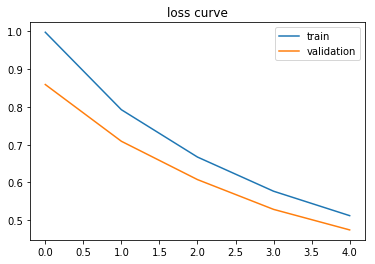

In [50]:
# average loss curve for each epoch
plt.plot(train_loss, label="train")
plt.plot(val_loss, label="validation")
plt.legend()
plt.title('loss curve')
plt.show()


In [41]:
# making predictions on test examples
sampler = SubsetRandomSampler(list(range(i*batch_size, (i+1)*batch_size)))
testloader = torch.utils.data.DataLoader(test_set, batch_size=4, sampler=sampler, num_workers=2)

for i, data in enumerate(testloader, 0):
    inputs, labels = data
    score, idx = net.predict(inputs)
    for i in range(len(idx)):
        print("expected result: ", int(labels[i]), "\tactual result: ", int(idx[i]))

expected result:  5 	actual result:  3
expected result:  0 	actual result:  0
expected result:  9 	actual result:  9
expected result:  1 	actual result:  1
